In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

import glob
import time
from PIL import Image
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset
import torchvision
import torchvision.transforms as transforms

In [2]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (160, 160))  # Resize to fit the model's input size requirements
            images.append(img)
    return images

# Example usage
folder_path = 'lfw_funneled'  # Adjust path as needed
images = load_images_from_folder(folder_path)
images[:3]


[]

In [3]:
import os
import cv2

def load_images_from_folder(folder):
    # Check if the folder exists
    if not os.path.isdir(folder):
        print(f"Folder {folder} does not exist.")
        return []

    images = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):  # Add or remove file extensions as needed
                full_path = os.path.join(root, file)
                img = cv2.imread(full_path)
                if img is not None:
                    img = cv2.resize(img, (160, 160))  # Resize to fit the model's input size requirements
                    images.append(img)
                else:
                    print(f"Failed to read image at {full_path}")
    return images

# Example usage
folder_path = 'lfw_funneled'  # Adjust path as needed
images = load_images_from_folder(folder_path)

if images:
    print(images[:3])
else:
    print("No images were loaded.")

[array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  5,   7,   7],
        [  4,   6,   6],
        [  1,   1,   1]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  7,   8,   8],
        [  8,   8,   8],
        [  3,   3,   3]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  6,   6,   6],
        [  6,   6,   6],
        [  2,   2,   2]],

       ...,

       [[  1,   1,   1],
        [  6,   2,   0],
        [155, 139, 132],
        ...,
        [145, 131, 122],
        [116, 101,  91],
        [106,  90,  80]],

       [[  1,   1,   1],
        [  4,   0,   0],
        [ 73,  59,  55],
        ...,
        [139, 127, 119],
        [110,  97,  89],
        [ 99,  87,  78]],

       [[  0,   0,   1],
        [  4,   1,   0],
        [ 77,  63,  59],
        ...,
        [ 47,  37,  33],
        [ 38,  27,  25],
        [ 36,  24,  22]

In [4]:
# Predefine hyperparameters
BATCH_SIZE = 64
LR = 0.05
MM = 0.9
EPOCH = 20

# Store images and labels
Images = []
label = []

In [5]:
all_images = glob.glob('lfw_funneled/**/*.jpg')

# Extract only the last part of each file path
file_names = [path.split('/')[-1] for path in all_images]

# Convert to numpy array
file_names_array = np.array(file_names)

In [6]:
len(file_names_array)

13233

In [7]:
male_list = ['Alfred_Ford_0001.jpg', 'Craig_Fitzgibbon_0001.jpg', 'AnFernce_Negron_0001.jpg', 'Eric_Lloyd_0001.jpg', 'Gilles_Panizzi_0001.jpg', 'Harrison_Ford_0001.jpg', 'Harrison_Ford_0002.jpg', 'Harrison_Ford_0003.jpg', 'Harrison_Ford_0004.jpg', 'Harrison_Ford_0005.jpg', 'Harrison_Ford_0006.jpg', 'Harrison_Ford_0007.jpg', 'Harrison_Ford_0008.jpg', 'Harrison_Ford_0009.jpg', 'Harrison_Ford_0010.jpg', 'Harrison_Ford_0011.jpg', 'Harrison_Ford_0012.jpg', 'Oliver_Phelps_0001.jpg', 'Robert_Evans_0001.jpg', 'Robert_Evans_0002.jpg', 'Robert_Evans_0003.jpg', 'Roger_Mahony_0001.jpg', 'Sananda_Maitreya_0001.jpg', 'Steven_Tyler_0001.jpg', 'Tommy_Shane_Steiner_0001.jpg', 'Tristan_Gretzky_0001.jpg', 'AJ_Lamas_0001.jpg', 'Aaron_Eckhart_0001.jpg', 'Aaron_Guiel_0001.jpg', 'Aaron_Patterson_0001.jpg', 'Aaron_Peirsol_0001.jpg', 'Aaron_Peirsol_0002.jpg', 'Aaron_Peirsol_0003.jpg', 'Aaron_Peirsol_0004.jpg', 'Aaron_Pena_0001.jpg', 'Aaron_Sorkin_0001.jpg', 'Aaron_Sorkin_0002.jpg', 'Aaron_Tippin_0001.jpg', 'Abba_Eban_0001.jpg', 'Abbas_Kiarostami_0001.jpg', 'Abdel_Aziz_Al-Hakim_0001.jpg', 'Abdel_Madi_Shabneh_0001.jpg', 'Abdel_Nasser_Assidi_0001.jpg', 'Abdel_Nasser_Assidi_0002.jpg', 'Abdoulaye_Wade_0001.jpg', 'Abdoulaye_Wade_0002.jpg', 'Abdoulaye_Wade_0003.jpg', 'Abdoulaye_Wade_0004.jpg', 'Abdul_Majeed_Shobokshi_0001.jpg', 'Abdul_Rahman_0001.jpg', 'Abdulaziz_Kamilov_0001.jpg', 'Abdullah_0001.jpg', 'Abdullah_0002.jpg', 'Abdullah_0003.jpg', 'Abdullah_0004.jpg', 'Abdullah_Ahmad_Badawi_0001.jpg', 'Abdullah_Gul_0001.jpg', 'Abdullah_Gul_0002.jpg', 'Abdullah_Gul_0003.jpg', 'Abdullah_Gul_0004.jpg', 'Abdullah_Gul_0005.jpg', 'Abdullah_Gul_0006.jpg', 'Abdullah_Gul_0007.jpg', 'Abdullah_Gul_0008.jpg', 'Abdullah_Gul_0009.jpg', 'Abdullah_Gul_0010.jpg', 'Abdullah_Gul_0011.jpg', 'Abdullah_Gul_0012.jpg', 'Abdullah_Gul_0013.jpg', 'Abdullah_Gul_0014.jpg', 'Abdullah_Gul_0015.jpg', 'Abdullah_Gul_0016.jpg', 'Abdullah_Gul_0017.jpg', 'Abdullah_Gul_0018.jpg', 'Abdullah_Gul_0019.jpg', 'Abdullah_Nasseef_0001.jpg', 'Abdullah_al-Attiyah_0001.jpg', 'Abdullah_al-Attiyah_0002.jpg', 'Abdullah_al-Attiyah_0003.jpg', 'Abdullatif_Sener_0001.jpg', 'Abdullatif_Sener_0002.jpg', 'Abel_Aguilar_0001.jpg', 'Abel_Pacheco_0001.jpg', 'Abel_Pacheco_0002.jpg', 'Abel_Pacheco_0003.jpg', 'Abel_Pacheco_0004.jpg', 'Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg', 'Abid_Hamid_Mahmud_Al-Tikriti_0002.jpg', 'Abid_Hamid_Mahmud_Al-Tikriti_0003.jpg', 'Abner_Martinez_0001.jpg', 'Abraham_Foxman_0001.jpg', 'Aby_Har-Even_0001.jpg', 'Adam_Ant_0001.jpg', 'Adam_Freier_0001.jpg', 'Adam_Herbert_0001.jpg', 'Adam_Kennedy_0001.jpg', 'Adam_Mair_0001.jpg', 'Adam_Rich_0001.jpg', 'Adam_Sandler_0001.jpg', 'Adam_Sandler_0002.jpg', 'Adam_Sandler_0003.jpg', 'Adam_Sandler_0004.jpg', 'Adam_Scott_0001.jpg', 'Adam_Scott_0002.jpg', 'Adel_Al-Jubeir_0001.jpg', 'Adel_Al-Jubeir_0002.jpg', 'Adel_Al-Jubeir_0003.jpg', 'Adisai_Bodharamik_0001.jpg', 'Adolfo_Aguilar_Zinser_0001.jpg', 'Adolfo_Aguilar_Zinser_0002.jpg', 'Adolfo_Aguilar_Zinser_0003.jpg', 'Adolfo_Rodriguez_Saa_0001.jpg', 'Adolfo_Rodriguez_Saa_0002.jpg', 'Adoor_Gopalakarishnan_0001.jpg', 'Adrian_Annus_0001.jpg', 'Adrian_Fernandez_0001.jpg', 'Adrian_McPherson_0001.jpg', 'Adrian_McPherson_0002.jpg', 'Adrian_Murrell_0001.jpg', 'Adrian_Nastase_0001.jpg', 'Adrian_Nastase_0002.jpg', 'Adrien_Brody_0001.jpg', 'Adrien_Brody_0002.jpg', 'Adrien_Brody_0003.jpg', 'Adrien_Brody_0004.jpg', 'Adrien_Brody_0005.jpg', 'Adrien_Brody_0006.jpg', 'Adrien_Brody_0007.jpg', 'Adrien_Brody_0008.jpg', 'Adrien_Brody_0009.jpg', 'Adrien_Brody_0010.jpg', 'Adrien_Brody_0011.jpg', 'Adrien_Brody_0012.jpg', 'Agnelo_Queiroz_0001.jpg', 'Ahmad_Jbarah_0001.jpg', 'Ahmad_Masood_0001.jpg', 'Ahmad_Masood_0002.jpg', 'Ahmed_Ahmed_0001.jpg', 'Ahmed_Chalabi_0001.jpg', 'Ahmed_Chalabi_0002.jpg', 'Ahmed_Chalabi_0003.jpg', 'Ahmed_Chalabi_0004.jpg', 'Ahmed_Chalabi_0005.jpg', 'Ahmed_Ghazi_0001.jpg', 'Ahmed_Ibrahim_Bilal_0001.jpg', 'Ahmed_Lopez_0001.jpg', 'Ahmed_Qureia_0001.jpg', 'Ahmet_Demir_0001.jpg', 'Ahmet_Necdet_Sezer_0001.jpg', 'Ahmet_Necdet_Sezer_0002.jpg', 'Aidan_Quinn_0001.jpg', 'Ain_Seppik_0001.jpg', 'Ainsworth_Dyer_0001.jpg', 'Aitor_Gonzalez_0001.jpg', 'Aitor_Gonzalez_0002.jpg', 'Ajit_Agarkar_0001.jpg', 'Akbar_Al_Baker_0001.jpg', 'Akbar_Hashemi_Rafsanjani_0001.jpg', 'Akbar_Hashemi_Rafsanjani_0002.jpg', 'Akbar_Hashemi_Rafsanjani_0003.jpg', 'Akhmed_Zakayev_0001.jpg', 'Akhmed_Zakayev_0002.jpg', 'Akhmed_Zakayev_0003.jpg', 'Akmal_Taher_0001.jpg', 'Al_Cardenas_0001.jpg', 'Al_Davis_0001.jpg', 'Al_Davis_0002.jpg', 'Al_Gore_0001.jpg', 'Al_Gore_0002.jpg', 'Al_Gore_0003.jpg', 'Al_Gore_0004.jpg', 'Al_Gore_0005.jpg', 'Al_Gore_0006.jpg', 'Al_Gore_0007.jpg', 'Al_Gore_0008.jpg', 'Al_Leiter_0001.jpg', 'Al_Pacino_0001.jpg', 'Al_Pacino_0002.jpg', 'Al_Pacino_0003.jpg', 'Al_Sharpton_0001.jpg', 'Al_Sharpton_0002.jpg', 'Al_Sharpton_0003.jpg', 'Al_Sharpton_0004.jpg', 'Al_Sharpton_0005.jpg', 'Al_Sharpton_0006.jpg', 'Al_Sharpton_0007.jpg', 'Alain_Cervantes_0001.jpg', 'Alain_Ducasse_0001.jpg', 'Alan_Ball_0001.jpg', 'Alan_Ball_0002.jpg', 'Alan_Dershowitz_0001.jpg', 'Alan_Dreher_0001.jpg', 'Alan_Greenspan_0001.jpg', 'Alan_Greenspan_0002.jpg', 'Alan_Greenspan_0003.jpg', 'Alan_Greenspan_0004.jpg', 'Alan_Greenspan_0005.jpg', 'Alan_Greer_0001.jpg', 'Alan_Jackson_0001.jpg', 'Alan_Mulally_0001.jpg', 'Alan_Mulally_0002.jpg', 'Alan_Stonecipher_0001.jpg', 'Alan_Tang_Kwong-wing_0001.jpg', 'Alan_Trammell_0001.jpg', 'Alan_Zemaitis_0001.jpg', 'Alastair_Campbell_0001.jpg', 'Alastair_Campbell_0002.jpg', 'Alastair_Campbell_0003.jpg', 'Alastair_Campbell_0004.jpg', 'Alastair_Campbell_0005.jpg', 'Alastair_Johnston_0001.jpg', 'Albaro_Recoba_0001.jpg', 'Albert_Brooks_0001.jpg', 'Albert_Costa_0001.jpg', 'Albert_Costa_0002.jpg', 'Albert_Costa_0003.jpg', 'Albert_Costa_0004.jpg', 'Albert_Costa_0005.jpg', 'Albert_Costa_0006.jpg', 'Albert_Montanes_0001.jpg', 'Albert_Pujols_0001.jpg', 'Alberto_Acosta_0001.jpg', 'Alberto_Fujimori_0001.jpg', 'Alberto_Fujimori_0002.jpg', 'Alberto_Gonzales_0001.jpg', 'Alberto_Ruiz_Gallardon_0001.jpg', 'Alberto_Ruiz_Gallardon_0002.jpg', 'Alberto_Sordi_0001.jpg', 'Albrecht_Mentz_0001.jpg', 'Albrecht_Mentz_0002.jpg', 'Aldo_Paredes_0001.jpg', 'Aldo_Paredes_0002.jpg', 'Alec_Baldwin_0001.jpg', 'Alec_Baldwin_0002.jpg', 'Alec_Baldwin_0003.jpg', 'Alec_Baldwin_0004.jpg', 'Alecos_Markides_0001.jpg', 'Alejandro_Atchugarry_0001.jpg', 'Alejandro_Atchugarry_0002.jpg', 'Alejandro_Avila_0001.jpg', 'Alejandro_Avila_0002.jpg', 'Alejandro_Avila_0003.jpg', 'Alejandro_Fernandez_0001.jpg', 'Alejandro_Gonzalez_Inarritu_0001.jpg', 'Alejandro_Lembo_0001.jpg', 'Alejandro_Lerner_0001.jpg', 'Alejandro_Lopez_0001.jpg', 'Alejandro_Toledo_0001.jpg', 'Alejandro_Toledo_0002.jpg', 'Alejandro_Toledo_0003.jpg', 'Alejandro_Toledo_0004.jpg', 'Alejandro_Toledo_0005.jpg', 'Alejandro_Toledo_0006.jpg', 'Alejandro_Toledo_0007.jpg', 'Alejandro_Toledo_0008.jpg', 'Alejandro_Toledo_0009.jpg', 'Alejandro_Toledo_0010.jpg', 'Alejandro_Toledo_0011.jpg', 'Alejandro_Toledo_0012.jpg', 'Alejandro_Toledo_0013.jpg', 'Alejandro_Toledo_0014.jpg', 'Alejandro_Toledo_0015.jpg', 'Alejandro_Toledo_0016.jpg', 'Alejandro_Toledo_0017.jpg', 'Alejandro_Toledo_0018.jpg', 'Alejandro_Toledo_0019.jpg', 'Alejandro_Toledo_0020.jpg', 'Alejandro_Toledo_0021.jpg', 'Alejandro_Toledo_0022.jpg', 'Alejandro_Toledo_0023.jpg', 'Alejandro_Toledo_0024.jpg', 'Alejandro_Toledo_0025.jpg', 'Alejandro_Toledo_0026.jpg', 'Alejandro_Toledo_0027.jpg', 'Alejandro_Toledo_0028.jpg', 'Alejandro_Toledo_0029.jpg', 'Alejandro_Toledo_0030.jpg', 'Alejandro_Toledo_0031.jpg', 'Alejandro_Toledo_0032.jpg', 'Alejandro_Toledo_0033.jpg', 'Alejandro_Toledo_0034.jpg', 'Alejandro_Toledo_0035.jpg', 'Alejandro_Toledo_0036.jpg', 'Alejandro_Toledo_0037.jpg', 'Alejandro_Toledo_0038.jpg', 'Alejandro_Toledo_0039.jpg', 'Aleksander_Kwasniewski_0001.jpg', 'Aleksander_Kwasniewski_0002.jpg', 'Aleksander_Kwasniewski_0003.jpg', 'Aleksander_Kwasniewski_0004.jpg', 'Aleksander_Voloshin_0001.jpg', 'Alessandro_Nesta_0001.jpg', 'Alex_Barros_0001.jpg', 'Alex_Barros_0002.jpg', 'Alex_Cabrera_0001.jpg', 'Alex_Cejka_0001.jpg', 'Alex_Corretja_0001.jpg', 'Alex_Ferguson_0001.jpg', 'Alex_Gonzalez_0001.jpg', 'Alex_Holmes_0001.jpg', 'Alex_King_0001.jpg', 'Alex_Penelas_0001.jpg', 'Alex_Penelas_0002.jpg', 'Alex_Popov_0001.jpg', 'Alex_Wallau_0001.jpg', 'Alex_Zanardi_0001.jpg', 'Alexander_Downer_0001.jpg', 'Alexander_Downer_0002.jpg', 'Alexander_Downer_0003.jpg', 'Alexander_Downer_0004.jpg', 'Alexander_Losyukov_0001.jpg', 'Alexander_Losyukov_0002.jpg', 'Alexander_Losyukov_0003.jpg', 'Alexander_Losyukov_0004.jpg', 'Alexander_Lukashenko_0001.jpg', 'Alexander_Payne_0001.jpg', 'Alexander_Rumyantsev_0001.jpg', 'Alexander_Rumyantsev_0002.jpg', 'Alexandre_Daigle_0001.jpg', 'Alexandre_Despatie_0001.jpg', 'Alexandre_Herchcovitch_0001.jpg', 'Alexandre_Vinokourov_0001.jpg', 'Alexis_Dennisoff_0001.jpg', 'Alfonso_Cuaron_0001.jpg', 'Alfonso_Portillo_0001.jpg', 'Alfonso_Soriano_0001.jpg', 'Alfred_Sant_0001.jpg', 'Alfredo_Moreno_0001.jpg', 'Alfredo_Pena_0001.jpg', 'Alfredo_di_Stefano_0001.jpg', 'Ali_Abbas_0001.jpg', 'Ali_Abbas_0002.jpg', 'Ali_Abdullah_Saleh_0001.jpg', 'Ali_Adbul_Karim_Madani_0001.jpg', 'Ali_Ahmeti_0001.jpg', 'Ali_Bin_Hussein_0001.jpg', 'Ali_Fallahian_0001.jpg', 'Ali_Hammoud_0001.jpg', 'Ali_Khamenei_0001.jpg', 'Ali_Khamenei_0002.jpg', 'Ali_Khamenei_0003.jpg', 'Ali_Mohammed_Maher_0001.jpg', 'Ali_Naimi_0001.jpg', 'Ali_Naimi_0002.jpg', 'Ali_Naimi_0003.jpg', 'Ali_Naimi_0004.jpg', 'Ali_Naimi_0005.jpg', 'Ali_Naimi_0006.jpg', 'Ali_Naimi_0007.jpg', 'Ali_Naimi_0008.jpg', 'Alimzhan_Tokhtakhounov_0001.jpg', 'Alimzhan_Tokhtakhounov_0002.jpg', 'Alistair_MacDonald_0001.jpg', 'Allan_Houston_0001.jpg', 'Allan_Kemakeza_0001.jpg', 'Allan_Wagner_0001.jpg', 'Allen_Iverson_0001.jpg', 'Allen_Iverson_0002.jpg', 'Allen_Rock_0001.jpg', 'Almeida_Baptista_0001.jpg', 'Alonzo_Mourning_0001.jpg', 'Alvaro_Noboa_0001.jpg', 'Alvaro_Noboa_0002.jpg', 'Alvaro_Noboa_0003.jpg', 'Alvaro_Silva_Calderon_0001.jpg', 'Alvaro_Silva_Calderon_0002.jpg', 'Alvaro_Silva_Calderon_0003.jpg', 'Alvaro_Silva_Calderon_0004.jpg', 'Alvaro_Uribe_0001.jpg', 'Alvaro_Uribe_0002.jpg', 'Alvaro_Uribe_0003.jpg', 'Alvaro_Uribe_0004.jpg', 'Alvaro_Uribe_0005.jpg', 'Alvaro_Uribe_0006.jpg', 'Alvaro_Uribe_0007.jpg', 'Alvaro_Uribe_0008.jpg', 'Alvaro_Uribe_0009.jpg', 'Alvaro_Uribe_0010.jpg', 'Alvaro_Uribe_0011.jpg', 'Alvaro_Uribe_0012.jpg', 'Alvaro_Uribe_0013.jpg', 'Alvaro_Uribe_0014.jpg', 'Alvaro_Uribe_0015.jpg', 'Alvaro_Uribe_0016.jpg', 'Alvaro_Uribe_0017.jpg', 'Alvaro_Uribe_0018.jpg', 'Alvaro_Uribe_0019.jpg', 'Alvaro_Uribe_0020.jpg', 'Alvaro_Uribe_0021.jpg', 'Alvaro_Uribe_0022.jpg', 'Alvaro_Uribe_0023.jpg', 'Alvaro_Uribe_0024.jpg', 'Alvaro_Uribe_0025.jpg', 'Alvaro_Uribe_0026.jpg', 'Alvaro_Uribe_0027.jpg', 'Alvaro_Uribe_0028.jpg', 'Alvaro_Uribe_0029.jpg', 'Alvaro_Uribe_0030.jpg', 'Alvaro_Uribe_0031.jpg', 'Alvaro_Uribe_0032.jpg', 'Alvaro_Uribe_0033.jpg', 'Alvaro_Uribe_0034.jpg', 'Alvaro_Uribe_0035.jpg', 'Ambrose_Lee_0001.jpg', 'Amer_al-Saadi_0001.jpg', 'Amer_al-Saadi_0002.jpg', 'Amer_al-Saadi_0003.jpg', 'Amer_al-Saadi_0004.jpg', 'Amr_Moussa_0001.jpg', 'Amram_Mitzna_0001.jpg', 'Amram_Mitzna_0002.jpg', 'Anatoliy_Kinakh_0001.jpg', 'Anders_Ebbeson_0001.jpg', 'Anders_Ebbeson_0002.jpg', 'Anders_Ebbeson_0003.jpg', 'Anders_Fogh_Rasmussen_0001.jpg', 'Anders_Fogh_Rasmussen_0002.jpg', 'Anders_Fogh_Rasmussen_0003.jpg', 'Anders_Fogh_Rasmussen_0004.jpg', 'Anderson_Varejao_0001.jpg', 'Andre_Agassi_0001.jpg', 'Andre_Agassi_0002.jpg', 'Andre_Agassi_0003.jpg', 'Andre_Agassi_0004.jpg', 'Andre_Agassi_0005.jpg', 'Andre_Agassi_0006.jpg', 'Andre_Agassi_0007.jpg', 'Andre_Agassi_0008.jpg', 'Andre_Agassi_0009.jpg', 'Andre_Agassi_0010.jpg', 'Andre_Agassi_0011.jpg', 'Andre_Agassi_0012.jpg', 'Andre_Agassi_0013.jpg', 'Andre_Agassi_0014.jpg', 'Andre_Agassi_0015.jpg', 'Andre_Agassi_0016.jpg', 'Andre_Agassi_0017.jpg', 'Andre_Agassi_0018.jpg', 'Andre_Agassi_0019.jpg', 'Andre_Agassi_0020.jpg', 'Andre_Agassi_0021.jpg', 'Andre_Agassi_0022.jpg', 'Andre_Agassi_0023.jpg', 'Andre_Agassi_0024.jpg', 'Andre_Agassi_0025.jpg', 'Andre_Agassi_0026.jpg', 'Andre_Agassi_0027.jpg', 'Andre_Agassi_0028.jpg', 'Andre_Agassi_0029.jpg', 'Andre_Agassi_0030.jpg', 'Andre_Agassi_0031.jpg', 'Andre_Agassi_0032.jpg', 'Andre_Agassi_0033.jpg', 'Andre_Agassi_0034.jpg', 'Andre_Agassi_0035.jpg', 'Andre_Agassi_0036.jpg', 'Andre_Bucher_0001.jpg', 'Andre_Lange_0001.jpg', 'Andre_Smith_0001.jpg', 'Andre_Techine_0001.jpg', 'Andrea_Bocelli_0001.jpg', 'Andreas_Vinciguerra_0001.jpg', 'Andrei_Konchalovsky_0001.jpg', 'Andrei_Mikhnevich_0001.jpg', 'Andrei_Mikhnevich_0002.jpg', 'Andrei_Nikolishin_0001.jpg', 'Andres_DAlessandro_0001.jpg', 'Andres_Manuel_Lopez_Obrador_0001.jpg', 'Andres_Pastrana_0001.jpg', 'Andrew_Bernard_0001.jpg', 'Andrew_Bunner_0001.jpg', 'Andrew_Bunner_0002.jpg', 'Andrew_Caldecott_0001.jpg', 'Andrew_Cuomo_0001.jpg', 'Andrew_Cuomo_0002.jpg', 'Andrew_Fastow_0001.jpg', 'Andrew_Firestone_0001.jpg', 'Andrew_Gilligan_0001.jpg', 'Andrew_Jarecki_0001.jpg', 'Andrew_Luster_0001.jpg', 'Andrew_Niccol_0001.jpg', 'Andrew_Niccol_0002.jpg', 'Andrew_Sabey_0001.jpg', 'Andrew_Shutley_0001.jpg', 'Andrew_Weissmann_0001.jpg', 'Andrew_Weissmann_0002.jpg', 'Andrew_Weissmann_0003.jpg', 'Andrew_Wetzler_0001.jpg', 'Andrzej_Tyszkiewicz_0001.jpg', 'Andy_Benes_0001.jpg', 'Andy_Bryant_0001.jpg', 'Andy_Dick_0001.jpg', 'Andy_Garcia_0001.jpg', 'Andy_Graves_0001.jpg', 'Andy_Griffith_0001.jpg', 'Andy_Griggs_0001.jpg', 'Andy_Hebb_0001.jpg', 'Andy_Hebb_0002.jpg', 'Andy_Lau_0001.jpg', 'Andy_Madikians_0001.jpg', 'Andy_North_0001.jpg', 'Andy_Perez_0001.jpg', 'Andy_Roddick_0001.jpg', 'Andy_Roddick_0002.jpg', 'Andy_Roddick_0003.jpg', 'Andy_Roddick_0004.jpg', 'Andy_Roddick_0005.jpg', 'Andy_Roddick_0006.jpg', 'Andy_Roddick_0007.jpg', 'Andy_Roddick_0008.jpg', 'Andy_Roddick_0009.jpg', 'Andy_Roddick_0010.jpg', 'Andy_Roddick_0011.jpg', 'Andy_Roddick_0012.jpg', 'Andy_Roddick_0013.jpg', 'Andy_Roddick_0014.jpg', 'Andy_Roddick_0015.jpg', 'Andy_Rooney_0001.jpg', 'Andy_Warhol_0001.jpg', 'Andy_Wisecarver_0001.jpg', 'Angel_Lockward_0001.jpg', 'Angel_Maza_0001.jpg', 'Angelo_Genova_0001.jpg', 'Angelo_Reyes_0001.jpg', 'Angelo_Reyes_0002.jpg', 'Angelo_Reyes_0003.jpg', 'Angelo_Reyes_0004.jpg', 'Anibal_Ibarra_0001.jpg', 'Anibal_Ibarra_0002.jpg', 'Anibal_Ibarra_0003.jpg', 'Anil_Ramsook_0001.jpg', 'Anjum_Hussain_0001.jpg', 'Antanas_Valionis_0001.jpg', 'Anthony_Carter_0001.jpg', 'Anthony_Corso_0001.jpg', 'Anthony_Ervin_0001.jpg', 'Anthony_Fauci_0001.jpg', 'Anthony_Fauci_0002.jpg', 'Anthony_Garotinho_0001.jpg', 'Anthony_Hazen_0001.jpg', 'Anthony_Hopkins_0001.jpg', 'Anthony_Hopkins_0002.jpg', 'Anthony_LaPaglia_0001.jpg', 'Anthony_LaPaglia_0002.jpg', 'Anthony_Lee_Johnson_0001.jpg', 'Anthony_Mazur_0001.jpg', 'Anthony_Pico_0001.jpg', 'Anthony_Pisciotti_0001.jpg', 'Anthony_Principi_0001.jpg', 'Anthony_Rackauckas_0001.jpg', 'Anthony_Scott_Miller_0001.jpg', 'Anton_Balasingham_0001.jpg', 'Antonio_Banderas_0001.jpg', 'Antonio_Banderas_0002.jpg', 'Antonio_Banderas_0003.jpg', 'Antonio_Banderas_0004.jpg', 'Antonio_Banderas_0005.jpg', 'Antonio_Bernardo_0001.jpg', 'Antonio_Cassano_0001.jpg', 'Antonio_Catania_0001.jpg', 'Antonio_Elias_Saca_0001.jpg', 'Antonio_Palocci_0001.jpg', 'Antonio_Palocci_0002.jpg', 'Antonio_Palocci_0003.jpg', 'Antonio_Palocci_0004.jpg', 'Antonio_Palocci_0005.jpg', 'Antonio_Palocci_0006.jpg', 'Antonio_Palocci_0007.jpg', 'Antonio_Palocci_0008.jpg', 'Antonio_Trillanes_0001.jpg', 'Antonio_Trillanes_0002.jpg', 'Antonio_Trillanes_0003.jpg', 'Antony_Leung_0001.jpg', 'Antony_Leung_0002.jpg', 'Antony_Leung_0003.jpg', 'Antony_Leung_0004.jpg', 'Antwun_Echols_0001.jpg', 'Anwar_Ibrahim_0001.jpg', 'Anwar_Ibrahim_0002.jpg', 'Anzori_Kikalishvili_0001.jpg', 'Aram_Adler_0001.jpg', 'Ari_Bousbib_0001.jpg', 'Ari_Fleischer_0001.jpg', 'Ari_Fleischer_0002.jpg', 'Ari_Fleischer_0003.jpg', 'Ari_Fleischer_0004.jpg', 'Ari_Fleischer_0005.jpg', 'Ari_Fleischer_0006.jpg', 'Ari_Fleischer_0007.jpg', 'Ari_Fleischer_0008.jpg', 'Ari_Fleischer_0009.jpg', 'Ari_Fleischer_0010.jpg', 'Ari_Fleischer_0011.jpg', 'Ari_Fleischer_0012.jpg', 'Ari_Fleischer_0013.jpg', 'Arie_Haan_0001.jpg', 'Ariel_Sharon_0001.jpg', 'Ariel_Sharon_0002.jpg', 'Ariel_Sharon_0003.jpg', 'Ariel_Sharon_0004.jpg', 'Ariel_Sharon_0005.jpg', 'Ariel_Sharon_0006.jpg', 'Ariel_Sharon_0007.jpg', 'Ariel_Sharon_0008.jpg', 'Ariel_Sharon_0009.jpg', 'Ariel_Sharon_0010.jpg', 'Ariel_Sharon_0011.jpg', 'Ariel_Sharon_0012.jpg', 'Ariel_Sharon_0013.jpg', 'Ariel_Sharon_0014.jpg', 'Ariel_Sharon_0015.jpg', 'Ariel_Sharon_0016.jpg', 'Ariel_Sharon_0017.jpg', 'Ariel_Sharon_0018.jpg', 'Ariel_Sharon_0019.jpg', 'Ariel_Sharon_0020.jpg', 'Ariel_Sharon_0021.jpg', 'Ariel_Sharon_0022.jpg', 'Ariel_Sharon_0023.jpg', 'Ariel_Sharon_0024.jpg', 'Ariel_Sharon_0025.jpg', 'Ariel_Sharon_0026.jpg', 'Ariel_Sharon_0027.jpg', 'Ariel_Sharon_0028.jpg', 'Ariel_Sharon_0029.jpg', 'Ariel_Sharon_0030.jpg', 'Ariel_Sharon_0031.jpg', 'Ariel_Sharon_0032.jpg', 'Ariel_Sharon_0033.jpg', 'Ariel_Sharon_0034.jpg', 'Ariel_Sharon_0035.jpg', 'Ariel_Sharon_0036.jpg', 'Ariel_Sharon_0037.jpg', 'Ariel_Sharon_0038.jpg', 'Ariel_Sharon_0039.jpg', 'Ariel_Sharon_0040.jpg', 'Ariel_Sharon_0041.jpg', 'Ariel_Sharon_0042.jpg', 'Ariel_Sharon_0043.jpg', 'Ariel_Sharon_0044.jpg', 'Ariel_Sharon_0045.jpg', 'Ariel_Sharon_0046.jpg', 'Ariel_Sharon_0047.jpg', 'Ariel_Sharon_0048.jpg', 'Ariel_Sharon_0049.jpg', 'Ariel_Sharon_0050.jpg', 'Ariel_Sharon_0051.jpg', 'Ariel_Sharon_0052.jpg', 'Ariel_Sharon_0053.jpg', 'Ariel_Sharon_0054.jpg', 'Ariel_Sharon_0055.jpg', 'Ariel_Sharon_0056.jpg', 'Ariel_Sharon_0057.jpg', 'Ariel_Sharon_0058.jpg', 'Ariel_Sharon_0059.jpg', 'Ariel_Sharon_0060.jpg', 'Ariel_Sharon_0061.jpg', 'Ariel_Sharon_0062.jpg', 'Ariel_Sharon_0063.jpg', 'Ariel_Sharon_0064.jpg', 'Ariel_Sharon_0065.jpg', 'Ariel_Sharon_0066.jpg', 'Ariel_Sharon_0067.jpg', 'Ariel_Sharon_0068.jpg', 'Ariel_Sharon_0069.jpg', 'Ariel_Sharon_0070.jpg', 'Ariel_Sharon_0071.jpg', 'Ariel_Sharon_0072.jpg', 'Ariel_Sharon_0073.jpg', 'Ariel_Sharon_0074.jpg', 'Ariel_Sharon_0075.jpg', 'Ariel_Sharon_0076.jpg', 'Ariel_Sharon_0077.jpg', 'Arif_Mardin_0001.jpg', 'Arlen_Specter_0001.jpg', 'Arlen_Specter_0002.jpg', 'Arlen_Specter_0003.jpg', 'Armand_Sargen_0001.jpg', 'Armando_Avila_Panchame_0001.jpg', 'Armando_Calderon_Sol_0001.jpg', 'Armando_Carrillo_0001.jpg', 'Arminio_Fraga_0001.jpg', 'Arminio_Fraga_0002.jpg', 'Arminio_Fraga_0003.jpg', 'Arminio_Fraga_0004.jpg', 'Arminio_Fraga_0005.jpg', 'Arminio_Fraga_0006.jpg', 'Arnaud_Clement_0001.jpg', 'Arnaud_Clement_0002.jpg', 'Arnaud_Lagardere_0001.jpg', 'Arnie_Boehm_0001.jpg', 'Arnold_Palmer_0001.jpg', 'Arnold_Palmer_0002.jpg', 'Arnold_Palmer_0003.jpg', 'Arnold_Schwarzenegger_0001.jpg', 'Arnold_Schwarzenegger_0002.jpg', 'Arnold_Schwarzenegger_0003.jpg', 'Arnold_Schwarzenegger_0004.jpg', 'Arnold_Schwarzenegger_0005.jpg', 'Arnold_Schwarzenegger_0006.jpg', 'Arnold_Schwarzenegger_0007.jpg', 'Arnold_Schwarzenegger_0008.jpg', 'Arnold_Schwarzenegger_0009.jpg', 'Arnold_Schwarzenegger_0010.jpg', 'Arnold_Schwarzenegger_0011.jpg', 'Arnold_Schwarzenegger_0012.jpg', 'Arnold_Schwarzenegger_0013.jpg', 'Arnold_Schwarzenegger_0014.jpg', 'Arnold_Schwarzenegger_0015.jpg', 'Arnold_Schwarzenegger_0016.jpg', 'Arnold_Schwarzenegger_0017.jpg', 'Arnold_Schwarzenegger_0018.jpg', 'Arnold_Schwarzenegger_0019.jpg', 'Arnold_Schwarzenegger_0020.jpg', 'Arnold_Schwarzenegger_0021.jpg', 'Arnold_Schwarzenegger_0022.jpg', 'Arnold_Schwarzenegger_0023.jpg', 'Arnold_Schwarzenegger_0024.jpg', 'Arnold_Schwarzenegger_0025.jpg', 'Arnold_Schwarzenegger_0026.jpg', 'Arnold_Schwarzenegger_0027.jpg', 'Arnold_Schwarzenegger_0028.jpg', 'Arnold_Schwarzenegger_0029.jpg', 'Arnold_Schwarzenegger_0030.jpg', 'Arnold_Schwarzenegger_0031.jpg', 'Arnold_Schwarzenegger_0032.jpg', 'Arnold_Schwarzenegger_0033.jpg', 'Arnold_Schwarzenegger_0034.jpg', 'Arnold_Schwarzenegger_0035.jpg', 'Arnold_Schwarzenegger_0036.jpg', 'Arnold_Schwarzenegger_0037.jpg', 'Arnold_Schwarzenegger_0038.jpg', 'Arnold_Schwarzenegger_0039.jpg', 'Arnold_Schwarzenegger_0040.jpg', 'Arnold_Schwarzenegger_0041.jpg', 'Arnold_Schwarzenegger_0042.jpg', 'Arnold_Scott_0001.jpg', 'Arnoldo_Aleman_0001.jpg', 'Arnoldo_Aleman_0002.jpg', 'Arnoldo_Aleman_0003.jpg', 'Arnoldo_Aleman_0004.jpg', 'Arnoldo_Aleman_0005.jpg', 'Aron_Ralston_0001.jpg', 'Aron_Ralston_0002.jpg', 'Art_Cooper_0001.jpg', 'Art_Hoffmann_0001.jpg', 'Art_Hoffmann_0002.jpg', 'Art_Howe_0001.jpg', 'Art_Howe_0002.jpg', 'Art_Howe_0003.jpg', 'Art_Howe_0004.jpg', 'Art_Lopez_0001.jpg', 'Arthur_Johnson_0001.jpg', 'Arthur_Martinez_0001.jpg', 'Artieas_Shanks_0001.jpg', 'Arturo_Gatti_0001.jpg', 'Arturo_Gatti_0002.jpg', 'Arturo_Gatti_0003.jpg', 'Arye_Mekel_0001.jpg', 'Arye_Mekel_0002.jpg', 'Asa_Hutchinson_0001.jpg', 'Asa_Hutchinson_0002.jpg', 'Ascencion_Barajas_0001.jpg', 'Ashraf_Alasmar_0001.jpg', 'Ashraf_Ghani_0001.jpg', 'Ashton_Kutcher_0001.jpg', 'Ashton_Kutcher_0002.jpg', 'Ashton_Kutcher_0003.jpg', 'Asif_Ali_Zardari_0001.jpg', 'Asif_Hanif_0001.jpg', 'Askar_Akayev_0001.jpg', 'Assad_Ahmadi_0001.jpg', 'Atal_Bihari_Vajpayee_0001.jpg', 'Atal_Bihari_Vajpayee_0002.jpg', 'Atal_Bihari_Vajpayee_0003.jpg', 'Atal_Bihari_Vajpayee_0004.jpg', 'Atal_Bihari_Vajpayee_0005.jpg', 'Atal_Bihari_Vajpayee_0006.jpg', 'Atal_Bihari_Vajpayee_0007.jpg', 'Atal_Bihari_Vajpayee_0008.jpg', 'Atal_Bihari_Vajpayee_0009.jpg', 'Atal_Bihari_Vajpayee_0010.jpg', 'Atal_Bihari_Vajpayee_0011.jpg', 'Atal_Bihari_Vajpayee_0012.jpg', 'Atal_Bihari_Vajpayee_0013.jpg', 'Atal_Bihari_Vajpayee_0014.jpg', 'Atal_Bihari_Vajpayee_0015.jpg', 'Atal_Bihari_Vajpayee_0016.jpg', 'Atal_Bihari_Vajpayee_0017.jpg', 'Atal_Bihari_Vajpayee_0018.jpg', 'Atal_Bihari_Vajpayee_0019.jpg', 'Atal_Bihari_Vajpayee_0020.jpg', 'Atal_Bihari_Vajpayee_0021.jpg', 'Atal_Bihari_Vajpayee_0022.jpg', 'Atal_Bihari_Vajpayee_0023.jpg', 'Atal_Bihari_Vajpayee_0024.jpg', 'Ataollah_Mohajerani_0001.jpg', 'Atom_Egoyan_0001.jpg', 'Atsushi_Sato_0001.jpg', 'Augustin_Calleri_0001.jpg', 'Augustin_Calleri_0002.jpg', 'Augustin_Calleri_0003.jpg', 'Augustin_Calleri_0004.jpg', 'Augusto_Pinochet_0001.jpg', 'Augusto_Pinochet_0002.jpg', 'Augusto_Roa_Bastos_0001.jpg', 'Augusto_Roa_Bastos_0002.jpg', 'Austin_Kearns_0001.jpg', 'Azmi_Bishara_0001.jpg', 'BB_King_0001.jpg', 'BJ_Habibie_0001.jpg', 'Babe_Ruth_0001.jpg', 'Baburam_Bhattari_0001.jpg', 'Bak_Chang-Ryun_0001.jpg', 'Barrett_Jackman_0001.jpg', 'Barrett_Jackman_0002.jpg', 'Barry_Alvarez_0001.jpg', 'Barry_Alvarez_0002.jpg', 'Barry_Bonds_0001.jpg', 'Barry_Collier_0001.jpg', 'Barry_Diller_0001.jpg', 'Barry_Ford_0001.jpg', 'Barry_Hinson_0001.jpg', 'Barry_Nakell_0001.jpg', 'Barry_Switzer_0001.jpg', 'Barry_Williams_0001.jpg', 'Barry_Zito_0001.jpg', 'Barry_Zito_0002.jpg', 'Bart_Freundlich_0001.jpg', 'Bart_Hendricks_0001.jpg', 'Bartosz_Kizierowski_0001.jpg', 'Barzan_al-Tikriti_0001.jpg', 'Basdeo_Panday_0001.jpg', 'Bashar_Assad_0001.jpg', 'Bashar_Assad_0002.jpg', 'Bashar_Assad_0003.jpg', 'Bashar_Assad_0004.jpg', 'Baz_Luhrmann_0001.jpg', 'Beecher_Ray_Kirby_0001.jpg', 'Bela_Karolyi_0001.jpg', 'Ben_Affleck_0001.jpg', 'Ben_Affleck_0002.jpg', 'Ben_Affleck_0003.jpg', 'Ben_Affleck_0004.jpg', 'Ben_Affleck_0005.jpg', 'Ben_Affleck_0006.jpg', 'Ben_Affleck_0007.jpg', 'Ben_Betts_0001.jpg', 'Ben_Braun_0001.jpg', 'Ben_Broussard_0001.jpg', 'Ben_Cahoon_0001.jpg', 'Ben_Chandler_0001.jpg', 'Ben_Cohen_0001.jpg', 'Ben_Curtis_0001.jpg', 'Ben_Curtis_0002.jpg', 'Ben_Curtis_0003.jpg', 'Ben_Davis_0001.jpg', 'Ben_Glisan_0001.jpg', 'Ben_Glisan_0002.jpg', 'Ben_Howland_0001.jpg', 'Ben_Howland_0002.jpg', 'Ben_Howland_0003.jpg', 'Ben_Howland_0004.jpg', 'Ben_Kingsley_0001.jpg', 'Ben_Lee_0001.jpg', 'Ben_Stein_0001.jpg', 'Ben_Wallace_0001.jpg', 'Benicio_Del_Toro_0001.jpg', 'Benito_Santiago_0001.jpg', 'Benjamin_Bratt_0001.jpg', 'Benjamin_Franklin_0001.jpg', 'Benjamin_Martinez_0001.jpg', 'Benjamin_McKenzie_0001.jpg', 'Benjamin_Netanyahu_0001.jpg', 'Benjamin_Netanyahu_0002.jpg', 'Benjamin_Netanyahu_0003.jpg', 'Benjamin_Netanyahu_0004.jpg', 'Benjamin_Netanyahu_0005.jpg', 'Benjamin_Neulander_0001.jpg', 'Bernard_Ebbers_0001.jpg', 'Bernard_Giraudeau_0001.jpg', 'Bernard_Kerik_0001.jpg', 'Bernard_Landry_0001.jpg', 'Bernard_Landry_0002.jpg', 'Bernard_Landry_0003.jpg', 'Bernard_Landry_0004.jpg', 'Bernard_Law_0001.jpg', 'Bernard_Law_0002.jpg', 'Bernard_Law_0003.jpg', 'Bernard_Law_0004.jpg', 'Bernard_Law_0005.jpg', 'Bernard_Lord_0001.jpg', 'Bernard_Lord_0002.jpg', 'Bernard_Siegel_0001.jpg', 'Bernardo_Segura_0001.jpg', 'Bernardo_Segura_0002.jpg', 'Bertie_Ahern_0001.jpg', 'Bertie_Ahern_0002.jpg', 'Bertie_Ahern_0003.jpg', 'Bertie_Ahern_0004.jpg', 'Bertie_Ahern_0005.jpg', 'Bertrand_Bonello_0001.jpg', 'Bertrand_Bonello_0002.jpg', 'Bertrand_Delanoe_0001.jpg', 'Bijan_Darvish_0001.jpg', 'Bijan_Darvish_0002.jpg', 'Bijan_Darvish_0003.jpg', 'Bijan_Namdar_Zangeneh_0001.jpg', 'Bijan_Namdar_Zangeneh_0002.jpg', 'Bilal_Erdogan_0001.jpg', 'Bill_Belichick_0001.jpg', 'Bill_Belichick_0002.jpg', 'Bill_Bradley_0001.jpg', 'Bill_Butler_0001.jpg', 'Bill_Byrne_0001.jpg', 'Bill_Callahan_0001.jpg', 'Bill_Callahan_0002.jpg', 'Bill_Callahan_0003.jpg', 'Bill_Carmody_0001.jpg', 'Bill_Cartwright_0001.jpg', 'Bill_Clancy_0001.jpg', 'Bill_Clinton_0001.jpg', 'Bill_Clinton_0002.jpg', 'Bill_Clinton_0003.jpg', 'Bill_Clinton_0004.jpg', 'Bill_Clinton_0005.jpg', 'Bill_Clinton_0006.jpg', 'Bill_Clinton_0007.jpg', 'Bill_Clinton_0008.jpg', 'Bill_Clinton_0009.jpg', 'Bill_Clinton_0010.jpg', 'Bill_Clinton_0011.jpg', 'Bill_Clinton_0012.jpg', 'Bill_Clinton_0013.jpg', 'Bill_Clinton_0014.jpg', 'Bill_Clinton_0015.jpg', 'Bill_Clinton_0016.jpg', 'Bill_Clinton_0017.jpg', 'Bill_Clinton_0018.jpg', 'Bill_Clinton_0019.jpg', 'Bill_Clinton_0020.jpg', 'Bill_Clinton_0021.jpg', 'Bill_Clinton_0022.jpg', 'Bill_Clinton_0023.jpg', 'Bill_Clinton_0024.jpg', 'Bill_Clinton_0025.jpg', 'Bill_Clinton_0026.jpg', 'Bill_Clinton_0027.jpg', 'Bill_Clinton_0028.jpg', 'Bill_Clinton_0029.jpg', 'Bill_Curry_0001.jpg', 'Bill_Doba_0001.jpg', 'Bill_Duffey_0001.jpg', 'Bill_Elliott_0001.jpg', 'Bill_Fennelly_0001.jpg', 'Bill_Frist_0001.jpg', 'Bill_Frist_0002.jpg', 'Bill_Frist_0003.jpg', 'Bill_Frist_0004.jpg', 'Bill_Frist_0005.jpg', 'Bill_Frist_0006.jpg', 'Bill_Frist_0007.jpg', 'Bill_Frist_0008.jpg', 'Bill_Frist_0009.jpg', 'Bill_Gates_0001.jpg', 'Bill_Gates_0002.jpg', 'Bill_Gates_0003.jpg', 'Bill_Gates_0004.jpg', 'Bill_Gates_0005.jpg', 'Bill_Gates_0006.jpg', 'Bill_Gates_0007.jpg', 'Bill_Gates_0008.jpg', 'Bill_Gates_0009.jpg', 'Bill_Gates_0010.jpg', 'Bill_Gates_0011.jpg', 'Bill_Gates_0012.jpg', 'Bill_Gates_0013.jpg', 'Bill_Gates_0014.jpg', 'Bill_Gates_0015.jpg', 'Bill_Gates_0016.jpg', 'Bill_Gates_0017.jpg', 'Bill_Graham_0001.jpg', 'Bill_Graham_0002.jpg', 'Bill_Graham_0003.jpg', 'Bill_Graham_0004.jpg', 'Bill_Graham_0005.jpg', 'Bill_Graham_0006.jpg', 'Bill_Graham_0007.jpg', 'Bill_Graham_0008.jpg', 'Bill_Graham_0009.jpg', 'Bill_Guerin_0001.jpg', 'Bill_Herrion_0001.jpg', 'Bill_Hughes_0001.jpg', 'Bill_King_0001.jpg', 'Bill_Kollar_0001.jpg', 'Bill_Kong_0001.jpg', 'Bill_Lerach_0001.jpg', 'Bill_Maher_0001.jpg', 'Bill_Mauldin_0001.jpg', 'Bill_McBride_0001.jpg', 'Bill_McBride_0002.jpg', 'Bill_McBride_0003.jpg', 'Bill_McBride_0004.jpg', 'Bill_McBride_0005.jpg', 'Bill_McBride_0006.jpg', 'Bill_McBride_0007.jpg', 'Bill_McBride_0008.jpg', 'Bill_McBride_0009.jpg', 'Bill_McBride_0010.jpg', 'Bill_Nelson_0001.jpg', 'Bill_Nelson_0002.jpg', 'Bill_OReilly_0001.jpg', 'Bill_Parcells_0001.jpg', 'Bill_Parcells_0002.jpg', 'Bill_Parsons_0001.jpg', 'Bill_Paxton_0001.jpg', 'Bill_Paxton_0002.jpg', 'Bill_Paxton_0003.jpg', 'Bill_Paxton_0004.jpg', 'Bill_Pryor_0001.jpg', 'Bill_Rainer_0001.jpg', 'Bill_Readdy_0001.jpg', 'Bill_Richardson_0001.jpg', 'Bill_Self_0001.jpg', 'Bill_Simon_0001.jpg', 'Bill_Simon_0002.jpg', 'Bill_Simon_0003.jpg', 'Bill_Simon_0004.jpg', 'Bill_Simon_0005.jpg', 'Bill_Simon_0006.jpg', 'Bill_Simon_0007.jpg', 'Bill_Simon_0008.jpg', 'Bill_Simon_0009.jpg', 'Bill_Simon_0010.jpg', 'Bill_Simon_0011.jpg', 'Bill_Simon_0012.jpg', 'Bill_Simon_0013.jpg', 'Bill_Simon_0014.jpg', 'Bill_Simon_0015.jpg', 'Bill_Sizemore_0001.jpg', 'Bill_Sizemore_0002.jpg', 'Bill_Stapleton_0001.jpg', 'Bill_Stein_0001.jpg', 'Bill_Walton_0001.jpg', 'Billy_Andrade_0001.jpg', 'Billy_Beane_0001.jpg', 'Billy_Bob_Thornton_0001.jpg', 'Billy_Boyd_0001.jpg', 'Billy_Crawford_0001.jpg', 'Billy_Crystal_0001.jpg', 'Billy_Crystal_0002.jpg', 'Billy_Crystal_0003.jpg', 'Billy_Crystal_0004.jpg', 'Billy_Crystal_0005.jpg', 'Billy_Crystal_0006.jpg', 'Billy_Donovan_0001.jpg', 'Billy_Edelin_0001.jpg', 'Billy_Gilman_0001.jpg', 'Billy_Graham_0001.jpg', 'Billy_Graham_0002.jpg', 'Billy_Joel_0001.jpg', 'Billy_Rork_0001.jpg', 'Billy_Sollie_0001.jpg', 'Billy_Sollie_0002.jpg', 'Billy_Tibbets_0001.jpg', 'Bing_Crosby_0001.jpg', 'Binyamin_Ben-Eliezer_0001.jpg', 'Binyamin_Ben-Eliezer_0002.jpg', 'Binyamin_Ben-Eliezer_0003.jpg', 'Binyamin_Ben-Eliezer_0004.jpg', 'Binyamin_Ben-Eliezer_0005.jpg', 'Binyamin_Ben-Eliezer_0006.jpg', 'Binyamin_Ben-Eliezer_0007.jpg', 'Bison_Dele_0001.jpg', 'Bixente_LIzarazu_0001.jpg', 'Blas_Ople_0001.jpg', 'Bo_Pelini_0001.jpg', 'Bo_Pelini_0002.jpg', 'Bo_Ryan_0001.jpg', 'Bo_Ryan_0002.jpg', 'Bob_Alper_0001.jpg', 'Bob_Beauprez_0001.jpg', 'Bob_Beauprez_0002.jpg', 'Bob_Bowlsby_0001.jpg', 'Bob_Cantrell_0001.jpg', 'Bob_Colvin_0001.jpg', 'Bob_Colvin_0002.jpg', 'Bob_Crippen_0001.jpg', 'Bob_Curtis_0001.jpg', 'Bob_Dole_0001.jpg', 'Bob_Dole_0002.jpg', 'Bob_Dole_0003.jpg', 'Bob_Eskridge_0001.jpg', 'Bob_Ferguson_0001.jpg', 'Bob_Geldof_0001.jpg', 'Bob_Geldof_0002.jpg', 'Bob_Goldman_0001.jpg', 'Bob_Graham_0001.jpg', 'Bob_Graham_0002.jpg', 'Bob_Graham_0003.jpg', 'Bob_Graham_0004.jpg', 'Bob_Graham_0005.jpg', 'Bob_Graham_0006.jpg', 'Bob_Guccione_0001.jpg', 'Bob_Hartley_0001.jpg', 'Bob_Hayes_0001.jpg', 'Bob_Herz_0001.jpg', 'Bob_Holden_0001.jpg', 'Bob_Hope_0001.jpg', 'Bob_Hope_0002.jpg', 'Bob_Hope_0003.jpg', 'Bob_Hope_0004.jpg', 'Bob_Hope_0005.jpg', 'Bob_Hope_0006.jpg', 'Bob_Hope_0007.jpg', 'Bob_Hope_0008.jpg', 'Bob_Huggins_0001.jpg', 'Bob_Huggins_0002.jpg', 'Bob_Huggins_0003.jpg', 'Bob_Huggins_0004.jpg', 'Bob_Iger_0001.jpg', 'Bob_Krueger_0001.jpg', 'Bob_Melvin_0001.jpg', 'Bob_Menendez_0001.jpg', 'Bob_Newhart_0001.jpg', 'Bob_Petrino_0001.jpg', 'Bob_Riley_0001.jpg', 'Bob_Stoops_0001.jpg', 'Bob_Stoops_0002.jpg', 'Bob_Stoops_0003.jpg', 'Bob_Stoops_0004.jpg', 'Bob_Stoops_0005.jpg', 'Bob_Stoops_0006.jpg', 'Bob_Stoops_0007.jpg', 'Bob_Sulkin_0001.jpg', 'Bob_Taft_0001.jpg', 'Bob_Wright_0001.jpg', 'Bobby_Bowden_0001.jpg', 'Bobby_Goldwater_0001.jpg', 'Bobby_Goldwater_0002.jpg', 'Bobby_Jackson_0001.jpg', 'Bobby_Kielty_0001.jpg', 'Bobby_Robson_0001.jpg', 'Bobby_Robson_0002.jpg', 'Bobo_Balde_0001.jpg', 'Bode_Miller_0001.jpg', 'Bode_Miller_0002.jpg', 'Bono_0001.jpg', 'Bono_0002.jpg', 'Bono_0003.jpg', 'Boris_Becker_0001.jpg', 'Boris_Becker_0002.jpg', 'Boris_Becker_0003.jpg', 'Boris_Becker_0004.jpg', 'Boris_Becker_0005.jpg', 'Boris_Becker_0006.jpg', 'Boris_Berezovsky_0001.jpg', 'Boris_Berezovsky_0002.jpg', 'Boris_Henry_0001.jpg', 'Boris_Jordan_0001.jpg', 'Boris_Trajkovski_0001.jpg', 'Boris_Yeltsin_0001.jpg', 'Boris_Yeltsin_0002.jpg', 'Boutros_Boutros_Ghali_0001.jpg', 'Brad_Alexander_Smith_0001.jpg', 'Brad_Banks_0001.jpg', 'Brad_Brownell_0001.jpg', 'Brad_Garrett_0001.jpg', 'Brad_Garrett_0002.jpg', 'Brad_Garrett_0003.jpg', 'Brad_Garrett_0004.jpg', 'Brad_Gushue_0001.jpg', 'Brad_Johnson_0001.jpg', 'Brad_Johnson_0002.jpg', 'Brad_Johnson_0003.jpg', 'Brad_Johnson_0004.jpg', 'Brad_Johnson_0005.jpg', 'Brad_Miller_0001.jpg', 'Brad_Pitt_0001.jpg', 'Brad_Russ_0001.jpg', 'Brad_Smith_0001.jpg', 'Brad_Wilk_0001.jpg', 'Brady_Rodgers_0001.jpg', 'Brajesh_Mishra_0001.jpg', 'Brandon_Boyd_0001.jpg', 'Brandon_Fails_0001.jpg', 'Brandon_Hammond_0001.jpg', 'Brandon_Inge_0001.jpg', 'Brandon_Jones_0001.jpg', 'Brandon_Knight_0001.jpg', 'Brandon_Larson_0001.jpg', 'Brandon_Lloyd_0001.jpg', 'Brandon_Robinson_0001.jpg', 'Brandon_Spann_0001.jpg', 'Brandon_Webb_0001.jpg', 'Branko_Crvenkovski_0001.jpg', 'Branko_Crvenkovski_0002.jpg', 'Branko_Crvenkovski_0003.jpg', 'Brawley_King_0001.jpg', 'Brendan_Fraser_0001.jpg', 'Brendan_Gaughan_0001.jpg', 'Brendan_Hansen_0001.jpg', 'Brendan_Hansen_0002.jpg', 'Brendan_Stai_0001.jpg', 'Brennon_Leighton_0001.jpg', 'Brent_Coles_0001.jpg', 'Brett_Boone_0001.jpg', 'Brett_Hawke_0001.jpg', 'Brett_Hull_0001.jpg', 'Brett_Perry_0001.jpg', 'Brian_Billick_0001.jpg', 'Brian_Campbell_0001.jpg', 'Brian_Cashman_0001.jpg', 'Brian_Clemens_0001.jpg', 'Brian_Cook_0001.jpg', 'Brian_Cowen_0001.jpg', 'Brian_Cowen_0002.jpg', 'Brian_De_Palma_0001.jpg', 'Brian_Florence_0001.jpg', 'Brian_Grazier_0001.jpg', 'Brian_Gregory_0001.jpg', 'Brian_Griese_0001.jpg', 'Brian_Griese_0002.jpg', 'Brian_Heidik_0001.jpg', 'Brian_Heidik_0002.jpg', 'Brian_Henson_0001.jpg', 'Brian_Jordan_0001.jpg', 'Brian_Kerr_0001.jpg', 'Brian_Lara_0001.jpg', 'Brian_McIntyre_0001.jpg', 'Brian_Meadors_0001.jpg', 'Brian_Mulroney_0001.jpg', 'Brian_Mulroney_0002.jpg', 'Brian_Olson_0001.jpg', 'Brian_Pavlich_0001.jpg', 'Brian_Scalabrine_0001.jpg', 'Brian_Schneider_0001.jpg', 'Brian_StPierre_0001.jpg', 'Brian_Van_Dusen_0001.jpg', 'Brian_Weaver_0001.jpg', 'Brian_Wells_0001.jpg', 'Brian_Wells_0002.jpg', 'Brian_Williams_0001.jpg', 'Brock_Berlin_0001.jpg', 'Bronson_Arroyo_0001.jpg', 'Brook_Robinson_0001.jpg', 'Bruce_Arena_0001.jpg', 'Bruce_Gebhardt_0001.jpg', 'Bruce_Lunsford_0001.jpg', 'Bruce_Paltrow_0001.jpg', 'Bruce_Springsteen_0001.jpg', 'Bruce_Springsteen_0002.jpg', 'Bruce_Springsteen_0003.jpg', 'Bruce_Springsteen_0004.jpg', 'Bruce_Van_De_Velde_0001.jpg', 'Bruce_Van_De_Velde_0002.jpg', 'Bruce_Weber_0001.jpg', 'Bruce_Weber_0002.jpg', 'Bruce_Willis_0001.jpg', 'Bruno_Junquiera_0001.jpg', 'Bryan_Adams_0001.jpg', 'Bryan_Chui_0001.jpg', 'Bryan_Cooley_0001.jpg', 'Bryan_Murray_0001.jpg', 'Bryan_Thomas_0001.jpg', 'Bryant_Young_0001.jpg', 'Bryce_Carmine_0001.jpg', 'Buck_Rodgers_0001.jpg', 'Bud_Selig_0001.jpg', 'Bud_Selig_0002.jpg', 'Bud_Selig_0003.jpg', 'Bud_Selig_0004.jpg', 'Budd_Schulberg_0001.jpg', 'Buddy_Ryan_0001.jpg', 'Buford_Blount_0001.jpg', 'Bulent_Ecevit_0001.jpg', 'Bulent_Ecevit_0002.jpg', 'Bulent_Ecevit_0003.jpg', 'Bulent_Ecevit_0004.jpg', 'Bulent_Ecevit_0005.jpg', 'Bulent_Ecevit_0006.jpg', 'Bustam_A_Zedan_Aljanabi_0001.jpg', 'Butch_Davis_0001.jpg', 'Butch_Davis_0002.jpg', 'Buzz_Hargrove_0001.jpg', 'Byron_Scott_0001.jpg', 'Byron_Scott_0002.jpg', 'Cabas_0001.jpg', 'Caio_Blat_0001.jpg', 'Calbert_Cheaney_0001.jpg', 'Calvin_Harrison_0001.jpg', 'Calvin_Joseph_Coleman_0001.jpg', 'Carl_Levin_0001.jpg', 'Carl_Pope_0001.jpg', 'Carl_Reiner_0001.jpg', 'Carl_Reiner_0002.jpg', 'Carlo_Ancelotti_0001.jpg', 'Carlo_Ancelotti_0002.jpg', 'Carlo_Ancelotti_0003.jpg', 'Carlo_Azeglio_Ciampi_0001.jpg', 'Carlos_Alberto_0001.jpg', 'Carlos_Alberto_Parreira_0001.jpg', 'Carlos_Arroyo_0001.jpg', 'Carlos_Barra_0001.jpg', 'Carlos_Barragan_0001.jpg', 'Carlos_Beltran_0001.jpg', 'Carlos_Bianchi_0001.jpg', 'Carlos_Bianchi_0002.jpg', 'Carlos_De_Abreu_0001.jpg', 'Carlos_Fasciolo_0001.jpg', 'Carlos_Ghosn_0001.jpg', 'Carlos_Ghosn_0002.jpg', 'Carlos_Iturgaitz_0001.jpg', 'Carlos_Juarez_0001.jpg', 'Carlos_Lordkipanitse_0001.jpg', 'Carlos_Manuel_Pruneda_0001.jpg', 'Carlos_Manuel_Pruneda_0002.jpg', 'Carlos_Manuel_Pruneda_0003.jpg', 'Carlos_Menem_0001.jpg', 'Carlos_Menem_0002.jpg', 'Carlos_Menem_0003.jpg', 'Carlos_Menem_0004.jpg', 'Carlos_Menem_0005.jpg', 'Carlos_Menem_0006.jpg', 'Carlos_Menem_0007.jpg', 'Carlos_Menem_0008.jpg', 'Carlos_Menem_0009.jpg', 'Carlos_Menem_0010.jpg', 'Carlos_Menem_0011.jpg', 'Carlos_Menem_0012.jpg', 'Carlos_Menem_0013.jpg', 'Carlos_Menem_0014.jpg', 'Carlos_Menem_0015.jpg', 'Carlos_Menem_0016.jpg', 'Carlos_Menem_0017.jpg', 'Carlos_Menem_0018.jpg', 'Carlos_Menem_0019.jpg', 'Carlos_Menem_0020.jpg', 'Carlos_Menem_0021.jpg', 'Carlos_Mesa_0001.jpg', 'Carlos_Mesa_0002.jpg', 'Carlos_Moya_0001.jpg', 'Carlos_Moya_0002.jpg', 'Carlos_Moya_0003.jpg', 'Carlos_Moya_0004.jpg', 'Carlos_Moya_0005.jpg', 'Carlos_Moya_0006.jpg', 'Carlos_Moya_0007.jpg', 'Carlos_Moya_0008.jpg', 'Carlos_Moya_0009.jpg', 'Carlos_Moya_0010.jpg', 'Carlos_Moya_0011.jpg', 'Carlos_Moya_0012.jpg', 'Carlos_Moya_0013.jpg', 'Carlos_Moya_0014.jpg', 'Carlos_Moya_0015.jpg', 'Carlos_Moya_0016.jpg', 'Carlos_Moya_0017.jpg', 'Carlos_Moya_0018.jpg', 'Carlos_Moya_0019.jpg', 'Carlos_Ortega_0001.jpg', 'Carlos_Ortega_0002.jpg', 'Carlos_Ortega_0003.jpg', 'Carlos_Paternina_0001.jpg', 'Carlos_Queiroz_0001.jpg', 'Carlos_Quintanilla_Schmidt_0001.jpg', 'Carlos_Quintanilla_Schmidt_0002.jpg', 'Carlos_Ruckauf_0001.jpg', 'Carlos_Ruiz_0001.jpg', 'Carlos_Ruiz_0002.jpg', 'Carlos_Ruiz_0003.jpg', 'Carlos_Salinas_0001.jpg', 'Carlos_Savedra_0001.jpg', 'Carlos_Vives_0001.jpg', 'Carlos_Vives_0002.jpg', 'Carlos_Vives_0003.jpg', 'Carlos_Vives_0004.jpg', 'Carlton_Baugh_0001.jpg', 'Carlton_Dotson_0001.jpg', 'Carol_Niedermayer_0001.jpg', 'Carroll_Weimer_0001.jpg', 'Carson_Daly_0001.jpg', 'Carson_Daly_0002.jpg', 'Carson_Palmer_0001.jpg', 'Carson_Palmer_0002.jpg', 'Carson_Palmer_0003.jpg', 'Carson_Palmer_0004.jpg', 'Casey_Mears_0001.jpg', 'Cass_Ballenger_0001.jpg', 'Cedric_Benson_0001.jpg', 'Celso_Amorim_0001.jpg', 'Celso_Amorim_0002.jpg', 'Celso_Lafer_0001.jpg', 'Cemil_Cicek_0001.jpg', 'Cesar_Gaviria_0001.jpg', 'Cesar_Gaviria_0002.jpg', 'Cesar_Gaviria_0003.jpg', 'Cesar_Gaviria_0004.jpg', 'Cesar_Gaviria_0005.jpg', 'Cesar_Gaviria_0006.jpg', 'Cesar_Gaviria_0007.jpg', 'Cesar_Gaviria_0008.jpg', 'Cesar_Maia_0001.jpg', 'Cesar_Maia_0002.jpg', 'Cha_Yung-gu_0001.jpg', 'Chakib_Khelil_0001.jpg', 'Chakib_Khelil_0002.jpg', 'Chan_Choi_0001.jpg', 'Chan_Gailey_0001.jpg', 'Chan_Gailey_0002.jpg', 'Chan_Gailey_0003.jpg', 'Chan_Ho_Park_0001.jpg', 'Chance_Mock_0001.jpg', 'Chang_Dae-whan_0001.jpg', 'Chang_Dae-whan_0002.jpg', 'Chang_Jae_On_0001.jpg', 'Chang_Tso_0001.jpg', 'Charles_Bell_0001.jpg', 'Charles_Bronson_0001.jpg', 'Charles_Bronson_0002.jpg', 'Charles_Bronson_0003.jpg', 'Charles_Chandler_IV_0001.jpg', 'Charles_Cope_0001.jpg', 'Charles_Grassley_0001.jpg', 'Charles_Grassley_0002.jpg', 'Charles_Holzner_0001.jpg', 'Charles_Ingram_0001.jpg', 'Charles_Kartman_0001.jpg', 'Charles_Kartman_0002.jpg', 'Charles_Lebois_0001.jpg', 'Charles_Mathews_0001.jpg', 'Charles_Mathews_0002.jpg', 'Charles_Moose_0001.jpg', 'Charles_Moose_0002.jpg', 'Charles_Moose_0003.jpg', 'Charles_Moose_0004.jpg', 'Charles_Moose_0005.jpg', 'Charles_Moose_0006.jpg', 'Charles_Moose_0007.jpg', 'Charles_Moose_0008.jpg', 'Charles_Moose_0009.jpg', 'Charles_Moose_0010.jpg', 'Charles_Moose_0011.jpg', 'Charles_Moose_0012.jpg', 'Charles_Moose_0013.jpg', 'Charles_Pickering_0001.jpg', 'Charles_Pouty_0001.jpg', 'Charles_Richardson_0001.jpg', 'Charles_Rogers_0001.jpg', 'Charles_Schumer_0001.jpg', 'Charles_Schumer_0002.jpg', 'Charles_Tannok_0001.jpg', 'Charles_Taylor_0001.jpg', 'Charles_Taylor_0002.jpg', 'Charles_Taylor_0003.jpg', 'Charles_Taylor_0004.jpg', 'Charles_Taylor_0005.jpg', 'Charles_Taylor_0006.jpg', 'Charles_Taylor_0007.jpg', 'Charles_Taylor_0008.jpg', 'Charles_Taylor_0009.jpg', 'Charley_Armey_0001.jpg', 'Charlie_Coles_0001.jpg', 'Charlie_Deane_0001.jpg', 'Charlie_Garner_0001.jpg', 'Charlie_Hunnam_0001.jpg', 'Charlie_Sheen_0001.jpg', 'Charlie_Williams_0001.jpg', 'Charlie_Zaa_0001.jpg', 'Charlie_Zaa_0002.jpg', 'Charlotte_Chambers_0001.jpg', 'Charlton_Heston_0001.jpg', 'Charlton_Heston_0002.jpg', 'Charlton_Heston_0003.jpg', 'Charlton_Heston_0004.jpg', 'Charlton_Heston_0005.jpg', 'Charlton_Heston_0006.jpg', 'Chawki_Armali_0001.jpg', 'Chea_Sophara_0001.jpg', 'Chen_Kaige_0001.jpg', 'Chen_Liang_Yu_0001.jpg', 'Chen_Liang_Yu_0002.jpg', 'Chen_Shui-bian_0001.jpg', 'Chen_Shui-bian_0002.jpg', 'Chen_Shui-bian_0003.jpg', 'Chen_Shui-bian_0004.jpg', 'Chen_Shui-bian_0005.jpg', 'Chen_Tsai-chin_0001.jpg', 'Chhouk_Rin_0001.jpg', 'Chick_Hearn_0001.jpg', 'Chick_Hearn_0002.jpg', 'Chick_Hearn_0003.jpg', 'Chin-Feng_Chen_0001.jpg', 'Chin-Hui_Tsao_0001.jpg', 'Chip_Burrus_0001.jpg', 'Chip_Ganassi_0001.jpg', 'Chip_Knight_0001.jpg', 'Chistian_Stahl_0001.jpg', 'Cho_Myung-kyun_0001.jpg', 'Choi_Sung-hong_0001.jpg', 'Choi_Sung-hong_0002.jpg', 'Choi_Sung-hong_0003.jpg', 'Choi_Sung-hong_0004.jpg', 'Choi_Sung-hong_0005.jpg', 'Chok_Tong_Goh_0001.jpg', 'Chok_Tong_Goh_0002.jpg', 'Chris_Andrews_0001.jpg', 'Chris_Bell_0001.jpg', 'Chris_Bell_0002.jpg', 'Chris_Byrd_0001.jpg', 'Chris_Byrd_0002.jpg', 'Chris_Cirino_0001.jpg', 'Chris_Claiborne_0001.jpg', 'Chris_Columbus_0001.jpg', 'Chris_Cookson_0001.jpg', 'Chris_Cooper_0001.jpg', 'Chris_Cooper_0002.jpg', 'Chris_Cornell_0001.jpg', 'Chris_Crocker_0001.jpg', 'Chris_Dodd_0001.jpg', 'Chris_Forsyth_0001.jpg', 'Chris_Gratton_0001.jpg', 'Chris_Hernandez_0001.jpg', 'Chris_Klein_0001.jpg', 'Chris_Kolanas_0001.jpg', 'Chris_Matthews_0001.jpg', 'Chris_Moore_0001.jpg', 'Chris_Neil_0001.jpg', 'Chris_Noth_0001.jpg', 'Chris_Penn_0001.jpg', 'Chris_Pronger_0001.jpg', 'Chris_Reitsma_0001.jpg', 'Chris_Rock_0001.jpg', 'Chris_Rock_0002.jpg', 'Chris_Simon_0001.jpg', 'Chris_Swecker_0001.jpg', 'Chris_Terry_0001.jpg', 'Chris_Thomas_0001.jpg', 'Chris_Tucker_0001.jpg', 'Chris_Tucker_0002.jpg', 'Chris_Whitney_0001.jpg', 'Christian_Bale_0001.jpg', 'Christian_Fittipaldi_0001.jpg', 'Christian_Fittipaldi_0002.jpg', 'Christian_Gimenez_0001.jpg', 'Christian_Lacroix_0001.jpg', 'Christian_Lirette_0001.jpg', 'Christian_Longo_0001.jpg', 'Christian_Longo_0002.jpg', 'Christian_Longo_0003.jpg', 'Christian_Malcolm_0001.jpg', 'Christian_Olsson_0001.jpg', 'Christian_Patino_0001.jpg', 'Christian_Von_Wernich_0001.jpg', 'Christian_Wulff_0001.jpg', 'Christian_Wulff_0002.jpg', 'Christoph_Daum_0001.jpg', 'Christopher_Amolsch_0001.jpg', 'Christopher_Conyers_0001.jpg', 'Christopher_Matero_0001.jpg', 'Christopher_Patten_0001.jpg', 'Christopher_Patten_0002.jpg', 'Christopher_Reeve_0001.jpg', 'Christopher_Reeve_0002.jpg', 'Christopher_Reeve_0003.jpg', 'Christopher_Reeve_0004.jpg', 'Christopher_Russell_0001.jpg', 'Christopher_Speer_0001.jpg', 'Christopher_Walken_0001.jpg', 'Christopher_Walken_0002.jpg', 'Christopher_Walken_0003.jpg', 'Christopher_Walken_0004.jpg', 'Christopher_Whittle_0001.jpg', 'Chuanyun_Li_0001.jpg', 'Chuck_Amato_0001.jpg', 'Chuck_Amato_0002.jpg', 'Chuck_Bednarik_0001.jpg', 'Chuck_Eidson_0001.jpg', 'Chuck_Finley_0001.jpg', 'Chuck_Hagel_0001.jpg', 'Chuck_Woolery_0001.jpg', 'Chuck_Yeager_0001.jpg', 'Chuck_Yeager_0002.jpg', 'Chung_Mong-hun_0001.jpg', 'Chung_Mong-hun_0002.jpg', 'Chung_Mong-joon_0001.jpg', 'Chung_Mong-joon_0002.jpg', 'Chyung_Dai-chul_0001.jpg', 'Ciaran_Hinds_0001.jpg', 'Ciro_Gomes_0001.jpg', 'Ciro_Gomes_0002.jpg', 'Ciro_Gomes_0003.jpg', 'Ciro_Gomes_0004.jpg', 'Ciro_Gomes_0005.jpg', 'Clark_Randt_0001.jpg', 'Claude_Jorda_0001.jpg', 'Claudio_Abbado_0001.jpg', 'Claudio_Lopez_0001.jpg', 'Claudio_Ranieri_0001.jpg', 'Clay_Aiken_0001.jpg', 'Clay_Aiken_0002.jpg', 'Clay_Aiken_0003.jpg', 'Clay_Aiken_0004.jpg', 'Clay_Aiken_0005.jpg', 'Clay_Aiken_0006.jpg', 'Clay_Campbell_0001.jpg', 'Clemente_de_la_Vega_0001.jpg', 'Cliff_Ellis_0001.jpg', 'Clifford_Etienne_0001.jpg', 'Clifford_Robinson_0001.jpg', 'Clint_Eastwood_0001.jpg', 'Clint_Eastwood_0002.jpg', 'Clint_Eastwood_0003.jpg', 'Clint_Eastwood_0004.jpg', 'Clint_Eastwood_0005.jpg', 'Clint_Eastwood_0006.jpg', 'Clint_Howard_0001.jpg', 'Clint_Lamebear_0001.jpg', 'Clive_Lloyd_0001.jpg', 'Clive_Woodward_0001.jpg', 'Colin_Campbell_0001.jpg', 'Colin_Cowie_0001.jpg', 'Colin_Farrell_0001.jpg', 'Colin_Farrell_0002.jpg', 'Colin_Farrell_0003.jpg', 'Colin_Farrell_0004.jpg', 'Colin_Farrell_0005.jpg', 'Colin_Farrell_0006.jpg', 'Colin_Farrell_0007.jpg', 'Colin_Farrell_0008.jpg', 'Colin_Farrell_0009.jpg', 'Colin_Jackson_0001.jpg', 'Colin_Jackson_0002.jpg', 'Colin_Montgomerie_0001.jpg', 'Colin_Montgomerie_0002.jpg', 'Colin_Montgomerie_0003.jpg', 'Colin_Montgomerie_0004.jpg', 'Colin_Montgomerie_0005.jpg', 'Colin_Phillips_0001.jpg', 'Colin_Powell_0001.jpg', 'Colin_Powell_0002.jpg', 'Colin_Powell_0003.jpg', 'Colin_Powell_0004.jpg', 'Colin_Powell_0005.jpg', 'Colin_Powell_0006.jpg', 'Colin_Powell_0007.jpg', 'Colin_Powell_0008.jpg', 'Colin_Powell_0009.jpg', 'Colin_Powell_0010.jpg', 'Colin_Powell_0011.jpg', 'Colin_Powell_0012.jpg', 'Colin_Powell_0013.jpg', 'Colin_Powell_0014.jpg', 'Colin_Powell_0015.jpg', 'Colin_Powell_0016.jpg', 'Colin_Powell_0017.jpg', 'Colin_Powell_0018.jpg', 'Colin_Powell_0019.jpg', 'Colin_Powell_0020.jpg', 'Colin_Powell_0021.jpg', 'Colin_Powell_0022.jpg', 'Colin_Powell_0023.jpg', 'Colin_Powell_0024.jpg', 'Colin_Powell_0025.jpg', 'Colin_Powell_0026.jpg', 'Colin_Powell_0027.jpg', 'Colin_Powell_0028.jpg', 'Colin_Powell_0029.jpg', 'Colin_Powell_0030.jpg', 'Colin_Powell_0031.jpg', 'Colin_Powell_0032.jpg', 'Colin_Powell_0033.jpg', 'Colin_Powell_0034.jpg', 'Colin_Powell_0035.jpg', 'Colin_Powell_0036.jpg', 'Colin_Powell_0037.jpg', 'Colin_Powell_0038.jpg', 'Colin_Powell_0039.jpg', 'Colin_Powell_0040.jpg', 'Colin_Powell_0041.jpg', 'Colin_Powell_0042.jpg', 'Colin_Powell_0043.jpg', 'Colin_Powell_0044.jpg', 'Colin_Powell_0045.jpg', 'Colin_Powell_0046.jpg', 'Colin_Powell_0047.jpg', 'Colin_Powell_0048.jpg', 'Colin_Powell_0049.jpg', 'Colin_Powell_0050.jpg', 'Colin_Powell_0051.jpg', 'Colin_Powell_0052.jpg', 'Colin_Powell_0053.jpg', 'Colin_Powell_0054.jpg', 'Colin_Powell_0055.jpg', 'Colin_Powell_0056.jpg', 'Colin_Powell_0057.jpg', 'Colin_Powell_0058.jpg', 'Colin_Powell_0059.jpg', 'Colin_Powell_0060.jpg', 'Colin_Powell_0061.jpg', 'Colin_Powell_0062.jpg', 'Colin_Powell_0063.jpg', 'Colin_Powell_0064.jpg', 'Colin_Powell_0065.jpg', 'Colin_Powell_0066.jpg', 'Colin_Powell_0067.jpg', 'Colin_Powell_0068.jpg', 'Colin_Powell_0069.jpg', 'Colin_Powell_0070.jpg', 'Colin_Powell_0071.jpg', 'Colin_Powell_0072.jpg', 'Colin_Powell_0073.jpg', 'Colin_Powell_0074.jpg', 'Colin_Powell_0075.jpg', 'Colin_Powell_0076.jpg', 'Colin_Powell_0077.jpg', 'Colin_Powell_0078.jpg', 'Colin_Powell_0079.jpg', 'Colin_Powell_0080.jpg', 'Colin_Powell_0081.jpg', 'Colin_Powell_0082.jpg', 'Colin_Powell_0083.jpg', 'Colin_Powell_0084.jpg', 'Colin_Powell_0085.jpg', 'Colin_Powell_0086.jpg', 'Colin_Powell_0087.jpg', 'Colin_Powell_0088.jpg', 'Colin_Powell_0089.jpg', 'Colin_Powell_0090.jpg', 'Colin_Powell_0091.jpg', 'Colin_Powell_0092.jpg', 'Colin_Powell_0093.jpg', 'Colin_Powell_0094.jpg', 'Colin_Powell_0095.jpg', 'Colin_Powell_0096.jpg', 'Colin_Powell_0097.jpg', 'Colin_Powell_0098.jpg', 'Colin_Powell_0099.jpg', 'Colin_Powell_0100.jpg', 'Colin_Powell_0101.jpg', 'Colin_Powell_0102.jpg', 'Colin_Powell_0103.jpg', 'Colin_Powell_0104.jpg', 'Colin_Powell_0105.jpg', 'Colin_Powell_0106.jpg', 'Colin_Powell_0107.jpg', 'Colin_Powell_0108.jpg', 'Colin_Powell_0109.jpg', 'Colin_Powell_0110.jpg', 'Colin_Powell_0111.jpg', 'Colin_Powell_0112.jpg', 'Colin_Powell_0113.jpg', 'Colin_Powell_0114.jpg', 'Colin_Powell_0115.jpg', 'Colin_Powell_0116.jpg', 'Colin_Powell_0117.jpg', 'Colin_Powell_0118.jpg', 'Colin_Powell_0119.jpg', 'Colin_Powell_0120.jpg', 'Colin_Powell_0121.jpg', 'Colin_Powell_0122.jpg', 'Colin_Powell_0123.jpg', 'Colin_Powell_0124.jpg', 'Colin_Powell_0125.jpg', 'Colin_Powell_0126.jpg', 'Colin_Powell_0127.jpg', 'Colin_Powell_0128.jpg', 'Colin_Powell_0129.jpg', 'Colin_Powell_0130.jpg', 'Colin_Powell_0131.jpg', 'Colin_Powell_0132.jpg', 'Colin_Powell_0133.jpg', 'Colin_Powell_0134.jpg', 'Colin_Powell_0135.jpg', 'Colin_Powell_0136.jpg', 'Colin_Powell_0137.jpg', 'Colin_Powell_0138.jpg', 'Colin_Powell_0139.jpg', 'Colin_Powell_0140.jpg', 'Colin_Powell_0141.jpg', 'Colin_Powell_0142.jpg', 'Colin_Powell_0143.jpg', 'Colin_Powell_0144.jpg', 'Colin_Powell_0145.jpg', 'Colin_Powell_0146.jpg', 'Colin_Powell_0147.jpg', 'Colin_Powell_0148.jpg', 'Colin_Powell_0149.jpg', 'Colin_Powell_0150.jpg', 'Colin_Powell_0151.jpg', 'Colin_Powell_0152.jpg', 'Colin_Powell_0153.jpg', 'Colin_Powell_0154.jpg', 'Colin_Powell_0155.jpg', 'Colin_Powell_0156.jpg', 'Colin_Powell_0157.jpg', 'Colin_Powell_0158.jpg', 'Colin_Powell_0159.jpg', 'Colin_Powell_0160.jpg', 'Colin_Powell_0161.jpg', 'Colin_Powell_0162.jpg', 'Colin_Powell_0163.jpg', 'Colin_Powell_0164.jpg', 'Colin_Powell_0165.jpg', 'Colin_Powell_0166.jpg', 'Colin_Powell_0167.jpg', 'Colin_Powell_0168.jpg', 'Colin_Powell_0169.jpg', 'Colin_Powell_0170.jpg', 'Colin_Powell_0171.jpg', 'Colin_Powell_0172.jpg', 'Colin_Powell_0173.jpg', 'Colin_Powell_0174.jpg', 'Colin_Powell_0175.jpg', 'Colin_Powell_0176.jpg', 'Colin_Powell_0177.jpg', 'Colin_Powell_0178.jpg', 'Colin_Powell_0179.jpg', 'Colin_Powell_0180.jpg', 'Colin_Powell_0181.jpg', 'Colin_Powell_0182.jpg', 'Colin_Powell_0183.jpg', 'Colin_Powell_0184.jpg', 'Colin_Powell_0185.jpg', 'Colin_Powell_0186.jpg', 'Colin_Powell_0187.jpg', 'Colin_Powell_0188.jpg', 'Colin_Powell_0189.jpg', 'Colin_Powell_0190.jpg', 'Colin_Powell_0191.jpg', 'Colin_Powell_0192.jpg', 'Colin_Powell_0193.jpg', 'Colin_Powell_0194.jpg', 'Colin_Powell_0195.jpg', 'Colin_Powell_0196.jpg', 'Colin_Powell_0197.jpg', 'Colin_Powell_0198.jpg', 'Colin_Powell_0199.jpg', 'Colin_Powell_0200.jpg', 'Colin_Powell_0201.jpg', 'Colin_Powell_0202.jpg', 'Colin_Powell_0203.jpg', 'Colin_Powell_0204.jpg', 'Colin_Powell_0205.jpg', 'Colin_Powell_0206.jpg', 'Colin_Powell_0207.jpg', 'Colin_Powell_0208.jpg', 'Colin_Powell_0209.jpg', 'Colin_Powell_0210.jpg', 'Colin_Powell_0211.jpg', 'Colin_Powell_0212.jpg', 'Colin_Powell_0213.jpg', 'Colin_Powell_0214.jpg', 'Colin_Powell_0215.jpg', 'Colin_Powell_0216.jpg', 'Colin_Powell_0217.jpg', 'Colin_Powell_0218.jpg', 'Colin_Powell_0219.jpg', 'Colin_Powell_0220.jpg', 'Colin_Powell_0221.jpg', 'Colin_Powell_0222.jpg', 'Colin_Powell_0223.jpg', 'Colin_Powell_0224.jpg', 'Colin_Powell_0225.jpg', 'Colin_Powell_0226.jpg', 'Colin_Powell_0227.jpg', 'Colin_Powell_0228.jpg', 'Colin_Powell_0229.jpg', 'Colin_Powell_0230.jpg', 'Colin_Powell_0231.jpg', 'Colin_Powell_0232.jpg', 'Colin_Powell_0233.jpg', 'Colin_Powell_0234.jpg', 'Colin_Powell_0235.jpg', 'Colin_Powell_0236.jpg', 'Colin_Prescot_0001.jpg', 'Collis_Temple_III_0001.jpg', 'Compay_Segundo_0001.jpg', 'Conan_OBrien_0001.jpg', 'Conan_OBrien_0002.jpg', 'Conan_OBrien_0003.jpg', 'Conan_OBrien_0004.jpg', 'Conrad_Black_0001.jpg', 'Corey_Maggette_0001.jpg', 'Corliss_Williamson_0001.jpg', 'Cosmo_Iacavazzi_0001.jpg', 'Costas_Simitis_0001.jpg', 'Costas_Simitis_0002.jpg', 'Costas_Simitis_0003.jpg', 'Costas_Simitis_0004.jpg', 'Costas_Simitis_0005.jpg', 'Costas_Simitis_0006.jpg', 'Craig_Burley_0001.jpg', 'Craig_David_0001.jpg', 'Craig_Doblin_0001.jpg', 'Craig_MacTavish_0001.jpg', 'Craig_Morgan_0001.jpg', 'Craig_OClair_0001.jpg', 'Craig_Wilson_0001.jpg', 'Crispin_Glover_0001.jpg', 'Cristian_Barros_0001.jpg', 'Cristiano_da_Matta_0001.jpg', 'Cruz_Bustamante_0001.jpg', 'Cruz_Bustamante_0002.jpg', 'Cruz_Bustamante_0003.jpg', 'Cruz_Bustamante_0004.jpg', 'Cruz_Bustamante_0005.jpg', 'Cuba_Gooding_Jr_0001.jpg', 'Curt_Weldon_0001.jpg', 'Curtis_Joseph_0001.jpg', 'Curtis_Rodriguez_0001.jpg', 'Curtis_Strange_0001.jpg', 'DAngelo_Jimenez_0001.jpg', 'Dai_Bachtiar_0001.jpg', 'Dai_Bachtiar_0002.jpg', 'Dai_Chul_Chyung_0001.jpg', 'Dalai_Lama_0001.jpg', 'Dalai_Lama_0002.jpg', 'Dale_Bosworth_0001.jpg', 'Dale_Earnhardt_0001.jpg', 'Dale_Earnhardt_Jr_0001.jpg', 'Dale_Earnhardt_Jr_0002.jpg', 'Dale_Earnhardt_Jr_0003.jpg', 'Dale_Earnhardt_Jr_0004.jpg', 'Damarius_Bilbo_0001.jpg', 'Damon_Dash_0001.jpg', 'Damon_Stoudamire_0001.jpg', 'Damon_van_Dam_0001.jpg', 'Damon_van_Dam_0002.jpg', 'Dan_Ackroyd_0001.jpg', 'Dan_Bartlett_0001.jpg', 'Dan_Boyle_0001.jpg', 'Dan_Bylsma_0001.jpg', 'Dan_Dickau_0001.jpg', 'Dan_Duquette_0001.jpg', 'Dan_Guerrero_0001.jpg', 'Dan_Kellner_0001.jpg', 'Dan_LaCoutre_0001.jpg', 'Dan_Monson_0001.jpg', 'Dan_Morales_0001.jpg', 'Dan_Morales_0002.jpg', 'Dan_Morales_0003.jpg', 'Dan_Prinster_0001.jpg', 'Dan_Quayle_0001.jpg', 'Dan_Reeves_0001.jpg', 'Dan_Snyder_0001.jpg', 'Dan_Wheldon_0001.jpg', 'Dan_Wheldon_0002.jpg', 'Daniel_Barenboim_0001.jpg', 'Daniel_Bruehl_0001.jpg', 'Daniel_Chin_0001.jpg', 'Daniel_Coats_0001.jpg', 'Daniel_Comisso_Urdaneta_0001.jpg', 'Daniel_Darnell_0001.jpg', 'Daniel_Day-Lewis_0001.jpg', 'Daniel_Day-Lewis_0002.jpg', 'Daniel_Day-Lewis_0003.jpg', 'Daniel_Kurtzer_0001.jpg', 'Daniel_Montenegro_0001.jpg', 'Daniel_Montgomery_0001.jpg', 'Daniel_Ortega_0001.jpg', 'Daniel_Osorno_0001.jpg', 'Daniel_Patrick_Moynihan_0001.jpg', 'Daniel_Pearl_0001.jpg', 'Daniel_Radcliffe_0001.jpg', 'Daniel_Radcliffe_0002.jpg', 'Daniel_Radcliffe_0003.jpg', 'Daniel_Radcliffe_0004.jpg', 'Daniel_Rouse_0001.jpg', 'Daniel_Scioli_0001.jpg', 'Daniel_Zelman_0001.jpg', 'Daniele_Bergamin_0001.jpg', 'Daniele_Nardello_0001.jpg', 'Daniell_Sunjata_0001.jpg', 'Danis_Tanovic_0001.jpg', 'Danny_Ainge_0001.jpg', 'Danny_Avalon_0001.jpg', 'Danny_Elfman_0001.jpg', 'Danny_Glover_0001.jpg', 'Danny_Green_0001.jpg', 'Danny_Morgan_0001.jpg', 'Dany_Heatley_0001.jpg', 'Darcy_Regier_0001.jpg', 'Darin_Erstad_0001.jpg', 'Dario_Camuffo_0001.jpg', 'Dario_Franchitti_0001.jpg', 'Dariusz_Michalczewski_0001.jpg', 'Darko_Milicic_0001.jpg', 'Darrell_Dickey_0001.jpg', 'Darrell_Issa_0001.jpg', 'Darrell_Issa_0002.jpg', 'Darrell_Porter_0001.jpg', 'Darrell_Porter_0002.jpg', 'Darrell_Royal_0001.jpg', 'Darren_Campel_0001.jpg', 'Darren_Clarke_0001.jpg', 'Darren_Clarke_0002.jpg', 'Darryl_McDaniels_0001.jpg', 'Darryl_Stingley_0001.jpg', 'Darvis_Patton_0001.jpg', 'Daryl_Jones_0001.jpg', 'Daryl_Parks_0001.jpg', 'Daryl_Sabara_0001.jpg', 'Daryl_Smith_0001.jpg', 'Dave_Barr_0001.jpg', 'Dave_Campo_0001.jpg', 'Dave_Campo_0002.jpg', 'Dave_Campo_0003.jpg', 'Dave_Johnson_0001.jpg', 'Dave_Lewis_0001.jpg', 'Dave_Matthews_0001.jpg', 'Dave_McGinnis_0001.jpg', 'Dave_McNally_0001.jpg', 'Dave_McNealey_0001.jpg', 'Dave_Odom_0001.jpg', 'Dave_Potter_0001.jpg', 'Dave_Ragone_0001.jpg', 'Dave_Robertson_0001.jpg', 'Dave_Tucker_0001.jpg', 'Dave_Wannstedt_0001.jpg', 'Dave_Williams_0001.jpg', 'Davey_Johnson_0001.jpg', 'David_Alpay_0001.jpg', 'David_Anderson_0001.jpg', 'David_Anderson_0002.jpg', 'David_Anderson_0003.jpg', 'David_Anderson_0004.jpg', 'David_Anderson_0005.jpg', 'David_Arquette_0001.jpg', 'David_Ballantyne_0001.jpg', 'David_Beckham_0001.jpg', 'David_Beckham_0002.jpg', 'David_Beckham_0003.jpg', 'David_Beckham_0004.jpg', 'David_Beckham_0005.jpg', 'David_Beckham_0006.jpg', 'David_Beckham_0007.jpg', 'David_Beckham_0008.jpg', 'David_Beckham_0009.jpg', 'David_Beckham_0010.jpg', 'David_Beckham_0011.jpg', 'David_Beckham_0012.jpg', 'David_Beckham_0013.jpg', 'David_Beckham_0014.jpg', 'David_Beckham_0015.jpg', 'David_Beckham_0016.jpg', 'David_Beckham_0017.jpg', 'David_Beckham_0018.jpg', 'David_Beckham_0019.jpg', 'David_Beckham_0020.jpg', 'David_Beckham_0021.jpg', 'David_Beckham_0022.jpg', 'David_Beckham_0023.jpg', 'David_Beckham_0024.jpg', 'David_Beckham_0025.jpg', 'David_Beckham_0026.jpg', 'David_Beckham_0027.jpg', 'David_Beckham_0028.jpg', 'David_Beckham_0029.jpg', 'David_Beckham_0030.jpg', 'David_Beckham_0031.jpg', 'David_Bell_0001.jpg', 'David_Bell_0002.jpg', 'David_Bisbal_0001.jpg', 'David_Blaine_0001.jpg', 'David_Bowie_0001.jpg', 'David_Braley_0001.jpg', 'David_Brent_0001.jpg', 'David_Brinkley_0001.jpg', 'David_Brown_0001.jpg', 'David_Canary_0001.jpg', 'David_Caraway_0001.jpg', 'David_Caraway_0002.jpg', 'David_Carradine_0001.jpg', 'David_Caruso_0001.jpg', 'David_Caruso_0002.jpg', 'David_Caruso_0003.jpg', 'David_Chase_0001.jpg', 'David_Collenette_0001.jpg', 'David_Coulthard_0001.jpg', 'David_Coulthard_0002.jpg', 'David_Dewayne_Williams_0001.jpg', 'David_Dewhurst_0001.jpg', 'David_Dodge_0001.jpg', 'David_Dodge_0002.jpg', 'David_Donohue_0001.jpg', 'David_Dorfman_0001.jpg', 'David_Duke_0001.jpg', 'David_Duval_0001.jpg', 'David_Eldon_0001.jpg', 'David_Gest_0001.jpg', 'David_Glenn_0001.jpg', 'David_Hannay_0001.jpg', 'David_Hanson_0001.jpg', 'David_Hasselhoff_0001.jpg', 'David_Heyman_0001.jpg', 'David_Heyman_0002.jpg', 'David_Heymann_0001.jpg', 'David_Heymann_0002.jpg', 'David_Heymann_0003.jpg', 'David_Heymann_0004.jpg', 'David_Heymann_0005.jpg', 'David_Hilt_0001.jpg', 'David_Ho_0001.jpg', 'David_Howard_0001.jpg', 'David_Hyde_Pierce_0001.jpg', 'David_Hyde_Pierce_0002.jpg', 'David_Hyde_Pierce_0003.jpg', 'David_Hyde_Pierce_0004.jpg', 'David_Kelley_0001.jpg', 'David_Kelley_0002.jpg', 'David_Kelly_0001.jpg', 'David_Leahy_0001.jpg', 'David_Leahy_0002.jpg', 'David_McCallum_0001.jpg', 'David_McCullough_0001.jpg', 'David_McKiernan_0001.jpg', 'David_Millar_0001.jpg', 'David_Modell_0001.jpg', 'David_Montoya_0001.jpg', 'David_Myers_0001.jpg', 'David_Myers_0002.jpg', 'David_Nalbandian_0001.jpg', 'David_Nalbandian_0002.jpg', 'David_Nalbandian_0003.jpg', 'David_Nalbandian_0004.jpg', 'David_Nalbandian_0005.jpg', 'David_Nalbandian_0006.jpg', 'David_Nalbandian_0007.jpg', 'David_Nalbandian_0008.jpg', 'David_Nalbandian_0009.jpg', 'David_Nalbandian_0010.jpg', 'David_Nalbandian_0011.jpg', 'David_Nalbandian_0012.jpg', 'David_Nalbandian_0013.jpg', 'David_Nalbandian_0014.jpg', 'David_Obey_0001.jpg', 'David_Oh_0001.jpg', 'David_Provost_0001.jpg', 'David_Przybyszewski_0001.jpg', 'David_Rivkin_Jr_0001.jpg', 'David_Scott_Morris_0001.jpg', 'David_Shayler_0001.jpg', 'David_Sibleyk_0001.jpg', 'David_Siegel_0001.jpg', 'David_Sousa_0001.jpg', 'David_Spade_0001.jpg', 'David_Spade_0002.jpg', 'David_Stern_0001.jpg', 'David_Stern_0002.jpg', 'David_Stern_0003.jpg', 'David_Stern_0004.jpg', 'David_Suazo_0001.jpg', 'David_Surrett_0001.jpg', 'David_Tornberg_0001.jpg', 'David_Trimble_0001.jpg', 'David_Trimble_0002.jpg', 'David_Trimble_0003.jpg', 'David_Trimble_0004.jpg', 'David_Trimble_0005.jpg', 'David_Welch_0001.jpg', 'David_Wells_0001.jpg', 'David_Wells_0002.jpg', 'David_Wells_0003.jpg', 'David_Wells_0004.jpg', 'David_Wells_0005.jpg', 'David_Wells_0006.jpg', 'David_Wells_0007.jpg', 'David_Westerfield_0001.jpg', 'David_Wolf_0001.jpg', 'David_Wolf_0002.jpg', 'David_Zeplowitz_0001.jpg', 'Davis_Love_III_0001.jpg', 'Dean_Barker_0001.jpg', 'Dean_Barkley_0001.jpg', 'Dean_Barkley_0002.jpg', 'Dean_Barkley_0003.jpg', 'Dean_Barkley_0004.jpg', 'Dean_Jacek_0001.jpg', 'Dean_Sheremet_0001.jpg', 'Deece_Eckstein_0001.jpg', 'Demetrin_Veal_0001.jpg', 'Demetrius_Ferraciu_0001.jpg', 'Demetrius_Ferraciu_0002.jpg', 'Denis_Coderre_0001.jpg', 'Denis_Fassou-Nguesso_0001.jpg', 'Deniz_Baykal_0001.jpg', 'Dennis_Archer_0001.jpg', 'Dennis_Erickson_0001.jpg', 'Dennis_Erickson_0002.jpg', 'Dennis_Franchione_0001.jpg', 'Dennis_Hastert_0001.jpg', 'Dennis_Hastert_0002.jpg', 'Dennis_Hastert_0003.jpg', 'Dennis_Hastert_0004.jpg', 'Dennis_Hastert_0005.jpg', 'Dennis_Hastert_0006.jpg', 'Dennis_Johnson_0001.jpg', 'Dennis_Kozlowski_0001.jpg', 'Dennis_Kozlowski_0002.jpg', 'Dennis_Kucinich_0001.jpg', 'Dennis_Kucinich_0002.jpg', 'Dennis_Kucinich_0003.jpg', 'Dennis_Kucinich_0004.jpg', 'Dennis_Kucinich_0005.jpg', 'Dennis_Kucinich_0006.jpg', 'Dennis_Kucinich_0007.jpg', 'Dennis_Miller_0001.jpg', 'Dennis_Oswald_0001.jpg', 'Dennis_Powell_0001.jpg', 'Dennis_Powell_0002.jpg', 'Denys_Arcand_0001.jpg', 'Denzel_Washington_0001.jpg', 'Denzel_Washington_0002.jpg', 'Denzel_Washington_0003.jpg', 'Denzel_Washington_0004.jpg', 'Denzel_Washington_0005.jpg', 'Dereck_Whittenburg_0001.jpg', 'Derek_Abney_0001.jpg', 'Derek_Bond_0001.jpg', 'Derek_Jeter_0001.jpg', 'Derek_Jeter_0002.jpg', 'Derek_Jeter_0003.jpg', 'Derek_Jeter_0004.jpg', 'Derek_King_0001.jpg', 'Derek_Lowe_0001.jpg', 'Derek_Lowe_0002.jpg', 'Derek_Parra_0001.jpg', 'Derian_Hatcher_0001.jpg', 'Derrick_Battie_0001.jpg', 'Derrick_Rodgers_0001.jpg', 'Derrick_Taylor_0001.jpg', 'Des_Brown_0001.jpg', 'Desmon_Farmer_0001.jpg', 'Devin_Harris_0001.jpg', 'Dewayne_White_0001.jpg', 'Dexter_Jackson_0001.jpg', 'Dexter_Jackson_0002.jpg', 'Dick_Armey_0001.jpg', 'Dick_Bennett_0001.jpg', 'Dick_Cheney_0001.jpg', 'Dick_Cheney_0002.jpg', 'Dick_Cheney_0003.jpg', 'Dick_Cheney_0004.jpg', 'Dick_Cheney_0005.jpg', 'Dick_Cheney_0006.jpg', 'Dick_Cheney_0007.jpg', 'Dick_Cheney_0008.jpg', 'Dick_Cheney_0009.jpg', 'Dick_Cheney_0010.jpg', 'Dick_Cheney_0011.jpg', 'Dick_Cheney_0012.jpg', 'Dick_Cheney_0013.jpg', 'Dick_Cheney_0014.jpg', 'Dick_Clark_0001.jpg', 'Dick_Clark_0002.jpg', 'Dick_Clark_0003.jpg', 'Dick_Devine_0001.jpg', 'Dick_Jauron_0001.jpg', 'Dick_Latessa_0001.jpg', 'Dick_Latessa_0002.jpg', 'Dick_Posthumus_0001.jpg', 'Dick_Smothers_0001.jpg', 'Dick_Vermeil_0001.jpg', 'Dick_Vermeil_0002.jpg', 'Didier_Defago_0001.jpg', 'Diego_Armando_Maradona_0001.jpg', 'Diego_Colorado_0001.jpg', 'Diego_Diego_Lerman_0001.jpg', 'Dieter_Holzer_0001.jpg', 'Dieter_Zetsche_0001.jpg', 'Dimitar_Berbatov_0001.jpg', 'Dimitri_Perricos_0001.jpg', 'Din_Samsudin_0001.jpg', 'Dino_Risi_0001.jpg', 'Dino_de_Laurentis_0001.jpg', 'Dino_de_Laurentis_0002.jpg', 'Dion_Glover_0001.jpg', 'Dionigi_Tettamanzi_0001.jpg', 'Dionyssis_Georgiadis_0001.jpg', 'Dirk_Kempthorne_0001.jpg', 'Djabir_Said-Guerni_0001.jpg', 'Doc_Rivers_0001.jpg', 'Dominic_Monaghan_0001.jpg', 'Dominick_Dunne_0001.jpg', 'Dominik_Hrbaty_0001.jpg', 'Dominique_Perben_0001.jpg', 'Dominique_de_Villepin_0001.jpg', 'Dominique_de_Villepin_0002.jpg', 'Dominique_de_Villepin_0003.jpg', 'Dominique_de_Villepin_0004.jpg', 'Dominique_de_Villepin_0005.jpg', 'Dominique_de_Villepin_0006.jpg', 'Dominique_de_Villepin_0007.jpg', 'Dominique_de_Villepin_0008.jpg', 'Dominique_de_Villepin_0009.jpg', 'Dominique_de_Villepin_0010.jpg', 'Dominique_de_Villepin_0011.jpg', 'Dominique_de_Villepin_0012.jpg', 'Dominique_de_Villepin_0013.jpg', 'Dominique_de_Villepin_0014.jpg', 'Dominique_de_Villepin_0015.jpg', 'Don_Boudria_0001.jpg', 'Don_Carcieri_0001.jpg', 'Don_Flanagan_0001.jpg', 'Don_Henley_0001.jpg', 'Don_Hewitt_0001.jpg', 'Don_King_0001.jpg', 'Don_Lake_0001.jpg', 'Don_Matthews_0001.jpg', 'Don_Meredith_0001.jpg', 'Don_Nickles_0001.jpg', 'Don_Nickles_0002.jpg', 'Don_Siegelman_0001.jpg', 'Don_Siegelman_0002.jpg', 'Don_Siegelman_0003.jpg', 'Don_Siegelman_0004.jpg', 'Donald_Anderson_0001.jpg', 'Donald_Carty_0001.jpg', 'Donald_Evans_0001.jpg', 'Donald_Evans_0002.jpg', 'Donald_Fehr_0001.jpg', 'Donald_Fehr_0002.jpg', 'Donald_Fehr_0003.jpg', 'Donald_Fehr_0004.jpg', 'Donald_Hays_0001.jpg', 'Donald_Keck_0001.jpg', 'Donald_Keyser_0001.jpg', 'Donald_Pettit_0001.jpg', 'Donald_Pettit_0002.jpg', 'Donald_Pettit_0003.jpg', 'Donald_Regan_0001.jpg', 'Donald_Rumsfeld_0001.jpg', 'Donald_Rumsfeld_0002.jpg', 'Donald_Rumsfeld_0003.jpg', 'Donald_Rumsfeld_0004.jpg', 'Donald_Rumsfeld_0005.jpg', 'Donald_Rumsfeld_0006.jpg', 'Donald_Rumsfeld_0007.jpg', 'Donald_Rumsfeld_0008.jpg', 'Donald_Rumsfeld_0009.jpg', 'Donald_Rumsfeld_0010.jpg', 'Donald_Rumsfeld_0011.jpg', 'Donald_Rumsfeld_0012.jpg', 'Donald_Rumsfeld_0013.jpg', 'Donald_Rumsfeld_0014.jpg', 'Donald_Rumsfeld_0015.jpg', 'Donald_Rumsfeld_0016.jpg', 'Donald_Rumsfeld_0017.jpg', 'Donald_Rumsfeld_0018.jpg', 'Donald_Rumsfeld_0019.jpg', 'Donald_Rumsfeld_0020.jpg', 'Donald_Rumsfeld_0021.jpg', 'Donald_Rumsfeld_0022.jpg', 'Donald_Rumsfeld_0023.jpg', 'Donald_Rumsfeld_0024.jpg', 'Donald_Rumsfeld_0025.jpg', 'Donald_Rumsfeld_0026.jpg', 'Donald_Rumsfeld_0027.jpg', 'Donald_Rumsfeld_0028.jpg', 'Donald_Rumsfeld_0029.jpg', 'Donald_Rumsfeld_0030.jpg', 'Donald_Rumsfeld_0031.jpg', 'Donald_Rumsfeld_0032.jpg', 'Donald_Rumsfeld_0033.jpg', 'Donald_Rumsfeld_0034.jpg', 'Donald_Rumsfeld_0035.jpg', 'Donald_Rumsfeld_0036.jpg', 'Donald_Rumsfeld_0037.jpg', 'Donald_Rumsfeld_0038.jpg', 'Donald_Rumsfeld_0039.jpg', 'Donald_Rumsfeld_0040.jpg', 'Donald_Rumsfeld_0041.jpg', 'Donald_Rumsfeld_0042.jpg', 'Donald_Rumsfeld_0043.jpg', 'Donald_Rumsfeld_0044.jpg', 'Donald_Rumsfeld_0045.jpg', 'Donald_Rumsfeld_0046.jpg', 'Donald_Rumsfeld_0047.jpg', 'Donald_Rumsfeld_0048.jpg', 'Donald_Rumsfeld_0049.jpg', 'Donald_Rumsfeld_0050.jpg', 'Donald_Rumsfeld_0051.jpg', 'Donald_Rumsfeld_0052.jpg', 'Donald_Rumsfeld_0053.jpg', 'Donald_Rumsfeld_0054.jpg', 'Donald_Rumsfeld_0055.jpg', 'Donald_Rumsfeld_0056.jpg', 'Donald_Rumsfeld_0057.jpg', 'Donald_Rumsfeld_0058.jpg', 'Donald_Rumsfeld_0059.jpg', 'Donald_Rumsfeld_0060.jpg', 'Donald_Rumsfeld_0061.jpg', 'Donald_Rumsfeld_0062.jpg', 'Donald_Rumsfeld_0063.jpg', 'Donald_Rumsfeld_0064.jpg', 'Donald_Rumsfeld_0065.jpg', 'Donald_Rumsfeld_0066.jpg', 'Donald_Rumsfeld_0067.jpg', 'Donald_Rumsfeld_0068.jpg', 'Donald_Rumsfeld_0069.jpg', 'Donald_Rumsfeld_0070.jpg', 'Donald_Rumsfeld_0071.jpg', 'Donald_Rumsfeld_0072.jpg', 'Donald_Rumsfeld_0073.jpg', 'Donald_Rumsfeld_0074.jpg', 'Donald_Rumsfeld_0075.jpg', 'Donald_Rumsfeld_0076.jpg', 'Donald_Rumsfeld_0077.jpg', 'Donald_Rumsfeld_0078.jpg', 'Donald_Rumsfeld_0079.jpg', 'Donald_Rumsfeld_0080.jpg', 'Donald_Rumsfeld_0081.jpg', 'Donald_Rumsfeld_0082.jpg', 'Donald_Rumsfeld_0083.jpg', 'Donald_Rumsfeld_0084.jpg', 'Donald_Rumsfeld_0085.jpg', 'Donald_Rumsfeld_0086.jpg', 'Donald_Rumsfeld_0087.jpg', 'Donald_Rumsfeld_0088.jpg', 'Donald_Rumsfeld_0089.jpg', 'Donald_Rumsfeld_0090.jpg', 'Donald_Rumsfeld_0091.jpg', 'Donald_Rumsfeld_0092.jpg', 'Donald_Rumsfeld_0093.jpg', 'Donald_Rumsfeld_0094.jpg', 'Donald_Rumsfeld_0095.jpg', 'Donald_Rumsfeld_0096.jpg', 'Donald_Rumsfeld_0097.jpg', 'Donald_Rumsfeld_0098.jpg', 'Donald_Rumsfeld_0099.jpg', 'Donald_Rumsfeld_0100.jpg', 'Donald_Rumsfeld_0101.jpg', 'Donald_Rumsfeld_0102.jpg', 'Donald_Rumsfeld_0103.jpg', 'Donald_Rumsfeld_0104.jpg', 'Donald_Rumsfeld_0105.jpg', 'Donald_Rumsfeld_0106.jpg', 'Donald_Rumsfeld_0107.jpg', 'Donald_Rumsfeld_0108.jpg', 'Donald_Rumsfeld_0109.jpg', 'Donald_Rumsfeld_0110.jpg', 'Donald_Rumsfeld_0111.jpg', 'Donald_Rumsfeld_0112.jpg', 'Donald_Rumsfeld_0113.jpg', 'Donald_Rumsfeld_0114.jpg', 'Donald_Rumsfeld_0115.jpg', 'Donald_Rumsfeld_0116.jpg', 'Donald_Rumsfeld_0117.jpg', 'Donald_Rumsfeld_0118.jpg', 'Donald_Rumsfeld_0119.jpg', 'Donald_Rumsfeld_0120.jpg', 'Donald_Rumsfeld_0121.jpg', 'Donald_Trump_0001.jpg', 'Donnie_Brennan_0001.jpg', 'Donny_Osmond_0001.jpg', 'Doug_Christie_0001.jpg', 'Doug_Collins_0001.jpg', 'Doug_Collins_0002.jpg', 'Doug_Duncan_0001.jpg', 'Doug_Duncan_0002.jpg', 'Doug_Melvin_0001.jpg', 'Doug_Melvin_0002.jpg', 'Doug_Melvin_0003.jpg', 'Doug_Moe_0001.jpg', 'Doug_Racine_0001.jpg', 'Doug_Wilson_0001.jpg', 'Douglas_Faneuil_0001.jpg', 'Douglas_Gansler_0001.jpg', 'Douglas_Meester_0001.jpg', 'Douglas_Paal_0001.jpg', 'Dragan_Covic_0001.jpg', 'Drew_Bledsoe_0001.jpg', 'Drew_Gooden_0001.jpg', 'Du_Qinglin_0001.jpg', 'Duane_Barber_0001.jpg', 'Duane_Lee_Chapman_0001.jpg', 'Duane_Lee_Chapman_0002.jpg', 'Dudley_Rogers_0001.jpg', 'Dule_Hill_0001.jpg', 'Duncan_Fletcher_0001.jpg', 'Dunn_Lampton_0001.jpg', 'Dustan_Mohr_0001.jpg', 'Dustin_Brown_0001.jpg', 'Dustin_Hoffman_0001.jpg', 'Dusty_Baker_0001.jpg', 'Dwain_Kyles_0001.jpg', 'Dwayne_Johnson_0001.jpg', 'Dwayne_Johnson_0002.jpg', 'Dwayne_Wade_0001.jpg', 'Dwayne_Williams_0001.jpg', 'Dyab_Abou_Jahjah_0001.jpg', 'E_Clay_Shaw_0001.jpg', 'Earl_Campbell_0001.jpg', 'Earl_Counter_0001.jpg', 'Earl_Fritts_0001.jpg', 'Earl_Scruggs_0001.jpg', 'Ed_Book_0001.jpg', 'Ed_Case_0001.jpg', 'Ed_Mekertichian_0001.jpg', 'Ed_Rendell_0001.jpg', 'Ed_Rosenthal_0001.jpg', 'Ed_Rosenthal_0002.jpg', 'Ed_Rosenthal_0003.jpg', 'Ed_Smart_0001.jpg', 'Ed_Smart_0002.jpg', 'Ed_Smart_0003.jpg', 'Ed_Sullivan_0001.jpg', 'Ed_Wade_0001.jpg', 'Eddie_Compass_0001.jpg', 'Eddie_Fenech_Adami_0001.jpg', 'Eddie_Jordan_0001.jpg', 'Eddie_Lewis_0001.jpg', 'Eddie_Lucio_0001.jpg', 'Eddie_Murray_0001.jpg', 'Eddie_Sutton_0001.jpg', 'Eddie_Sutton_0002.jpg', 'Eddy_Hartenstein_0001.jpg', 'Eddy_Merckx_0001.jpg', 'Eddy_Merckx_0002.jpg', 'Edgar_Savisaar_0001.jpg', 'Edmund_Hillary_0001.jpg', 'Edmund_Hillary_0002.jpg', 'Edmund_Hillary_0003.jpg', 'Edmund_Stoiber_0001.jpg', 'Edmund_Stoiber_0002.jpg', 'Edmund_Stoiber_0003.jpg', 'Edmund_Stoiber_0004.jpg', 'Edmund_Stoiber_0005.jpg', 'Edmund_Stoiber_0006.jpg', 'Edmund_Stoiber_0007.jpg', 'Edmund_Stoiber_0008.jpg', 'Edmund_Stoiber_0009.jpg', 'Edmund_Stoiber_0010.jpg', 'Edmund_Stoiber_0011.jpg', 'Edmund_Stoiber_0012.jpg', 'Edmund_Stoiber_0013.jpg', 'Edouard_Michelin_0001.jpg', 'Eduard_Limonov_0001.jpg', 'Eduard_Shevardnadze_0001.jpg', 'Eduard_Shevardnadze_0002.jpg', 'Eduard_Shevardnadze_0003.jpg', 'Eduard_Shevardnadze_0004.jpg', 'Eduard_Shevardnadze_0005.jpg', 'Eduardo_Chillida_0001.jpg', 'Eduardo_Duhalde_0001.jpg', 'Eduardo_Duhalde_0002.jpg', 'Eduardo_Duhalde_0003.jpg', 'Eduardo_Duhalde_0004.jpg', 'Eduardo_Duhalde_0005.jpg', 'Eduardo_Duhalde_0006.jpg', 'Eduardo_Duhalde_0007.jpg', 'Eduardo_Duhalde_0008.jpg', 'Eduardo_Duhalde_0009.jpg', 'Eduardo_Duhalde_0010.jpg', 'Eduardo_Duhalde_0011.jpg', 'Eduardo_Duhalde_0012.jpg', 'Eduardo_Duhalde_0013.jpg', 'Eduardo_Duhalde_0014.jpg', 'Eduardo_Fischer_0001.jpg', 'Eduardo_Romero_0001.jpg', 'Edward_Albee_0001.jpg', 'Edward_Arsenault_0001.jpg', 'Edward_Belvin_0001.jpg', 'Edward_Burns_0001.jpg', 'Edward_Egan_0001.jpg', 'Edward_Flynn_0001.jpg', 'Edward_Greenspan_0001.jpg', 'Edward_James_Olmos_0001.jpg', 'Edward_James_Olmos_0002.jpg', 'Edward_Johnson_0001.jpg', 'Edward_Kennedy_0001.jpg', 'Edward_Kennedy_0002.jpg', 'Edward_Kennedy_0003.jpg', 'Edward_Lohn_0001.jpg', 'Edward_Lu_0001.jpg', 'Edward_Lu_0002.jpg', 'Edward_Lu_0003.jpg', 'Edward_Lu_0004.jpg', 'Edward_Lu_0005.jpg', 'Edward_Lu_0006.jpg', 'Edward_Norton_0001.jpg', 'Edward_Norton_0002.jpg', 'Edward_Said_0001.jpg', 'Edward_Said_0002.jpg', 'Edward_Seaga_0001.jpg', 'Edwin_Edwards_0001.jpg', 'Edwin_Edwards_0002.jpg', 'Edwin_Edwards_0003.jpg', 'Efrain_Rios_Montt_0001.jpg', 'Einars_Repse_0001.jpg', 'Ekke_Hard_Forberg_0001.jpg', 'El_Hadji_Diouf_0001.jpg', 'Eladio_Larez_0001.jpg', 'Elgin_Baylor_0001.jpg', 'Eli_Broad_0001.jpg', 'Eli_Rosenbaum_0001.jpg', 'Eli_Stutsman_0001.jpg', 'Elias_Attallah_0001.jpg', 'Elijah_Wood_0001.jpg', 'Elijah_Wood_0002.jpg', 'Elijah_Wood_0003.jpg', 'Elijan_Ingram_0001.jpg', 'Eliott_Spitzer_0001.jpg', 'Elliott_Mincberg_0001.jpg', 'Elmar_Brok_0001.jpg', 'Eloy_Gutierrez_0001.jpg', 'Elton_John_0001.jpg', 'Elton_John_0002.jpg', 'Elton_John_0003.jpg', 'Elton_John_0004.jpg', 'Elton_John_0005.jpg', 'Elton_John_0006.jpg', 'Elton_John_0007.jpg', 'Elvis_Costello_0001.jpg', 'Elvis_Presley_0001.jpg', 'Elvis_Presley_0002.jpg', 'Elvis_Stojko_0001.jpg', 'Emanuel_Ginobili_0001.jpg', 'Emanuel_Ginobili_0002.jpg', 'Emanuel_Ginobili_0003.jpg', 'Emanuel_Ginobili_0004.jpg', 'Emanuel_Ginobili_0005.jpg', 'Emile_Lahoud_0001.jpg', 'Emile_Lahoud_0002.jpg', 'Emilio_Azcarraga_Jean_0001.jpg', 'Emilio_Botin_0001.jpg', 'Eminem_0001.jpg', 'Emmanuel_Filiberto_0001.jpg', 'Emmanuel_Milingo_0001.jpg', 'Emmit_Smith_0001.jpg', 'Emmit_Smith_0002.jpg', 'Emyr_Jones_Parry_0001.jpg', 'Enos_Slaughter_0001.jpg', 'Enrik_Vendt_0001.jpg', 'Enrique_Bolanos_0001.jpg', 'Enrique_Bolanos_0002.jpg', 'Enrique_Bolanos_0003.jpg', 'Enrique_Bolanos_0004.jpg', 'Enrique_Bolanos_0005.jpg', 'Enrique_Haroldo_Gorriaran_Merlo_0001.jpg', 'Enrique_Iglesias_0001.jpg', 'Enrique_Medina_Gomez_0001.jpg', 'Enrique_Oliu_0001.jpg', 'Eric_Bana_0001.jpg', 'Eric_Benet_0001.jpg', 'Eric_Christian_Olsen_0001.jpg', 'Eric_Clapton_0001.jpg', 'Eric_Clapton_0002.jpg', 'Eric_Daze_0001.jpg', 'Eric_Dubin_0001.jpg', 'Eric_Fehr_0001.jpg', 'Eric_Hinske_0001.jpg', 'Eric_Hinske_0002.jpg', 'Eric_Idle_0001.jpg', 'Eric_Lindros_0001.jpg', 'Eric_Robert_Rudolph_0001.jpg', 'Eric_Robert_Rudolph_0002.jpg', 'Eric_Robert_Rudolph_0003.jpg', 'Eric_Rosser_0001.jpg', 'Eric_Rosser_0002.jpg', 'Eric_Ryan_Donnelly_0001.jpg', 'Eric_Schacht_0001.jpg', 'Eric_Shinseki_0001.jpg', 'Eric_Snow_0001.jpg', 'Eric_Staal_0001.jpg', 'Eric_Taino_0001.jpg', 'Eric_Vigouroux_0001.jpg', 'Eric_Wedge_0001.jpg', 'Erick_Barkley_0001.jpg', 'Erik_Morales_0001.jpg', 'Erik_Morales_0002.jpg', 'Erik_Morales_0003.jpg', 'Ernest_Hollings_0001.jpg', 'Ernesto_Zedillo_0001.jpg', 'Ernesto_Zedillo_0002.jpg', 'Ernie_Els_0001.jpg', 'Ernie_Els_0002.jpg', 'Ernie_Els_0003.jpg', 'Ernie_Els_0004.jpg', 'Ernie_Eves_0001.jpg', 'Ernie_Eves_0002.jpg', 'Ernie_Fletcher_0001.jpg', 'Ernie_Fletcher_0002.jpg', 'Ernie_Grunfeld_0001.jpg', 'Ernie_Harwell_0001.jpg', 'Ernie_Preate_0001.jpg', 'Ernie_Stewart_0001.jpg', 'Erskine_Bowles_0001.jpg', 'Erwin_Abdullah_0001.jpg', 'Erwin_Mapasseng_0001.jpg', 'Esad_Landzo_0001.jpg', 'Esteban_Cordoba-Velazquez_0001.jpg', 'Ethan_Hawke_0001.jpg', 'Ethan_Hawke_0002.jpg', 'Ethan_Hawke_0003.jpg', 'Ethan_Hawke_0004.jpg', 'Eugene_Melnyk_0001.jpg', 'Eugene_Teslovic_0001.jpg', 'Eurico_Guterres_0001.jpg', 'Evan_Marriott_0001.jpg', 'Evander_Holyfield_0001.jpg', 'Evander_Holyfield_0002.jpg', 'Evgeni_Plushenko_0001.jpg', 'Evo_Morales_0001.jpg', 'Ewan_McGregor_0001.jpg', 'Fabian_Vargas_0001.jpg', 'Fabrice_Santoro_0001.jpg', 'Fabrice_Santoro_0002.jpg', 'Fabrice_Santoro_0003.jpg', 'Fabricio_Oberto_0001.jpg', 'Faisal_Iqbal_0001.jpg', 'Faisal_Saleh_Hayat_0001.jpg', 'Farouk_Kaddoumi_0001.jpg', 'Farouk_al-Sharaa_0001.jpg', 'Farouk_al-Sharaa_0002.jpg', 'Farouk_al-Sharaa_0003.jpg', 'Fatmir_Limaj_0001.jpg', 'Fayssal_Mekdad_0001.jpg', 'Fayssal_Mekdad_0002.jpg', 'Fayssal_Mekdad_0003.jpg', 'Fayssal_Mekdad_0004.jpg', 'Fazal-ur-Rehman_0001.jpg', 'Federico_Castelan_Sayre_0001.jpg', 'Federico_Fellini_0001.jpg', 'Federico_Trillo_0001.jpg', 'Federico_Trillo_0002.jpg', 'Federico_Trillo_0003.jpg', 'Feliciano_Lopez_0001.jpg', 'Felipe_De_Borbon_0001.jpg', 'Felipe_Fernandez_0001.jpg', 'Felipe_Perez_Roque_0001.jpg', 'Felipe_Perez_Roque_0002.jpg', 'Felipe_Perez_Roque_0003.jpg', 'Felipe_Perez_Roque_0004.jpg', 'Felix_Doh_0001.jpg', 'Felix_Mantilla_0001.jpg', 'Felix_Mantilla_0002.jpg', 'Felix_Sanchez_0001.jpg', 'Felix_Trinidad_0001.jpg', 'Ferenc_Madl_0001.jpg', 'Ferenc_Madl_0002.jpg', 'Fernando_Alonso_0001.jpg', 'Fernando_Gonzalez_0001.jpg', 'Fernando_Gonzalez_0002.jpg', 'Fernando_Gonzalez_0003.jpg', 'Fernando_Gonzalez_0004.jpg', 'Fernando_Gonzalez_0005.jpg', 'Fernando_Gonzalez_0006.jpg', 'Fernando_Gonzalez_0007.jpg', 'Fernando_Gonzalez_0008.jpg', 'Fernando_Gonzalez_0009.jpg', 'Fernando_Henrique_Cardoso_0001.jpg', 'Fernando_Henrique_Cardoso_0002.jpg', 'Fernando_Henrique_Cardoso_0003.jpg', 'Fernando_Henrique_Cardoso_0004.jpg', 'Fernando_Henrique_Cardoso_0005.jpg', 'Fernando_Henrique_Cardoso_0006.jpg', 'Fernando_Henrique_Cardoso_0007.jpg', 'Fernando_Henrique_Cardoso_0008.jpg', 'Fernando_Hierro_0001.jpg', 'Fernando_Leon_de_Aranoa_0001.jpg', 'Fernando_Sanz_0001.jpg', 'Fernando_Valenzuela_0001.jpg', 'Fernando_Vargas_0001.jpg', 'Fernando_Vargas_0002.jpg', 'Fernando_Vargas_0003.jpg', 'Fernando_Vargas_0004.jpg', 'Fernando_Velardez_0001.jpg', 'Festus_Mogae_0001.jpg', 'Fidel_Castro_0001.jpg', 'Fidel_Castro_0002.jpg', 'Fidel_Castro_0003.jpg', 'Fidel_Castro_0004.jpg', 'Fidel_Castro_0005.jpg', 'Fidel_Castro_0006.jpg', 'Fidel_Castro_0007.jpg', 'Fidel_Castro_0008.jpg', 'Fidel_Castro_0009.jpg', 'Fidel_Castro_0010.jpg', 'Fidel_Castro_0011.jpg', 'Fidel_Castro_0012.jpg', 'Fidel_Castro_0013.jpg', 'Fidel_Castro_0014.jpg', 'Fidel_Castro_0015.jpg', 'Fidel_Castro_0016.jpg', 'Fidel_Castro_0017.jpg', 'Fidel_Castro_0018.jpg', 'Fidel_Castro_Daiz-Balart_0001.jpg', 'Filip_De_Winter_0001.jpg', 'Filippo_Inzaghi_0001.jpg', 'Filippo_Inzaghi_0002.jpg', 'Filippo_Inzaghi_0003.jpg', 'Filippo_Volandri_0001.jpg', 'Floyd_Keith_0001.jpg', 'Floyd_Mayweather_0001.jpg', 'Francesco_Totti_0001.jpg', 'Francis_Collins_0001.jpg', 'Francis_Crick_0001.jpg', 'Francis_Ford_Coppola_0001.jpg', 'Francis_Ford_Coppola_0002.jpg', 'Francis_George_0001.jpg', 'Francis_George_0002.jpg', 'Francis_Mer_0001.jpg', 'Francis_Mer_0002.jpg', 'Francis_Ricciardone_0001.jpg', 'Francisco_Flores_0001.jpg', 'Francisco_Flores_0002.jpg', 'Francisco_Flores_0003.jpg', 'Francisco_Flores_0004.jpg', 'Francisco_Garcia_0001.jpg', 'Francisco_Maturana_0001.jpg', 'Francisco_Santos_0001.jpg', 'Francisco_Urenda_0001.jpg', 'Franck_Cerutti_0001.jpg', 'Franco_Cangele_0001.jpg', 'Franco_Dragone_0001.jpg', 'Franco_Dragone_0002.jpg', 'Franco_Frattini_0001.jpg', 'Francois_Botha_0001.jpg', 'Francois_Ozon_0001.jpg', 'Francois_Pienaar_0001.jpg', 'Frank_Abagnale_Jr_0001.jpg', 'Frank_Beamer_0001.jpg', 'Frank_Bell_0001.jpg', 'Frank_Cassell_0001.jpg', 'Frank_Cassell_0002.jpg', 'Frank_Cassell_0003.jpg', 'Frank_Coraci_0001.jpg', 'Frank_Dunham_Jr_0001.jpg', 'Frank_Dunham_Jr_0002.jpg', 'Frank_Griswold_0001.jpg', 'Frank_Griswold_0002.jpg', 'Frank_Hilldrup_0001.jpg', 'Frank_Hsieh_0001.jpg', 'Frank_Keating_0001.jpg', 'Frank_Lautenberg_0001.jpg', 'Frank_Lautenberg_0002.jpg', 'Frank_Marshall_0001.jpg', 'Frank_Murkowski_0001.jpg', 'Frank_Pallone_0001.jpg', 'Frank_Schmoekel_0001.jpg', 'Frank_Shea_0001.jpg', 'Frank_Sinatra_0001.jpg', 'Frank_Solich_0001.jpg', 'Frank_Solich_0002.jpg', 'Frank_Solich_0003.jpg', 'Frank_Solich_0004.jpg', 'Frank_Solich_0005.jpg', 'Frank_Stallone_0001.jpg', 'Frank_Stallone_0002.jpg', 'Frank_Taylor_0001.jpg', 'Frank_Van_Ecke_0001.jpg', 'Frank_Wycheck_0001.jpg', 'Frank_Zappa_0001.jpg', 'Franklin_Brown_0001.jpg', 'Franklin_Damann_0001.jpg', 'Franko_Simatovic_0001.jpg', 'Franko_Simatovic_0002.jpg', 'Franz_Beckenbauer_0001.jpg', 'Franz_Beckenbauer_0002.jpg', 'Franz_Fischler_0001.jpg', 'Franz_Fischler_0002.jpg', 'Franz_Fischler_0003.jpg', 'Franz_Fischler_0004.jpg', 'Franz_Gsell_0001.jpg', 'Franz_Muentefering_0001.jpg', 'Franz_Muentefering_0002.jpg', 'Franz_Muentefering_0003.jpg', 'Franz_Muentefering_0004.jpg', 'Fred_Durst_0001.jpg', 'Fred_Eckhard_0001.jpg', 'Fred_Eckhard_0002.jpg', 'Fred_Eckhard_0003.jpg', 'Fred_Funk_0001.jpg', 'Fred_Funk_0002.jpg', 'Fred_Huff_0001.jpg', 'Fred_Rogers_0001.jpg', 'Fred_Swan_0001.jpg', 'Fred_Thompson_0001.jpg', 'Fred_Thompson_0002.jpg', 'Fred_Thompson_0003.jpg', 'Fred_Wilpon_0001.jpg', 'Freddy_Garcia_0001.jpg', 'Freddy_Garcia_0002.jpg', 'Freddy_Vasques_Kinchokpe_0001.jpg', 'Frederick_Madden_0001.jpg', 'Fredric_Seaman_0001.jpg', 'Fruit_Chan_0001.jpg', 'Fujio_Cho_0001.jpg', 'Fujio_Cho_0002.jpg', 'Fujio_Cho_0003.jpg', 'Fujio_Cho_0004.jpg', 'Fujio_Cho_0005.jpg', 'Fujio_Cho_0006.jpg', 'Fujio_Mitarai_0001.jpg', 'GL_Peiris_0001.jpg', 'GL_Peiris_0002.jpg', 'GL_Peiris_0003.jpg', 'GL_Peiris_0004.jpg', 'Gabriel_Batistuta_0001.jpg', 'Gabriel_Batistuta_0002.jpg', 'Gabriel_Farhi_0001.jpg', 'Gabriel_Hughes_0001.jpg', 'Gabriel_Jorge_Ferreia_0001.jpg', 'Gabriel_Valdes_0001.jpg', 'Gabriel_Valdes_0002.jpg', 'Gael_Garcia_Bermal_0001.jpg', 'Galen_Rowell_0001.jpg', 'Gao_Qiang_0001.jpg', 'Gao_Qiang_0002.jpg', 'Garry_Alejano_0001.jpg', 'Garry_Kasparov_0001.jpg', 'Garry_Kasparov_0002.jpg', 'Garry_McCoy_0001.jpg', 'Garry_Trudeau_0001.jpg', 'Garry_Trudeau_0002.jpg', 'Garry_Witherall_0001.jpg', 'Garth_Drabinsky_0001.jpg', 'Gary_Bald_0001.jpg', 'Gary_Barnett_0001.jpg', 'Gary_Bauer_0001.jpg', 'Gary_Bergeron_0001.jpg', 'Gary_Bergeron_0002.jpg', 'Gary_Bettman_0001.jpg', 'Gary_Carter_0001.jpg', 'Gary_Carter_0002.jpg', 'Gary_Carter_0003.jpg', 'Gary_Coleman_0001.jpg', 'Gary_Condit_0001.jpg', 'Gary_Dellaverson_0001.jpg', 'Gary_Doer_0001.jpg', 'Gary_Doer_0002.jpg', 'Gary_Doer_0003.jpg', 'Gary_Forsee_0001.jpg', 'Gary_Forsee_0002.jpg', 'Gary_Gero_0001.jpg', 'Gary_Gitnick_0001.jpg', 'Gary_Leon_Ridgway_0001.jpg', 'Gary_Locke_0001.jpg', 'Gary_Locke_0002.jpg', 'Gary_Marshall_0001.jpg', 'Gary_Paer_0001.jpg', 'Gary_Sayler_0001.jpg', 'Gary_Sinise_0001.jpg', 'Gary_Stevens_0001.jpg', 'Gary_Williams_0001.jpg', 'Gary_Williams_0002.jpg', 'Gary_Winnick_0001.jpg', 'Gary_Winnick_0002.jpg', 'Gaston_Gaudio_0001.jpg', 'Gavin_Degraw_0001.jpg', 'Gavyn_Arthur_0001.jpg', 'Gavyn_Davies_0001.jpg', 'Gene_Autry_0001.jpg', 'Gene_Hackman_0001.jpg', 'Gene_Keady_0001.jpg', 'Gene_Orza_0001.jpg', 'Gene_Robinson_0001.jpg', 'Gene_Robinson_0002.jpg', 'Gene_Robinson_0003.jpg', 'Gene_Robinson_0004.jpg', 'Gene_Robinson_0005.jpg', 'Gene_Sauers_0001.jpg', 'Geno_Auriemma_0001.jpg', 'Geno_Auriemma_0002.jpg', 'Geoff_Dixon_0001.jpg', 'Geoff_Hoon_0001.jpg', 'Geoff_Hoon_0002.jpg', 'Geoff_Hoon_0003.jpg', 'Geoff_Hoon_0004.jpg', 'Geoff_Hoon_0005.jpg', 'Geoff_Hoon_0006.jpg', 'Geoff_Hoon_0007.jpg', 'Geoffrey_Davis_0001.jpg', 'Geoffrey_Rush_0001.jpg', 'George_Allen_0001.jpg', 'George_Blaney_0001.jpg', 'George_Bovell_0001.jpg', 'George_Brumley_0001.jpg', 'George_Brumley_0002.jpg', 'George_Brumley_III_0001.jpg', 'George_Clooney_0001.jpg', 'George_Clooney_0002.jpg', 'George_Clooney_0003.jpg', 'George_Clooney_0004.jpg', 'George_Clooney_0005.jpg', 'George_Clooney_0006.jpg', 'George_Clooney_0007.jpg', 'George_Clooney_0008.jpg', 'George_Clooney_0009.jpg', 'George_Foreman_0001.jpg', 'George_Foreman_0002.jpg', 'George_Galloway_0001.jpg', 'George_Galloway_0002.jpg', 'George_Galloway_0003.jpg', 'George_Galloway_0004.jpg', 'George_Gregan_0001.jpg', 'George_HW_Bush_0001.jpg', 'George_HW_Bush_0002.jpg', 'George_HW_Bush_0003.jpg', 'George_HW_Bush_0004.jpg', 'George_HW_Bush_0005.jpg', 'George_HW_Bush_0006.jpg', 'George_HW_Bush_0007.jpg', 'George_HW_Bush_0008.jpg', 'George_HW_Bush_0009.jpg', 'George_HW_Bush_0010.jpg', 'George_HW_Bush_0011.jpg', 'George_HW_Bush_0012.jpg', 'George_HW_Bush_0013.jpg', 'George_Harrison_0001.jpg', 'George_Karl_0001.jpg', 'George_Karl_0002.jpg', 'George_Lopez_0001.jpg', 'George_Lopez_0002.jpg', 'George_Lopez_0003.jpg', 'George_Lopez_0004.jpg', 'George_Lopez_0005.jpg', 'George_Lucas_0001.jpg', 'George_Maxwell_Richards_0001.jpg', 'George_McCloud_0001.jpg', 'George_Murphy_0001.jpg', 'George_P_Bush_0001.jpg', 'George_P_Bush_0002.jpg', 'George_Papandreou_0001.jpg', 'George_Papandreou_0002.jpg', 'George_Papandreou_0003.jpg', 'George_Papandreou_0004.jpg', 'George_Pataki_0001.jpg', 'George_Pataki_0002.jpg', 'George_Pataki_0003.jpg', 'George_Pataki_0004.jpg', 'George_Pataki_0005.jpg', 'George_Plimpton_0001.jpg', 'George_Robertson_0001.jpg', 'George_Robertson_0002.jpg', 'George_Robertson_0003.jpg', 'George_Robertson_0004.jpg', 'George_Robertson_0005.jpg', 'George_Robertson_0006.jpg', 'George_Robertson_0007.jpg', 'George_Robertson_0008.jpg', 'George_Robertson_0009.jpg', 'George_Robertson_0010.jpg', 'George_Robertson_0011.jpg', 'George_Robertson_0012.jpg', 'George_Robertson_0013.jpg', 'George_Robertson_0014.jpg', 'George_Robertson_0015.jpg', 'George_Robertson_0016.jpg', 'George_Robertson_0017.jpg', 'George_Robertson_0018.jpg', 'George_Robertson_0019.jpg', 'George_Robertson_0020.jpg', 'George_Robertson_0021.jpg', 'George_Robertson_0022.jpg', 'George_Roy_Hill_0001.jpg', 'George_Roy_Hill_0002.jpg', 'George_Ryan_0001.jpg', 'George_Ryan_0002.jpg', 'George_Ryan_0003.jpg', 'George_Ryan_0004.jpg', 'George_Tenet_0001.jpg', 'George_Tenet_0002.jpg', 'George_Voinovich_0001.jpg', 'George_Voinovich_0002.jpg', 'George_Voinovich_0003.jpg', 'George_W_Bush_0001.jpg', 'George_W_Bush_0002.jpg', 'George_W_Bush_0003.jpg', 'George_W_Bush_0004.jpg', 'George_W_Bush_0005.jpg', 'George_W_Bush_0006.jpg', 'George_W_Bush_0007.jpg', 'George_W_Bush_0008.jpg', 'George_W_Bush_0009.jpg', 'George_W_Bush_0010.jpg', 'George_W_Bush_0011.jpg', 'George_W_Bush_0012.jpg', 'George_W_Bush_0013.jpg', 'George_W_Bush_0014.jpg', 'George_W_Bush_0015.jpg', 'George_W_Bush_0016.jpg', 'George_W_Bush_0017.jpg', 'George_W_Bush_0018.jpg', 'George_W_Bush_0019.jpg', 'George_W_Bush_0020.jpg', 'George_W_Bush_0021.jpg', 'George_W_Bush_0022.jpg', 'George_W_Bush_0023.jpg', 'George_W_Bush_0024.jpg', 'George_W_Bush_0025.jpg', 'George_W_Bush_0026.jpg', 'George_W_Bush_0027.jpg', 'George_W_Bush_0028.jpg', 'George_W_Bush_0029.jpg', 'George_W_Bush_0030.jpg', 'George_W_Bush_0031.jpg', 'George_W_Bush_0032.jpg', 'George_W_Bush_0033.jpg', 'George_W_Bush_0034.jpg', 'George_W_Bush_0035.jpg', 'George_W_Bush_0036.jpg', 'George_W_Bush_0037.jpg', 'George_W_Bush_0038.jpg', 'George_W_Bush_0039.jpg', 'George_W_Bush_0040.jpg', 'George_W_Bush_0041.jpg', 'George_W_Bush_0042.jpg', 'George_W_Bush_0043.jpg', 'George_W_Bush_0044.jpg', 'George_W_Bush_0045.jpg', 'George_W_Bush_0046.jpg', 'George_W_Bush_0047.jpg', 'George_W_Bush_0048.jpg', 'George_W_Bush_0049.jpg', 'George_W_Bush_0050.jpg', 'George_W_Bush_0051.jpg', 'George_W_Bush_0052.jpg', 'George_W_Bush_0053.jpg', 'George_W_Bush_0054.jpg', 'George_W_Bush_0055.jpg', 'George_W_Bush_0056.jpg', 'George_W_Bush_0057.jpg', 'George_W_Bush_0058.jpg', 'George_W_Bush_0059.jpg', 'George_W_Bush_0060.jpg', 'George_W_Bush_0061.jpg', 'George_W_Bush_0062.jpg', 'George_W_Bush_0063.jpg', 'George_W_Bush_0064.jpg', 'George_W_Bush_0065.jpg', 'George_W_Bush_0066.jpg', 'George_W_Bush_0067.jpg', 'George_W_Bush_0068.jpg', 'George_W_Bush_0069.jpg', 'George_W_Bush_0070.jpg', 'George_W_Bush_0071.jpg', 'George_W_Bush_0072.jpg', 'George_W_Bush_0073.jpg', 'George_W_Bush_0074.jpg', 'George_W_Bush_0075.jpg', 'George_W_Bush_0076.jpg', 'George_W_Bush_0077.jpg', 'George_W_Bush_0078.jpg', 'George_W_Bush_0079.jpg', 'George_W_Bush_0080.jpg', 'George_W_Bush_0081.jpg', 'George_W_Bush_0082.jpg', 'George_W_Bush_0083.jpg', 'George_W_Bush_0084.jpg', 'George_W_Bush_0085.jpg', 'George_W_Bush_0086.jpg', 'George_W_Bush_0087.jpg', 'George_W_Bush_0088.jpg', 'George_W_Bush_0089.jpg', 'George_W_Bush_0090.jpg', 'George_W_Bush_0091.jpg', 'George_W_Bush_0092.jpg', 'George_W_Bush_0093.jpg', 'George_W_Bush_0094.jpg', 'George_W_Bush_0095.jpg', 'George_W_Bush_0096.jpg', 'George_W_Bush_0097.jpg', 'George_W_Bush_0098.jpg', 'George_W_Bush_0099.jpg', 'George_W_Bush_0100.jpg', 'George_W_Bush_0101.jpg', 'George_W_Bush_0102.jpg', 'George_W_Bush_0103.jpg', 'George_W_Bush_0104.jpg', 'George_W_Bush_0105.jpg', 'George_W_Bush_0106.jpg', 'George_W_Bush_0107.jpg', 'George_W_Bush_0108.jpg', 'George_W_Bush_0109.jpg', 'George_W_Bush_0110.jpg', 'George_W_Bush_0111.jpg', 'George_W_Bush_0112.jpg', 'George_W_Bush_0113.jpg', 'George_W_Bush_0114.jpg', 'George_W_Bush_0115.jpg', 'George_W_Bush_0116.jpg', 'George_W_Bush_0117.jpg', 'George_W_Bush_0118.jpg', 'George_W_Bush_0119.jpg', 'George_W_Bush_0120.jpg', 'George_W_Bush_0121.jpg', 'George_W_Bush_0122.jpg', 'George_W_Bush_0123.jpg', 'George_W_Bush_0124.jpg', 'George_W_Bush_0125.jpg', 'George_W_Bush_0126.jpg', 'George_W_Bush_0127.jpg', 'George_W_Bush_0128.jpg', 'George_W_Bush_0129.jpg', 'George_W_Bush_0130.jpg', 'George_W_Bush_0131.jpg', 'George_W_Bush_0132.jpg', 'George_W_Bush_0133.jpg', 'George_W_Bush_0134.jpg', 'George_W_Bush_0135.jpg', 'George_W_Bush_0136.jpg', 'George_W_Bush_0137.jpg', 'George_W_Bush_0138.jpg', 'George_W_Bush_0139.jpg', 'George_W_Bush_0140.jpg', 'George_W_Bush_0141.jpg', 'George_W_Bush_0142.jpg', 'George_W_Bush_0143.jpg', 'George_W_Bush_0144.jpg', 'George_W_Bush_0145.jpg', 'George_W_Bush_0146.jpg', 'George_W_Bush_0147.jpg', 'George_W_Bush_0148.jpg', 'George_W_Bush_0149.jpg', 'George_W_Bush_0150.jpg', 'George_W_Bush_0151.jpg', 'George_W_Bush_0152.jpg', 'George_W_Bush_0153.jpg', 'George_W_Bush_0154.jpg', 'George_W_Bush_0155.jpg', 'George_W_Bush_0156.jpg', 'George_W_Bush_0157.jpg', 'George_W_Bush_0158.jpg', 'George_W_Bush_0159.jpg', 'George_W_Bush_0160.jpg', 'George_W_Bush_0161.jpg', 'George_W_Bush_0162.jpg', 'George_W_Bush_0163.jpg', 'George_W_Bush_0164.jpg', 'George_W_Bush_0165.jpg', 'George_W_Bush_0166.jpg', 'George_W_Bush_0167.jpg', 'George_W_Bush_0168.jpg', 'George_W_Bush_0169.jpg', 'George_W_Bush_0170.jpg', 'George_W_Bush_0171.jpg', 'George_W_Bush_0172.jpg', 'George_W_Bush_0173.jpg', 'George_W_Bush_0174.jpg', 'George_W_Bush_0175.jpg', 'George_W_Bush_0176.jpg', 'George_W_Bush_0177.jpg', 'George_W_Bush_0178.jpg', 'George_W_Bush_0179.jpg', 'George_W_Bush_0180.jpg', 'George_W_Bush_0181.jpg', 'George_W_Bush_0182.jpg', 'George_W_Bush_0183.jpg', 'George_W_Bush_0184.jpg', 'George_W_Bush_0185.jpg', 'George_W_Bush_0186.jpg', 'George_W_Bush_0187.jpg', 'George_W_Bush_0188.jpg', 'George_W_Bush_0189.jpg', 'George_W_Bush_0190.jpg', 'George_W_Bush_0191.jpg', 'George_W_Bush_0192.jpg', 'George_W_Bush_0193.jpg', 'George_W_Bush_0194.jpg', 'George_W_Bush_0195.jpg', 'George_W_Bush_0196.jpg', 'George_W_Bush_0197.jpg', 'George_W_Bush_0198.jpg', 'George_W_Bush_0199.jpg', 'George_W_Bush_0200.jpg', 'George_W_Bush_0201.jpg', 'George_W_Bush_0202.jpg', 'George_W_Bush_0203.jpg', 'George_W_Bush_0204.jpg', 'George_W_Bush_0205.jpg', 'George_W_Bush_0206.jpg', 'George_W_Bush_0207.jpg', 'George_W_Bush_0208.jpg', 'George_W_Bush_0209.jpg', 'George_W_Bush_0210.jpg', 'George_W_Bush_0211.jpg', 'George_W_Bush_0212.jpg', 'George_W_Bush_0213.jpg', 'George_W_Bush_0214.jpg', 'George_W_Bush_0215.jpg', 'George_W_Bush_0216.jpg', 'George_W_Bush_0217.jpg', 'George_W_Bush_0218.jpg', 'George_W_Bush_0219.jpg', 'George_W_Bush_0220.jpg', 'George_W_Bush_0221.jpg', 'George_W_Bush_0222.jpg', 'George_W_Bush_0223.jpg', 'George_W_Bush_0224.jpg', 'George_W_Bush_0225.jpg', 'George_W_Bush_0226.jpg', 'George_W_Bush_0227.jpg', 'George_W_Bush_0228.jpg', 'George_W_Bush_0229.jpg', 'George_W_Bush_0230.jpg', 'George_W_Bush_0231.jpg', 'George_W_Bush_0232.jpg', 'George_W_Bush_0233.jpg', 'George_W_Bush_0234.jpg', 'George_W_Bush_0235.jpg', 'George_W_Bush_0236.jpg', 'George_W_Bush_0237.jpg', 'George_W_Bush_0238.jpg', 'George_W_Bush_0239.jpg', 'George_W_Bush_0240.jpg', 'George_W_Bush_0241.jpg', 'George_W_Bush_0242.jpg', 'George_W_Bush_0243.jpg', 'George_W_Bush_0244.jpg', 'George_W_Bush_0245.jpg', 'George_W_Bush_0246.jpg', 'George_W_Bush_0247.jpg', 'George_W_Bush_0248.jpg', 'George_W_Bush_0249.jpg', 'George_W_Bush_0250.jpg', 'George_W_Bush_0251.jpg', 'George_W_Bush_0252.jpg', 'George_W_Bush_0253.jpg', 'George_W_Bush_0254.jpg', 'George_W_Bush_0255.jpg', 'George_W_Bush_0256.jpg', 'George_W_Bush_0257.jpg', 'George_W_Bush_0258.jpg', 'George_W_Bush_0259.jpg', 'George_W_Bush_0260.jpg', 'George_W_Bush_0261.jpg', 'George_W_Bush_0262.jpg', 'George_W_Bush_0263.jpg', 'George_W_Bush_0264.jpg', 'George_W_Bush_0265.jpg', 'George_W_Bush_0266.jpg', 'George_W_Bush_0267.jpg', 'George_W_Bush_0268.jpg', 'George_W_Bush_0269.jpg', 'George_W_Bush_0270.jpg', 'George_W_Bush_0271.jpg', 'George_W_Bush_0272.jpg', 'George_W_Bush_0273.jpg', 'George_W_Bush_0274.jpg', 'George_W_Bush_0275.jpg', 'George_W_Bush_0276.jpg', 'George_W_Bush_0277.jpg', 'George_W_Bush_0278.jpg', 'George_W_Bush_0279.jpg', 'George_W_Bush_0280.jpg', 'George_W_Bush_0281.jpg', 'George_W_Bush_0282.jpg', 'George_W_Bush_0283.jpg', 'George_W_Bush_0284.jpg', 'George_W_Bush_0285.jpg', 'George_W_Bush_0286.jpg', 'George_W_Bush_0287.jpg', 'George_W_Bush_0288.jpg', 'George_W_Bush_0289.jpg', 'George_W_Bush_0290.jpg', 'George_W_Bush_0291.jpg', 'George_W_Bush_0292.jpg', 'George_W_Bush_0293.jpg', 'George_W_Bush_0294.jpg', 'George_W_Bush_0295.jpg', 'George_W_Bush_0296.jpg', 'George_W_Bush_0297.jpg', 'George_W_Bush_0298.jpg', 'George_W_Bush_0299.jpg', 'George_W_Bush_0300.jpg', 'George_W_Bush_0301.jpg', 'George_W_Bush_0302.jpg', 'George_W_Bush_0303.jpg', 'George_W_Bush_0304.jpg', 'George_W_Bush_0305.jpg', 'George_W_Bush_0306.jpg', 'George_W_Bush_0307.jpg', 'George_W_Bush_0308.jpg', 'George_W_Bush_0309.jpg', 'George_W_Bush_0310.jpg', 'George_W_Bush_0311.jpg', 'George_W_Bush_0312.jpg', 'George_W_Bush_0313.jpg', 'George_W_Bush_0314.jpg', 'George_W_Bush_0315.jpg', 'George_W_Bush_0316.jpg', 'George_W_Bush_0317.jpg', 'George_W_Bush_0318.jpg', 'George_W_Bush_0319.jpg', 'George_W_Bush_0320.jpg', 'George_W_Bush_0321.jpg', 'George_W_Bush_0322.jpg', 'George_W_Bush_0323.jpg', 'George_W_Bush_0324.jpg', 'George_W_Bush_0325.jpg', 'George_W_Bush_0326.jpg', 'George_W_Bush_0327.jpg', 'George_W_Bush_0328.jpg', 'George_W_Bush_0329.jpg', 'George_W_Bush_0330.jpg', 'George_W_Bush_0331.jpg', 'George_W_Bush_0332.jpg', 'George_W_Bush_0333.jpg', 'George_W_Bush_0334.jpg', 'George_W_Bush_0335.jpg', 'George_W_Bush_0336.jpg', 'George_W_Bush_0337.jpg', 'George_W_Bush_0338.jpg', 'George_W_Bush_0339.jpg', 'George_W_Bush_0340.jpg', 'George_W_Bush_0341.jpg', 'George_W_Bush_0342.jpg', 'George_W_Bush_0343.jpg', 'George_W_Bush_0344.jpg', 'George_W_Bush_0345.jpg', 'George_W_Bush_0346.jpg', 'George_W_Bush_0347.jpg', 'George_W_Bush_0348.jpg', 'George_W_Bush_0349.jpg', 'George_W_Bush_0350.jpg', 'George_W_Bush_0351.jpg', 'George_W_Bush_0352.jpg', 'George_W_Bush_0353.jpg', 'George_W_Bush_0354.jpg', 'George_W_Bush_0355.jpg', 'George_W_Bush_0356.jpg', 'George_W_Bush_0357.jpg', 'George_W_Bush_0358.jpg', 'George_W_Bush_0359.jpg', 'George_W_Bush_0360.jpg', 'George_W_Bush_0361.jpg', 'George_W_Bush_0362.jpg', 'George_W_Bush_0363.jpg', 'George_W_Bush_0364.jpg', 'George_W_Bush_0365.jpg', 'George_W_Bush_0366.jpg', 'George_W_Bush_0367.jpg', 'George_W_Bush_0368.jpg', 'George_W_Bush_0369.jpg', 'George_W_Bush_0370.jpg', 'George_W_Bush_0371.jpg', 'George_W_Bush_0372.jpg', 'George_W_Bush_0373.jpg', 'George_W_Bush_0374.jpg', 'George_W_Bush_0375.jpg', 'George_W_Bush_0376.jpg', 'George_W_Bush_0377.jpg', 'George_W_Bush_0378.jpg', 'George_W_Bush_0379.jpg', 'George_W_Bush_0380.jpg', 'George_W_Bush_0381.jpg', 'George_W_Bush_0382.jpg', 'George_W_Bush_0383.jpg', 'George_W_Bush_0384.jpg', 'George_W_Bush_0385.jpg', 'George_W_Bush_0386.jpg', 'George_W_Bush_0387.jpg', 'George_W_Bush_0388.jpg', 'George_W_Bush_0389.jpg', 'George_W_Bush_0390.jpg', 'George_W_Bush_0391.jpg', 'George_W_Bush_0392.jpg', 'George_W_Bush_0393.jpg', 'George_W_Bush_0394.jpg', 'George_W_Bush_0395.jpg', 'George_W_Bush_0396.jpg', 'George_W_Bush_0397.jpg', 'George_W_Bush_0398.jpg', 'George_W_Bush_0399.jpg', 'George_W_Bush_0400.jpg', 'George_W_Bush_0401.jpg', 'George_W_Bush_0402.jpg', 'George_W_Bush_0403.jpg', 'George_W_Bush_0404.jpg', 'George_W_Bush_0405.jpg', 'George_W_Bush_0406.jpg', 'George_W_Bush_0407.jpg', 'George_W_Bush_0408.jpg', 'George_W_Bush_0409.jpg', 'George_W_Bush_0410.jpg', 'George_W_Bush_0411.jpg', 'George_W_Bush_0412.jpg', 'George_W_Bush_0413.jpg', 'George_W_Bush_0414.jpg', 'George_W_Bush_0415.jpg', 'George_W_Bush_0416.jpg', 'George_W_Bush_0417.jpg', 'George_W_Bush_0418.jpg', 'George_W_Bush_0419.jpg', 'George_W_Bush_0420.jpg', 'George_W_Bush_0421.jpg', 'George_W_Bush_0422.jpg', 'George_W_Bush_0423.jpg', 'George_W_Bush_0424.jpg', 'George_W_Bush_0425.jpg', 'George_W_Bush_0426.jpg', 'George_W_Bush_0427.jpg', 'George_W_Bush_0428.jpg', 'George_W_Bush_0429.jpg', 'George_W_Bush_0430.jpg', 'George_W_Bush_0431.jpg', 'George_W_Bush_0432.jpg', 'George_W_Bush_0433.jpg', 'George_W_Bush_0434.jpg', 'George_W_Bush_0435.jpg', 'George_W_Bush_0436.jpg', 'George_W_Bush_0437.jpg', 'George_W_Bush_0438.jpg', 'George_W_Bush_0439.jpg', 'George_W_Bush_0440.jpg', 'George_W_Bush_0441.jpg', 'George_W_Bush_0442.jpg', 'George_W_Bush_0443.jpg', 'George_W_Bush_0444.jpg', 'George_W_Bush_0445.jpg', 'George_W_Bush_0446.jpg', 'George_W_Bush_0447.jpg', 'George_W_Bush_0448.jpg', 'George_W_Bush_0449.jpg', 'George_W_Bush_0450.jpg', 'George_W_Bush_0451.jpg', 'George_W_Bush_0452.jpg', 'George_W_Bush_0453.jpg', 'George_W_Bush_0454.jpg', 'George_W_Bush_0455.jpg', 'George_W_Bush_0456.jpg', 'George_W_Bush_0457.jpg', 'George_W_Bush_0458.jpg', 'George_W_Bush_0459.jpg', 'George_W_Bush_0460.jpg', 'George_W_Bush_0461.jpg', 'George_W_Bush_0462.jpg', 'George_W_Bush_0463.jpg', 'George_W_Bush_0464.jpg', 'George_W_Bush_0465.jpg', 'George_W_Bush_0466.jpg', 'George_W_Bush_0467.jpg', 'George_W_Bush_0468.jpg', 'George_W_Bush_0469.jpg', 'George_W_Bush_0470.jpg', 'George_W_Bush_0471.jpg', 'George_W_Bush_0472.jpg', 'George_W_Bush_0473.jpg', 'George_W_Bush_0474.jpg', 'George_W_Bush_0475.jpg', 'George_W_Bush_0476.jpg', 'George_W_Bush_0477.jpg', 'George_W_Bush_0478.jpg', 'George_W_Bush_0479.jpg', 'George_W_Bush_0480.jpg', 'George_W_Bush_0481.jpg', 'George_W_Bush_0482.jpg', 'George_W_Bush_0483.jpg', 'George_W_Bush_0484.jpg', 'George_W_Bush_0485.jpg', 'George_W_Bush_0486.jpg', 'George_W_Bush_0487.jpg', 'George_W_Bush_0488.jpg', 'George_W_Bush_0489.jpg', 'George_W_Bush_0490.jpg', 'George_W_Bush_0491.jpg', 'George_W_Bush_0492.jpg', 'George_W_Bush_0493.jpg', 'George_W_Bush_0494.jpg', 'George_W_Bush_0495.jpg', 'George_W_Bush_0496.jpg', 'George_W_Bush_0497.jpg', 'George_W_Bush_0498.jpg', 'George_W_Bush_0499.jpg', 'George_W_Bush_0500.jpg', 'George_W_Bush_0501.jpg', 'George_W_Bush_0502.jpg', 'George_W_Bush_0503.jpg', 'George_W_Bush_0504.jpg', 'George_W_Bush_0505.jpg', 'George_W_Bush_0506.jpg', 'George_W_Bush_0507.jpg', 'George_W_Bush_0508.jpg', 'George_W_Bush_0509.jpg', 'George_W_Bush_0510.jpg', 'George_W_Bush_0511.jpg', 'George_W_Bush_0512.jpg', 'George_W_Bush_0513.jpg', 'George_W_Bush_0514.jpg', 'George_W_Bush_0515.jpg', 'George_W_Bush_0516.jpg', 'George_W_Bush_0517.jpg', 'George_W_Bush_0518.jpg', 'George_W_Bush_0519.jpg', 'George_W_Bush_0520.jpg', 'George_W_Bush_0521.jpg', 'George_W_Bush_0522.jpg', 'George_W_Bush_0523.jpg', 'George_W_Bush_0524.jpg', 'George_W_Bush_0525.jpg', 'George_W_Bush_0526.jpg', 'George_W_Bush_0527.jpg', 'George_W_Bush_0528.jpg', 'George_W_Bush_0529.jpg', 'George_W_Bush_0530.jpg', 'Georgi_Parvanov_0001.jpg', 'Georgi_Parvanov_0002.jpg', 'Geovani_Lapentti_0001.jpg', 'Gerald_Barbarito_0001.jpg', 'Gerald_Calabrese_0001.jpg', 'Gerald_Fitch_0001.jpg', 'Gerald_Ford_0001.jpg', 'Gerald_Riley_0001.jpg', 'Geraldo_Rivera_0001.jpg', 'Gerard_Butler_0001.jpg', 'Gerard_Depardieu_0001.jpg', 'Gerard_Depardieu_0002.jpg', 'Gerard_Kleisterlee_0001.jpg', 'Gerard_Tronche_0001.jpg', 'Gerard_de_Cortanze_0001.jpg', 'Gerardo_Gambala_0001.jpg', 'Gerardo_Gambala_0002.jpg', 'Gerhard_Boekel_0001.jpg', 'Gerhard_Schmid_0001.jpg', 'Gerhard_Schroeder_0001.jpg', 'Gerhard_Schroeder_0002.jpg', 'Gerhard_Schroeder_0003.jpg', 'Gerhard_Schroeder_0004.jpg', 'Gerhard_Schroeder_0005.jpg', 'Gerhard_Schroeder_0006.jpg', 'Gerhard_Schroeder_0007.jpg', 'Gerhard_Schroeder_0008.jpg', 'Gerhard_Schroeder_0009.jpg', 'Gerhard_Schroeder_0010.jpg', 'Gerhard_Schroeder_0011.jpg', 'Gerhard_Schroeder_0012.jpg', 'Gerhard_Schroeder_0013.jpg', 'Gerhard_Schroeder_0014.jpg', 'Gerhard_Schroeder_0015.jpg', 'Gerhard_Schroeder_0016.jpg', 'Gerhard_Schroeder_0017.jpg', 'Gerhard_Schroeder_0018.jpg', 'Gerhard_Schroeder_0019.jpg', 'Gerhard_Schroeder_0020.jpg', 'Gerhard_Schroeder_0021.jpg', 'Gerhard_Schroeder_0022.jpg', 'Gerhard_Schroeder_0023.jpg', 'Gerhard_Schroeder_0024.jpg', 'Gerhard_Schroeder_0025.jpg', 'Gerhard_Schroeder_0026.jpg', 'Gerhard_Schroeder_0027.jpg', 'Gerhard_Schroeder_0028.jpg', 'Gerhard_Schroeder_0029.jpg', 'Gerhard_Schroeder_0030.jpg', 'Gerhard_Schroeder_0031.jpg', 'Gerhard_Schroeder_0032.jpg', 'Gerhard_Schroeder_0033.jpg', 'Gerhard_Schroeder_0034.jpg', 'Gerhard_Schroeder_0035.jpg', 'Gerhard_Schroeder_0036.jpg', 'Gerhard_Schroeder_0037.jpg', 'Gerhard_Schroeder_0038.jpg', 'Gerhard_Schroeder_0039.jpg', 'Gerhard_Schroeder_0040.jpg', 'Gerhard_Schroeder_0041.jpg', 'Gerhard_Schroeder_0042.jpg', 'Gerhard_Schroeder_0043.jpg', 'Gerhard_Schroeder_0044.jpg', 'Gerhard_Schroeder_0045.jpg', 'Gerhard_Schroeder_0046.jpg', 'Gerhard_Schroeder_0047.jpg', 'Gerhard_Schroeder_0048.jpg', 'Gerhard_Schroeder_0049.jpg', 'Gerhard_Schroeder_0050.jpg', 'Gerhard_Schroeder_0051.jpg', 'Gerhard_Schroeder_0052.jpg', 'Gerhard_Schroeder_0053.jpg', 'Gerhard_Schroeder_0054.jpg', 'Gerhard_Schroeder_0055.jpg', 'Gerhard_Schroeder_0056.jpg', 'Gerhard_Schroeder_0057.jpg', 'Gerhard_Schroeder_0058.jpg', 'Gerhard_Schroeder_0059.jpg', 'Gerhard_Schroeder_0060.jpg', 'Gerhard_Schroeder_0061.jpg', 'Gerhard_Schroeder_0062.jpg', 'Gerhard_Schroeder_0063.jpg', 'Gerhard_Schroeder_0064.jpg', 'Gerhard_Schroeder_0065.jpg', 'Gerhard_Schroeder_0066.jpg', 'Gerhard_Schroeder_0067.jpg', 'Gerhard_Schroeder_0068.jpg', 'Gerhard_Schroeder_0069.jpg', 'Gerhard_Schroeder_0070.jpg', 'Gerhard_Schroeder_0071.jpg', 'Gerhard_Schroeder_0072.jpg', 'Gerhard_Schroeder_0073.jpg', 'Gerhard_Schroeder_0074.jpg', 'Gerhard_Schroeder_0075.jpg', 'Gerhard_Schroeder_0076.jpg', 'Gerhard_Schroeder_0077.jpg', 'Gerhard_Schroeder_0078.jpg', 'Gerhard_Schroeder_0079.jpg', 'Gerhard_Schroeder_0080.jpg', 'Gerhard_Schroeder_0081.jpg', 'Gerhard_Schroeder_0082.jpg', 'Gerhard_Schroeder_0083.jpg', 'Gerhard_Schroeder_0084.jpg', 'Gerhard_Schroeder_0085.jpg', 'Gerhard_Schroeder_0086.jpg', 'Gerhard_Schroeder_0087.jpg', 'Gerhard_Schroeder_0088.jpg', 'Gerhard_Schroeder_0089.jpg', 'Gerhard_Schroeder_0090.jpg', 'Gerhard_Schroeder_0091.jpg', 'Gerhard_Schroeder_0092.jpg', 'Gerhard_Schroeder_0093.jpg', 'Gerhard_Schroeder_0094.jpg', 'Gerhard_Schroeder_0095.jpg', 'Gerhard_Schroeder_0096.jpg', 'Gerhard_Schroeder_0097.jpg', 'Gerhard_Schroeder_0098.jpg', 'Gerhard_Schroeder_0099.jpg', 'Gerhard_Schroeder_0100.jpg', 'Gerhard_Schroeder_0101.jpg', 'Gerhard_Schroeder_0102.jpg', 'Gerhard_Schroeder_0103.jpg', 'Gerhard_Schroeder_0104.jpg', 'Gerhard_Schroeder_0105.jpg', 'Gerhard_Schroeder_0106.jpg', 'Gerhard_Schroeder_0107.jpg', 'Gerhard_Schroeder_0108.jpg', 'Gerhard_Schroeder_0109.jpg', 'German_Khan_0001.jpg', 'Gerrit_Zalm_0001.jpg', 'Gerry_Adams_0001.jpg', 'Gerry_Adams_0002.jpg', 'Gerry_Adams_0003.jpg', 'Gerry_Adams_0004.jpg', 'Gerry_Adams_0005.jpg', 'Gerry_Adams_0006.jpg', 'Gerry_Adams_0007.jpg', 'Gerry_Adams_0008.jpg', 'Gerry_Kelly_0001.jpg', 'Gerry_Parsky_0001.jpg', 'Gerry_Parsky_0002.jpg', 'Ghassan_Elashi_0001.jpg', 'Gholamreza_Aghazadeh_0001.jpg', 'Gian_Marco_0001.jpg', 'Gian_Marco_0002.jpg', 'Gian_Marco_0003.jpg', 'Giancarlo_Fisichella_0001.jpg', 'Gianni_Agnelli_0001.jpg', 'Gideon_Black_0001.jpg', 'Gideon_Yago_0001.jpg', 'Gil_Cates_0001.jpg', 'Gil_de_Ferran_0001.jpg', 'Gil_de_Ferran_0002.jpg', 'Gil_de_Ferran_0003.jpg', 'Gil_de_Ferran_0004.jpg', 'Gil_de_Ferran_0005.jpg', 'Gilberto_Rodriguez_Orejuela_0001.jpg', 'Gilberto_Rodriguez_Orejuela_0002.jpg', 'Gilberto_Rodriguez_Orejuela_0003.jpg', 'Gilberto_Rodriguez_Orejuela_0004.jpg', 'Gilberto_Simoni_0001.jpg', 'Giovanny_Cordoba_0001.jpg', 'Giulio_Andreotti_0001.jpg', 'Giuseppe_Gibilisco_0001.jpg', 'Giuseppe_Gibilisco_0002.jpg', 'Giuseppe_Gibilisco_0003.jpg', 'Giuseppe_Gibilisco_0004.jpg', 'Giuseppe_Morchio_0001.jpg', 'Glafcos_Clerides_0001.jpg', 'Glafcos_Clerides_0002.jpg', 'Glafcos_Clerides_0003.jpg', 'Glafcos_Clerides_0004.jpg', 'Glen_Clark_0001.jpg', 'Glen_DaSilva_0001.jpg', 'Glen_Sather_0001.jpg', 'Glenn_Plummer_0001.jpg', 'Glenn_Rivers_0001.jpg', 'Glenn_Tilton_0001.jpg', 'Goh_Kun_0001.jpg', 'Goh_Kun_0002.jpg', 'Gonzalo_Barrientos_0001.jpg', 'Gonzalo_Sanchez_de_Lozada_0001.jpg', 'Gonzalo_Sanchez_de_Lozada_0002.jpg', 'Gonzalo_Sanchez_de_Lozada_0003.jpg', 'Gonzalo_Sanchez_de_Lozada_0004.jpg', 'Gonzalo_Sanchez_de_Lozada_0005.jpg', 'Gonzalo_Sanchez_de_Lozada_0006.jpg', 'Gonzalo_Sanchez_de_Lozada_0007.jpg', 'Gonzalo_Sanchez_de_Lozada_0008.jpg', 'Gonzalo_Sanchez_de_Lozada_0009.jpg', 'Gonzalo_Sanchez_de_Lozada_0010.jpg', 'Gonzalo_Sanchez_de_Lozada_0011.jpg', 'Gonzalo_Sanchez_de_Lozada_0012.jpg', 'Goran_Persson_0001.jpg', 'Goran_Persson_0002.jpg', 'Goran_Zivkovic_0001.jpg', 'Gorden_Tallis_0001.jpg', 'Gordon_Brown_0001.jpg', 'Gordon_Brown_0002.jpg', 'Gordon_Brown_0003.jpg', 'Gordon_Brown_0004.jpg', 'Gordon_Brown_0005.jpg', 'Gordon_Brown_0006.jpg', 'Gordon_Brown_0007.jpg', 'Gordon_Brown_0008.jpg', 'Gordon_Brown_0009.jpg', 'Gordon_Brown_0010.jpg', 'Gordon_Brown_0011.jpg', 'Gordon_Brown_0012.jpg', 'Gordon_Brown_0013.jpg', 'Gordon_Campbell_0001.jpg', 'Gordon_Campbell_0002.jpg', 'Gordon_Cooper_0001.jpg', 'Gordon_Lightfoot_0001.jpg', 'Gordon_McDonald_0001.jpg', 'Gore_Verbinski_0001.jpg', 'Gore_Vidal_0001.jpg', 'Graciano_Rocchigiani_0001.jpg', 'Grady_Irvin_Jr_0001.jpg', 'Grady_Irvin_Jr_0002.jpg', 'Grady_Little_0001.jpg', 'Graeme_Lloyd_0001.jpg', 'Graeme_Smith_0001.jpg', 'Graham_Bentley_0001.jpg', 'Grant_Hackett_0001.jpg', 'Grant_Hackett_0002.jpg', 'Grant_Hackett_0003.jpg', 'Grant_Hackett_0004.jpg', 'Grant_Hackett_0005.jpg', 'Grant_Rossenmeyer_0001.jpg', 'Gray_Davis_0001.jpg', 'Gray_Davis_0002.jpg', 'Gray_Davis_0003.jpg', 'Gray_Davis_0004.jpg', 'Gray_Davis_0005.jpg', 'Gray_Davis_0006.jpg', 'Gray_Davis_0007.jpg', 'Gray_Davis_0008.jpg', 'Gray_Davis_0009.jpg', 'Gray_Davis_0010.jpg', 'Gray_Davis_0011.jpg', 'Gray_Davis_0012.jpg', 'Gray_Davis_0013.jpg', 'Gray_Davis_0014.jpg', 'Gray_Davis_0015.jpg', 'Gray_Davis_0016.jpg', 'Gray_Davis_0017.jpg', 'Gray_Davis_0018.jpg', 'Gray_Davis_0019.jpg', 'Gray_Davis_0020.jpg', 'Gray_Davis_0021.jpg', 'Gray_Davis_0022.jpg', 'Gray_Davis_0023.jpg', 'Gray_Davis_0024.jpg', 'Gray_Davis_0025.jpg', 'Gray_Davis_0026.jpg', 'Greg_Frers_0001.jpg', 'Greg_Gilbert_0001.jpg', 'Greg_Gilbert_0002.jpg', 'Greg_Hennigar_0001.jpg', 'Greg_Hodge_0001.jpg', 'Greg_Kinnear_0001.jpg', 'Greg_Kinsey_0001.jpg', 'Greg_Ostertag_0001.jpg', 'Greg_Ostertag_0002.jpg', 'Greg_Owen_0001.jpg', 'Greg_Owen_0002.jpg', 'Greg_Rusedski_0001.jpg', 'Greg_Rusedski_0002.jpg', 'Greg_Rusedski_0003.jpg', 'Greg_Rusedski_0004.jpg', 'Gregg_Berhalter_0001.jpg', 'Gregg_Popovich_0001.jpg', 'Gregg_Popovich_0002.jpg', 'Gregg_Popovich_0003.jpg', 'Gregg_Popovich_0004.jpg', 'Gregg_Popovich_0005.jpg', 'Gregor_Gysi_0001.jpg', 'Gregorio_Honasan_0001.jpg', 'Gregorio_Rosal_0001.jpg', 'Gregory_Geoffroy_0001.jpg', 'Gregory_Geoffroy_0002.jpg', 'Gregory_Hines_0001.jpg', 'Gregory_Hines_0002.jpg', 'Gregory_Peck_0001.jpg', 'Griffin_Colvin_0001.jpg', 'Guangdong_Ou_Guangyuan_0001.jpg', 'Guennadi_Chipouline_0001.jpg', 'Guenter_Verheugen_0001.jpg', 'Guido_Westerwelle_0001.jpg', 'Guido_Westerwelle_0002.jpg', 'Guillaume_Cannet_0001.jpg', 'Guillaume_Depardieu_0001.jpg', 'Guillaume_Soro_0001.jpg', 'Guillaume_Soro_0002.jpg', 'Guillermo_Canas_0001.jpg', 'Guillermo_Canas_0002.jpg', 'Guillermo_Canas_0003.jpg', 'Guillermo_Canas_0004.jpg', 'Guillermo_Coria_0001.jpg', 'Guillermo_Coria_0002.jpg', 'Guillermo_Coria_0003.jpg', 'Guillermo_Coria_0004.jpg', 'Guillermo_Coria_0005.jpg', 'Guillermo_Coria_0006.jpg', 'Guillermo_Coria_0007.jpg', 'Guillermo_Coria_0008.jpg', 'Guillermo_Coria_0009.jpg', 'Guillermo_Coria_0010.jpg', 'Guillermo_Coria_0011.jpg', 'Guillermo_Coria_0012.jpg', 'Guillermo_Coria_0013.jpg', 'Guillermo_Coria_0014.jpg', 'Guillermo_Coria_0015.jpg', 'Guillermo_Coria_0016.jpg', 'Guillermo_Coria_0017.jpg', 'Guillermo_Coria_0018.jpg', 'Guillermo_Coria_0019.jpg', 'Guillermo_Coria_0020.jpg', 'Guillermo_Coria_0021.jpg', 'Guillermo_Coria_0022.jpg', 'Guillermo_Coria_0023.jpg', 'Guillermo_Coria_0024.jpg', 'Guillermo_Coria_0025.jpg', 'Guillermo_Coria_0026.jpg', 'Guillermo_Coria_0027.jpg', 'Guillermo_Coria_0028.jpg', 'Guillermo_Coria_0029.jpg', 'Guillermo_Coria_0030.jpg', 'Guillermo_Monroy_0001.jpg', 'Guillermo_Ortiz_0001.jpg', 'Guillermo_Ortiz_0002.jpg', 'Guillermo_Ruiz_Polanco_0001.jpg', 'Gunter_Pleuger_0001.jpg', 'Gunter_Pleuger_0002.jpg', 'Gunter_Pleuger_0003.jpg', 'Gunter_Pleuger_0004.jpg', 'Gunter_Pleuger_0005.jpg', 'Gunter_Pleuger_0006.jpg', 'Gunter_Pleuger_0007.jpg', 'Gus_Frerotte_0001.jpg', 'Gus_Van_Sant_0001.jpg', 'Gus_Van_Sant_0002.jpg', 'Gus_Van_Sant_0003.jpg', 'Gustavo_Cisneros_0001.jpg', 'Gustavo_Franco_0001.jpg', 'Gustavo_Kuerten_0001.jpg', 'Gustavo_Kuerten_0002.jpg', 'Gustavo_Kuerten_0003.jpg', 'Gustavo_Noboa_0001.jpg', 'Gustavo_Terrazas_0001.jpg', 'Guus_Hiddink_0001.jpg', 'Guy_Hemmings_0001.jpg', 'Guy_Hemmings_0002.jpg', 'Guy_Ritchie_0001.jpg', 'Guy_Ritchie_0002.jpg', 'Guy_Verhofstadt_0001.jpg', 'Gwendal_Peizerat_0001.jpg', 'Gwendal_Peizerat_0002.jpg', 'Gwendal_Peizerat_0003.jpg', 'Habib_Hisham_0001.jpg', 'Habib_Rizieq_0001.jpg', 'Habib_Rizieq_0002.jpg', 'Habib_Rizieq_0003.jpg', 'Habib_Rizieq_0004.jpg', 'Habib_Rizieq_0005.jpg', 'Hal_Gehman_0001.jpg', 'Hal_Gehman_0002.jpg', 'Hal_Gehman_0003.jpg', 'Hal_Gehman_0004.jpg', 'Hal_Gehman_0005.jpg', 'Hal_McCoy_0001.jpg', 'Hal_Sellers_0001.jpg', 'Hal_Sutton_0001.jpg', 'Hal_Sutton_0002.jpg', 'Halbert_Fillinger_0001.jpg', 'Hama_Arba_Diallo_0001.jpg', 'Hamad_Bin_Isa_al-Khalifa_0001.jpg', 'Hamad_Bin_Jassim_0001.jpg', 'Hamid_Efendi_0001.jpg', 'Hamid_Karzai_0001.jpg', 'Hamid_Karzai_0002.jpg', 'Hamid_Karzai_0003.jpg', 'Hamid_Karzai_0004.jpg', 'Hamid_Karzai_0005.jpg', 'Hamid_Karzai_0006.jpg', 'Hamid_Karzai_0007.jpg', 'Hamid_Karzai_0008.jpg', 'Hamid_Karzai_0009.jpg', 'Hamid_Karzai_0010.jpg', 'Hamid_Karzai_0011.jpg', 'Hamid_Karzai_0012.jpg', 'Hamid_Karzai_0013.jpg', 'Hamid_Karzai_0014.jpg', 'Hamid_Karzai_0015.jpg', 'Hamid_Karzai_0016.jpg', 'Hamid_Karzai_0017.jpg', 'Hamid_Karzai_0018.jpg', 'Hamid_Karzai_0019.jpg', 'Hamid_Karzai_0020.jpg', 'Hamid_Karzai_0021.jpg', 'Hamid_Karzai_0022.jpg', 'Hamid_Reza_Asefi_0001.jpg', 'Hamza_Atiya_Muhsen_0001.jpg', 'Hamzah_Haz_0001.jpg', 'Hamzah_Haz_0002.jpg', 'Han_Sung_Joo_0001.jpg', 'Hank_Aaron_0001.jpg', 'Hank_Azaria_0001.jpg', 'Hank_Bass_0001.jpg', 'Hank_McKinnell_0001.jpg', 'Hank_Stram_0001.jpg', 'Hanns_Schumacher_0001.jpg', 'Hans-Christian_Schmid_0001.jpg', 'Hans_Blix_0001.jpg', 'Hans_Blix_0002.jpg', 'Hans_Blix_0003.jpg', 'Hans_Blix_0004.jpg', 'Hans_Blix_0005.jpg', 'Hans_Blix_0006.jpg', 'Hans_Blix_0007.jpg', 'Hans_Blix_0008.jpg', 'Hans_Blix_0009.jpg', 'Hans_Blix_0010.jpg', 'Hans_Blix_0011.jpg', 'Hans_Blix_0012.jpg', 'Hans_Blix_0013.jpg', 'Hans_Blix_0014.jpg', 'Hans_Blix_0015.jpg', 'Hans_Blix_0016.jpg', 'Hans_Blix_0017.jpg', 'Hans_Blix_0018.jpg', 'Hans_Blix_0019.jpg', 'Hans_Blix_0020.jpg', 'Hans_Blix_0021.jpg', 'Hans_Blix_0022.jpg', 'Hans_Blix_0023.jpg', 'Hans_Blix_0024.jpg', 'Hans_Blix_0025.jpg', 'Hans_Blix_0026.jpg', 'Hans_Blix_0027.jpg', 'Hans_Blix_0028.jpg', 'Hans_Blix_0029.jpg', 'Hans_Blix_0030.jpg', 'Hans_Blix_0031.jpg', 'Hans_Blix_0032.jpg', 'Hans_Blix_0033.jpg', 'Hans_Blix_0034.jpg', 'Hans_Blix_0035.jpg', 'Hans_Blix_0036.jpg', 'Hans_Blix_0037.jpg', 'Hans_Blix_0038.jpg', 'Hans_Blix_0039.jpg', 'Hans_Corell_0001.jpg', 'Hans_Eichel_0001.jpg', 'Hans_Eichel_0002.jpg', 'Hans_Eichel_0003.jpg', 'Hans_Leistritz_0001.jpg', 'Hans_Peter_Briegel_0001.jpg', 'Harald_Ringstorff_0001.jpg', 'Harbhajan_Singh_0001.jpg', 'Harbhajan_Singh_0002.jpg', 'Harland_Braun_0001.jpg', 'Harold_Brown_0001.jpg', 'Harold_Scott_0001.jpg', 'Harry_Belafonte_0001.jpg', 'Harry_Belafonte_0002.jpg', 'Harry_Kalas_0001.jpg', 'Harry_Kalas_0002.jpg', 'Harry_Schmidt_0001.jpg', 'Harry_Schmidt_0002.jpg', 'Harry_Schmidt_0003.jpg', 'Harry_Schmidt_0004.jpg', 'Hartmut_Mehdorn_0001.jpg', 'Harvey_Fierstein_0001.jpg', 'Harvey_Wachsman_0001.jpg', 'Harvey_Weinstein_0001.jpg', 'Harvey_Weinstein_0002.jpg', 'Hasan_Wirayuda_0001.jpg', 'Hashan_Tillakaratne_0001.jpg', 'Hashim_Thaci_0001.jpg', 'Hashim_Thaci_0002.jpg', 'Hassan_Nasrallah_0001.jpg', 'Hassan_Nasrallah_0002.jpg', 'Hassan_Wirajuda_0001.jpg', 'Hassan_Wirajuda_0002.jpg', 'Hassanal_Bolkiah_0001.jpg', 'Haydar_Aliyev_0001.jpg', 'Heath_Ledger_0001.jpg', 'Heath_Ledger_0002.jpg', 'Heath_Ledger_0003.jpg', 'Heath_Ledger_0004.jpg', 'Heather_Willson_0001.jpg', 'Hector_Babenco_0001.jpg', 'Hector_Babenco_0002.jpg', 'Hector_Babenco_0003.jpg', 'Hector_Grullon_0001.jpg', 'Hector_Mitelman_0001.jpg', 'Hedayat_Amin_Arsala_0001.jpg', 'Heinrich_Wolfgang_0001.jpg', 'Heinz_Feldmann_0001.jpg', 'Heinz_Feldmann_0002.jpg', 'Heinz_Feldmann_0003.jpg', 'Heizo_Takenaka_0001.jpg', 'Heizo_Takenaka_0002.jpg', 'Heizo_Takenaka_0003.jpg', 'Heizo_Takenaka_0004.jpg', 'Heizo_Takenaka_0005.jpg', 'Heizo_Takenaka_0006.jpg', 'Heizo_Takenaka_0007.jpg', 'Heizo_Takenaka_0008.jpg', 'Heizo_Takenaka_0009.jpg', 'Helio_Castroneves_0001.jpg', 'Helio_Rubens_Garcia_0001.jpg', 'Helmut_Panke_0001.jpg', 'Henk_Bekedam_0001.jpg', 'Henning_Scherf_0001.jpg', 'Henri_Proglio_0001.jpg', 'Henrique_Meirelles_0001.jpg', 'Henrique_Meirelles_0002.jpg', 'Henry_Castellanos_0001.jpg', 'Henry_Hilow_0001.jpg', 'Henry_Hyde_0001.jpg', 'Henry_Kissinger_0001.jpg', 'Henry_Suazo_0001.jpg', 'Herb_Brooks_0001.jpg', 'Herb_Dhaliwal_0001.jpg', 'Herb_Ritts_0001.jpg', 'Herb_Sendek_0001.jpg', 'Herb_Sendek_0002.jpg', 'Herb_Sendek_0003.jpg', 'Herb_Sendek_0004.jpg', 'Herbert_Haupt_0001.jpg', 'Herbie_Hancock_0001.jpg', 'Herman_Edwards_0001.jpg', 'Herman_Moore_0001.jpg', 'Hermando_Harton_0001.jpg', 'Hermann_Maier_0001.jpg', 'Hermann_Maier_0002.jpg', 'Hermes_Gamonal_0001.jpg', 'Hermogenes_Ebdane_Jr_0001.jpg', 'Hernan_Crespo_0001.jpg', 'Hernan_Diaz_0001.jpg', 'Hichiro_Naemura_0001.jpg', 'Hichiro_Naemura_0002.jpg', 'Hideki_Matsui_0001.jpg', 'Hideki_Matsui_0002.jpg', 'Hideki_Sato_0001.jpg', 'Hidetoshi_Nakata_0001.jpg', 'Hikmat_al-Azzawi_0001.jpg', 'Hilmi_Akin_Zorlu_0001.jpg', 'Hilmi_Ozkok_0001.jpg', 'Hilmi_Ozkok_0002.jpg', 'Himmler_Rebu_0001.jpg', 'Hipolito_Mejia_0001.jpg', 'Hipolito_Mejia_0002.jpg', 'Hipolito_Mejia_0003.jpg', 'Hipolito_Mejia_0004.jpg', 'Hiroki_Gomi_0001.jpg', 'Hiroyuki_Yoshino_0001.jpg', 'Hisao_Oguchi_0001.jpg', 'Hisao_Oguchi_0002.jpg', 'Hisashi_Owada_0001.jpg', 'Hisham_Halawi_0001.jpg', 'Hitoshi_Oshitani_0001.jpg', 'Hitoshi_Tanaka_0001.jpg', 'Hong_Myung_0001.jpg', 'Hootie_Johnson_0001.jpg', 'Hootie_Johnson_0002.jpg', 'Horace_Donovan_Reid_0001.jpg', 'Horace_Newcomb_0001.jpg', 'Horacio_Julio_Pina_0001.jpg', 'Horacio_de_Jesus_Montoya_0001.jpg', 'Horst_Koehler_0001.jpg', 'Horst_Koehler_0002.jpg', 'Horst_Koehler_0003.jpg', 'Hosni_Mubarak_0001.jpg', 'Hosni_Mubarak_0002.jpg', 'Hosni_Mubarak_0003.jpg', 'Hosni_Mubarak_0004.jpg', 'Hosni_Mubarak_0005.jpg', 'Hosni_Mubarak_0006.jpg', 'Hosni_Mubarak_0007.jpg', 'Hosni_Mubarak_0008.jpg', 'Hosni_Mubarak_0009.jpg', 'Howard_Dean_0001.jpg', 'Howard_Dean_0002.jpg', 'Howard_Dean_0003.jpg', 'Howard_Dean_0004.jpg', 'Howard_Dean_0005.jpg', 'Howard_Dean_0006.jpg', 'Howard_Dean_0007.jpg', 'Howard_Dean_0008.jpg', 'Howard_Dean_0009.jpg', 'Howard_Dean_0010.jpg', 'Howard_Dean_0011.jpg', 'Howard_Dean_0012.jpg', 'Howard_Ross_0001.jpg', 'Howard_Schultz_0001.jpg', 'Howard_Schultz_0002.jpg', 'Howard_Smith_0001.jpg', 'Howard_Smith_0002.jpg', 'Howard_Stern_0001.jpg', 'Howard_Stringer_0001.jpg', 'Howard_Wilkinson_0001.jpg', 'Hrithik_Roshan_0001.jpg', 'Hu_Jintao_0001.jpg', 'Hu_Jintao_0002.jpg', 'Hu_Jintao_0003.jpg', 'Hu_Jintao_0004.jpg', 'Hu_Jintao_0005.jpg', 'Hu_Jintao_0006.jpg', 'Hu_Jintao_0007.jpg', 'Hu_Jintao_0008.jpg', 'Hu_Jintao_0009.jpg', 'Hu_Jintao_0010.jpg', 'Hu_Jintao_0011.jpg', 'Hu_Jintao_0012.jpg', 'Hu_Jintao_0013.jpg', 'Hu_Jintao_0014.jpg', 'Hu_Jintao_0015.jpg', 'Hu_Maoyuan_0001.jpg', 'Huan_Chung_Yi_0001.jpg', 'Huang_Suey-Sheng_0001.jpg', 'Hubert_Green_0001.jpg', 'Hubie_Brown_0001.jpg', 'Hugh_Campbell_0001.jpg', 'Hugh_Carey_0001.jpg', 'Hugh_Grant_0001.jpg', 'Hugh_Grant_0002.jpg', 'Hugh_Grant_0003.jpg', 'Hugh_Grant_0004.jpg', 'Hugh_Grant_0005.jpg', 'Hugh_Grant_0006.jpg', 'Hugh_Grant_0007.jpg', 'Hugh_Grant_0008.jpg', 'Hugh_Grant_0009.jpg', 'Hugh_Hefner_0001.jpg', 'Hugh_Jessiman_0001.jpg', 'Hugh_Miller_0001.jpg', 'Hugo_Chavez_0001.jpg', 'Hugo_Chavez_0002.jpg', 'Hugo_Chavez_0003.jpg', 'Hugo_Chavez_0004.jpg', 'Hugo_Chavez_0005.jpg', 'Hugo_Chavez_0006.jpg', 'Hugo_Chavez_0007.jpg', 'Hugo_Chavez_0008.jpg', 'Hugo_Chavez_0009.jpg', 'Hugo_Chavez_0010.jpg', 'Hugo_Chavez_0011.jpg', 'Hugo_Chavez_0012.jpg', 'Hugo_Chavez_0013.jpg', 'Hugo_Chavez_0014.jpg', 'Hugo_Chavez_0015.jpg', 'Hugo_Chavez_0016.jpg', 'Hugo_Chavez_0017.jpg', 'Hugo_Chavez_0018.jpg', 'Hugo_Chavez_0019.jpg', 'Hugo_Chavez_0020.jpg', 'Hugo_Chavez_0021.jpg', 'Hugo_Chavez_0022.jpg', 'Hugo_Chavez_0023.jpg', 'Hugo_Chavez_0024.jpg', 'Hugo_Chavez_0025.jpg', 'Hugo_Chavez_0026.jpg', 'Hugo_Chavez_0027.jpg', 'Hugo_Chavez_0028.jpg', 'Hugo_Chavez_0029.jpg', 'Hugo_Chavez_0030.jpg', 'Hugo_Chavez_0031.jpg', 'Hugo_Chavez_0032.jpg', 'Hugo_Chavez_0033.jpg', 'Hugo_Chavez_0034.jpg', 'Hugo_Chavez_0035.jpg', 'Hugo_Chavez_0036.jpg', 'Hugo_Chavez_0037.jpg', 'Hugo_Chavez_0038.jpg', 'Hugo_Chavez_0039.jpg', 'Hugo_Chavez_0040.jpg', 'Hugo_Chavez_0041.jpg', 'Hugo_Chavez_0042.jpg', 'Hugo_Chavez_0043.jpg', 'Hugo_Chavez_0044.jpg', 'Hugo_Chavez_0045.jpg', 'Hugo_Chavez_0046.jpg', 'Hugo_Chavez_0047.jpg', 'Hugo_Chavez_0048.jpg', 'Hugo_Chavez_0049.jpg', 'Hugo_Chavez_0050.jpg', 'Hugo_Chavez_0051.jpg', 'Hugo_Chavez_0052.jpg', 'Hugo_Chavez_0053.jpg', 'Hugo_Chavez_0054.jpg', 'Hugo_Chavez_0055.jpg', 'Hugo_Chavez_0056.jpg', 'Hugo_Chavez_0057.jpg', 'Hugo_Chavez_0058.jpg', 'Hugo_Chavez_0059.jpg', 'Hugo_Chavez_0060.jpg', 'Hugo_Chavez_0061.jpg', 'Hugo_Chavez_0062.jpg', 'Hugo_Chavez_0063.jpg', 'Hugo_Chavez_0064.jpg', 'Hugo_Chavez_0065.jpg', 'Hugo_Chavez_0066.jpg', 'Hugo_Chavez_0067.jpg', 'Hugo_Chavez_0068.jpg', 'Hugo_Chavez_0069.jpg', 'Hugo_Chavez_0070.jpg', 'Hugo_Chavez_0071.jpg', 'Hugo_Colace_0001.jpg', 'Hugo_Conte_0001.jpg', 'Humberto_Coelho_0001.jpg', 'Humberto_Espinoza_0001.jpg', 'Hun_Sen_0001.jpg', 'Hun_Sen_0002.jpg', 'Hun_Sen_0003.jpg', 'Hun_Sen_0004.jpg', 'Hunter_Bates_0001.jpg', 'Hunter_Kemper_0001.jpg', 'Hushiar_Zebari_0001.jpg', 'Hussam_Mohammed_Amin_0001.jpg', 'Hussein_Malik_0001.jpg', 'Hutomo_Mandala_Putra_0001.jpg', 'Hwang_Doo-yun_0001.jpg', 'Iain_Anderson_0001.jpg', 'Iain_Duncan_Smith_0001.jpg', 'Iain_Duncan_Smith_0002.jpg', 'Iain_Duncan_Smith_0003.jpg', 'Iain_Duncan_Smith_0004.jpg', 'Iain_Richmond_0001.jpg', 'Ian_Campbell_0001.jpg', 'Ian_Gillan_0001.jpg', 'Ian_Huntley_0001.jpg', 'Ian_Knop_0001.jpg', 'Ian_McKellen_0001.jpg', 'Ian_McKellen_0002.jpg', 'Ian_McKellen_0003.jpg', 'Ian_Moran_0001.jpg', 'Ian_Smith_0001.jpg', 'Ian_Thorpe_0001.jpg', 'Ian_Thorpe_0002.jpg', 'Ian_Thorpe_0003.jpg', 'Ian_Thorpe_0004.jpg', 'Ian_Thorpe_0005.jpg', 'Ian_Thorpe_0006.jpg', 'Ian_Thorpe_0007.jpg', 'Ian_Thorpe_0008.jpg', 'Ian_Thorpe_0009.jpg', 'Ian_Thorpe_0010.jpg', 'Ian_Wilmut_0001.jpg', 'Iban_Mayo_0001.jpg', 'Iban_Mayo_0002.jpg', 'Ibrahim_Al-Marashi_0001.jpg', 'Ibrahim_Haddad_0001.jpg', 'Ibrahim_Hilal_0001.jpg', 'Ibrahim_Jaafari_0001.jpg', 'Ibrahim_Jaafari_0002.jpg', 'Ibrahim_Rugova_0001.jpg', 'Idi_Amin_0001.jpg', 'Ignacio_Antonio_Velasco_0001.jpg', 'Ignatius_Wang_0001.jpg', 'Igor_Ivanov_0001.jpg', 'Igor_Ivanov_0002.jpg', 'Igor_Ivanov_0003.jpg', 'Igor_Ivanov_0004.jpg', 'Igor_Ivanov_0005.jpg', 'Igor_Ivanov_0006.jpg', 'Igor_Ivanov_0007.jpg', 'Igor_Ivanov_0008.jpg', 'Igor_Ivanov_0009.jpg', 'Igor_Ivanov_0010.jpg', 'Igor_Ivanov_0011.jpg', 'Igor_Ivanov_0012.jpg', 'Igor_Ivanov_0013.jpg', 'Igor_Ivanov_0014.jpg', 'Igor_Ivanov_0015.jpg', 'Igor_Ivanov_0016.jpg', 'Igor_Ivanov_0017.jpg', 'Igor_Ivanov_0018.jpg', 'Igor_Ivanov_0019.jpg', 'Igor_Ivanov_0020.jpg', 'Igor_Trunov_0001.jpg', 'Ilan_Goldfajn_0001.jpg', 'Ilan_Ramon_0001.jpg', 'Ilan_Ramon_0002.jpg', 'Ilan_Ramon_0003.jpg', 'Ilham_Aliev_0001.jpg', 'Ilie_Nastase_0001.jpg', 'Imad_Khadduri_0001.jpg', 'Imad_Moustapha_0001.jpg', 'Imad_Moustapha_0002.jpg', 'Imam_Samudra_0001.jpg', 'Imran_Khan_0001.jpg', 'Imre_Kertasz_0001.jpg', 'Inam-ul-Haq_0001.jpg', 'Inam-ul-Haq_0002.jpg', 'Inocencio_Arias_0001.jpg', 'Inocencio_Arias_0002.jpg', 'Ion_Iliescu_0001.jpg', 'Ion_Tiriac_0001.jpg', 'Ira_Einhorn_0001.jpg', 'Irfan_Ahmed_0001.jpg', 'Irv_Nathan_0001.jpg', 'Irwan_Fadzi_Idris_0001.jpg', 'Isaiah_Washington_0001.jpg', 'Isaiah_Washington_0002.jpg', 'Ishaq_Shahryar_0001.jpg', 'Ishaq_Shahryar_0002.jpg', 'Isidro_Pastor_0001.jpg', 'Islam_Karimov_0001.jpg', 'Ismael_Miranda_0001.jpg', 'Ismail_Abu_Shanab_0001.jpg', 'Ismail_Cem_0001.jpg', 'Ismail_Khan_0001.jpg', 'Ismail_Merchant_0001.jpg', 'Ismail_Merchant_0002.jpg', 'Itamar_Franco_0001.jpg', 'Itzhak_Perlman_0001.jpg', 'Ivan_Helguera_0001.jpg', 'Ivan_Lee_0001.jpg', 'Ivan_Shvedoff_0001.jpg', 'Ivan_Stambolic_0001.jpg', 'Ivo_Dubs_0001.jpg', 'Izzat_Ibrahim_0001.jpg', 'JC_Chasez_0001.jpg', 'JJ_Redick_0001.jpg', 'JJ_Redick_0002.jpg', 'JP_Suarez_0001.jpg', 'JT_Snow_0001.jpg', 'Jaap_de_Hoop_Scheffer_0001.jpg', 'Jack_Goodman_0001.jpg', 'Jack_Grubman_0001.jpg', 'Jack_Grubman_0002.jpg', 'Jack_Knowlton_0001.jpg', 'Jack_LaLanne_0001.jpg', 'Jack_Nicholson_0001.jpg', 'Jack_Nicholson_0002.jpg', 'Jack_Nicholson_0003.jpg', 'Jack_Osbourne_0001.jpg', 'Jack_Smith_0001.jpg', 'Jack_Straw_0001.jpg', 'Jack_Straw_0002.jpg', 'Jack_Straw_0003.jpg', 'Jack_Straw_0004.jpg', 'Jack_Straw_0005.jpg', 'Jack_Straw_0006.jpg', 'Jack_Straw_0007.jpg', 'Jack_Straw_0008.jpg', 'Jack_Straw_0009.jpg', 'Jack_Straw_0010.jpg', 'Jack_Straw_0011.jpg', 'Jack_Straw_0012.jpg', 'Jack_Straw_0013.jpg', 'Jack_Straw_0014.jpg', 'Jack_Straw_0015.jpg', 'Jack_Straw_0016.jpg', 'Jack_Straw_0017.jpg', 'Jack_Straw_0018.jpg', 'Jack_Straw_0019.jpg', 'Jack_Straw_0020.jpg', 'Jack_Straw_0021.jpg', 'Jack_Straw_0022.jpg', 'Jack_Straw_0023.jpg', 'Jack_Straw_0024.jpg', 'Jack_Straw_0025.jpg', 'Jack_Straw_0026.jpg', 'Jack_Straw_0027.jpg', 'Jack_Straw_0028.jpg', 'Jack_Valenti_0001.jpg', 'Jack_Welch_0001.jpg', 'Jackie_Chan_0001.jpg', 'Jackie_Chan_0002.jpg', 'Jackie_Chan_0003.jpg', 'Jackie_Chan_0004.jpg', 'Jackie_Chan_0005.jpg', 'Jackie_Chan_0006.jpg', 'Jackie_Chan_0007.jpg', 'Jackie_Chan_0008.jpg', 'Jackie_Chan_0009.jpg', 'Jackie_Chan_0010.jpg', 'Jackie_Chan_0011.jpg', 'Jackie_Chan_0012.jpg', 'Jackie_Chan_0013.jpg', 'Jackie_Dennis_0001.jpg', 'Jackie_Sherrill_0001.jpg', 'Jacky_Cheung_0001.jpg', 'Jacob_Frenkel_0001.jpg', 'Jacques_Chirac_0001.jpg', 'Jacques_Chirac_0002.jpg', 'Jacques_Chirac_0003.jpg', 'Jacques_Chirac_0004.jpg', 'Jacques_Chirac_0005.jpg', 'Jacques_Chirac_0006.jpg', 'Jacques_Chirac_0007.jpg', 'Jacques_Chirac_0008.jpg', 'Jacques_Chirac_0009.jpg', 'Jacques_Chirac_0010.jpg', 'Jacques_Chirac_0011.jpg', 'Jacques_Chirac_0012.jpg', 'Jacques_Chirac_0013.jpg', 'Jacques_Chirac_0014.jpg', 'Jacques_Chirac_0015.jpg', 'Jacques_Chirac_0016.jpg', 'Jacques_Chirac_0017.jpg', 'Jacques_Chirac_0018.jpg', 'Jacques_Chirac_0019.jpg', 'Jacques_Chirac_0020.jpg', 'Jacques_Chirac_0021.jpg', 'Jacques_Chirac_0022.jpg', 'Jacques_Chirac_0023.jpg', 'Jacques_Chirac_0024.jpg', 'Jacques_Chirac_0025.jpg', 'Jacques_Chirac_0026.jpg', 'Jacques_Chirac_0027.jpg', 'Jacques_Chirac_0028.jpg', 'Jacques_Chirac_0029.jpg', 'Jacques_Chirac_0030.jpg', 'Jacques_Chirac_0031.jpg', 'Jacques_Chirac_0032.jpg', 'Jacques_Chirac_0033.jpg', 'Jacques_Chirac_0034.jpg', 'Jacques_Chirac_0035.jpg', 'Jacques_Chirac_0036.jpg', 'Jacques_Chirac_0037.jpg', 'Jacques_Chirac_0038.jpg', 'Jacques_Chirac_0039.jpg', 'Jacques_Chirac_0040.jpg', 'Jacques_Chirac_0041.jpg', 'Jacques_Chirac_0042.jpg', 'Jacques_Chirac_0043.jpg', 'Jacques_Chirac_0044.jpg', 'Jacques_Chirac_0045.jpg', 'Jacques_Chirac_0046.jpg', 'Jacques_Chirac_0047.jpg', 'Jacques_Chirac_0048.jpg', 'Jacques_Chirac_0049.jpg', 'Jacques_Chirac_0050.jpg', 'Jacques_Chirac_0051.jpg', 'Jacques_Chirac_0052.jpg', 'Jacques_Kallis_0001.jpg', 'Jacques_Rogge_0001.jpg', 'Jacques_Rogge_0002.jpg', 'Jacques_Rogge_0003.jpg', 'Jacques_Rogge_0004.jpg', 'Jacques_Rogge_0005.jpg', 'Jacques_Rogge_0006.jpg', 'Jacques_Rogge_0007.jpg', 'Jacques_Rogge_0008.jpg', 'Jacques_Rogge_0009.jpg', 'Jacques_Rogge_0010.jpg', 'Jacques_Villeneuve_0001.jpg', 'Jafar_Umar_Thalib_0001.jpg', 'Jaime_Orti_0001.jpg', 'Jake_Brace_0001.jpg', 'Jake_Gyllenhaal_0001.jpg', 'Jake_Gyllenhaal_0002.jpg', 'Jake_Gyllenhaal_0003.jpg', 'Jake_Gyllenhaal_0004.jpg', 'Jake_Gyllenhaal_0005.jpg', 'Jake_Plummer_0001.jpg', 'Jakob_Kellenberger_0001.jpg', 'Jalal_Talabani_0001.jpg', 'Jalen_Rose_0001.jpg', 'James_Baker_0001.jpg', 'James_Ballenger_0001.jpg', 'James_Barksdale_0001.jpg', 'James_Becker_0001.jpg', 'James_Blake_0001.jpg', 'James_Blake_0002.jpg', 'James_Blake_0003.jpg', 'James_Blake_0004.jpg', 'James_Blake_0005.jpg', 'James_Blake_0006.jpg', 'James_Blake_0007.jpg', 'James_Blake_0008.jpg', 'James_Blake_0009.jpg', 'James_Blake_0010.jpg', 'James_Blake_0011.jpg', 'James_Blake_0012.jpg', 'James_Blake_0013.jpg', 'James_Blake_0014.jpg', 'James_Brazelton_0001.jpg', 'James_Brosnahan_0001.jpg', 'James_Brown_0001.jpg', 'James_Butts_0001.jpg', 'James_Butts_0002.jpg', 'James_Caan_0001.jpg', 'James_Caan_0002.jpg', 'James_Caan_0003.jpg', 'James_Cameron_0001.jpg', 'James_Cameron_0002.jpg', 'James_Cameron_0003.jpg', 'James_Carville_0001.jpg', 'James_Coburn_0001.jpg', 'James_Collinson_0001.jpg', 'James_Comey_0001.jpg', 'James_Coviello_0001.jpg', 'James_Cunningham_0001.jpg', 'James_Cunningham_0002.jpg', 'James_Cunningham_0003.jpg', 'James_Dingemans_0001.jpg', 'James_Franco_0001.jpg', 'James_Franco_0002.jpg', 'James_Gandolfini_0001.jpg', 'James_Gandolfini_0002.jpg', 'James_Gandolfini_0003.jpg', 'James_Gibson_0001.jpg', 'James_Hakett_0001.jpg', 'James_Hallock_0001.jpg', 'James_Harris_0001.jpg', 'James_Hill_0001.jpg', 'James_Hoffa_0001.jpg', 'James_Hughes_0001.jpg', 'James_Ivory_0001.jpg', 'James_Ivory_0002.jpg', 'James_Jones_0001.jpg', 'James_Jones_0002.jpg', 'James_Kelly_0001.jpg', 'James_Kelly_0002.jpg', 'James_Kelly_0003.jpg', 'James_Kelly_0004.jpg', 'James_Kelly_0005.jpg', 'James_Kelly_0006.jpg', 'James_Kelly_0007.jpg', 'James_Kelly_0008.jpg', 'James_Kelly_0009.jpg', 'James_Kelly_0010.jpg', 'James_Kelly_0011.jpg', 'James_Kirtley_0001.jpg', 'James_Kopp_0001.jpg', 'James_Kopp_0002.jpg', 'James_Kopp_0003.jpg', 'James_Kopp_0004.jpg', 'James_Layug_0001.jpg', 'James_Lockhart_0001.jpg', 'James_Maguire_0001.jpg', 'James_Maguire_0002.jpg', 'James_Mathis_0001.jpg', 'James_May_0001.jpg', 'James_McGreevey_0001.jpg', 'James_McGreevey_0002.jpg', 'James_McGreevey_0003.jpg', 'James_McGreevey_0004.jpg', 'James_McMahon_0001.jpg', 'James_McPherson_0001.jpg', 'James_Meeks_0001.jpg', 'James_Meredeth_0001.jpg', 'James_Morris_0001.jpg', 'James_Morris_0002.jpg', 'James_Murdoch_0001.jpg', 'James_Parker_0001.jpg', 'James_Parker_0002.jpg', 'James_Phelps_0001.jpg', 'James_Roberts_0001.jpg', 'James_Robertson_Jr_0001.jpg', 'James_Schultz_0001.jpg', 'James_Schultz_0002.jpg', 'James_Sensenbrenner_0001.jpg', 'James_Smith_0001.jpg', 'James_Smith_0002.jpg', 'James_Spalding_0001.jpg', 'James_Traficant_0001.jpg', 'James_Traficant_0002.jpg', 'James_Traficant_0003.jpg', 'James_W_Kennedy_0001.jpg', 'James_Wallack_0001.jpg', 'James_Watt_0001.jpg', 'James_Wattana_0001.jpg', 'James_Williams_0001.jpg', 'James_Wolfensohn_0001.jpg', 'James_Wolfensohn_0002.jpg', 'James_Wolfensohn_0003.jpg', 'James_Wolfensohn_0004.jpg', 'James_Wolfensohn_0005.jpg', 'James_Young_0001.jpg', 'Jamie_Cooke_0001.jpg', 'Jamie_Dimon_0001.jpg', 'Jamie_Kellner_0001.jpg', 'Jamie_Martin_0001.jpg', 'Jamie_Olis_0001.jpg', 'Jamie_Villafane_0001.jpg', 'Jamie_Villafane_0002.jpg', 'Jamir_Miller_0001.jpg', 'Jamling_Norgay_0001.jpg', 'Jamling_Norgay_0002.jpg', 'Jan-Michael_Gambill_0001.jpg', 'Jan-Michael_Gambill_0002.jpg', 'Jan-Michael_Gambill_0003.jpg', 'Jan_Bjoerklund_0001.jpg', 'Jan_De_Bont_0001.jpg', 'Jan_Paul_Miller_0001.jpg', 'Jan_Peter_Balkenende_0001.jpg', 'Jan_Petersen_0001.jpg', 'Jan_Pronk_0001.jpg', 'Jan_Ullrich_0001.jpg', 'Jan_Ullrich_0002.jpg', 'Jan_Ullrich_0003.jpg', 'Jan_Ullrich_0004.jpg', 'Jan_Ullrich_0005.jpg', 'Jan_Ullrich_0006.jpg', 'Jan_van_Breda_Kolff_0001.jpg', 'Janez_Drnovsek_0001.jpg', 'Janusz_Kaminski_0001.jpg', 'Jaouad_Gharib_0001.jpg', 'Jaromir_Jagr_0001.jpg', 'Jason_Alexander_0001.jpg', 'Jason_Alexander_0002.jpg', 'Jason_Bentley_0001.jpg', 'Jason_Biggs_0001.jpg', 'Jason_Campbell_0001.jpg', 'Jason_Clermont_0001.jpg', 'Jason_Gardner_0001.jpg', 'Jason_Jennings_0001.jpg', 'Jason_Jennings_0002.jpg', 'Jason_Kapono_0001.jpg', 'Jason_Keep_0001.jpg', 'Jason_Kidd_0001.jpg', 'Jason_Kidd_0002.jpg', 'Jason_Kidd_0003.jpg', 'Jason_Kidd_0004.jpg', 'Jason_Kidd_0005.jpg', 'Jason_Kidd_0006.jpg', 'Jason_Kidd_0007.jpg', 'Jason_Kidd_0008.jpg', 'Jason_Kidd_0009.jpg', 'Jason_Kidd_0010.jpg', 'Jason_Lezak_0001.jpg', 'Jason_Lezak_0002.jpg', 'Jason_Mewes_0001.jpg', 'Jason_Petty_0001.jpg', 'Jason_Priestley_0001.jpg', 'Jason_Sehorn_0001.jpg', 'Jason_Sorens_0001.jpg', 'Jason_Statham_0001.jpg', 'Jason_Vale_0001.jpg', 'Jason_White_0001.jpg', 'Javier_Bardem_0001.jpg', 'Javier_Camara_0001.jpg', 'Javier_Delgado_0001.jpg', 'Javier_Saviola_0001.jpg', 'Javier_Solana_0001.jpg', 'Javier_Solana_0002.jpg', 'Javier_Solana_0003.jpg', 'Javier_Solana_0004.jpg', 'Javier_Solana_0005.jpg', 'Javier_Solana_0006.jpg', 'Javier_Solana_0007.jpg', 'Javier_Solana_0008.jpg', 'Javier_Solana_0009.jpg', 'Javier_Solana_0010.jpg', 'Javier_Vargas_0001.jpg', 'Javier_Vazquez_0001.jpg', 'Javier_Weber_0001.jpg', 'Javier_Weber_0002.jpg', 'Javier_Weber_0003.jpg', 'Javier_Zanetti_0001.jpg', 'Jawad_Boulus_0001.jpg', 'Jay_Garner_0001.jpg', 'Jay_Garner_0002.jpg', 'Jay_Garner_0003.jpg', 'Jay_Garner_0004.jpg', 'Jay_Garner_0005.jpg', 'Jay_Garner_0006.jpg', 'Jay_Leno_0001.jpg', 'Jay_Leno_0002.jpg', 'Jay_Leno_0003.jpg', 'Jay_Rasulo_0001.jpg', 'Jay_Rasulo_0002.jpg', 'Jaymon_Crabb_0001.jpg', 'Jayson_Williams_0001.jpg', 'Jayson_Williams_0002.jpg', 'Jayson_Williams_0003.jpg', 'Jean-Claude_Braquet_0001.jpg', 'Jean-Claude_Braquet_0002.jpg', 'Jean-Claude_Juncker_0001.jpg', 'Jean-Claude_Juncker_0002.jpg', 'Jean-Claude_Trichet_0001.jpg', 'Jean-Claude_Trichet_0002.jpg', 'Jean-Claude_Van_Damme_0001.jpg', 'Jean-David_Levitte_0001.jpg', 'Jean-David_Levitte_0002.jpg', 'Jean-David_Levitte_0003.jpg', 'Jean-David_Levitte_0004.jpg', 'Jean-David_Levitte_0005.jpg', 'Jean-David_Levitte_0006.jpg', 'Jean-David_Levitte_0007.jpg', 'Jean-David_Levitte_0008.jpg', 'Jean-David_Levitte_0009.jpg', 'Jean-David_Levitte_0010.jpg', 'Jean-Francois_Lemounier_0001.jpg', 'Jean-Francois_Pontal_0001.jpg', 'Jean-Francois_Pontal_0002.jpg', 'Jean-Francois_Pontal_0003.jpg', 'Jean-Luc_Bideau_0001.jpg', 'Jean-Marc_Olive_0001.jpg', 'Jean-Marc_de_La_Sabliere_0001.jpg', 'Jean-Marc_de_La_Sabliere_0002.jpg', 'Jean-Patrick_Nazon_0001.jpg', 'Jean-Pierre_Bemba_0001.jpg', 'Jean-Pierre_Raffarin_0001.jpg', 'Jean-Pierre_Raffarin_0002.jpg', 'Jean-Pierre_Raffarin_0003.jpg', 'Jean-Pierre_Raffarin_0004.jpg', 'Jean-Pierre_Raffarin_0005.jpg', 'Jean-Pierre_Raffarin_0006.jpg', 'Jean-Pierre_Raffarin_0007.jpg', 'Jean-Rene_Fourtou_0001.jpg', 'Jean-Sebastien_Giguere_0001.jpg', 'Jean-Sebastien_Giguere_0002.jpg', 'Jean_Charest_0001.jpg', 'Jean_Charest_0002.jpg', 'Jean_Charest_0003.jpg', 'Jean_Charest_0004.jpg', 'Jean_Charest_0005.jpg', 'Jean_Charest_0006.jpg', 'Jean_Charest_0007.jpg', 'Jean_Charest_0008.jpg', 'Jean_Charest_0009.jpg', 'Jean_Charest_0010.jpg', 'Jean_Charest_0011.jpg', 'Jean_Charest_0012.jpg', 'Jean_Charest_0013.jpg', 'Jean_Charest_0014.jpg', 'Jean_Charest_0015.jpg', 'Jean_Charest_0016.jpg', 'Jean_Charest_0017.jpg', 'Jean_Chretien_0001.jpg', 'Jean_Chretien_0002.jpg', 'Jean_Chretien_0003.jpg', 'Jean_Chretien_0004.jpg', 'Jean_Chretien_0005.jpg', 'Jean_Chretien_0006.jpg', 'Jean_Chretien_0007.jpg', 'Jean_Chretien_0008.jpg', 'Jean_Chretien_0009.jpg', 'Jean_Chretien_0010.jpg', 'Jean_Chretien_0011.jpg', 'Jean_Chretien_0012.jpg', 'Jean_Chretien_0013.jpg', 'Jean_Chretien_0014.jpg', 'Jean_Chretien_0015.jpg', 'Jean_Chretien_0016.jpg', 'Jean_Chretien_0017.jpg', 'Jean_Chretien_0018.jpg', 'Jean_Chretien_0019.jpg', 'Jean_Chretien_0020.jpg', 'Jean_Chretien_0021.jpg', 'Jean_Chretien_0022.jpg', 'Jean_Chretien_0023.jpg', 'Jean_Chretien_0024.jpg', 'Jean_Chretien_0025.jpg', 'Jean_Chretien_0026.jpg', 'Jean_Chretien_0027.jpg', 'Jean_Chretien_0028.jpg', 'Jean_Chretien_0029.jpg', 'Jean_Chretien_0030.jpg', 'Jean_Chretien_0031.jpg', 'Jean_Chretien_0032.jpg', 'Jean_Chretien_0033.jpg', 'Jean_Chretien_0034.jpg', 'Jean_Chretien_0035.jpg', 'Jean_Chretien_0036.jpg', 'Jean_Chretien_0037.jpg', 'Jean_Chretien_0038.jpg', 'Jean_Chretien_0039.jpg', 'Jean_Chretien_0040.jpg', 'Jean_Chretien_0041.jpg', 'Jean_Chretien_0042.jpg', 'Jean_Chretien_0043.jpg', 'Jean_Chretien_0044.jpg', 'Jean_Chretien_0045.jpg', 'Jean_Chretien_0046.jpg', 'Jean_Chretien_0047.jpg', 'Jean_Chretien_0048.jpg', 'Jean_Chretien_0049.jpg', 'Jean_Chretien_0050.jpg', 'Jean_Chretien_0051.jpg', 'Jean_Chretien_0052.jpg', 'Jean_Chretien_0053.jpg', 'Jean_Chretien_0054.jpg', 'Jean_Chretien_0055.jpg', 'Jean_Todt_0001.jpg', 'Jeb_Bush_0001.jpg', 'Jeb_Bush_0002.jpg', 'Jeb_Bush_0003.jpg', 'Jeb_Bush_0004.jpg', 'Jeb_Bush_0005.jpg', 'Jeb_Bush_0006.jpg', 'Jeb_Bush_0007.jpg', 'Jeb_Bush_0008.jpg', 'Jeb_Bush_0009.jpg', 'Jeb_Bush_0010.jpg', 'Jeb_Bush_0011.jpg', 'Jeb_Bush_0012.jpg', 'Jeff_Bridges_0001.jpg', 'Jeff_Bzdelik_0001.jpg', 'Jeff_Dederian_0001.jpg', 'Jeff_Feldman_0001.jpg', 'Jeff_George_0001.jpg', 'Jeff_Hornacek_0001.jpg', 'Jeff_Roehm_0001.jpg', 'Jeff_Schiffner_0001.jpg', 'Jeff_Van_Gundy_0001.jpg', 'Jeff_Van_Gundy_0002.jpg', 'Jeff_Van_Gundy_0003.jpg', 'Jeff_Weaver_0001.jpg', 'Jefferson_Perez_0001.jpg', 'Jefferson_Perez_0002.jpg', 'Jeffery_Hendren_0001.jpg', 'Jeffery_Strelzin_0001.jpg', 'Jeffrey_Archer_0001.jpg', 'Jeffrey_Archer_0002.jpg', 'Jeffrey_Ashby_0001.jpg', 'Jeffrey_Donaldson_0001.jpg', 'Jeffrey_Immelt_0001.jpg', 'Jeffrey_Immelt_0002.jpg', 'Jeffrey_Jones_0001.jpg', 'Jeffrey_Jones_0002.jpg', 'Jeffrey_Katzenberg_0001.jpg', 'Jeffrey_Pfeffer_0001.jpg', 'Jeffrey_Scott_Postell_0001.jpg', 'Jeffrey_Scott_Postell_0002.jpg', 'Jens_Lehmann_0001.jpg', 'Jeong_Se-hyun_0001.jpg', 'Jeong_Se-hyun_0002.jpg', 'Jeong_Se-hyun_0003.jpg', 'Jeong_Se-hyun_0004.jpg', 'Jeong_Se-hyun_0005.jpg', 'Jeong_Se-hyun_0006.jpg', 'Jeong_Se-hyun_0007.jpg', 'Jeong_Se-hyun_0008.jpg', 'Jeong_Se-hyun_0009.jpg', 'Jeremy_Fogel_0001.jpg', 'Jeremy_Gompertz_0001.jpg', 'Jeremy_Greenstock_0001.jpg', 'Jeremy_Greenstock_0002.jpg', 'Jeremy_Greenstock_0003.jpg', 'Jeremy_Greenstock_0004.jpg', 'Jeremy_Greenstock_0005.jpg', 'Jeremy_Greenstock_0006.jpg', 'Jeremy_Greenstock_0007.jpg', 'Jeremy_Greenstock_0008.jpg', 'Jeremy_Greenstock_0009.jpg', 'Jeremy_Greenstock_0010.jpg', 'Jeremy_Greenstock_0011.jpg', 'Jeremy_Greenstock_0012.jpg', 'Jeremy_Greenstock_0013.jpg', 'Jeremy_Greenstock_0014.jpg', 'Jeremy_Greenstock_0015.jpg', 'Jeremy_Greenstock_0016.jpg', 'Jeremy_Greenstock_0017.jpg', 'Jeremy_Greenstock_0018.jpg', 'Jeremy_Greenstock_0019.jpg', 'Jeremy_Greenstock_0020.jpg', 'Jeremy_Greenstock_0021.jpg', 'Jeremy_Greenstock_0022.jpg', 'Jeremy_Greenstock_0023.jpg', 'Jeremy_Greenstock_0024.jpg', 'Jeremy_Shockey_0001.jpg', 'Jeremy_Shockey_0002.jpg', 'Jeremy_Wotherspoon_0001.jpg', 'Jerome_Golmard_0001.jpg', 'Jerome_Jenkins_0001.jpg', 'Jerry_Angelo_0001.jpg', 'Jerry_Bruckheimer_0001.jpg', 'Jerry_Colangelo_0001.jpg', 'Jerry_Falwell_0001.jpg', 'Jerry_Falwell_0002.jpg', 'Jerry_Jones_0001.jpg', 'Jerry_Lewis_0001.jpg', 'Jerry_McEntee_0001.jpg', 'Jerry_Oliver_0001.jpg', 'Jerry_Pauley_0001.jpg', 'Jerry_Regier_0001.jpg', 'Jerry_Regier_0002.jpg', 'Jerry_Regier_0003.jpg', 'Jerry_Regier_0004.jpg', 'Jerry_Rice_0001.jpg', 'Jerry_Seinfeld_0001.jpg', 'Jerry_Sexton_0001.jpg', 'Jerry_Sloan_0001.jpg', 'Jerry_Springer_0001.jpg', 'Jerry_Springer_0002.jpg', 'Jerry_Springer_0003.jpg', 'Jerry_Springer_0004.jpg', 'Jerry_Tarkanian_0001.jpg', 'Jesper_Parnevik_0001.jpg', 'Jesse_Harris_0001.jpg', 'Jesse_Harris_0002.jpg', 'Jesse_Harris_0003.jpg', 'Jesse_Helms_0001.jpg', 'Jesse_Jackson_0001.jpg', 'Jesse_Jackson_0002.jpg', 'Jesse_Jackson_0003.jpg', 'Jesse_Jackson_0004.jpg', 'Jesse_Jackson_0005.jpg', 'Jesse_Jackson_0006.jpg', 'Jesse_Jackson_0007.jpg', 'Jesse_Jackson_0008.jpg', 'Jesse_Jackson_0009.jpg', 'Jesse_James_0001.jpg', 'Jesse_James_Leija_0001.jpg', 'Jesse_James_Leija_0002.jpg', 'Jesse_Ventura_0001.jpg', 'Jesse_Ventura_0002.jpg', 'Jesse_Ventura_0003.jpg', 'Jesus_Cardenal_0001.jpg', 'Jia_Qinglin_0001.jpg', 'Jia_Qinglin_0002.jpg', 'Jiang_Zemin_0001.jpg', 'Jiang_Zemin_0002.jpg', 'Jiang_Zemin_0003.jpg', 'Jiang_Zemin_0004.jpg', 'Jiang_Zemin_0005.jpg', 'Jiang_Zemin_0006.jpg', 'Jiang_Zemin_0007.jpg', 'Jiang_Zemin_0008.jpg', 'Jiang_Zemin_0009.jpg', 'Jiang_Zemin_0010.jpg', 'Jiang_Zemin_0011.jpg', 'Jiang_Zemin_0012.jpg', 'Jiang_Zemin_0013.jpg', 'Jiang_Zemin_0014.jpg', 'Jiang_Zemin_0015.jpg', 'Jiang_Zemin_0016.jpg', 'Jiang_Zemin_0017.jpg', 'Jiang_Zemin_0018.jpg', 'Jiang_Zemin_0019.jpg', 'Jiang_Zemin_0020.jpg', 'Jim_Abbott_0001.jpg', 'Jim_Ahern_0001.jpg', 'Jim_Anderson_0001.jpg', 'Jim_Beattie_0001.jpg', 'Jim_Bollman_0001.jpg', 'Jim_Bunning_0001.jpg', 'Jim_Calhoun_0001.jpg', 'Jim_Cantalupo_0001.jpg', 'Jim_Carrey_0001.jpg', 'Jim_Carrey_0002.jpg', 'Jim_Carrey_0003.jpg', 'Jim_Doyle_0001.jpg', 'Jim_Edmonds_0001.jpg', 'Jim_Edmonds_0002.jpg', 'Jim_Fassel_0001.jpg', 'Jim_Flaherty_0001.jpg', 'Jim_Freudenberg_0001.jpg', 'Jim_Furyk_0001.jpg', 'Jim_Furyk_0002.jpg', 'Jim_Furyk_0003.jpg', 'Jim_Furyk_0004.jpg', 'Jim_Furyk_0005.jpg', 'Jim_Furyk_0006.jpg', 'Jim_Greenwood_0001.jpg', 'Jim_Hahn_0001.jpg', 'Jim_Hahn_0002.jpg', 'Jim_Hahn_0003.jpg', 'Jim_Hahn_0004.jpg', 'Jim_Hardin_0001.jpg', 'Jim_Harrick_0001.jpg', 'Jim_Harrick_0002.jpg', 'Jim_Haslett_0001.jpg', 'Jim_Hendry_0001.jpg', 'Jim_Jeffords_0001.jpg', 'Jim_Kelly_0001.jpg', 'Jim_Leach_0001.jpg', 'Jim_Letten_0001.jpg', 'Jim_Nochols_0001.jpg', 'Jim_OBrien_0001.jpg', 'Jim_OBrien_0002.jpg', 'Jim_OBrien_0003.jpg', 'Jim_Otto_0001.jpg', 'Jim_Parque_0001.jpg', 'Jim_Paxson_0001.jpg', 'Jim_Piper_0001.jpg', 'Jim_Ryan_0001.jpg', 'Jim_Schwarz_0001.jpg', 'Jim_Spinoza_0001.jpg', 'Jim_Sterk_0001.jpg', 'Jim_Talent_0001.jpg', 'Jim_Taylor_0001.jpg', 'Jim_Thome_0001.jpg', 'Jim_Tressel_0001.jpg', 'Jim_Tressel_0002.jpg', 'Jim_Tressel_0003.jpg', 'Jim_Tressel_0004.jpg', 'Jim_Wall_0001.jpg', 'Jim_Wessling_0001.jpg', 'Jim_Wong_0001.jpg', 'Jim_Zorn_0001.jpg', 'Jimmy_Carter_0001.jpg', 'Jimmy_Carter_0002.jpg', 'Jimmy_Carter_0003.jpg', 'Jimmy_Carter_0004.jpg', 'Jimmy_Carter_0005.jpg', 'Jimmy_Carter_0006.jpg', 'Jimmy_Carter_0007.jpg', 'Jimmy_Carter_0008.jpg', 'Jimmy_Carter_0009.jpg', 'Jimmy_Gobble_0001.jpg', 'Jimmy_Gurule_0001.jpg', 'Jimmy_Iovine_0001.jpg', 'Jimmy_Jimenez_0001.jpg', 'Jimmy_Kimmel_0001.jpg', 'Jimmy_Kimmel_0002.jpg', 'Jimmy_Lee_0001.jpg', 'Jimmy_Smits_0001.jpg', 'Jimmy_Szymanski_0001.jpg', 'Jiri_Novak_0001.jpg', 'Jiri_Novak_0002.jpg', 'Jiri_Novak_0003.jpg', 'Jiri_Novak_0004.jpg', 'Jiri_Novak_0005.jpg', 'Jiri_Novak_0006.jpg', 'Jiri_Novak_0007.jpg', 'Jiri_Novak_0008.jpg', 'Jiri_Novak_0009.jpg', 'Jiri_Novak_0010.jpg', 'Jiri_Novak_0011.jpg', 'Jo_Joong-hyon_0001.jpg', 'Joan_Laporta_0001.jpg', 'Joan_Laporta_0002.jpg', 'Joan_Laporta_0003.jpg', 'Joan_Laporta_0004.jpg', 'Joan_Laporta_0005.jpg', 'Joan_Laporta_0006.jpg', 'Joan_Laporta_0007.jpg', 'Joan_Laporta_0008.jpg', 'Joan_Laporta_0009.jpg', 'Joao_Rocha_0001.jpg', 'Joaquim_Levy_0001.jpg', 'Joaquim_Rodriguez_0001.jpg', 'Joaquin_Phoenix_0001.jpg', 'Joaquin_Sanchez_0001.jpg', 'Job_Cohen_0001.jpg', 'Job_Cohen_0002.jpg', 'Jody_Richards_0001.jpg', 'Joe_Calzaghe_0001.jpg', 'Joe_Calzaghe_0002.jpg', 'Joe_Carnahan_0001.jpg', 'Joe_Cocker_0001.jpg', 'Joe_Cravens_0001.jpg', 'Joe_Crede_0001.jpg', 'Joe_Darrell_0001.jpg', 'Joe_DeLamielleure_0001.jpg', 'Joe_Dicaro_0001.jpg', 'Joe_Dumars_0001.jpg', 'Joe_Dumars_0002.jpg', 'Joe_Finley_0001.jpg', 'Joe_Friedberg_0001.jpg', 'Joe_Garner_0001.jpg', 'Joe_Gatti_0001.jpg', 'Joe_Gatti_0002.jpg', 'Joe_Glover_0001.jpg', 'Joe_Leonard_0001.jpg', 'Joe_Lieberman_0001.jpg', 'Joe_Lieberman_0002.jpg', 'Joe_Lieberman_0003.jpg', 'Joe_Lieberman_0004.jpg', 'Joe_Lieberman_0005.jpg', 'Joe_Lieberman_0006.jpg', 'Joe_Lieberman_0007.jpg', 'Joe_Lieberman_0008.jpg', 'Joe_Lieberman_0009.jpg', 'Joe_Lieberman_0010.jpg', 'Joe_Lieberman_0011.jpg', 'Joe_Lieberman_0012.jpg', 'Joe_Lieberman_0013.jpg', 'Joe_Mantegna_0001.jpg', 'Joe_Mantello_0001.jpg', 'Joe_Mantello_0002.jpg', 'Joe_Mendes_0001.jpg', 'Joe_Metz_0001.jpg', 'Joe_Nichols_0001.jpg', 'Joe_Nichols_0002.jpg', 'Joe_Nichols_0003.jpg', 'Joe_Nichols_0004.jpg', 'Joe_Pantoliano_0001.jpg', 'Joe_Paterno_0001.jpg', 'Joe_Plumeri_0001.jpg', 'Joe_Strummer_0001.jpg', 'Joe_Torre_0001.jpg', 'Joe_Torre_0002.jpg', 'Joe_Torre_0003.jpg', 'Joe_Torre_0004.jpg', 'Joe_Vandever_0001.jpg', 'Joel_Gallen_0001.jpg', 'Joel_Todd_0001.jpg', 'Joerg_Haider_0001.jpg', 'Joerg_Haider_0002.jpg', 'Joey_Buttafuoco_0001.jpg', 'Joey_Harrington_0001.jpg', 'Joey_Mantia_0001.jpg', 'Johan_Bruyneel_0001.jpg', 'Johannes_Rau_0001.jpg', 'John_Abizaid_0001.jpg', 'John_Abizaid_0002.jpg', 'John_Abizaid_0003.jpg', 'John_Abizaid_0004.jpg', 'John_Abizaid_0005.jpg', 'John_Abizaid_0006.jpg', 'John_Abizaid_0007.jpg', 'John_Abizaid_0008.jpg', 'John_Abizaid_0009.jpg', 'John_Allen_Muhammad_0001.jpg', 'John_Allen_Muhammad_0002.jpg', 'John_Allen_Muhammad_0003.jpg', 'John_Allen_Muhammad_0004.jpg', 'John_Allen_Muhammad_0005.jpg', 'John_Allen_Muhammad_0006.jpg', 'John_Allen_Muhammad_0007.jpg', 'John_Allen_Muhammad_0008.jpg', 'John_Allen_Muhammad_0009.jpg', 'John_Allen_Muhammad_0010.jpg', 'John_Allen_Muhammad_0011.jpg', 'John_Anderson_0001.jpg', 'John_Ashcroft_0001.jpg', 'John_Ashcroft_0002.jpg', 'John_Ashcroft_0003.jpg', 'John_Ashcroft_0004.jpg', 'John_Ashcroft_0005.jpg', 'John_Ashcroft_0006.jpg', 'John_Ashcroft_0007.jpg', 'John_Ashcroft_0008.jpg', 'John_Ashcroft_0009.jpg', 'John_Ashcroft_0010.jpg', 'John_Ashcroft_0011.jpg', 'John_Ashcroft_0012.jpg', 'John_Ashcroft_0013.jpg', 'John_Ashcroft_0014.jpg', 'John_Ashcroft_0015.jpg', 'John_Ashcroft_0016.jpg', 'John_Ashcroft_0017.jpg', 'John_Ashcroft_0018.jpg', 'John_Ashcroft_0019.jpg', 'John_Ashcroft_0020.jpg', 'John_Ashcroft_0021.jpg', 'John_Ashcroft_0022.jpg', 'John_Ashcroft_0023.jpg', 'John_Ashcroft_0024.jpg', 'John_Ashcroft_0025.jpg', 'John_Ashcroft_0026.jpg', 'John_Ashcroft_0027.jpg', 'John_Ashcroft_0028.jpg', 'John_Ashcroft_0029.jpg', 'John_Ashcroft_0030.jpg', 'John_Ashcroft_0031.jpg', 'John_Ashcroft_0032.jpg', 'John_Ashcroft_0033.jpg', 'John_Ashcroft_0034.jpg', 'John_Ashcroft_0035.jpg', 'John_Ashcroft_0036.jpg', 'John_Ashcroft_0037.jpg', 'John_Ashcroft_0038.jpg', 'John_Ashcroft_0039.jpg', 'John_Ashcroft_0040.jpg', 'John_Ashcroft_0041.jpg', 'John_Ashcroft_0042.jpg', 'John_Ashcroft_0043.jpg', 'John_Ashcroft_0044.jpg', 'John_Ashcroft_0045.jpg', 'John_Ashcroft_0046.jpg', 'John_Ashcroft_0047.jpg', 'John_Ashcroft_0048.jpg', 'John_Ashcroft_0049.jpg', 'John_Ashcroft_0050.jpg', 'John_Ashcroft_0051.jpg', 'John_Ashcroft_0052.jpg', 'John_Ashcroft_0053.jpg', 'John_Baldacci_0001.jpg', 'John_Banko_0001.jpg', 'John_Banko_0002.jpg', 'John_Barnett_0001.jpg', 'John_Belushi_0001.jpg', 'John_Blaney_0001.jpg', 'John_Blaney_0002.jpg', 'John_Bolton_0001.jpg', 'John_Bolton_0002.jpg', 'John_Bolton_0003.jpg', 'John_Bolton_0004.jpg', 'John_Bolton_0005.jpg', 'John_Bolton_0006.jpg', 'John_Bolton_0007.jpg', 'John_Bolton_0008.jpg', 'John_Bolton_0009.jpg', 'John_Bolton_0010.jpg', 'John_Bolton_0011.jpg', 'John_Bolton_0012.jpg', 'John_Bolton_0013.jpg', 'John_Bolton_0014.jpg', 'John_Bolton_0015.jpg', 'John_Bolton_0016.jpg', 'John_Bolton_0017.jpg', 'John_Bond_0001.jpg', 'John_Brady_0001.jpg', 'John_Brady_0002.jpg', 'John_Burkett_0001.jpg', 'John_Burnett_0001.jpg', 'John_Connolly_0001.jpg', 'John_Coomber_0001.jpg', 'John_Cornyn_0001.jpg', 'John_Cruz_0001.jpg', 'John_Cusack_0001.jpg', 'John_Cusack_0002.jpg', 'John_Dallager_0001.jpg', 'John_Daly_Jr_0001.jpg', 'John_Danforth_0001.jpg', 'John_Darby_0001.jpg', 'John_Duprey_0001.jpg', 'John_Eastman_0001.jpg', 'John_Eder_0001.jpg', 'John_Edwards_0001.jpg', 'John_Edwards_0002.jpg', 'John_Edwards_0003.jpg', 'John_Edwards_0004.jpg', 'John_Edwards_0005.jpg', 'John_Edwards_0006.jpg', 'John_Edwards_0007.jpg', 'John_Edwards_0008.jpg', 'John_Elway_0001.jpg', 'John_Engler_0001.jpg', 'John_F_Kennedy_Jr_0001.jpg', 'John_F_Kennedy_Jr_0002.jpg', 'John_Fenn_0001.jpg', 'John_Ferguson_0001.jpg', 'John_Fox_0001.jpg', 'John_Franco_0001.jpg', 'John_Garamendi_0001.jpg', 'John_Garamendi_0002.jpg', 'John_Geoghan_0001.jpg', 'John_Goold_0001.jpg', 'John_Gordnick_0001.jpg', 'John_Gruden_0001.jpg', 'John_Hartson_0001.jpg', 'John_Henry_0001.jpg', 'John_Herrington_0001.jpg', 'John_Howard_0001.jpg', 'John_Howard_0002.jpg', 'John_Howard_0003.jpg', 'John_Howard_0004.jpg', 'John_Howard_0005.jpg', 'John_Howard_0006.jpg', 'John_Howard_0007.jpg', 'John_Howard_0008.jpg', 'John_Howard_0009.jpg', 'John_Howard_0010.jpg', 'John_Howard_0011.jpg', 'John_Howard_0012.jpg', 'John_Howard_0013.jpg', 'John_Howard_0014.jpg', 'John_Howard_0015.jpg', 'John_Howard_0016.jpg', 'John_Howard_0017.jpg', 'John_Howard_0018.jpg', 'John_Howard_0019.jpg', 'John_Jones_0001.jpg', 'John_Jumper_0001.jpg', 'John_Jumper_0002.jpg', 'John_Kerr_0001.jpg', 'John_Kerry_0001.jpg', 'John_Kerry_0002.jpg', 'John_Kerry_0003.jpg', 'John_Kerry_0004.jpg', 'John_Kerry_0005.jpg', 'John_Kerry_0006.jpg', 'John_Kerry_0007.jpg', 'John_Kerry_0008.jpg', 'John_Kerry_0009.jpg', 'John_Kerry_0010.jpg', 'John_Kerry_0011.jpg', 'John_Kerry_0012.jpg', 'John_Kerry_0013.jpg', 'John_Kerry_0014.jpg', 'John_Kerry_0015.jpg', 'John_Kerry_0016.jpg', 'John_Kerry_0017.jpg', 'John_Lawrence_0001.jpg', 'John_Leguizamo_0001.jpg', 'John_Lennon_0001.jpg', 'John_Lisowski_0001.jpg', 'John_Lithgow_0001.jpg', 'John_Lynch_0001.jpg', 'John_Mabry_0001.jpg', 'John_Madden_0001.jpg', 'John_Malkovich_0001.jpg', 'John_Malkovich_0002.jpg', 'John_Malkovich_0003.jpg', 'John_Manley_0001.jpg', 'John_Manley_0002.jpg', 'John_Manley_0003.jpg', 'John_Manley_0004.jpg', 'John_Manley_0005.jpg', 'John_Manley_0006.jpg', 'John_Manley_0007.jpg', 'John_Marburger_0001.jpg', 'John_Mayer_0001.jpg', 'John_Mayer_0002.jpg', 'John_Mayer_0003.jpg', 'John_McCain_0001.jpg', 'John_McCain_0002.jpg', 'John_McCain_0003.jpg', 'John_McCain_0004.jpg', 'John_McCain_0005.jpg', 'John_McCain_0006.jpg', 'John_McCain_0007.jpg', 'John_McCallum_0001.jpg', 'John_McCallum_0002.jpg', 'John_McCormack_0001.jpg', 'John_McCormack_0002.jpg', 'John_McEnroe_0001.jpg', 'John_McEnroe_0002.jpg', 'John_McKay_0001.jpg', 'John_Moe_0001.jpg', 'John_Moxley_0001.jpg', 'John_Nash_0001.jpg', 'John_Negroponte_0001.jpg', 'John_Negroponte_0002.jpg', 'John_Negroponte_0003.jpg', 'John_Negroponte_0004.jpg', 'John_Negroponte_0005.jpg', 'John_Negroponte_0006.jpg', 'John_Negroponte_0007.jpg', 'John_Negroponte_0008.jpg', 'John_Negroponte_0009.jpg', 'John_Negroponte_0010.jpg', 'John_Negroponte_0011.jpg', 'John_Negroponte_0012.jpg', 'John_Negroponte_0013.jpg', 'John_Negroponte_0014.jpg', 'John_Negroponte_0015.jpg', 'John_Negroponte_0016.jpg', 'John_Negroponte_0017.jpg', 'John_Negroponte_0018.jpg', 'John_Negroponte_0019.jpg', 'John_Negroponte_0020.jpg', 'John_Negroponte_0021.jpg', 'John_Negroponte_0022.jpg', 'John_Negroponte_0023.jpg', 'John_Negroponte_0024.jpg', 'John_Negroponte_0025.jpg', 'John_Negroponte_0026.jpg', 'John_Negroponte_0027.jpg', 'John_Negroponte_0028.jpg', 'John_Negroponte_0029.jpg', 'John_Negroponte_0030.jpg', 'John_Negroponte_0031.jpg', 'John_Nimmo_0001.jpg', 'John_Norquist_0001.jpg', 'John_Paul_DeJoria_0001.jpg', 'John_Paul_II_0001.jpg', 'John_Paul_II_0002.jpg', 'John_Paul_II_0003.jpg', 'John_Paul_II_0004.jpg', 'John_Paul_II_0005.jpg', 'John_Paul_II_0006.jpg', 'John_Paul_II_0007.jpg', 'John_Paul_II_0008.jpg', 'John_Paul_II_0009.jpg', 'John_Paul_II_0010.jpg', 'John_Paul_II_0011.jpg', 'John_Perrota_0001.jpg', 'John_Petty_0001.jpg', 'John_Philip_Elkann_0001.jpg', 'John_Prescott_0001.jpg', 'John_Reid_0001.jpg', 'John_Reid_0002.jpg', 'John_Reid_0003.jpg', 'John_Reilly_0001.jpg', 'John_Reilly_0002.jpg', 'John_Richardson_0001.jpg', 'John_Rigas_0001.jpg', 'John_Rigas_0002.jpg', 'John_Robbins_0001.jpg', 'John_Rosa_0001.jpg', 'John_Rosa_0002.jpg', 'John_Rosa_0003.jpg', 'John_Rowe_0001.jpg', 'John_Rowland_0001.jpg', 'John_Rowland_0002.jpg', 'John_Ruiz_0001.jpg', 'John_Ruiz_0002.jpg', 'John_Rusnak_0001.jpg', 'John_Salazar_0001.jpg', 'John_Scarlett_0001.jpg', 'John_Sidgmore_0001.jpg', 'John_Snow_0001.jpg', 'John_Snow_0002.jpg', 'John_Snow_0003.jpg', 'John_Snow_0004.jpg', 'John_Snow_0005.jpg', 'John_Snow_0006.jpg', 'John_Snow_0007.jpg', 'John_Snow_0008.jpg', 'John_Snow_0009.jpg', 'John_Snow_0010.jpg', 'John_Snow_0011.jpg', 'John_Snow_0012.jpg', 'John_Snow_0013.jpg', 'John_Snow_0014.jpg', 'John_Snow_0015.jpg', 'John_Snow_0016.jpg', 'John_Snow_0017.jpg', 'John_Spencer_0001.jpg', 'John_Spencer_0002.jpg', 'John_Stallworth_0001.jpg', 'John_Stallworth_0002.jpg', 'John_Starks_0001.jpg', 'John_Stockton_0001.jpg', 'John_Stockton_0002.jpg', 'John_Stockton_0003.jpg', 'John_Stockton_0004.jpg', 'John_Stockton_0005.jpg', 'John_Sununu_0001.jpg', 'John_Sweeney_0001.jpg', 'John_Swofford_0001.jpg', 'John_Swofford_0002.jpg', 'John_Swofford_0003.jpg', 'John_Taylor_0001.jpg', 'John_Taylor_0002.jpg', 'John_Thune_0001.jpg', 'John_Timoney_0001.jpg', 'John_Timoney_0002.jpg', 'John_Travolta_0001.jpg', 'John_Travolta_0002.jpg', 'John_Travolta_0003.jpg', 'John_Travolta_0004.jpg', 'John_Travolta_0005.jpg', 'John_Travolta_0006.jpg', 'John_Travolta_0007.jpg', 'John_Tyson_0001.jpg', 'John_Velazquez_0001.jpg', 'John_Walsh_0001.jpg', 'John_Walsh_0002.jpg', 'John_Warner_0001.jpg', 'John_Warner_0002.jpg', 'John_Warner_0003.jpg', 'John_Warner_0004.jpg', 'John_Wayne_0001.jpg', 'John_White_0001.jpg', 'John_Williams_0001.jpg', 'John_Wolf_0001.jpg', 'John_Wolf_0002.jpg', 'John_Wright_0001.jpg', 'Johnnie_Lynn_0001.jpg', 'Johnny_Benson_0001.jpg', 'Johnny_Carson_0001.jpg', 'Johnny_Carson_0002.jpg', 'Johnny_Depp_0001.jpg', 'Johnny_Depp_0002.jpg', 'Johnny_Hallyday_0001.jpg', 'Johnny_Tapia_0001.jpg', 'Johnny_Tapia_0002.jpg', 'Johnny_Tapia_0003.jpg', 'Johnny_Unitas_0001.jpg', 'Johnny_Unitas_0002.jpg', 'Johnson_Panjaitan_0001.jpg', 'Johnson_Panjaitan_0002.jpg', 'Jon_Constance_0001.jpg', 'Jon_Corzine_0001.jpg', 'Jon_Corzine_0002.jpg', 'Jon_Corzine_0003.jpg', 'Jon_Gruden_0001.jpg', 'Jon_Gruden_0002.jpg', 'Jon_Gruden_0003.jpg', 'Jon_Gruden_0004.jpg', 'Jon_Gruden_0005.jpg', 'Jon_Gruden_0006.jpg', 'Jon_Gruden_0007.jpg', 'Jon_Kitna_0001.jpg', 'Jon_Stewart_0001.jpg', 'Jon_Voight_0001.jpg', 'Jon_Voight_0002.jpg', 'Jon_Voight_0003.jpg', 'Jonathan_Arden_0001.jpg', 'Jonathan_Byrd_0001.jpg', 'Jonathan_Edwards_0001.jpg', 'Jonathan_Edwards_0002.jpg', 'Jonathan_Edwards_0003.jpg', 'Jonathan_Edwards_0004.jpg', 'Jonathan_Edwards_0005.jpg', 'Jonathan_Edwards_0006.jpg', 'Jonathan_Edwards_0007.jpg', 'Jonathan_Edwards_0008.jpg', 'Jonathan_Fine_0001.jpg', 'Jonathan_Horton_0001.jpg', 'Jonathan_Karsh_0001.jpg', 'Jonathan_Mostow_0001.jpg', 'Jonathan_Mostow_0002.jpg', 'Jonathan_Schroeder_0001.jpg', 'Jonathan_Tiomkin_0001.jpg', 'Jonathan_Woodgate_0001.jpg', 'Jong_Thae_Hwa_0001.jpg', 'Jong_Thae_Hwa_0002.jpg', 'Jong_Wook_Lee_0001.jpg', 'Jong_Wook_Lee_0002.jpg', 'Jong_Wook_Lee_0003.jpg', 'Jong_Wook_Lee_0004.jpg', 'Jorge_Alberto_Galindo_0001.jpg', 'Jorge_Arce_0001.jpg', 'Jorge_Arce_0002.jpg', 'Jorge_Batlle_0001.jpg', 'Jorge_Batlle_0002.jpg', 'Jorge_Batlle_0003.jpg', 'Jorge_Castaneda_0001.jpg', 'Jorge_Castaneda_0002.jpg', 'Jorge_Enrique_Jimenez_0001.jpg', 'Jorge_Marquez-Ruarte_0001.jpg', 'Jorge_Moreno_0001.jpg', 'Jorge_Quiroga_0001.jpg', 'Jorge_Rodolfo_Canicoba_Corral_0001.jpg', 'Jorge_Rodolfo_Canicoba_Corral_0002.jpg', 'Jorge_Valdano_0001.jpg', 'Jorge_Valdano_0002.jpg', 'Jorma_Huhtala_0001.jpg', 'Joschka_Fischer_0001.jpg', 'Joschka_Fischer_0002.jpg', 'Joschka_Fischer_0003.jpg', 'Joschka_Fischer_0004.jpg', 'Joschka_Fischer_0005.jpg', 'Joschka_Fischer_0006.jpg', 'Joschka_Fischer_0007.jpg', 'Joschka_Fischer_0008.jpg', 'Joschka_Fischer_0009.jpg', 'Joschka_Fischer_0010.jpg', 'Joschka_Fischer_0011.jpg', 'Joschka_Fischer_0012.jpg', 'Joschka_Fischer_0013.jpg', 'Joschka_Fischer_0014.jpg', 'Joschka_Fischer_0015.jpg', 'Joschka_Fischer_0016.jpg', 'Joschka_Fischer_0017.jpg', 'Joschka_Fischer_0018.jpg', 'Joschka_Fischer_0019.jpg', 'Jose_Acasuso_0001.jpg', 'Jose_Alencar_0001.jpg', 'Jose_Bove_0001.jpg', 'Jose_Canseco_0001.jpg', 'Jose_Canseco_0002.jpg', 'Jose_Canseco_0003.jpg', 'Jose_Canseco_Sr_0001.jpg', 'Jose_Carlo_Fernandez_0001.jpg', 'Jose_Carreras_0001.jpg', 'Jose_Cevallos_0001.jpg', 'Jose_Dirceu_0001.jpg', 'Jose_Dirceu_0002.jpg', 'Jose_Genoino_0001.jpg', 'Jose_Jose_0001.jpg', 'Jose_Lina_0001.jpg', 'Jose_Lopez_Beltran_0001.jpg', 'Jose_Luis_Chilavert_0001.jpg', 'Jose_Luis_Rodriguez_Zapatero_0001.jpg', 'Jose_Luis_Santiago_Vasconcelos_0001.jpg', 'Jose_Manuel_Durao_Barroso_0001.jpg', 'Jose_Manuel_Durao_Barroso_0002.jpg', 'Jose_Manuel_Durao_Barroso_0003.jpg', 'Jose_Manuel_Durao_Barroso_0004.jpg', 'Jose_Manuel_Durao_Barroso_0005.jpg', 'Jose_Manuel_Durao_Barroso_0006.jpg', 'Jose_Maria_Aznar_0001.jpg', 'Jose_Maria_Aznar_0002.jpg', 'Jose_Maria_Aznar_0003.jpg', 'Jose_Maria_Aznar_0004.jpg', 'Jose_Maria_Aznar_0005.jpg', 'Jose_Maria_Aznar_0006.jpg', 'Jose_Maria_Aznar_0007.jpg', 'Jose_Maria_Aznar_0008.jpg', 'Jose_Maria_Aznar_0009.jpg', 'Jose_Maria_Aznar_0010.jpg', 'Jose_Maria_Aznar_0011.jpg', 'Jose_Maria_Aznar_0012.jpg', 'Jose_Maria_Aznar_0013.jpg', 'Jose_Maria_Aznar_0014.jpg', 'Jose_Maria_Aznar_0015.jpg', 'Jose_Maria_Aznar_0016.jpg', 'Jose_Maria_Aznar_0017.jpg', 'Jose_Maria_Aznar_0018.jpg', 'Jose_Maria_Aznar_0019.jpg', 'Jose_Maria_Aznar_0020.jpg', 'Jose_Maria_Aznar_0021.jpg', 'Jose_Maria_Aznar_0022.jpg', 'Jose_Maria_Aznar_0023.jpg', 'Jose_Miguel_Aleman_0001.jpg', 'Jose_Mourinho_0001.jpg', 'Jose_Mourinho_0002.jpg', 'Jose_Rosado_0001.jpg', 'Jose_Santos_0001.jpg', 'Jose_Sarney_0001.jpg', 'Jose_Sarney_0002.jpg', 'Jose_Sarney_0003.jpg', 'Jose_Serra_0001.jpg', 'Jose_Serra_0002.jpg', 'Jose_Serra_0003.jpg', 'Jose_Serra_0004.jpg', 'Jose_Serra_0005.jpg', 'Jose_Serra_0006.jpg', 'Jose_Serra_0007.jpg', 'Jose_Serra_0008.jpg', 'Jose_Serra_0009.jpg', 'Jose_Theodore_0001.jpg', 'Jose_Theodore_0002.jpg', 'Jose_Vicente_Rangel_0001.jpg', 'Jose_Viegas_Filho_0001.jpg', 'Jose_Viegas_Filho_0002.jpg', 'Jose_Woldenberg_0001.jpg', 'Joseph_Biden_0001.jpg', 'Joseph_Biden_0002.jpg', 'Joseph_Biden_0003.jpg', 'Joseph_Biden_0004.jpg', 'Joseph_Biden_0005.jpg', 'Joseph_Blatter_0001.jpg', 'Joseph_Blatter_0002.jpg', 'Joseph_Deiss_0001.jpg', 'Joseph_Deiss_0002.jpg', 'Joseph_Deiss_0003.jpg', 'Joseph_Estrada_0001.jpg', 'Joseph_Estrada_0002.jpg', 'Joseph_Estrada_0003.jpg', 'Joseph_Estrada_0004.jpg', 'Joseph_Fiennes_0001.jpg', 'Joseph_Galante_0001.jpg', 'Joseph_Ganim_0001.jpg', 'Joseph_Hoy_0001.jpg', 'Joseph_Kabila_0001.jpg', 'Joseph_LePore_0001.jpg', 'Joseph_Lopez_0001.jpg', 'Joseph_Nacchio_0001.jpg', 'Joseph_Ralston_0001.jpg', 'Joseph_Ralston_0002.jpg', 'Joseph_Safra_0001.jpg', 'Joseph_Salgado_0001.jpg', 'Josh_Childress_0001.jpg', 'Josh_Evans_0001.jpg', 'Josh_Kronfeld_0001.jpg', 'Joshua_Davey_0001.jpg', 'Joshua_Gracin_0001.jpg', 'Joshua_Harapko_0001.jpg', 'Joshua_Perper_0001.jpg', 'Joxel_Garcia_0001.jpg', 'Juan_Antonio_Samaranch_0001.jpg', 'Juan_Carlos_0001.jpg', 'Juan_Carlos_Ferrero_0001.jpg', 'Juan_Carlos_Ferrero_0002.jpg', 'Juan_Carlos_Ferrero_0003.jpg', 'Juan_Carlos_Ferrero_0004.jpg', 'Juan_Carlos_Ferrero_0005.jpg', 'Juan_Carlos_Ferrero_0006.jpg', 'Juan_Carlos_Ferrero_0007.jpg', 'Juan_Carlos_Ferrero_0008.jpg', 'Juan_Carlos_Ferrero_0009.jpg', 'Juan_Carlos_Ferrero_0010.jpg', 'Juan_Carlos_Ferrero_0011.jpg', 'Juan_Carlos_Ferrero_0012.jpg', 'Juan_Carlos_Ferrero_0013.jpg', 'Juan_Carlos_Ferrero_0014.jpg', 'Juan_Carlos_Ferrero_0015.jpg', 'Juan_Carlos_Ferrero_0016.jpg', 'Juan_Carlos_Ferrero_0017.jpg', 'Juan_Carlos_Ferrero_0018.jpg', 'Juan_Carlos_Ferrero_0019.jpg', 'Juan_Carlos_Ferrero_0020.jpg', 'Juan_Carlos_Ferrero_0021.jpg', 'Juan_Carlos_Ferrero_0022.jpg', 'Juan_Carlos_Ferrero_0023.jpg', 'Juan_Carlos_Ferrero_0024.jpg', 'Juan_Carlos_Ferrero_0025.jpg', 'Juan_Carlos_Ferrero_0026.jpg', 'Juan_Carlos_Ferrero_0027.jpg', 'Juan_Carlos_Ferrero_0028.jpg', 'Juan_Carlos_Morales_0001.jpg', 'Juan_Carlos_Ortega_0001.jpg', 'Juan_Fernandez_0001.jpg', 'Juan_Francisco_Palencia_0001.jpg', 'Juan_Ignacio_Chela_0001.jpg', 'Juan_Ignacio_Chela_0002.jpg', 'Juan_Ignacio_Chela_0003.jpg', 'Juan_Jose_Lucas_0001.jpg', 'Juan_Manuel_Marquez_0001.jpg', 'Juan_Manuel_Marquez_0002.jpg', 'Juan_Manuel_Marquez_0003.jpg', 'Juan_Pablo_Montoya_0001.jpg', 'Juan_Pablo_Montoya_0002.jpg', 'Juan_Pablo_Montoya_0003.jpg', 'Juan_Pablo_Montoya_0004.jpg', 'Juan_Pablo_Montoya_0005.jpg', 'Juan_Pablo_Montoya_0006.jpg', 'Juan_Pablo_Montoya_0007.jpg', 'Juan_Pablo_Montoya_0008.jpg', 'Juan_Roman_Carrasco_0001.jpg', 'Juan_Roman_Riquelme_0001.jpg', 'Juan_Sanchez_0001.jpg', 'Juan_Valencia_Osorio_0001.jpg', 'Juan_Valencia_Osorio_0002.jpg', 'Juanes_0001.jpg', 'Juanes_0002.jpg', 'Juanes_0003.jpg', 'Judd_Davies_0001.jpg', 'Jude_Law_0001.jpg', 'Jude_Law_0002.jpg', 'Juergen_Braehmer_0001.jpg', 'Juergen_Chrobog_0001.jpg', 'Juergen_Peters_0001.jpg', 'Juergen_Peters_0002.jpg', 'Juergen_Schrempp_0001.jpg', 'Juergen_Trittin_0001.jpg', 'Julian_Battle_0001.jpg', 'Julian_Fantino_0001.jpg', 'Julien_Boutter_0001.jpg', 'Julien_Varlet_0001.jpg', 'Julio_Cesar_Chavez_0001.jpg', 'Julio_Cesar_Franco_0001.jpg', 'Julio_De_Brun_0001.jpg', 'Julio_Iglesias_Jr_0001.jpg', 'Julio_Iglesias_Jr_0002.jpg', 'Julio_Rossi_0001.jpg', 'Julio_Toro_0001.jpg', 'Julius_Barnes_0001.jpg', 'Julius_Erving_0001.jpg', 'Jung_Bong_0001.jpg', 'Junichi_Inamoto_0001.jpg', 'Junichiro_Koizumi_0001.jpg', 'Junichiro_Koizumi_0002.jpg', 'Junichiro_Koizumi_0003.jpg', 'Junichiro_Koizumi_0004.jpg', 'Junichiro_Koizumi_0005.jpg', 'Junichiro_Koizumi_0006.jpg', 'Junichiro_Koizumi_0007.jpg', 'Junichiro_Koizumi_0008.jpg', 'Junichiro_Koizumi_0009.jpg', 'Junichiro_Koizumi_0010.jpg', 'Junichiro_Koizumi_0011.jpg', 'Junichiro_Koizumi_0012.jpg', 'Junichiro_Koizumi_0013.jpg', 'Junichiro_Koizumi_0014.jpg', 'Junichiro_Koizumi_0015.jpg', 'Junichiro_Koizumi_0016.jpg', 'Junichiro_Koizumi_0017.jpg', 'Junichiro_Koizumi_0018.jpg', 'Junichiro_Koizumi_0019.jpg', 'Junichiro_Koizumi_0020.jpg', 'Junichiro_Koizumi_0021.jpg', 'Junichiro_Koizumi_0022.jpg', 'Junichiro_Koizumi_0023.jpg', 'Junichiro_Koizumi_0024.jpg', 'Junichiro_Koizumi_0025.jpg', 'Junichiro_Koizumi_0026.jpg', 'Junichiro_Koizumi_0027.jpg', 'Junichiro_Koizumi_0028.jpg', 'Junichiro_Koizumi_0029.jpg', 'Junichiro_Koizumi_0030.jpg', 'Junichiro_Koizumi_0031.jpg', 'Junichiro_Koizumi_0032.jpg', 'Junichiro_Koizumi_0033.jpg', 'Junichiro_Koizumi_0034.jpg', 'Junichiro_Koizumi_0035.jpg', 'Junichiro_Koizumi_0036.jpg', 'Junichiro_Koizumi_0037.jpg', 'Junichiro_Koizumi_0038.jpg', 'Junichiro_Koizumi_0039.jpg', 'Junichiro_Koizumi_0040.jpg', 'Junichiro_Koizumi_0041.jpg', 'Junichiro_Koizumi_0042.jpg', 'Junichiro_Koizumi_0043.jpg', 'Junichiro_Koizumi_0044.jpg', 'Junichiro_Koizumi_0045.jpg', 'Junichiro_Koizumi_0046.jpg', 'Junichiro_Koizumi_0047.jpg', 'Junichiro_Koizumi_0048.jpg', 'Junichiro_Koizumi_0049.jpg', 'Junichiro_Koizumi_0050.jpg', 'Junichiro_Koizumi_0051.jpg', 'Junichiro_Koizumi_0052.jpg', 'Junichiro_Koizumi_0053.jpg', 'Junichiro_Koizumi_0054.jpg', 'Junichiro_Koizumi_0055.jpg', 'Junichiro_Koizumi_0056.jpg', 'Junichiro_Koizumi_0057.jpg', 'Junichiro_Koizumi_0058.jpg', 'Junichiro_Koizumi_0059.jpg', 'Junichiro_Koizumi_0060.jpg', 'Justin_Gatlin_0001.jpg', 'Justin_Gatlin_0002.jpg', 'Justin_Guarini_0001.jpg', 'Justin_Guarini_0002.jpg', 'Justin_Guarini_0003.jpg', 'Justin_Leonard_0001.jpg', 'Justin_Leonard_0002.jpg', 'Justin_Leonard_0003.jpg', 'Justin_Leonard_0004.jpg', 'Justin_Marshall_0001.jpg', 'Justin_Timberlake_0001.jpg', 'Justin_Timberlake_0002.jpg', 'Justin_Timberlake_0003.jpg', 'Justin_Timberlake_0004.jpg', 'Justin_Timberlake_0005.jpg', 'Justin_Timberlake_0006.jpg', 'Justin_Timberlake_0007.jpg', 'Justin_Timberlake_0008.jpg', 'Justin_Wilson_0001.jpg', 'Kai-Uwe_Ricke_0001.jpg', 'Kaio_Almeida_0001.jpg', 'Kaisser_Bazan_0001.jpg', 'Kalid_Kaid_0001.jpg', 'Kamal_Kharrazi_0001.jpg', 'Kamal_Kharrazi_0002.jpg', 'Kamal_Kharrazi_0003.jpg', 'Kamal_Kharrazi_0004.jpg', 'Kamal_Kharrazi_0005.jpg', 'Kamal_Kharrazi_0006.jpg', 'Kamel_Morjane_0001.jpg', 'Kaoru_Hasuike_0001.jpg', 'Karl-Heinz_Rummenigge_0001.jpg', 'Karol_Kucera_0001.jpg', 'Kaspar_Villiger_0001.jpg', 'Keanu_Reeves_0001.jpg', 'Keanu_Reeves_0002.jpg', 'Keanu_Reeves_0003.jpg', 'Keanu_Reeves_0004.jpg', 'Keanu_Reeves_0005.jpg', 'Keanu_Reeves_0006.jpg', 'Keanu_Reeves_0007.jpg', 'Keanu_Reeves_0008.jpg', 'Keanu_Reeves_0009.jpg', 'Keanu_Reeves_0010.jpg', 'Keanu_Reeves_0011.jpg', 'Keanu_Reeves_0012.jpg', 'Keith_Bishop_Jr_0001.jpg', 'Keith_Bogans_0001.jpg', 'Keith_Bogans_0002.jpg', 'Keith_Bogans_0003.jpg', 'Keith_Brown_0001.jpg', 'Keith_Fotta_0001.jpg', 'Keith_Foulke_0001.jpg', 'Keith_Lockhart_0001.jpg', 'Keith_Lowen_0001.jpg', 'Keith_Olbermann_0001.jpg', 'Keith_Osik_0001.jpg', 'Keith_Rodriguez_0001.jpg', 'Keith_Snyder_0001.jpg', 'Keith_Tyson_0001.jpg', 'Keith_Urban_0001.jpg', 'Keith_Van_Horn_0001.jpg', 'Keizo_Yamada_0001.jpg', 'Kelsey_Grammer_0001.jpg', 'Kelvin_Sampson_0001.jpg', 'Kelvin_Sampson_0002.jpg', 'Kelvin_Sampson_0003.jpg', 'Kemal_Dervis_0001.jpg', 'Kemal_Dervis_0002.jpg', 'Kemal_Dervis_0003.jpg', 'Ken_Balk_0001.jpg', 'Ken_Dorsey_0001.jpg', 'Ken_Kutaragi_0001.jpg', 'Ken_Loach_0001.jpg', 'Ken_Macha_0001.jpg', 'Ken_Macha_0002.jpg', 'Ken_Macha_0003.jpg', 'Ken_Watanabe_0001.jpg', 'Ken_Watanabe_0002.jpg', 'Ken_Wharfe_0001.jpg', 'Kenenisa_Bekele_0001.jpg', 'Kenneth_Bowersox_0001.jpg', 'Kenneth_Bowersox_0002.jpg', 'Kenneth_Bowersox_0003.jpg', 'Kenneth_Branagh_0001.jpg', 'Kenneth_Branagh_0002.jpg', 'Kenneth_Brill_0001.jpg', 'Kenneth_Carlsen_0001.jpg', 'Kenneth_Cooper_0001.jpg', 'Kenneth_Dam_0001.jpg', 'Kenneth_Evans_0001.jpg', 'Kenneth_Evans_0002.jpg', 'Kenneth_Reichert_0001.jpg', 'Kenny_Brack_0001.jpg', 'Kenny_Chesney_0001.jpg', 'Kent_McCord_0001.jpg', 'Kent_Robinson_0001.jpg', 'Kent_Rominger_0001.jpg', 'Kent_Rominger_0002.jpg', 'Kevin_Borseth_0001.jpg', 'Kevin_Costner_0001.jpg', 'Kevin_Costner_0002.jpg', 'Kevin_Costner_0003.jpg', 'Kevin_Costner_0004.jpg', 'Kevin_Costner_0005.jpg', 'Kevin_Costner_0006.jpg', 'Kevin_Costner_0007.jpg', 'Kevin_Costner_0008.jpg', 'Kevin_Crane_0001.jpg', 'Kevin_Garnett_0001.jpg', 'Kevin_Gil_0001.jpg', 'Kevin_Harvick_0001.jpg', 'Kevin_Hearn_0001.jpg', 'Kevin_James_0001.jpg', 'Kevin_Keegan_0001.jpg', 'Kevin_Marshall_0001.jpg', 'Kevin_Millwood_0001.jpg', 'Kevin_Nealon_0001.jpg', 'Kevin_Satterfield_0001.jpg', 'Kevin_Sorbo_0001.jpg', 'Kevin_Spacey_0001.jpg', 'Kevin_Spacey_0002.jpg', 'Kevin_Spacey_0003.jpg', 'Kevin_Spacey_0004.jpg', 'Kevin_Spacey_0005.jpg', 'Kevin_Stallings_0001.jpg', 'Kevin_Stallings_0002.jpg', 'Kevin_Tarrant_0001.jpg', 'Khader_Rashid_Rahim_0001.jpg', 'Khaled_Sawalhi_0001.jpg', 'Khalid_Khannouchi_0001.jpg', 'Khalid_Qazi_0001.jpg', 'Khin_Nyunt_0001.jpg', 'Khum_Bahadur_Khadka_0001.jpg', 'Kieran_Culkin_0001.jpg', 'Kieran_Prendergast_0001.jpg', 'Kieran_Prendergast_0002.jpg', 'Kifah_Ajouri_0001.jpg', 'Kifah_Ajouri_0002.jpg', 'Kiki_Vandeweghe_0001.jpg', 'Kiki_Vandeweghe_0002.jpg', 'Kim_Dae-jung_0001.jpg', 'Kim_Dae-jung_0002.jpg', 'Kim_Dae-jung_0003.jpg', 'Kim_Dae-jung_0004.jpg', 'Kim_Dae-jung_0005.jpg', 'Kim_Dae-jung_0006.jpg', 'Kim_Dae-jung_0007.jpg', 'Kim_Dae-jung_0008.jpg', 'Kim_Dong-hwa_0001.jpg', 'Kim_Dong-tae_0001.jpg', 'Kim_Hong-gul_0001.jpg', 'Kim_Hong-up_0001.jpg', 'Kim_Jin-sun_0001.jpg', 'Kim_Jin-sun_0002.jpg', 'Kim_Jong-Il_0001.jpg', 'Kim_Jong-Il_0002.jpg', 'Kim_Jong-Il_0003.jpg', 'Kim_Jong-Il_0004.jpg', 'Kim_Ryong-sung_0001.jpg', 'Kim_Ryong-sung_0002.jpg', 'Kim_Ryong-sung_0003.jpg', 'Kim_Ryong-sung_0004.jpg', 'Kim_Ryong-sung_0005.jpg', 'Kim_Ryong-sung_0006.jpg', 'Kim_Ryong-sung_0007.jpg', 'Kim_Ryong-sung_0008.jpg', 'Kim_Ryong-sung_0009.jpg', 'Kim_Ryong-sung_0010.jpg', 'Kim_Ryong-sung_0011.jpg', 'Kim_Su_Nam_0001.jpg', 'Kim_Yong-il_0001.jpg', 'Kim_Yong-il_0002.jpg', 'Kim_Yong-il_0003.jpg', 'Kim_Yun-kyu_0001.jpg', 'Kimi_Raikkonen_0001.jpg', 'Kimi_Raikkonen_0002.jpg', 'Kimi_Raikkonen_0003.jpg', 'King_Abdullah_II_0001.jpg', 'King_Abdullah_II_0002.jpg', 'King_Abdullah_II_0003.jpg', 'King_Abdullah_II_0004.jpg', 'King_Abdullah_II_0005.jpg', 'King_Bhumibol_Adulyadej_0001.jpg', 'King_Gyanendra_0001.jpg', 'Kirby_Puckett_0001.jpg', 'Kirk_Doerger_0001.jpg', 'Kirk_Douglas_0001.jpg', 'Kirk_Ferentz_0001.jpg', 'Kirk_Ferentz_0002.jpg', 'Kirk_Franklin_0001.jpg', 'Kirk_Johnson_0001.jpg', 'Kirk_Johnson_0002.jpg', 'Kirk_Johnson_0003.jpg', 'Kit_Bond_0001.jpg', 'Kitin_Munoz_0001.jpg', 'Kjell_Magne_Bondevik_0001.jpg', 'Kjell_Magne_Bondevik_0002.jpg', 'Kjell_Magne_Bondevik_0003.jpg', 'Klaus_Schwab_0001.jpg', 'Klaus_Zwickel_0001.jpg', 'Klaus_Zwickel_0002.jpg', 'Kobe_Bryant_0001.jpg', 'Kobe_Bryant_0002.jpg', 'Kobe_Bryant_0003.jpg', 'Kofi_Annan_0001.jpg', 'Kofi_Annan_0002.jpg', 'Kofi_Annan_0003.jpg', 'Kofi_Annan_0004.jpg', 'Kofi_Annan_0005.jpg', 'Kofi_Annan_0006.jpg', 'Kofi_Annan_0007.jpg', 'Kofi_Annan_0008.jpg', 'Kofi_Annan_0009.jpg', 'Kofi_Annan_0010.jpg', 'Kofi_Annan_0011.jpg', 'Kofi_Annan_0012.jpg', 'Kofi_Annan_0013.jpg', 'Kofi_Annan_0014.jpg', 'Kofi_Annan_0015.jpg', 'Kofi_Annan_0016.jpg', 'Kofi_Annan_0017.jpg', 'Kofi_Annan_0018.jpg', 'Kofi_Annan_0019.jpg', 'Kofi_Annan_0020.jpg', 'Kofi_Annan_0021.jpg', 'Kofi_Annan_0022.jpg', 'Kofi_Annan_0023.jpg', 'Kofi_Annan_0024.jpg', 'Kofi_Annan_0025.jpg', 'Kofi_Annan_0026.jpg', 'Kofi_Annan_0027.jpg', 'Kofi_Annan_0028.jpg', 'Kofi_Annan_0029.jpg', 'Kofi_Annan_0030.jpg', 'Kofi_Annan_0031.jpg', 'Kofi_Annan_0032.jpg', 'Koichi_Haraguchi_0001.jpg', 'Koichi_Tanaka_0001.jpg', 'Koichiro_Matsuura_0001.jpg', 'Koji_Uehara_0001.jpg', 'Kong_Quan_0001.jpg', 'Kostya_Tszyu_0001.jpg', 'Kosuke_Kitajima_0001.jpg', 'Kosuke_Kitajima_0002.jpg', 'Krishna_Bhadur_Mahara_0001.jpg', 'Kurt_Budke_0001.jpg', 'Kurt_Busch_0001.jpg', 'Kurt_Busch_0002.jpg', 'Kurt_Hellstrom_0001.jpg', 'Kurt_Russell_0001.jpg', 'Kurt_Russell_0002.jpg', 'Kurt_Schottenheimer_0001.jpg', 'Kurt_Suzuki_0001.jpg', 'Kurt_Tanabe_0001.jpg', 'Kurt_Thomas_0001.jpg', 'Kurt_Warner_0001.jpg', 'Kurt_Warner_0002.jpg', 'Kurt_Warner_0003.jpg', 'Kurt_Warner_0004.jpg', 'Kurt_Warner_0005.jpg', 'Kwame_Kilpatrick_0001.jpg', 'Kweisi_Mfume_0001.jpg', 'Kwon_Young-gil_0001.jpg', 'Kyle_McLaren_0001.jpg', 'Kyle_Shewfelt_0001.jpg', 'LK_Advani_0001.jpg', 'LK_Advani_0002.jpg', 'LK_Advani_0003.jpg', 'Lachlan_Murdoch_0001.jpg', 'Lance_Armstrong_0001.jpg', 'Lance_Armstrong_0002.jpg', 'Lance_Armstrong_0003.jpg', 'Lance_Armstrong_0004.jpg', 'Lance_Armstrong_0005.jpg', 'Lance_Armstrong_0006.jpg', 'Lance_Armstrong_0007.jpg', 'Lance_Armstrong_0008.jpg', 'Lance_Armstrong_0009.jpg', 'Lance_Armstrong_0010.jpg', 'Lance_Armstrong_0011.jpg', 'Lance_Armstrong_0012.jpg', 'Lance_Armstrong_0013.jpg', 'Lance_Armstrong_0014.jpg', 'Lance_Armstrong_0015.jpg', 'Lance_Armstrong_0016.jpg', 'Lance_Armstrong_0017.jpg', 'Lance_Armstrong_0018.jpg', 'Lance_Bass_0001.jpg', 'Lance_Bass_0002.jpg', 'Lance_Bass_0003.jpg', 'Lance_Bass_0004.jpg', 'Lance_Bass_0005.jpg', 'Landon_Donovan_0001.jpg', 'Lane_Odom_0001.jpg', 'Larenz_Tate_0001.jpg', 'Larry_Anderson_0001.jpg', 'Larry_Beinfest_0001.jpg', 'Larry_Bowa_0001.jpg', 'Larry_Bowa_0002.jpg', 'Larry_Brown_0001.jpg', 'Larry_Brown_0002.jpg', 'Larry_Brown_0003.jpg', 'Larry_Brown_0004.jpg', 'Larry_Brown_0005.jpg', 'Larry_Brown_0006.jpg', 'Larry_Brown_0007.jpg', 'Larry_Campbell_0001.jpg', 'Larry_Coker_0001.jpg', 'Larry_Coker_0002.jpg', 'Larry_Coker_0003.jpg', 'Larry_Coker_0004.jpg', 'Larry_Donald_0001.jpg', 'Larry_Ellison_0001.jpg', 'Larry_Ellison_0002.jpg', 'Larry_Ellison_0003.jpg', 'Larry_Eustachy_0001.jpg', 'Larry_Flynt_0001.jpg', 'Larry_Greene_0001.jpg', 'Larry_Hagman_0001.jpg', 'Larry_Hahn_0001.jpg', 'Larry_Harris_0001.jpg', 'Larry_Johnson_0001.jpg', 'Larry_Johnson_0002.jpg', 'Larry_Lindsey_0001.jpg', 'Larry_Lindsey_0002.jpg', 'Larry_Lucchino_0001.jpg', 'Larry_Lucchino_0002.jpg', 'Larry_Nichols_0001.jpg', 'Larry_Pleau_0001.jpg', 'Larry_Ralston_0001.jpg', 'Larry_Tanenbaum_0001.jpg', 'Larry_Templeton_0001.jpg', 'Larry_Thompson_0001.jpg', 'Larry_Thompson_0002.jpg', 'Larry_Thompson_0003.jpg', 'Larry_Thompson_0004.jpg', 'Larry_Wilmore_0001.jpg', 'Lars_Burgsmuller_0001.jpg', 'Lars_Von_Trier_0001.jpg', 'Lars_Von_Trier_0002.jpg', 'Lars_Von_Trier_0003.jpg', 'Laszlo_Kovacs_0001.jpg', 'Latrell_Sprewell_0001.jpg', 'Latrell_Sprewell_0002.jpg', 'Laurence_Fishburne_0001.jpg', 'Laurence_Tribe_0001.jpg', 'Laurent_Gbagbo_0001.jpg', 'Laurent_Gbagbo_0002.jpg', 'Laurent_Jalabert_0001.jpg', 'Laurent_Jalabert_0002.jpg', 'Laurent_Woulzy_0001.jpg', 'Laurie_Chan_0001.jpg', 'Lawrence_Di_Rita_0001.jpg', 'Lawrence_Foley_0001.jpg', 'Lawrence_MacAulay_0001.jpg', 'Lawrence_MacAulay_0002.jpg', 'Lawrence_Roberts_0001.jpg', 'Lawrence_Vito_0001.jpg', 'Lazaro_Castro_0001.jpg', 'LeBron_James_0001.jpg', 'LeBron_James_0002.jpg', 'LeBron_James_0003.jpg', 'LeBron_James_0004.jpg', 'LeBron_James_0005.jpg', 'LeRoy_Millette_Jr_0001.jpg', 'Leander_Paes_0001.jpg', 'Leander_Paes_0002.jpg', 'Leandrinho_Barbosa_0001.jpg', 'Leandro_Andrade_0001.jpg', 'Leandro_Garcia_0001.jpg', 'Lech_Walesa_0001.jpg', 'Lech_Walesa_0002.jpg', 'Lee_Baca_0001.jpg', 'Lee_Byung-woong_0001.jpg', 'Lee_Chang-dong_0001.jpg', 'Lee_Hoi-chang_0001.jpg', 'Lee_Hoi-chang_0002.jpg', 'Lee_Hoi-chang_0003.jpg', 'Lee_Hoi-chang_0004.jpg', 'Lee_Hong-ki_0001.jpg', 'Lee_Hyung-taik_0001.jpg', 'Lee_Jun_0001.jpg', 'Lee_Jun_0002.jpg', 'Lee_Nam-shin_0001.jpg', 'Lee_Soo-hyuck_0001.jpg', 'Lee_Soo-hyuck_0002.jpg', 'Lee_Soo-hyuck_0003.jpg', 'Lee_Tae-sik_0001.jpg', 'Lee_Tae-sik_0002.jpg', 'Lee_Yeo-jin_0001.jpg', 'Lee_Yuan-tseh_0001.jpg', 'Leigh_Winchell_0001.jpg', 'Leland_Chapman_0001.jpg', 'Leland_Chapman_0002.jpg', 'Lemuel_Montulo_0001.jpg', 'Len_Jenoff_0001.jpg', 'Len_Jenoff_0002.jpg', 'Lennart_Johansson_0001.jpg', 'Lennox_Lewis_0001.jpg', 'Lennox_Lewis_0002.jpg', 'Lennox_Lewis_0003.jpg', 'Lenny_Kravitz_0001.jpg', 'Lenny_Wilkens_0001.jpg', 'Lenny_Wilkens_0002.jpg', 'Lenny_Wilkens_0003.jpg', 'Leo_Mullin_0001.jpg', 'Leo_Ramirez_0001.jpg', 'Leon_Barmore_0001.jpg', 'Leon_LaPorte_0001.jpg', 'Leon_LaPorte_0002.jpg', 'Leon_Lai_0001.jpg', 'Leon_Silver_0001.jpg', 'Leonard_Glick_0001.jpg', 'Leonard_Hamilton_0001.jpg', 'Leonard_Hamilton_0002.jpg', 'Leonard_Schrank_0001.jpg', 'Leonardo_Del_Vecchio_0001.jpg', 'Leonardo_DiCaprio_0001.jpg', 'Leonardo_DiCaprio_0002.jpg', 'Leonardo_DiCaprio_0003.jpg', 'Leonardo_DiCaprio_0004.jpg', 'Leonardo_DiCaprio_0005.jpg', 'Leonardo_DiCaprio_0006.jpg', 'Leonardo_DiCaprio_0007.jpg', 'Leonardo_DiCaprio_0008.jpg', 'Leonardo_DiCaprio_0009.jpg', 'Leonardo_Fernandez_0001.jpg', 'Leonid_Kuchma_0001.jpg', 'Leonid_Kuchma_0002.jpg', 'Leonid_Kuchma_0003.jpg', 'Leonid_Kuchma_0004.jpg', 'Leonid_Kuchma_0005.jpg', 'Leonid_Kuchma_0006.jpg', 'Leslie_Moonves_0001.jpg', 'Leslie_Moonves_0002.jpg', 'Leslie_Wiser_Jr_0001.jpg', 'Lester_Holt_0001.jpg', 'Leszek_Miller_0001.jpg', 'Leszek_Miller_0002.jpg', 'Leszek_Miller_0003.jpg', 'Leuris_Pupo_0001.jpg', 'Lew_Rywin_0001.jpg', 'Lewis_Booth_0001.jpg', 'Li_Changchun_0001.jpg', 'Li_Ka-shing_0001.jpg', 'Li_Peng_0001.jpg', 'Li_Peng_0002.jpg', 'Li_Peng_0003.jpg', 'Li_Peng_0004.jpg', 'Li_Peng_0005.jpg', 'Li_Peng_0006.jpg', 'Li_Peng_0007.jpg', 'Li_Peng_0008.jpg', 'Li_Peng_0009.jpg', 'Li_Ruihuan_0001.jpg', 'Li_Zhaoxing_0001.jpg', 'Li_Zhaoxing_0002.jpg', 'Li_Zhaoxing_0003.jpg', 'Li_Zhaoxing_0004.jpg', 'Li_Zhaoxing_0005.jpg', 'Li_Zhaoxing_0006.jpg', 'Li_Zhaoxing_0007.jpg', 'Li_Zhaoxing_0008.jpg', 'Liam_Neeson_0001.jpg', 'Liam_Neeson_0002.jpg', 'Liam_Neeson_0003.jpg', 'Lim_Dong-won_0001.jpg', 'Lim_Dong-won_0002.jpg', 'Lin_Yi-fu_0001.jpg', 'Lin_Yung_Hsi_0001.jpg', 'Lincoln_Chafee_0001.jpg', 'Lindsey_Graham_0001.jpg', 'Lindsey_Graham_0002.jpg', 'Lindy_Ruff_0001.jpg', 'Linn_Thornton_0001.jpg', 'Lino_Oviedo_0001.jpg', 'Lino_Oviedo_0002.jpg', 'Lino_Oviedo_0003.jpg', 'Linus_Roache_0001.jpg', 'Lionel_Chalmers_0001.jpg', 'Lionel_Hampton_0001.jpg', 'Lionel_Richie_0001.jpg', 'Lionel_Richie_0002.jpg', 'Liu_Mingkang_0001.jpg', 'Liu_Mingkang_0002.jpg', 'Liu_Ye_0001.jpg', 'Lleyton_Hewitt_0001.jpg', 'Lleyton_Hewitt_0002.jpg', 'Lleyton_Hewitt_0003.jpg', 'Lleyton_Hewitt_0004.jpg', 'Lleyton_Hewitt_0005.jpg', 'Lleyton_Hewitt_0006.jpg', 'Lleyton_Hewitt_0007.jpg', 'Lleyton_Hewitt_0008.jpg', 'Lleyton_Hewitt_0009.jpg', 'Lleyton_Hewitt_0010.jpg', 'Lleyton_Hewitt_0011.jpg', 'Lleyton_Hewitt_0012.jpg', 'Lleyton_Hewitt_0013.jpg', 'Lleyton_Hewitt_0014.jpg', 'Lleyton_Hewitt_0015.jpg', 'Lleyton_Hewitt_0016.jpg', 'Lleyton_Hewitt_0017.jpg', 'Lleyton_Hewitt_0018.jpg', 'Lleyton_Hewitt_0019.jpg', 'Lleyton_Hewitt_0020.jpg', 'Lleyton_Hewitt_0021.jpg', 'Lleyton_Hewitt_0022.jpg', 'Lleyton_Hewitt_0023.jpg', 'Lleyton_Hewitt_0024.jpg', 'Lleyton_Hewitt_0025.jpg', 'Lleyton_Hewitt_0026.jpg', 'Lleyton_Hewitt_0027.jpg', 'Lleyton_Hewitt_0028.jpg', 'Lleyton_Hewitt_0029.jpg', 'Lleyton_Hewitt_0030.jpg', 'Lleyton_Hewitt_0031.jpg', 'Lleyton_Hewitt_0032.jpg', 'Lleyton_Hewitt_0033.jpg', 'Lleyton_Hewitt_0034.jpg', 'Lleyton_Hewitt_0035.jpg', 'Lleyton_Hewitt_0036.jpg', 'Lleyton_Hewitt_0037.jpg', 'Lleyton_Hewitt_0038.jpg', 'Lleyton_Hewitt_0039.jpg', 'Lleyton_Hewitt_0040.jpg', 'Lleyton_Hewitt_0041.jpg', 'Lloyd_Mudiwa_0001.jpg', 'Lloyd_Novick_0001.jpg', 'Lloyd_Richards_0001.jpg', 'Lloyd_Ward_0001.jpg', 'Lloyd_Ward_0002.jpg', 'Lokendra_Bahadur_Chand_0001.jpg', 'Lon_Kruger_0001.jpg', 'Lon_Kruger_0002.jpg', 'Lonnie_Donegan_0001.jpg', 'Lope_Mendoza_0001.jpg', 'Lord_Hutton_0001.jpg', 'Lord_Hutton_0002.jpg', 'Lorne_Michaels_0001.jpg', 'Lou_Lang_0001.jpg', 'Lou_Piniella_0001.jpg', 'Lou_Piniella_0002.jpg', 'Lou_Piniella_0003.jpg', 'Lou_Reed_0001.jpg', 'Lou_Ye_0001.jpg', 'Louis_Van_Gaal_0001.jpg', 'Lubomir_Zaoralek_0001.jpg', 'Luc_Montagnier_0001.jpg', 'Luca_Cordero_di_Montezemolo_0001.jpg', 'Lucas_Wysocki_0001.jpg', 'Lucia_Kenny_Anthony_0001.jpg', 'Luciano_Bovicelli_0001.jpg', 'Luciano_Pavarotti_0001.jpg', 'Luciano_Pavarotti_0002.jpg', 'Luciano_Pavarotti_0003.jpg', 'Lucio_Angulo_0001.jpg', 'Lucio_Cecchinello_0001.jpg', 'Lucio_Gutierrez_0001.jpg', 'Lucio_Gutierrez_0002.jpg', 'Lucio_Gutierrez_0003.jpg', 'Lucio_Gutierrez_0004.jpg', 'Lucio_Gutierrez_0005.jpg', 'Lucio_Gutierrez_0006.jpg', 'Lucio_Gutierrez_0007.jpg', 'Lucio_Gutierrez_0008.jpg', 'Lucio_Gutierrez_0009.jpg', 'Lucio_Gutierrez_0010.jpg', 'Lucio_Gutierrez_0011.jpg', 'Lucio_Gutierrez_0012.jpg', 'Lucio_Gutierrez_0013.jpg', 'Lucio_Stanca_0001.jpg', 'Ludwig_Ovalle_0001.jpg', 'Luis_Berrondo_0001.jpg', 'Luis_Ernesto_Derbez_Bautista_0001.jpg', 'Luis_Ernesto_Derbez_Bautista_0002.jpg', 'Luis_Ernesto_Derbez_Bautista_0003.jpg', 'Luis_Ernesto_Derbez_Bautista_0004.jpg', 'Luis_Ernesto_Derbez_Bautista_0005.jpg', 'Luis_Ernesto_Derbez_Bautista_0006.jpg', 'Luis_Figo_0001.jpg', 'Luis_Figo_0002.jpg', 'Luis_Figo_0003.jpg', 'Luis_Figo_0004.jpg', 'Luis_Fonsi_0001.jpg', 'Luis_Gonzalez_0001.jpg', 'Luis_Gonzalez_Macchi_0001.jpg', 'Luis_Gonzalez_Macchi_0002.jpg', 'Luis_Gonzalez_Macchi_0003.jpg', 'Luis_Gonzalez_Macchi_0004.jpg', 'Luis_Gonzalez_Macchi_0005.jpg', 'Luis_Guzman_0001.jpg', 'Luis_Horna_0001.jpg', 'Luis_Horna_0002.jpg', 'Luis_Horna_0003.jpg', 'Luis_Horna_0004.jpg', 'Luis_Horna_0005.jpg', 'Luis_Horna_0006.jpg', 'Luis_Pujols_0001.jpg', 'Luis_Rosario_Huertas_0001.jpg', 'Luis_Sanchez_0001.jpg', 'Luiz_Felipe_Scolari_0001.jpg', 'Luiz_Felipe_Scolari_0002.jpg', 'Luiz_Inacio_Lula_da_Silva_0001.jpg', 'Luiz_Inacio_Lula_da_Silva_0002.jpg', 'Luiz_Inacio_Lula_da_Silva_0003.jpg', 'Luiz_Inacio_Lula_da_Silva_0004.jpg', 'Luiz_Inacio_Lula_da_Silva_0005.jpg', 'Luiz_Inacio_Lula_da_Silva_0006.jpg', 'Luiz_Inacio_Lula_da_Silva_0007.jpg', 'Luiz_Inacio_Lula_da_Silva_0008.jpg', 'Luiz_Inacio_Lula_da_Silva_0009.jpg', 'Luiz_Inacio_Lula_da_Silva_0010.jpg', 'Luiz_Inacio_Lula_da_Silva_0011.jpg', 'Luiz_Inacio_Lula_da_Silva_0012.jpg', 'Luiz_Inacio_Lula_da_Silva_0013.jpg', 'Luiz_Inacio_Lula_da_Silva_0014.jpg', 'Luiz_Inacio_Lula_da_Silva_0015.jpg', 'Luiz_Inacio_Lula_da_Silva_0016.jpg', 'Luiz_Inacio_Lula_da_Silva_0017.jpg', 'Luiz_Inacio_Lula_da_Silva_0018.jpg', 'Luiz_Inacio_Lula_da_Silva_0019.jpg', 'Luiz_Inacio_Lula_da_Silva_0020.jpg', 'Luiz_Inacio_Lula_da_Silva_0021.jpg', 'Luiz_Inacio_Lula_da_Silva_0022.jpg', 'Luiz_Inacio_Lula_da_Silva_0023.jpg', 'Luiz_Inacio_Lula_da_Silva_0024.jpg', 'Luiz_Inacio_Lula_da_Silva_0025.jpg', 'Luiz_Inacio_Lula_da_Silva_0026.jpg', 'Luiz_Inacio_Lula_da_Silva_0027.jpg', 'Luiz_Inacio_Lula_da_Silva_0028.jpg', 'Luiz_Inacio_Lula_da_Silva_0029.jpg', 'Luiz_Inacio_Lula_da_Silva_0030.jpg', 'Luiz_Inacio_Lula_da_Silva_0031.jpg', 'Luiz_Inacio_Lula_da_Silva_0032.jpg', 'Luiz_Inacio_Lula_da_Silva_0033.jpg', 'Luiz_Inacio_Lula_da_Silva_0034.jpg', 'Luiz_Inacio_Lula_da_Silva_0035.jpg', 'Luiz_Inacio_Lula_da_Silva_0036.jpg', 'Luiz_Inacio_Lula_da_Silva_0037.jpg', 'Luiz_Inacio_Lula_da_Silva_0038.jpg', 'Luiz_Inacio_Lula_da_Silva_0039.jpg', 'Luiz_Inacio_Lula_da_Silva_0040.jpg', 'Luiz_Inacio_Lula_da_Silva_0041.jpg', 'Luiz_Inacio_Lula_da_Silva_0042.jpg', 'Luiz_Inacio_Lula_da_Silva_0043.jpg', 'Luiz_Inacio_Lula_da_Silva_0044.jpg', 'Luiz_Inacio_Lula_da_Silva_0045.jpg', 'Luiz_Inacio_Lula_da_Silva_0046.jpg', 'Luiz_Inacio_Lula_da_Silva_0047.jpg', 'Luiz_Inacio_Lula_da_Silva_0048.jpg', 'Luke_Ridnour_0001.jpg', 'Luke_Smith_0001.jpg', 'Luke_Walton_0001.jpg', 'Luke_Walton_0002.jpg', 'Luo_Linquan_0001.jpg', 'Luther_Htu_0001.jpg', 'Lutz_Freitag_0001.jpg', 'Lyle_Lovett_0001.jpg', 'Lyle_Vanclief_0001.jpg', 'Lyle_Vanclief_0002.jpg', 'MC_Hammer_0001.jpg', 'Mack_Brown_0001.jpg', 'Mack_Brown_0002.jpg', 'Mahathir_Mohamad_0001.jpg', 'Mahathir_Mohamad_0002.jpg', 'Mahathir_Mohamad_0003.jpg', 'Mahathir_Mohamad_0004.jpg', 'Mahathir_Mohamad_0005.jpg', 'Mahathir_Mohamad_0006.jpg', 'Mahathir_Mohamad_0007.jpg', 'Mahathir_Mohamad_0008.jpg', 'Mahathir_Mohamad_0009.jpg', 'Mahathir_Mohamad_0010.jpg', 'Mahathir_Mohamad_0011.jpg', 'Mahathir_Mohamad_0012.jpg', 'Mahathir_Mohamad_0013.jpg', 'Mahathir_Mohamad_0014.jpg', 'Mahdi_Al_Bassam_0001.jpg', 'Mahendra_Chaudhry_0001.jpg', 'Mahmoud_Abbas_0001.jpg', 'Mahmoud_Abbas_0002.jpg', 'Mahmoud_Abbas_0003.jpg', 'Mahmoud_Abbas_0004.jpg', 'Mahmoud_Abbas_0005.jpg', 'Mahmoud_Abbas_0006.jpg', 'Mahmoud_Abbas_0007.jpg', 'Mahmoud_Abbas_0008.jpg', 'Mahmoud_Abbas_0009.jpg', 'Mahmoud_Abbas_0010.jpg', 'Mahmoud_Abbas_0011.jpg', 'Mahmoud_Abbas_0012.jpg', 'Mahmoud_Abbas_0013.jpg', 'Mahmoud_Abbas_0014.jpg', 'Mahmoud_Abbas_0015.jpg', 'Mahmoud_Abbas_0016.jpg', 'Mahmoud_Abbas_0017.jpg', 'Mahmoud_Abbas_0018.jpg', 'Mahmoud_Abbas_0019.jpg', 'Mahmoud_Abbas_0020.jpg', 'Mahmoud_Abbas_0021.jpg', 'Mahmoud_Abbas_0022.jpg', 'Mahmoud_Abbas_0023.jpg', 'Mahmoud_Abbas_0024.jpg', 'Mahmoud_Abbas_0025.jpg', 'Mahmoud_Abbas_0026.jpg', 'Mahmoud_Abbas_0027.jpg', 'Mahmoud_Abbas_0028.jpg', 'Mahmoud_Abbas_0029.jpg', 'Mahmoud_Al_Zhar_0001.jpg', 'Mahmoud_Diyab_al-Ahmed_0001.jpg', 'Makhdoom_Amin_Fahim_0001.jpg', 'Makhdoom_Amin_Fahim_0002.jpg', 'Makhdoom_Amin_Fahim_0003.jpg', 'Malcolm_Glazer_0001.jpg', 'Malcolm_Jamal_Warner_0001.jpg', 'Malcolm_Wild_0001.jpg', 'Malik_Mahmud_0001.jpg', 'Mamdouh_Habib_0001.jpg', 'Manfred_Reyes_Villa_0001.jpg', 'Manfred_Stolpe_0001.jpg', 'Manfred_Stolpe_0002.jpg', 'Manuel_Gehring_0001.jpg', 'Manuel_Jesus_0001.jpg', 'Manuel_Llorente_0001.jpg', 'Manuel_Pellegrini_0001.jpg', 'Manuel_Poggiali_0001.jpg', 'Manuel_Poggiali_0002.jpg', 'Manuel_Rosendo_0001.jpg', 'Manuela_Montebrun_0001.jpg', 'Marat_Safin_0001.jpg', 'Marat_Safin_0002.jpg', 'Marat_Safin_0003.jpg', 'Marc-Andre_Fleury_0001.jpg', 'Marc-Andre_Fleury_0002.jpg', 'Marc_Anthony_0001.jpg', 'Marc_Bulger_0001.jpg', 'Marc_Gold_0001.jpg', 'Marc_Grossman_0001.jpg', 'Marc_Grossman_0002.jpg', 'Marc_Grossman_0003.jpg', 'Marc_Grossman_0004.jpg', 'Marc_Leger_0001.jpg', 'Marc_Racicot_0001.jpg', 'Marc_Shaiman_0001.jpg', 'Marcelo_Bielsa_0001.jpg', 'Marcelo_Ebrard_0001.jpg', 'Marcelo_Ebrard_0002.jpg', 'Marcelo_Ebrard_0003.jpg', 'Marcelo_Rios_0001.jpg', 'Marcelo_Rios_0002.jpg', 'Marcelo_Rios_0003.jpg', 'Marcelo_Rios_0004.jpg', 'Marcelo_Rios_0005.jpg', 'Marcelo_Salas_0001.jpg', 'Marcelo_Salas_0002.jpg', 'Marcelo_Salas_0003.jpg', 'Marcio_de_Souza_0001.jpg', 'Marco_Antonio_Barrera_0001.jpg', 'Marco_Antonio_Barrera_0002.jpg', 'Marco_Antonio_Barrera_0003.jpg', 'Marco_Antonio_Barrera_0004.jpg', 'Marco_Antonio_Barrera_0005.jpg', 'Marco_Antonio_Barrera_0006.jpg', 'Marco_Archer_Cardoso_Moreira_0001.jpg', 'Marco_Irizarry_0001.jpg', 'Marco_Pantani_0001.jpg', 'Marcos_Cafu_0001.jpg', 'Marcos_Daniel_Jimenez_0001.jpg', 'Marcos_Milinkovic_0001.jpg', 'Marcus_Allen_0001.jpg', 'Marcus_Garrettson_0001.jpg', 'Marcus_Gronholm_0001.jpg', 'Marcus_Gronholm_0002.jpg', 'Mariano_Zabaleta_0001.jpg', 'Mario_Austin_0001.jpg', 'Mario_Cipollini_0001.jpg', 'Mario_Cipollini_0002.jpg', 'Mario_Dominguez_0001.jpg', 'Mario_Dumont_0001.jpg', 'Mario_Dumont_0002.jpg', 'Mario_Gallegos_0001.jpg', 'Mario_Jardel_0001.jpg', 'Mario_Kreutzberger_0001.jpg', 'Mario_Kreutzberger_0002.jpg', 'Mario_Lemieux_0001.jpg', 'Mario_Lobo_Zagallo_0001.jpg', 'Mario_Puzo_0001.jpg', 'Mario_Vasquez_Rana_0001.jpg', 'Marion_Barry_0001.jpg', 'Mark_Andrew_0001.jpg', 'Mark_Bellhorn_0001.jpg', 'Mark_Broxmeyer_0001.jpg', 'Mark_Butcher_0001.jpg', 'Mark_Cuban_0001.jpg', 'Mark_Cuban_0002.jpg', 'Mark_Dacey_0001.jpg', 'Mark_Dacey_0002.jpg', 'Mark_Everson_0001.jpg', 'Mark_Foley_0001.jpg', 'Mark_Gangloff_0001.jpg', 'Mark_Geragos_0001.jpg', 'Mark_Geragos_0002.jpg', 'Mark_Gottfried_0001.jpg', 'Mark_Gottfried_0002.jpg', 'Mark_Gottfried_0003.jpg', 'Mark_Hamister_0001.jpg', 'Mark_Hamister_0002.jpg', 'Mark_Hanson_0001.jpg', 'Mark_Heller_0001.jpg', 'Mark_Heller_0002.jpg', 'Mark_Hogan_0001.jpg', 'Mark_Hurlbert_0001.jpg', 'Mark_Hurlbert_0002.jpg', 'Mark_Hurlbert_0003.jpg', 'Mark_Hurlbert_0004.jpg', 'Mark_Hurlbert_0005.jpg', 'Mark_Kelly_0001.jpg', 'Mark_Komara_0001.jpg', 'Mark_Lazarus_0001.jpg', 'Mark_Leno_0001.jpg', 'Mark_Mariscal_0001.jpg', 'Mark_Martin_0001.jpg', 'Mark_McClellan_0001.jpg', 'Mark_Mishkin_0001.jpg', 'Mark_Mulder_0001.jpg', 'Mark_Philippoussis_0001.jpg', 'Mark_Philippoussis_0002.jpg', 'Mark_Philippoussis_0003.jpg', 'Mark_Philippoussis_0004.jpg', 'Mark_Philippoussis_0005.jpg', 'Mark_Philippoussis_0006.jpg', 'Mark_Philippoussis_0007.jpg', 'Mark_Philippoussis_0008.jpg', 'Mark_Philippoussis_0009.jpg', 'Mark_Philippoussis_0010.jpg', 'Mark_Philippoussis_0011.jpg', 'Mark_Podlesny_0001.jpg', 'Mark_Polansky_0001.jpg', 'Mark_Redman_0001.jpg', 'Mark_Richt_0001.jpg', 'Mark_Richt_0002.jpg', 'Mark_Richt_0003.jpg', 'Mark_Rosenbaum_0001.jpg', 'Mark_Sacco_0001.jpg', 'Mark_Salter_0001.jpg', 'Mark_Schweiker_0001.jpg', 'Mark_Schweiker_0002.jpg', 'Mark_Shapiro_0001.jpg', 'Mark_Sisk_0001.jpg', 'Mark_Stuart_0001.jpg', 'Mark_Swartz_0001.jpg', 'Mark_Wahlberg_0001.jpg', 'Mark_Wahlberg_0002.jpg', 'Mark_Wahlberg_0003.jpg', 'Mark_Wahlberg_0004.jpg', 'Mark_Warner_0001.jpg', 'Mark_Warner_0002.jpg', 'Markus_Beyer_0001.jpg', 'Markus_Naslund_0001.jpg', 'Markus_Naslund_0002.jpg', 'Marlon_Devonish_0001.jpg', 'Marquier_Montano_Contreras_0001.jpg', 'Marquis_Estill_0001.jpg', 'Martin_Bandier_0001.jpg', 'Martin_Boryczewski_0001.jpg', 'Martin_Brodeur_0001.jpg', 'Martin_Brodeur_0002.jpg', 'Martin_Brooke_0001.jpg', 'Martin_Burnham_0001.jpg', 'Martin_Cauchon_0001.jpg', 'Martin_Cauchon_0002.jpg', 'Martin_Frost_0001.jpg', 'Martin_Gecht_0001.jpg', 'Martin_Hoellwarth_0001.jpg', 'Martin_Hoellwarth_0002.jpg', 'Martin_Howard_0001.jpg', 'Martin_Keown_0001.jpg', 'Martin_Kristof_0001.jpg', 'Martin_Landau_0001.jpg', 'Martin_Lawrence_0001.jpg', 'Martin_Luther_King_III_0001.jpg', 'Martin_McCauley_0001.jpg', 'Martin_McCauley_0002.jpg', 'Martin_McGuinness_0001.jpg', 'Martin_McGuinness_0002.jpg', 'Martin_McGuinness_0003.jpg', 'Martin_McGuinness_0004.jpg', 'Martin_McGuinness_0005.jpg', 'Martin_ONeill_0001.jpg', 'Martin_Rodriguez_0001.jpg', 'Martin_Scorsese_0001.jpg', 'Martin_Scorsese_0002.jpg', 'Martin_Scorsese_0003.jpg', 'Martin_Scorsese_0004.jpg', 'Martin_Scorsese_0005.jpg', 'Martin_Scorsese_0006.jpg', 'Martin_Scorsese_0007.jpg', 'Martin_Sheen_0001.jpg', 'Martin_Sheen_0002.jpg', 'Martin_Short_0001.jpg', 'Martin_Torrijos_0001.jpg', 'Martin_Verkerk_0001.jpg', 'Martin_Verkerk_0002.jpg', 'Martin_Verkerk_0003.jpg', 'Marty_Mornhinweg_0001.jpg', 'Marty_Mornhinweg_0002.jpg', 'Marty_Mornhinweg_0003.jpg', 'Marvan_Atapattu_0001.jpg', 'Marwan_Barghouthi_0001.jpg', 'Marwan_Barghouthi_0002.jpg', 'Marwan_Muasher_0001.jpg', 'Masahiko_Nagasawa_0001.jpg', 'Masahiko_Nagasawa_0002.jpg', 'Masamori_Tokuyama_0001.jpg', 'Masao_Azuma_0001.jpg', 'Masaru_Hayami_0001.jpg', 'Masatoshi_Koshiba_0001.jpg', 'Massoud_Barzani_0001.jpg', 'Masum_Turker_0001.jpg', 'Masum_Turker_0002.jpg', 'Masum_Turker_0003.jpg', 'Mathias_Reichhold_0001.jpg', 'Mathias_Reichhold_0002.jpg', 'Mathias_Reichhold_0003.jpg', 'Matt_Anderson_0001.jpg', 'Matt_Braker_0001.jpg', 'Matt_Damon_0001.jpg', 'Matt_Damon_0002.jpg', 'Matt_Damon_0003.jpg', 'Matt_Damon_0004.jpg', 'Matt_Dillon_0001.jpg', 'Matt_Dillon_0002.jpg', 'Matt_Dillon_0003.jpg', 'Matt_Doherty_0001.jpg', 'Matt_Doherty_0002.jpg', 'Matt_Doherty_0003.jpg', 'Matt_Herden_0001.jpg', 'Matt_LeBlanc_0001.jpg', 'Matt_Morris_0001.jpg', 'Matt_Roney_0001.jpg', 'Matt_Siebrandt_0001.jpg', 'Matt_Walters_0001.jpg', 'Matt_Welsh_0001.jpg', 'Matthew_Broderick_0001.jpg', 'Matthew_Broderick_0002.jpg', 'Matthew_Broderick_0003.jpg', 'Matthew_Broderick_0004.jpg', 'Matthew_During_0001.jpg', 'Matthew_McConaughey_0001.jpg', 'Matthew_Ouimet_0001.jpg', 'Matthew_Perry_0001.jpg', 'Matthew_Perry_0002.jpg', 'Matthew_Perry_0003.jpg', 'Matthew_Perry_0004.jpg', 'Matthew_Perry_0005.jpg', 'Matthew_Perry_0006.jpg', 'Matthew_Perry_0007.jpg', 'Matthew_Vaughan_0001.jpg', 'Matthias_Sammer_0001.jpg', 'Maurice_Cheeks_0001.jpg', 'Maurice_Papon_0001.jpg', 'Maurice_Strong_0001.jpg', 'Mauricio_Macri_0001.jpg', 'Mauricio_Pochetino_0001.jpg', 'Mauro_Viza_0001.jpg', 'Max_Baucus_0001.jpg', 'Max_Biaggi_0001.jpg', 'Max_Mayfield_0001.jpg', 'Max_Mayfield_0002.jpg', 'Max_Mosley_0001.jpg', 'Max_von_Sydow_0001.jpg', 'Maxim_Afinogenov_0001.jpg', 'McGuire_Gibson_0001.jpg', 'Mehdi_Baala_0001.jpg', 'Mehmet_Ali_Sahin_0001.jpg', 'Mehmet_Okur_0001.jpg', 'Meirion_Evans_0001.jpg', 'Mekhi_Phifer_0001.jpg', 'Mel_Brooks_0001.jpg', 'Mel_Brooks_0002.jpg', 'Mel_Gibson_0001.jpg', 'Mel_Gibson_0002.jpg', 'Mel_Karmazin_0001.jpg', 'Melchor_Cob_Castro_0001.jpg', 'Meles_Zenawi_0001.jpg', 'Melvin_Talbert_0001.jpg', 'Mesut_Yilmaz_0001.jpg', 'Mesut_Yilmaz_0002.jpg', 'Mian_Khursheed_Mehmood_Kasuri_0001.jpg', 'Mian_Khursheed_Mehmood_Kasuri_0002.jpg', 'Mian_Khursheed_Mehmood_Kasuri_0003.jpg', 'Mian_Khursheed_Mehmood_Kasuri_0004.jpg', 'Micah_Knorr_0001.jpg', 'Michael_Adams_0001.jpg', 'Michael_Andretti_0001.jpg', 'Michael_Arif_0001.jpg', 'Michael_Ballack_0001.jpg', 'Michael_Ballack_0002.jpg', 'Michael_Ballack_0003.jpg', 'Michael_Bloomberg_0001.jpg', 'Michael_Bloomberg_0002.jpg', 'Michael_Bloomberg_0003.jpg', 'Michael_Bloomberg_0004.jpg', 'Michael_Bloomberg_0005.jpg', 'Michael_Bloomberg_0006.jpg', 'Michael_Bloomberg_0007.jpg', 'Michael_Bloomberg_0008.jpg', 'Michael_Bloomberg_0009.jpg', 'Michael_Bloomberg_0010.jpg', 'Michael_Bloomberg_0011.jpg', 'Michael_Bloomberg_0012.jpg', 'Michael_Bloomberg_0013.jpg', 'Michael_Bloomberg_0014.jpg', 'Michael_Bloomberg_0015.jpg', 'Michael_Bloomberg_0016.jpg', 'Michael_Bloomberg_0017.jpg', 'Michael_Bloomberg_0018.jpg', 'Michael_Bloomberg_0019.jpg', 'Michael_Bloomberg_0020.jpg', 'Michael_Bolton_0001.jpg', 'Michael_Bouchard_0001.jpg', 'Michael_Boyce_0001.jpg', 'Michael_Brandon_0001.jpg', 'Michael_Broad_0001.jpg', 'Michael_Caine_0001.jpg', 'Michael_Caine_0002.jpg', 'Michael_Caine_0003.jpg', 'Michael_Caine_0004.jpg', 'Michael_Capellas_0001.jpg', 'Michael_Capellas_0002.jpg', 'Michael_Chang_0001.jpg', 'Michael_Chang_0002.jpg', 'Michael_Chang_0003.jpg', 'Michael_Chang_0004.jpg', 'Michael_Chang_0005.jpg', 'Michael_Chang_0006.jpg', 'Michael_Chang_0007.jpg', 'Michael_Chang_0008.jpg', 'Michael_Chertoff_0001.jpg', 'Michael_Chiklis_0001.jpg', 'Michael_Chiklis_0002.jpg', 'Michael_Chiklis_0003.jpg', 'Michael_Chiklis_0004.jpg', 'Michael_Chiklis_0005.jpg', 'Michael_Clarke_Duncan_0001.jpg', 'Michael_DeMinico_0001.jpg', 'Michael_Dell_0001.jpg', 'Michael_Denzel_0001.jpg', 'Michael_Deutsch_0001.jpg', 'Michael_Diekmann_0001.jpg', 'Michael_Doleac_0001.jpg', 'Michael_Donovan_0001.jpg', 'Michael_Douglas_0001.jpg', 'Michael_Douglas_0002.jpg', 'Michael_Douglas_0003.jpg', 'Michael_Douglas_0004.jpg', 'Michael_Douglas_0005.jpg', 'Michael_Douglas_0006.jpg', 'Michael_Fitzgerald_0001.jpg', 'Michael_Frayn_0001.jpg', 'Michael_Friedman_0001.jpg', 'Michael_Goldrich_0001.jpg', 'Michael_Guiler_0001.jpg', 'Michael_Hagee_0001.jpg', 'Michael_Haneke_0001.jpg', 'Michael_Hoffa_0001.jpg', 'Michael_J_Fox_0001.jpg', 'Michael_J_Sheehan_0001.jpg', 'Michael_J_Sheehan_0002.jpg', 'Michael_Jackson_0001.jpg', 'Michael_Jackson_0002.jpg', 'Michael_Jackson_0003.jpg', 'Michael_Jackson_0004.jpg', 'Michael_Jackson_0005.jpg', 'Michael_Jackson_0006.jpg', 'Michael_Jackson_0007.jpg', 'Michael_Jackson_0008.jpg', 'Michael_Jackson_0009.jpg', 'Michael_Jackson_0010.jpg', 'Michael_Jackson_0011.jpg', 'Michael_Jackson_0012.jpg', 'Michael_Jasny_0001.jpg', 'Michael_Jordan_0001.jpg', 'Michael_Jordan_0002.jpg', 'Michael_Jordan_0003.jpg', 'Michael_Jordan_0004.jpg', 'Michael_Kahn_0001.jpg', 'Michael_Keaton_0001.jpg', 'Michael_Keaton_0002.jpg', 'Michael_Killeen_0001.jpg', 'Michael_Kirby_0001.jpg', 'Michael_Kors_0001.jpg', 'Michael_Kostelnik_0001.jpg', 'Michael_Kostelnik_0002.jpg', 'Michael_Leavitt_0001.jpg', 'Michael_Leavitt_0002.jpg', 'Michael_Lechner_0001.jpg', 'Michael_Linscott_0001.jpg', 'Michael_Lopez-Alegria_0001.jpg', 'Michael_McNeely_0001.jpg', 'Michael_Milton_0001.jpg', 'Michael_Moore_0001.jpg', 'Michael_Moore_0002.jpg', 'Michael_Moore_0003.jpg', 'Michael_Munoz_0001.jpg', 'Michael_Olowokandi_0001.jpg', 'Michael_Patrick_King_0001.jpg', 'Michael_Patrick_King_0002.jpg', 'Michael_Peat_0001.jpg', 'Michael_Pfleger_0001.jpg', 'Michael_Phelps_0001.jpg', 'Michael_Phelps_0002.jpg', 'Michael_Phelps_0003.jpg', 'Michael_Phelps_0004.jpg', 'Michael_Phelps_0005.jpg', 'Michael_Piuze_0001.jpg', 'Michael_Powell_0001.jpg', 'Michael_Powell_0002.jpg', 'Michael_Powell_0003.jpg', 'Michael_Powell_0004.jpg', 'Michael_Powell_0005.jpg', 'Michael_Richards_0001.jpg', 'Michael_Rolinee_0001.jpg', 'Michael_Schumacher_0001.jpg', 'Michael_Schumacher_0002.jpg', 'Michael_Schumacher_0003.jpg', 'Michael_Schumacher_0004.jpg', 'Michael_Schumacher_0005.jpg', 'Michael_Schumacher_0006.jpg', 'Michael_Schumacher_0007.jpg', 'Michael_Schumacher_0008.jpg', 'Michael_Schumacher_0009.jpg', 'Michael_Schumacher_0010.jpg', 'Michael_Schumacher_0011.jpg', 'Michael_Schumacher_0012.jpg', 'Michael_Schumacher_0013.jpg', 'Michael_Schumacher_0014.jpg', 'Michael_Schumacher_0015.jpg', 'Michael_Schumacher_0016.jpg', 'Michael_Schumacher_0017.jpg', 'Michael_Schumacher_0018.jpg', 'Michael_Shane_Jolly_0001.jpg', 'Michael_Sheehan_0001.jpg', 'Michael_Shelby_0001.jpg', 'Michael_Smith_Foster_0001.jpg', 'Michael_Stark_0001.jpg', 'Michael_Sullivan_0001.jpg', 'Michael_Sullivan_0002.jpg', 'Michael_Taylor_0001.jpg', 'Michael_Wayne_0001.jpg', 'Michael_Weiss_0001.jpg', 'Michael_Winterbottom_0001.jpg', 'Michael_Winterbottom_0002.jpg', 'Michael_Winterbottom_0003.jpg', 'Michalis_Chrisohoides_0001.jpg', 'Micheal_Jourdain_Jr_0001.jpg', 'Michel_Charles_Chretien_0001.jpg', 'Michel_Duclos_0001.jpg', 'Michel_Duclos_0002.jpg', 'Michel_Kratochvil_0001.jpg', 'Michel_Minard_0001.jpg', 'Michel_Temer_0001.jpg', 'Michel_Temer_0002.jpg', 'Michel_Therrien_0001.jpg', 'Michel_Therrien_0002.jpg', 'Michelangelo_Antonioni_0001.jpg', 'Michele_Placido_0001.jpg', 'Mick_Jagger_0001.jpg', 'Mick_Jagger_0002.jpg', 'Mick_Jagger_0003.jpg', 'Mick_Jagger_0004.jpg', 'Mick_Jagger_0005.jpg', 'Mick_McCarthy_0001.jpg', 'Mickey_Gilley_0001.jpg', 'Mickey_Loomis_0001.jpg', 'Mickey_Rooney_0001.jpg', 'Mickey_Sherman_0001.jpg', 'Micky_Arison_0001.jpg', 'Micky_Ward_0001.jpg', 'Miguel_Aldana_Ibarra_0001.jpg', 'Miguel_Angel_Rodriguez_0001.jpg', 'Miguel_Contreras_0001.jpg', 'Miguel_Contreras_0002.jpg', 'Miguel_Cotto_0001.jpg', 'Miguel_Estrada_0001.jpg', 'Miguel_Estrada_0002.jpg', 'Miguel_Hakim_0001.jpg', 'Miguel_Jimenez_0001.jpg', 'Miguel_Juarez_Perez_0001.jpg', 'Miguel_Rosseto_0001.jpg', 'Mika_Hakkinen_0001.jpg', 'Mike_Alden_0001.jpg', 'Mike_Babcock_0001.jpg', 'Mike_Babcock_0002.jpg', 'Mike_Bair_0001.jpg', 'Mike_Brey_0001.jpg', 'Mike_Brey_0002.jpg', 'Mike_Bryan_0001.jpg', 'Mike_Carona_0001.jpg', 'Mike_Cunning_0001.jpg', 'Mike_Davis_0001.jpg', 'Mike_Duke_0001.jpg', 'Mike_Easley_0001.jpg', 'Mike_Eskew_0001.jpg', 'Mike_Farrar_0001.jpg', 'Mike_Fisher_0001.jpg', 'Mike_Flanagan_0001.jpg', 'Mike_Gable_0001.jpg', 'Mike_Helton_0001.jpg', 'Mike_Helton_0002.jpg', 'Mike_Holmgren_0001.jpg', 'Mike_Holmgren_0002.jpg', 'Mike_Johanns_0001.jpg', 'Mike_Krzyzewski_0001.jpg', 'Mike_Krzyzewski_0002.jpg', 'Mike_Krzyzewski_0003.jpg', 'Mike_Krzyzewski_0004.jpg', 'Mike_Krzyzewski_0005.jpg', 'Mike_Krzyzewski_0006.jpg', 'Mike_Leach_0001.jpg', 'Mike_Maroth_0001.jpg', 'Mike_Martz_0001.jpg', 'Mike_Martz_0002.jpg', 'Mike_Martz_0003.jpg', 'Mike_Martz_0004.jpg', 'Mike_Martz_0005.jpg', 'Mike_Martz_0006.jpg', 'Mike_Martz_0007.jpg', 'Mike_Matheny_0001.jpg', 'Mike_Matthews_0001.jpg', 'Mike_Miller_0001.jpg', 'Mike_Miller_0002.jpg', 'Mike_Montgomery_0001.jpg', 'Mike_Montgomery_0002.jpg', 'Mike_Myers_0001.jpg', 'Mike_Myers_0002.jpg', 'Mike_Myers_0003.jpg', 'Mike_Myers_0004.jpg', 'Mike_Myers_0005.jpg', 'Mike_Myers_0006.jpg', 'Mike_Myers_0007.jpg', 'Mike_OConnell_0001.jpg', 'Mike_Price_0001.jpg', 'Mike_Price_0002.jpg', 'Mike_Richter_0001.jpg', 'Mike_Samp_0001.jpg', 'Mike_Scioscia_0001.jpg', 'Mike_Scioscia_0002.jpg', 'Mike_Sherman_0001.jpg', 'Mike_Slive_0001.jpg', 'Mike_Smith_0001.jpg', 'Mike_Stefanik_0001.jpg', 'Mike_Sweeney_0001.jpg', 'Mike_Szymanczyk_0001.jpg', 'Mike_Thibault_0001.jpg', 'Mike_Tice_0001.jpg', 'Mike_Tyson_0001.jpg', 'Mike_Tyson_0002.jpg', 'Mike_Tyson_0003.jpg', 'Mike_Tyson_0004.jpg', 'Mike_Webster_0001.jpg', 'Mike_Weir_0001.jpg', 'Mike_Weir_0002.jpg', 'Mike_Weir_0003.jpg', 'Mike_Weir_0004.jpg', 'Mike_Weir_0005.jpg', 'Mike_Weir_0006.jpg', 'Mike_Weir_0007.jpg', 'Mike_Weir_0008.jpg', 'Mike_Weir_0009.jpg', 'Mike_Weir_0010.jpg', 'Mike_Weir_0011.jpg', 'Mikhail_Gorbachev_0001.jpg', 'Mikhail_Gorbachev_0002.jpg', 'Mikhail_Kalashnikov_0001.jpg', 'Mikhail_Kasyanov_0001.jpg', 'Mikhail_Kasyanov_0002.jpg', 'Mikhail_Kasyanov_0003.jpg', 'Mikhail_Kasyanov_0004.jpg', 'Mikhail_Khodorkovsky_0001.jpg', 'Mikhail_Shvydkoi_0001.jpg', 'Mikhail_Wehbe_0001.jpg', 'Mikhail_Wehbe_0002.jpg', 'Mikhail_Wehbe_0003.jpg', 'Mikhail_Wehbe_0004.jpg', 'Mikhail_Youzhny_0001.jpg', 'Mikhail_Youzhny_0002.jpg', 'Mikhail_Youzhny_0003.jpg', 'Mikulas_Dzurinda_0001.jpg', 'Mikulas_Dzurinda_0002.jpg', 'Milan_Kucan_0001.jpg', 'Milan_Milutinovic_0001.jpg', 'Mile_Mrksic_0001.jpg', 'Miles_Stewart_0001.jpg', 'Milo_Djukanovic_0001.jpg', 'Milo_Djukanovic_0002.jpg', 'Milo_Djukanovic_0003.jpg', 'Milo_Maestrecampo_0001.jpg', 'Milo_Maestrecampo_0002.jpg', 'Milo_Maestrecampo_0003.jpg', 'Milt_Heflin_0001.jpg', 'Milt_Palacio_0001.jpg', 'Milton_Berle_0001.jpg', 'Milton_Wynants_0001.jpg', 'Minnie_Mendoza_0001.jpg', 'Miroljub_0001.jpg', 'Miroljub_0002.jpg', 'Mitar_Rasevic_0001.jpg', 'Mitch_Kupchak_0001.jpg', 'Mitchell_Crooks_0001.jpg', 'Mitchell_Daniels_0001.jpg', 'Mitchell_Daniels_0002.jpg', 'Mitchell_Daniels_0003.jpg', 'Mitchell_Daniels_0004.jpg', 'Mitchell_Garabedian_0001.jpg', 'Mitchell_McLaughlin_0001.jpg', 'Mitchell_Potter_0001.jpg', 'Mitoji_Yabunaka_0001.jpg', 'Mitoji_Yabunaka_0002.jpg', 'Mitt_Romney_0001.jpg', 'Mladen_Naletilic_0001.jpg', 'Mo_Elleithee_0001.jpg', 'Moby_0001.jpg', 'Mohamed_Benaissa_0001.jpg', 'Mohamed_Benaissa_0002.jpg', 'Mohamed_ElBaradei_0001.jpg', 'Mohamed_ElBaradei_0002.jpg', 'Mohamed_ElBaradei_0003.jpg', 'Mohamed_ElBaradei_0004.jpg', 'Mohamed_ElBaradei_0005.jpg', 'Mohamed_ElBaradei_0006.jpg', 'Mohamed_ElBaradei_0007.jpg', 'Mohamed_ElBaradei_0008.jpg', 'Mohamed_Hammam_0001.jpg', 'Mohamed_Seineldin_0001.jpg', 'Mohammad_Aktar_0001.jpg', 'Mohammad_Al-Sharief_0001.jpg', 'Mohammad_Fares_0001.jpg', 'Mohammad_Hasanein_0001.jpg', 'Mohammad_Khatami_0001.jpg', 'Mohammad_Khatami_0002.jpg', 'Mohammad_Khatami_0003.jpg', 'Mohammad_Khatami_0004.jpg', 'Mohammad_Khatami_0005.jpg', 'Mohammad_Khatami_0006.jpg', 'Mohammad_Khatami_0007.jpg', 'Mohammad_Khatami_0008.jpg', 'Mohammad_Khatami_0009.jpg', 'Mohammad_Khatami_0010.jpg', 'Mohammad_Mustapha_Miro_0001.jpg', 'Mohammaed_Ahmad_Al_Jarallah_0001.jpg', 'Mohammed_Abu_Sharia_0001.jpg', 'Mohammed_Abulhasan_0001.jpg', 'Mohammed_Al-Douri_0001.jpg', 'Mohammed_Al-Douri_0002.jpg', 'Mohammed_Al-Douri_0003.jpg', 'Mohammed_Al-Douri_0004.jpg', 'Mohammed_Al-Douri_0005.jpg', 'Mohammed_Al-Douri_0006.jpg', 'Mohammed_Al-Douri_0007.jpg', 'Mohammed_Al-Douri_0008.jpg', 'Mohammed_Al-Douri_0009.jpg', 'Mohammed_Al-Douri_0010.jpg', 'Mohammed_Al-Douri_0011.jpg', 'Mohammed_Al-Douri_0012.jpg', 'Mohammed_Al-Douri_0013.jpg', 'Mohammed_Al-Douri_0014.jpg', 'Mohammed_Al-Douri_0015.jpg', 'Mohammed_Al_Hindi_0001.jpg', 'Mohammed_Ashraf_Hafiz_0001.jpg', 'Mohammed_Baqir_al-Hakim_0001.jpg', 'Mohammed_Baqir_al-Hakim_0002.jpg', 'Mohammed_Baqir_al-Hakim_0003.jpg', 'Mohammed_Dahlan_0001.jpg', 'Mohammed_Mehdi_Saleh_0001.jpg', 'Mohammed_Salmane_0001.jpg', 'Momcilo_Perisic_0001.jpg', 'Momir_Nikolic_0001.jpg', 'Monte_Kiffin_0001.jpg', 'Morgan_Freeman_0001.jpg', 'Morgan_Freeman_0002.jpg', 'Morris_Dees_0001.jpg', 'Morris_Watts_0001.jpg', 'Moshe_Katsav_0001.jpg', 'Moshe_Katsav_0002.jpg', 'Moshe_Katsav_0003.jpg', 'Moshe_Katsav_0004.jpg', 'Mstislav_Rostropovich_0001.jpg', 'Muammar_Gaddafi_0001.jpg', 'Muammar_Gaddafi_0002.jpg', 'Mufti_Mohammad_Syed_0001.jpg', 'Muhammad_Ali_0001.jpg', 'Muhammad_Ali_0002.jpg', 'Muhammad_Ali_0003.jpg', 'Muhammad_Ali_0004.jpg', 'Muhammad_Ali_0005.jpg', 'Muhammad_Ali_0006.jpg', 'Muhammad_Ali_0007.jpg', 'Muhammad_Ali_0008.jpg', 'Muhammad_Ali_0009.jpg', 'Muhammad_Ali_0010.jpg', 'Muhammad_Ibrahim_Bilal_0001.jpg', 'Muhammad_Saeed_al-Sahhaf_0001.jpg', 'Muhammad_Saeed_al-Sahhaf_0002.jpg', 'Muhammad_Saeed_al-Sahhaf_0003.jpg', 'Muhammad_Saeed_al-Sahhaf_0004.jpg', 'Muhammad_Saeed_al-Sahhaf_0005.jpg', 'Mukesh_Ambani_0001.jpg', 'Mukesh_Ambani_0002.jpg', 'Mukesh_Ambani_0003.jpg', 'Mukhtar_Alytnbayev_0001.jpg', 'Munir_Akram_0001.jpg', 'Munir_Akram_0002.jpg', 'Muwafak_al-Ani_0001.jpg', 'Nabil_Shaath_0001.jpg', 'Nabil_Shaath_0002.jpg', 'Nabil_Shaath_0003.jpg', 'Naji_Sabri_0001.jpg', 'Naji_Sabri_0002.jpg', 'Naji_Sabri_0003.jpg', 'Naji_Sabri_0004.jpg', 'Naji_Sabri_0005.jpg', 'Naji_Sabri_0006.jpg', 'Naji_Sabri_0007.jpg', 'Naji_Sabri_0008.jpg', 'Najib_al-Salhi_0001.jpg', 'Nanni_Moretti_0001.jpg', 'Nanni_Moretti_0002.jpg', 'Naoto_Kan_0001.jpg', 'Naoto_Kan_0002.jpg', 'Naoto_Kan_0003.jpg', 'Naoto_Kan_0004.jpg', 'Narayan_Singh_Pun_0001.jpg', 'Narendra_Modi_0001.jpg', 'Nasser_al-Kidwa_0001.jpg', 'Nasser_al-Kidwa_0002.jpg', 'Nate_Blackwell_0001.jpg', 'Nate_Huffman_0001.jpg', 'Nate_Hybl_0001.jpg', 'Nathan_Doudney_0001.jpg', 'Nathan_Lane_0001.jpg', 'Nathan_Lane_0002.jpg', 'Nathan_Powell_0001.jpg', 'Nathan_Smith_0001.jpg', 'Nawabzada_Nasrullah_Khan_0001.jpg', 'Nebojsa_Pavkovic_0001.jpg', 'Nebojsa_Pavkovic_0002.jpg', 'Neil_Goldman_0001.jpg', 'Neil_Moritz_0001.jpg', 'Nelson_Acosta_0001.jpg', 'Nelson_Mandela_0001.jpg', 'Nelson_Mandela_0002.jpg', 'Nelson_Mandela_0003.jpg', 'Nelson_Mandela_0004.jpg', 'Nelson_Shanks_0001.jpg', 'Neri_Marcore_0001.jpg', 'Neri_Marcore_0002.jpg', 'Nestor_Gonzalez_0001.jpg', 'Nestor_Kirchner_0001.jpg', 'Nestor_Kirchner_0002.jpg', 'Nestor_Kirchner_0003.jpg', 'Nestor_Kirchner_0004.jpg', 'Nestor_Kirchner_0005.jpg', 'Nestor_Kirchner_0006.jpg', 'Nestor_Kirchner_0007.jpg', 'Nestor_Kirchner_0008.jpg', 'Nestor_Kirchner_0009.jpg', 'Nestor_Kirchner_0010.jpg', 'Nestor_Kirchner_0011.jpg', 'Nestor_Kirchner_0012.jpg', 'Nestor_Kirchner_0013.jpg', 'Nestor_Kirchner_0014.jpg', 'Nestor_Kirchner_0015.jpg', 'Nestor_Kirchner_0016.jpg', 'Nestor_Kirchner_0017.jpg', 'Nestor_Kirchner_0018.jpg', 'Nestor_Kirchner_0019.jpg', 'Nestor_Kirchner_0020.jpg', 'Nestor_Kirchner_0021.jpg', 'Nestor_Kirchner_0022.jpg', 'Nestor_Kirchner_0023.jpg', 'Nestor_Kirchner_0024.jpg', 'Nestor_Kirchner_0025.jpg', 'Nestor_Kirchner_0026.jpg', 'Nestor_Kirchner_0027.jpg', 'Nestor_Kirchner_0028.jpg', 'Nestor_Kirchner_0029.jpg', 'Nestor_Kirchner_0030.jpg', 'Nestor_Kirchner_0031.jpg', 'Nestor_Kirchner_0032.jpg', 'Nestor_Kirchner_0033.jpg', 'Nestor_Kirchner_0034.jpg', 'Nestor_Kirchner_0035.jpg', 'Nestor_Kirchner_0036.jpg', 'Nestor_Kirchner_0037.jpg', 'Nestor_Santillan_0001.jpg', 'Newt_Gingrich_0001.jpg', 'Newton_Carlton_Slawson_0001.jpg', 'Niall_Connolly_0001.jpg', 'Nicanor_Duarte_Frutos_0001.jpg', 'Nicanor_Duarte_Frutos_0002.jpg', 'Nicanor_Duarte_Frutos_0003.jpg', 'Nicanor_Duarte_Frutos_0004.jpg', 'Nicanor_Duarte_Frutos_0005.jpg', 'Nicanor_Duarte_Frutos_0006.jpg', 'Nicanor_Duarte_Frutos_0007.jpg', 'Nicanor_Duarte_Frutos_0008.jpg', 'Nicanor_Duarte_Frutos_0009.jpg', 'Nicanor_Duarte_Frutos_0010.jpg', 'Nicanor_Duarte_Frutos_0011.jpg', 'Nicholas_Byron_0001.jpg', 'Nicholas_Byron_0002.jpg', 'Nicholas_Tse_0001.jpg', 'Nicholas_Tse_0002.jpg', 'Nicholoas_DiMarzio_0001.jpg', 'Nick_Cassavetes_0001.jpg', 'Nick_Markakis_0001.jpg', 'Nick_Nolte_0001.jpg', 'Nick_Nolte_0002.jpg', 'Nick_Nolte_0003.jpg', 'Nick_Nolte_0004.jpg', 'Nick_Nolte_0005.jpg', 'Nick_Price_0001.jpg', 'Nick_Rahall_0001.jpg', 'Nick_Reilly_0001.jpg', 'Nick_Rimando_0001.jpg', 'Nick_Turner_0001.jpg', 'Nicklas_Lidstrom_0001.jpg', 'Nicola_Bono_0001.jpg', 'Nicolas_Cage_0001.jpg', 'Nicolas_Cage_0002.jpg', 'Nicolas_Cage_0003.jpg', 'Nicolas_Cage_0004.jpg', 'Nicolas_Escude_0001.jpg', 'Nicolas_Escude_0002.jpg', 'Nicolas_Eyzaguirre_0001.jpg', 'Nicolas_Kiefer_0001.jpg', 'Nicolas_Lapentti_0001.jpg', 'Nicolas_Lapentti_0002.jpg', 'Nicolas_Latorre_0001.jpg', 'Nicolas_Macrozonaris_0001.jpg', 'Nicolas_Massu_0001.jpg', 'Nicolas_Sarkozy_0001.jpg', 'Nigel_Redden_0001.jpg', 'Nikolay_Davydenko_0001.jpg', 'Nino_DAngelo_0001.jpg', 'Nizar_Trabelsi_0001.jpg', 'Noah_Wyle_0001.jpg', 'Noah_Wyle_0002.jpg', 'Noah_Wyle_0003.jpg', 'Nobuyuki_Idei_0001.jpg', 'Noel_Forgeard_0001.jpg', 'Noer_Moeis_0001.jpg', 'Noer_Muis_0001.jpg', 'Nong_Duc_Manh_0001.jpg', 'Noor_Mohammed_0001.jpg', 'Norbert_van_Heyst_0001.jpg', 'Norio_Ohga_0001.jpg', 'Norm_Coleman_0001.jpg', 'Norm_Coleman_0002.jpg', 'Norm_Coleman_0003.jpg', 'Norm_Coleman_0004.jpg', 'Norm_Coleman_0005.jpg', 'Norm_Coleman_0006.jpg', 'Norm_Coleman_0007.jpg', 'Norm_Macdonald_0001.jpg', 'Norman_Jewison_0001.jpg', 'Norman_Jewison_0002.jpg', 'Norman_Mailer_0001.jpg', 'Norman_Mineta_0001.jpg', 'Normand_Legault_0001.jpg', 'Norodom_Chakrapong_0001.jpg', 'Norodom_Sihanouk_0001.jpg', 'Norodom_Sihanouk_0002.jpg', 'Norodom_Sihanouk_0003.jpg', 'Nuon_Chea_0001.jpg', 'Nur_Jaafar_0001.jpg', 'Nursultan_Nazarbayev_0001.jpg', 'Nursultan_Nazarbayev_0002.jpg', 'OJ_Simpson_0001.jpg', 'OJ_Simpson_0002.jpg', 'Octavio_Lara_0001.jpg', 'Odai_Hussein_0001.jpg', 'Oleg_Romantsev_0001.jpg', 'Oleksandr_Moroz_0001.jpg', 'Oleksandr_Moroz_0002.jpg', 'Oliver_Neuville_0001.jpg', 'Oliver_Stone_0001.jpg', 'Olivier_Boulay_0001.jpg', 'Olivier_Rochus_0001.jpg', 'Omar_Khan_Sharif_0001.jpg', 'Omar_Sharif_0001.jpg', 'Omar_Sharif_0002.jpg', 'Omar_Sharif_0003.jpg', 'Omar_Sharif_0004.jpg', 'Omar_Vizquel_0001.jpg', 'Omar_el-Heib_0001.jpg', 'Ontario_Lett_0001.jpg', 'Orlando_Bloom_0001.jpg', 'Orlando_Bloom_0002.jpg', 'Orlando_Bloom_0003.jpg', 'Orrin_Hatch_0001.jpg', 'Orrin_Hatch_0002.jpg', 'Osama_Al_Baz_0001.jpg', 'Osama_bin_Laden_0001.jpg', 'Osama_bin_Laden_0002.jpg', 'Osama_bin_Laden_0003.jpg', 'Osama_bin_Laden_0004.jpg', 'Oscar_Bolanos_0001.jpg', 'Oscar_DLeon_0001.jpg', 'Oscar_De_La_Hoya_0001.jpg', 'Oscar_De_La_Hoya_0002.jpg', 'Oscar_De_La_Hoya_0003.jpg', 'Oscar_De_La_Hoya_0004.jpg', 'Oscar_De_La_Hoya_0005.jpg', 'Oscar_De_La_Hoya_0006.jpg', 'Oscar_De_La_Hoya_0007.jpg', 'Oscar_Elias_Biscet_0001.jpg', 'Oscar_Elias_Biscet_0002.jpg', 'Oscar_de_la_Renta_0001.jpg', 'Osmond_Smith_0001.jpg', 'Oswald_Gruebel_0001.jpg', 'Oswaldo_Paya_0001.jpg', 'Oswaldo_Paya_0002.jpg', 'Oswaldo_Paya_0003.jpg', 'Oswaldo_Paya_0004.jpg', 'Oswaldo_Paya_0005.jpg', 'Otto_Reich_0001.jpg', 'Otto_Schily_0001.jpg', 'Owen_Nolan_0001.jpg', 'Owen_Wilson_0001.jpg', 'Owen_Wilson_0002.jpg', 'Ozzie_Smith_0001.jpg', 'Ozzy_Osbourne_0001.jpg', 'Ozzy_Osbourne_0002.jpg', 'Ozzy_Osbourne_0003.jpg', 'Pablo_Khulental_0001.jpg', 'Pablo_Latras_0001.jpg', 'Paddy_Long_0001.jpg', 'Padraig_Harrington_0001.jpg', 'Padraig_Harrington_0002.jpg', 'Padraig_Harrington_0003.jpg', 'Padraig_Harrington_0004.jpg', 'Paek_Nam_Sun_0001.jpg', 'Pak_Gil_Yon_0001.jpg', 'Pamela_Melroy_0001.jpg', 'Paradorn_Srichaphan_0001.jpg', 'Paradorn_Srichaphan_0002.jpg', 'Paradorn_Srichaphan_0003.jpg', 'Paradorn_Srichaphan_0004.jpg', 'Paradorn_Srichaphan_0005.jpg', 'Paradorn_Srichaphan_0006.jpg', 'Paradorn_Srichaphan_0007.jpg', 'Paradorn_Srichaphan_0008.jpg', 'Paradorn_Srichaphan_0009.jpg', 'Paradorn_Srichaphan_0010.jpg', 'Park_Jie-won_0001.jpg', 'Park_Jung_Sung_0001.jpg', 'Parris_Glendening_0001.jpg', 'Parris_Glendening_0002.jpg', 'Parthiv_Patel_0001.jpg', 'Pascal_Affi_Nguessan_0001.jpg', 'Pascal_Lamy_0001.jpg', 'Pascal_Lamy_0002.jpg', 'Pascal_Quignard_0001.jpg', 'Pascal_Quignard_0002.jpg', 'Pascal_Quignard_0003.jpg', 'Pascal_Rheaume_0001.jpg', 'Pat_Burns_0001.jpg', 'Pat_Burns_0002.jpg', 'Pat_Cox_0001.jpg', 'Pat_Cox_0002.jpg', 'Pat_DAmuro_0001.jpg', 'Pat_Riley_0001.jpg', 'Pat_Summerall_0001.jpg', 'Patrice_Chereau_0001.jpg', 'Patrice_Chereau_0002.jpg', 'Patrick_Bourrat_0001.jpg', 'Patrick_Clawsen_0001.jpg', 'Patrick_Coleman_0001.jpg', 'Patrick_Dennehy_0001.jpg', 'Patrick_Eaves_0001.jpg', 'Patrick_Ewing_0001.jpg', 'Patrick_Ewing_0002.jpg', 'Patrick_Kron_0001.jpg', 'Patrick_Leahy_0001.jpg', 'Patrick_Leahy_0002.jpg', 'Patrick_McEnroe_0001.jpg', 'Patrick_McEnroe_0002.jpg', 'Patrick_Rafter_0001.jpg', 'Patrick_Roy_0001.jpg', 'Patrick_Roy_0002.jpg', 'Patrick_Stewart_0001.jpg', 'Patrick_Stewart_0002.jpg', 'Patrik_Kristiansson_0001.jpg', 'Patti_Smith_0001.jpg', 'Paul-Henri_Mathieu_0001.jpg', 'Paul-Henri_Mathieu_0002.jpg', 'Paul-Henri_Mathieu_0003.jpg', 'Paul_Bettany_0001.jpg', 'Paul_Brandt_0001.jpg', 'Paul_Bremer_0001.jpg', 'Paul_Bremer_0002.jpg', 'Paul_Bremer_0003.jpg', 'Paul_Bremer_0004.jpg', 'Paul_Bremer_0005.jpg', 'Paul_Bremer_0006.jpg', 'Paul_Bremer_0007.jpg', 'Paul_Bremer_0008.jpg', 'Paul_Bremer_0009.jpg', 'Paul_Bremer_0010.jpg', 'Paul_Bremer_0011.jpg', 'Paul_Bremer_0012.jpg', 'Paul_Bremer_0013.jpg', 'Paul_Bremer_0014.jpg', 'Paul_Bremer_0015.jpg', 'Paul_Bremer_0016.jpg', 'Paul_Bremer_0017.jpg', 'Paul_Bremer_0018.jpg', 'Paul_Bremer_0019.jpg', 'Paul_Bremer_0020.jpg', 'Paul_Burrell_0001.jpg', 'Paul_Burrell_0002.jpg', 'Paul_Burrell_0003.jpg', 'Paul_Burrell_0004.jpg', 'Paul_Burrell_0005.jpg', 'Paul_Burrell_0006.jpg', 'Paul_Burrell_0007.jpg', 'Paul_Burrell_0008.jpg', 'Paul_Burrell_0009.jpg', 'Paul_Burrell_0010.jpg', 'Paul_Burrell_0011.jpg', 'Paul_Byrd_0001.jpg', 'Paul_Byrd_0002.jpg', 'Paul_Celluci_0001.jpg', 'Paul_Cerjan_0001.jpg', 'Paul_Clark_0001.jpg', 'Paul_Coppin_0001.jpg', 'Paul_Coppin_0002.jpg', 'Paul_Crake_0001.jpg', 'Paul_Desmarais_0001.jpg', 'Paul_Ebert_0001.jpg', 'Paul_Farley_0001.jpg', 'Paul_Gannon_0001.jpg', 'Paul_Gascoigne_0001.jpg', 'Paul_Gascoigne_0002.jpg', 'Paul_Gascoigne_0003.jpg', 'Paul_Greengrass_0001.jpg', 'Paul_Henderson_0001.jpg', 'Paul_Hogan_0001.jpg', 'Paul_Hogan_0002.jpg', 'Paul_Johnson_0001.jpg', 'Paul_Kagame_0001.jpg', 'Paul_Kagame_0002.jpg', 'Paul_Kariya_0001.jpg', 'Paul_Kelleher_0001.jpg', 'Paul_Krueger_0001.jpg', 'Paul_LeClerc_0001.jpg', 'Paul_Li_Calsi_0001.jpg', 'Paul_Lo_Duca_0001.jpg', 'Paul_Lockhart_0001.jpg', 'Paul_Luvera_0001.jpg', 'Paul_Martin_0001.jpg', 'Paul_Martin_0002.jpg', 'Paul_Martin_0003.jpg', 'Paul_Martin_0004.jpg', 'Paul_Martin_0005.jpg', 'Paul_Martin_0006.jpg', 'Paul_Martin_0007.jpg', 'Paul_Martin_0008.jpg', 'Paul_McCartney_0001.jpg', 'Paul_McCartney_0002.jpg', 'Paul_McCartney_0003.jpg', 'Paul_McCartney_0004.jpg', 'Paul_McCartney_0005.jpg', 'Paul_McCartney_0006.jpg', 'Paul_McCartney_0007.jpg', 'Paul_McNulty_0001.jpg', 'Paul_McNulty_0002.jpg', 'Paul_Michael_Daniels_0001.jpg', 'Paul_Murphy_0001.jpg', 'Paul_Newman_0001.jpg', 'Paul_ONeill_0001.jpg', 'Paul_ONeill_0002.jpg', 'Paul_ONeill_0003.jpg', 'Paul_ONeill_0004.jpg', 'Paul_ONeill_0005.jpg', 'Paul_ONeill_0006.jpg', 'Paul_ONeill_0007.jpg', 'Paul_ONeill_0008.jpg', 'Paul_ONeill_0009.jpg', 'Paul_Otellini_0001.jpg', 'Paul_Patton_0001.jpg', 'Paul_Patton_0002.jpg', 'Paul_Pierce_0001.jpg', 'Paul_Pierce_0002.jpg', 'Paul_Reiser_0001.jpg', 'Paul_Sarbanes_0001.jpg', 'Paul_Sarbanes_0002.jpg', 'Paul_Sarbanes_0003.jpg', 'Paul_Schrader_0001.jpg', 'Paul_Shanley_0001.jpg', 'Paul_Shanley_0002.jpg', 'Paul_Shanley_0003.jpg', 'Paul_Tagliabue_0001.jpg', 'Paul_Tagliabue_0002.jpg', 'Paul_Tagliabue_0003.jpg', 'Paul_Tagliabue_0004.jpg', 'Paul_Tracy_0001.jpg', 'Paul_Vathis_0001.jpg', 'Paul_Walker_0001.jpg', 'Paul_Wals_0001.jpg', 'Paul_Wellstone_0001.jpg', 'Paul_Wellstone_0002.jpg', 'Paul_Wellstone_0003.jpg', 'Paul_William_Hurley_0001.jpg', 'Paul_William_Hurley_0002.jpg', 'Paul_Wilson_0001.jpg', 'Paul_Wolfowitz_0001.jpg', 'Paul_Wolfowitz_0002.jpg', 'Paul_Wolfowitz_0003.jpg', 'Paul_Wolfowitz_0004.jpg', 'Paul_Wolfowitz_0005.jpg', 'Paul_Wolfowitz_0006.jpg', 'Paul_Wolfowitz_0007.jpg', 'Paul_Wolfowitz_0008.jpg', 'Paul_Wolfowitz_0009.jpg', 'Paul_Wolfowitz_0010.jpg', 'Paul_Wollnough_0001.jpg', 'Paulie_Ayala_0001.jpg', 'Paulo_Cesar_Pinheiro_0001.jpg', 'Paulo_Cesar_Pinheiro_0002.jpg', 'Pedro_Almodovar_0001.jpg', 'Pedro_Almodovar_0002.jpg', 'Pedro_Almodovar_0003.jpg', 'Pedro_Almodovar_0004.jpg', 'Pedro_Almodovar_0005.jpg', 'Pedro_Almodovar_0006.jpg', 'Pedro_Almodovar_0007.jpg', 'Pedro_Alvarez_0001.jpg', 'Pedro_Duque_0001.jpg', 'Pedro_Mahecha_0001.jpg', 'Pedro_Malan_0001.jpg', 'Pedro_Malan_0002.jpg', 'Pedro_Malan_0003.jpg', 'Pedro_Malan_0004.jpg', 'Pedro_Malan_0005.jpg', 'Pedro_Martinez_0001.jpg', 'Pedro_Pauleta_0001.jpg', 'Pedro_Solbes_0001.jpg', 'Pedro_Solbes_0002.jpg', 'Pedro_Solbes_0003.jpg', 'Pedro_Solbes_0004.jpg', 'Pedro_Velasquez_0001.jpg', 'Pele_0001.jpg', 'Percy_Gibson_0001.jpg', 'Perry_Compton_0001.jpg', 'Perry_Farrell_0001.jpg', 'Perry_Gibbs_0001.jpg', 'Pervez_Musharraf_0001.jpg', 'Pervez_Musharraf_0002.jpg', 'Pervez_Musharraf_0003.jpg', 'Pervez_Musharraf_0004.jpg', 'Pervez_Musharraf_0005.jpg', 'Pervez_Musharraf_0006.jpg', 'Pervez_Musharraf_0007.jpg', 'Pervez_Musharraf_0008.jpg', 'Pervez_Musharraf_0009.jpg', 'Pervez_Musharraf_0010.jpg', 'Pervez_Musharraf_0011.jpg', 'Pervez_Musharraf_0012.jpg', 'Pervez_Musharraf_0013.jpg', 'Pervez_Musharraf_0014.jpg', 'Pervez_Musharraf_0015.jpg', 'Pervez_Musharraf_0016.jpg', 'Pervez_Musharraf_0017.jpg', 'Pervez_Musharraf_0018.jpg', 'Pete_Aldridge_0001.jpg', 'Pete_Beaudrault_0001.jpg', 'Pete_Carroll_0001.jpg', 'Pete_Carroll_0002.jpg', 'Pete_Carroll_0003.jpg', 'Pete_Gillen_0001.jpg', 'Pete_Rose_0001.jpg', 'Pete_Rose_0002.jpg', 'Pete_Sampras_0001.jpg', 'Pete_Sampras_0002.jpg', 'Pete_Sampras_0003.jpg', 'Pete_Sampras_0004.jpg', 'Pete_Sampras_0005.jpg', 'Pete_Sampras_0006.jpg', 'Pete_Sampras_0007.jpg', 'Pete_Sampras_0008.jpg', 'Pete_Sampras_0009.jpg', 'Pete_Sampras_0010.jpg', 'Pete_Sampras_0011.jpg', 'Pete_Sampras_0012.jpg', 'Pete_Sampras_0013.jpg', 'Pete_Sampras_0014.jpg', 'Pete_Sampras_0015.jpg', 'Pete_Sampras_0016.jpg', 'Pete_Sampras_0017.jpg', 'Pete_Sampras_0018.jpg', 'Pete_Sampras_0019.jpg', 'Pete_Sampras_0020.jpg', 'Pete_Sampras_0021.jpg', 'Pete_Sampras_0022.jpg', 'Peter_Ahearn_0001.jpg', 'Peter_Albertsen_0001.jpg', 'Peter_Arnett_0001.jpg', 'Peter_Arnett_0002.jpg', 'Peter_Arnett_0003.jpg', 'Peter_Bacanovic_0001.jpg', 'Peter_Bacanovic_0002.jpg', 'Peter_Camejo_0001.jpg', 'Peter_Care_0001.jpg', 'Peter_Caruana_0001.jpg', 'Peter_Chan_0001.jpg', 'Peter_Costello_0001.jpg', 'Peter_Costello_0002.jpg', 'Peter_Fisher_0001.jpg', 'Peter_Fitzgerald_0001.jpg', 'Peter_Fonda_0001.jpg', 'Peter_Gabriel_0001.jpg', 'Peter_Gilmour_0001.jpg', 'Peter_Goldmark_0001.jpg', 'Peter_Greenaway_0001.jpg', 'Peter_Greenaway_0002.jpg', 'Peter_Greenspun_0001.jpg', 'Peter_Harrison_0001.jpg', 'Peter_Harrison_0002.jpg', 'Peter_Hartz_0001.jpg', 'Peter_Harvey_0001.jpg', 'Peter_Hillary_0001.jpg', 'Peter_Hillary_0002.jpg', 'Peter_Hollingworth_0001.jpg', 'Peter_Holmberg_0001.jpg', 'Peter_Hunt_0001.jpg', 'Peter_Lundgren_0001.jpg', 'Peter_Mackay_0001.jpg', 'Peter_Mansbridge_0001.jpg', 'Peter_Max_0001.jpg', 'Peter_Medgyessy_0001.jpg', 'Peter_Mugyeni_0001.jpg', 'Peter_Mullan_0001.jpg', 'Peter_OToole_0001.jpg', 'Peter_Rasch_0001.jpg', 'Peter_Rasmussen_0001.jpg', 'Peter_Schultz_0001.jpg', 'Peter_Sejna_0001.jpg', 'Peter_Shaw_0001.jpg', 'Peter_Struck_0001.jpg', 'Peter_Struck_0002.jpg', 'Peter_Struck_0003.jpg', 'Peter_Struck_0004.jpg', 'Peter_Struck_0005.jpg', 'Peter_Ueberroth_0001.jpg', 'Petro_Symonenko_0001.jpg', 'Petro_Symonenko_0002.jpg', 'Pham_Sy_Chien_0001.jpg', 'Phan_Van_Khai_0001.jpg', 'Phan_Van_Khai_0002.jpg', 'Phan_Van_Khai_0003.jpg', 'Pharrell_Williams_0001.jpg', 'Phil_Bennett_0001.jpg', 'Phil_Bredesen_0001.jpg', 'Phil_Cline_0001.jpg', 'Phil_Cullen_0001.jpg', 'Phil_Donahue_0001.jpg', 'Phil_Gramm_0001.jpg', 'Phil_Gramm_0002.jpg', 'Phil_Jackson_0001.jpg', 'Phil_Johnson_0001.jpg', 'Phil_McGraw_0001.jpg', 'Phil_Mickelson_0001.jpg', 'Phil_Mickelson_0002.jpg', 'Phil_Morris_0001.jpg', 'Phil_Vassar_0001.jpg', 'Phil_Vassar_0002.jpg', 'Philip_Cummings_0001.jpg', 'Philip_Murtaugh_0001.jpg', 'Philip_Zalewski_0001.jpg', 'Philippe_Gagnon_0001.jpg', 'Philippe_Noiret_0001.jpg', 'Philippe_Noiret_0002.jpg', 'Phillip_Fulmer_0001.jpg', 'Phillip_Seymor_Hoffmann_0001.jpg', 'Phillipe_Comtois_0001.jpg', 'Phillips_Idowu_0001.jpg', 'Pier_Ferdinando_Casini_0001.jpg', 'Pierce_Brosnan_0001.jpg', 'Pierce_Brosnan_0002.jpg', 'Pierce_Brosnan_0003.jpg', 'Pierce_Brosnan_0004.jpg', 'Pierce_Brosnan_0005.jpg', 'Pierce_Brosnan_0006.jpg', 'Pierce_Brosnan_0007.jpg', 'Pierce_Brosnan_0008.jpg', 'Pierce_Brosnan_0009.jpg', 'Pierce_Brosnan_0010.jpg', 'Pierce_Brosnan_0011.jpg', 'Pierce_Brosnan_0012.jpg', 'Pierce_Brosnan_0013.jpg', 'Pierce_Brosnan_0014.jpg', 'Pierce_Brosnan_0015.jpg', 'Pierre_Boulanger_0001.jpg', 'Pierre_Boulanger_0002.jpg', 'Pierre_Gagnon_0001.jpg', 'Pierre_Lacroix_0001.jpg', 'Pierre_Pettigrew_0001.jpg', 'Pierre_Pettigrew_0002.jpg', 'Pierre_Pettigrew_0003.jpg', 'Pierre_Png_0001.jpg', 'Pierre_Van_Hooijdonk_0001.jpg', 'Piers_Sellers_0001.jpg', 'Pieter_Bouw_0001.jpg', 'Pinar_del_Rio_0001.jpg', 'Pio_Laghi_0001.jpg', 'Piotr_Anderszewski_0001.jpg', 'Placido_Domingo_0001.jpg', 'Placido_Domingo_0002.jpg', 'Placido_Domingo_0003.jpg', 'Platon_Lebedev_0001.jpg', 'Porter_Goss_0001.jpg', 'Prakash_Hinduja_0001.jpg', 'Prem_Kumar_Nair_0001.jpg', 'Prince_Charles_0001.jpg', 'Prince_Charles_0002.jpg', 'Prince_Charles_0003.jpg', 'Prince_Charles_0004.jpg', 'Prince_Charles_0005.jpg', 'Prince_Claus_0001.jpg', 'Prince_Claus_0002.jpg', 'Prince_Claus_0003.jpg', 'Prince_Claus_0004.jpg', 'Prince_Edward_0001.jpg', 'Prince_Edward_0002.jpg', 'Prince_Felipe_0001.jpg', 'Prince_Harry_0001.jpg', 'Prince_Harry_0002.jpg', 'Prince_Harry_0003.jpg', 'Prince_Naruhito_0001.jpg', 'Prince_Naruhito_0002.jpg', 'Prince_Naruhito_0003.jpg', 'Prince_Philippe_0001.jpg', 'Prince_Rainier_III_0001.jpg', 'Prince_Willem-Alexander_0001.jpg', 'Prince_Willem-Alexander_0002.jpg', 'Prince_Willem-Alexander_0003.jpg', 'Prince_William_0001.jpg', 'Prince_William_0002.jpg', 'Pringe_Ernst_August_0001.jpg', 'Prospero_Pichay_0001.jpg', 'Pupi_Avati_0001.jpg', 'Pupi_Avati_0002.jpg', 'Pupi_Avati_0003.jpg', 'Pupi_Avati_0004.jpg', 'Pyar_Jung_Thapa_0001.jpg', 'Qais_al-Kazali_0001.jpg', 'Qazi_Afzal_0001.jpg', 'Qazi_Hussain_Ahmed_0001.jpg', 'Qian_Qichen_0001.jpg', 'Quin_Snyder_0001.jpg', 'Quincy_Jones_0001.jpg', 'Qusai_Hussein_0001.jpg', 'Raaf_Schefter_0001.jpg', 'Raag_Singhal_0001.jpg', 'Radovan_Karadzic_0001.jpg', 'Raf_Vallone_0001.jpg', 'Rafael_Bielsa_0001.jpg', 'Rafael_Ramirez_0001.jpg', 'Rafael_Ramirez_0002.jpg', 'Rafael_Ramirez_0003.jpg', 'Rafael_Ramirez_0004.jpg', 'Rafael_Vinoly_0001.jpg', 'Rafeeuddin_Ahmed_0001.jpg', 'Rafiq_Hariri_0001.jpg', 'Rahul_Dravid_0001.jpg', 'Rainer_Geulen_0001.jpg', 'Rainer_Gut_0001.jpg', 'Rainer_Schuettler_0001.jpg', 'Rainer_Schuettler_0002.jpg', 'Rainer_Schuettler_0003.jpg', 'Rainer_Schuettler_0004.jpg', 'Rainer_Schuettler_0005.jpg', 'Raja_Qureshi_0001.jpg', 'Raja_Ramani_0001.jpg', 'Raja_Zafar-ul-Haq_0001.jpg', 'Ralf_Schumacher_0001.jpg', 'Ralf_Schumacher_0002.jpg', 'Ralf_Schumacher_0003.jpg', 'Ralf_Schumacher_0004.jpg', 'Ralf_Schumacher_0005.jpg', 'Ralf_Schumacher_0006.jpg', 'Ralf_Schumacher_0007.jpg', 'Ralf_Schumacher_0008.jpg', 'Ralph_Fiennes_0001.jpg', 'Ralph_Firman_0001.jpg', 'Ralph_Firman_0002.jpg', 'Ralph_Friedgen_0001.jpg', 'Ralph_Goodale_0001.jpg', 'Ralph_Klein_0001.jpg', 'Ralph_Klein_0002.jpg', 'Ralph_Lauren_0001.jpg', 'Ralph_Lauren_0002.jpg', 'Ralph_Nader_0001.jpg', 'Ralph_Sampson_0001.jpg', 'Ramiro_Goben_Reducindo_0001.jpg', 'Ramon_Cardenas_0001.jpg', 'Ramon_Delgado_0001.jpg', 'Ramon_Ponce_de_Leon_0001.jpg', 'Ramon_Santana_0001.jpg', 'Rand_Beers_0001.jpg', 'Rand_Miller_0001.jpg', 'Randall_Terry_0001.jpg', 'Randall_Tobias_0001.jpg', 'Randy_Brown_0001.jpg', 'Randy_Dryer_0001.jpg', 'Randy_Ferbey_0001.jpg', 'Randy_Jackson_0001.jpg', 'Randy_Johnson_0001.jpg', 'Randy_Travis_0001.jpg', 'Ranil_Wickremasinghe_0001.jpg', 'Ranil_Wickremasinghe_0002.jpg', 'Ranil_Wickremasinghe_0003.jpg', 'Raoul_Ruiz_0001.jpg', 'Raoul_Ruiz_0002.jpg', 'Raoul_Ruiz_0003.jpg', 'Raoul_Ruiz_0004.jpg', 'Rashid_Qureshi_0001.jpg', 'Raul_Castaneda_0001.jpg', 'Raul_Chacon_0001.jpg', 'Raul_Cubas_0001.jpg', 'Raul_Gonzalez_0001.jpg', 'Raul_Ibanez_0001.jpg', 'Raul_Mondesi_0001.jpg', 'Raul_Rivero_0001.jpg', 'Ravan_AG_Farhadi_0001.jpg', 'Ray_Allen_0001.jpg', 'Ray_Allen_0002.jpg', 'Ray_Allen_0003.jpg', 'Ray_Bradbury_0001.jpg', 'Ray_Evernham_0001.jpg', 'Ray_Halbritter_0001.jpg', 'Ray_Lewis_0001.jpg', 'Ray_Liotta_0001.jpg', 'Ray_Lucas_0001.jpg', 'Ray_Morrough_0001.jpg', 'Ray_Nagin_0001.jpg', 'Ray_Nagin_0002.jpg', 'Ray_Price_0001.jpg', 'Ray_Romano_0001.jpg', 'Ray_Romano_0002.jpg', 'Ray_Romano_0003.jpg', 'Ray_Romano_0004.jpg', 'Ray_Romano_0005.jpg', 'Ray_Romano_0006.jpg', 'Ray_Romano_0007.jpg', 'Ray_Romano_0008.jpg', 'Ray_Romano_0009.jpg', 'Ray_Sherman_0001.jpg', 'Ray_Wasden_0001.jpg', 'Ray_Young_0001.jpg', 'Raymond_Arthurs_0001.jpg', 'Raymond_Odierno_0001.jpg', 'Raymond_Odierno_0002.jpg', 'Raza_Rabbani_0001.jpg', 'Razali_Ismail_0001.jpg', 'Recep_Tayyip_Erdogan_0001.jpg', 'Recep_Tayyip_Erdogan_0002.jpg', 'Recep_Tayyip_Erdogan_0003.jpg', 'Recep_Tayyip_Erdogan_0004.jpg', 'Recep_Tayyip_Erdogan_0005.jpg', 'Recep_Tayyip_Erdogan_0006.jpg', 'Recep_Tayyip_Erdogan_0007.jpg', 'Recep_Tayyip_Erdogan_0008.jpg', 'Recep_Tayyip_Erdogan_0009.jpg', 'Recep_Tayyip_Erdogan_0010.jpg', 'Recep_Tayyip_Erdogan_0011.jpg', 'Recep_Tayyip_Erdogan_0012.jpg', 'Recep_Tayyip_Erdogan_0013.jpg', 'Recep_Tayyip_Erdogan_0014.jpg', 'Recep_Tayyip_Erdogan_0015.jpg', 'Recep_Tayyip_Erdogan_0016.jpg', 'Recep_Tayyip_Erdogan_0017.jpg', 'Recep_Tayyip_Erdogan_0018.jpg', 'Recep_Tayyip_Erdogan_0019.jpg', 'Recep_Tayyip_Erdogan_0020.jpg', 'Recep_Tayyip_Erdogan_0021.jpg', 'Recep_Tayyip_Erdogan_0022.jpg', 'Recep_Tayyip_Erdogan_0023.jpg', 'Recep_Tayyip_Erdogan_0024.jpg', 'Recep_Tayyip_Erdogan_0025.jpg', 'Recep_Tayyip_Erdogan_0026.jpg', 'Recep_Tayyip_Erdogan_0027.jpg', 'Recep_Tayyip_Erdogan_0028.jpg', 'Recep_Tayyip_Erdogan_0029.jpg', 'Recep_Tayyip_Erdogan_0030.jpg', 'Red_Auerbach_0001.jpg', 'Reggie_Lewis_0001.jpg', 'Reggie_Miller_0001.jpg', 'Reggie_Miller_0002.jpg', 'Reggie_Sanders_0001.jpg', 'Reginald_Hudlin_0001.jpg', 'Reinhard_Buetikofer_0001.jpg', 'Ren_Qingjin_0001.jpg', 'Renato_Soru_0001.jpg', 'Rene_Antonio_Leon_Rodriguez_0001.jpg', 'Retief_Goosen_0001.jpg', 'Rey_Sanchez_0001.jpg', 'Rhett_Warrener_0001.jpg', 'Ricardo_Lagos_0001.jpg', 'Ricardo_Lagos_0002.jpg', 'Ricardo_Lagos_0003.jpg', 'Ricardo_Lagos_0004.jpg', 'Ricardo_Lagos_0005.jpg', 'Ricardo_Lagos_0006.jpg', 'Ricardo_Lagos_0007.jpg', 'Ricardo_Lagos_0008.jpg', 'Ricardo_Lagos_0009.jpg', 'Ricardo_Lagos_0010.jpg', 'Ricardo_Lagos_0011.jpg', 'Ricardo_Lagos_0012.jpg', 'Ricardo_Lagos_0013.jpg', 'Ricardo_Lagos_0014.jpg', 'Ricardo_Lagos_0015.jpg', 'Ricardo_Lagos_0016.jpg', 'Ricardo_Lagos_0017.jpg', 'Ricardo_Lagos_0018.jpg', 'Ricardo_Lagos_0019.jpg', 'Ricardo_Lagos_0020.jpg', 'Ricardo_Lagos_0021.jpg', 'Ricardo_Lagos_0022.jpg', 'Ricardo_Lagos_0023.jpg', 'Ricardo_Lagos_0024.jpg', 'Ricardo_Lagos_0025.jpg', 'Ricardo_Lagos_0026.jpg', 'Ricardo_Lagos_0027.jpg', 'Ricardo_Lopez_Murphy_0001.jpg', 'Ricardo_Lopez_Murphy_0002.jpg', 'Ricardo_Maduro_0001.jpg', 'Ricardo_Maduro_0002.jpg', 'Ricardo_Mayorga_0001.jpg', 'Ricardo_Monasterio_0001.jpg', 'Ricardo_Monasterio_0002.jpg', 'Ricardo_Sanchez_0001.jpg', 'Ricardo_Sanchez_0002.jpg', 'Ricardo_Sanchez_0003.jpg', 'Ricardo_Sanchez_0004.jpg', 'Ricardo_Sanchez_0005.jpg', 'Ricardo_Sanchez_0006.jpg', 'Riccardo_Muti_0001.jpg', 'Rich_Brooks_0001.jpg', 'Rich_Gannon_0001.jpg', 'Rich_Gannon_0002.jpg', 'Richard_Armitage_0001.jpg', 'Richard_Armitage_0002.jpg', 'Richard_Armitage_0003.jpg', 'Richard_Armitage_0004.jpg', 'Richard_Armitage_0005.jpg', 'Richard_Armitage_0006.jpg', 'Richard_Armitage_0007.jpg', 'Richard_Armitage_0008.jpg', 'Richard_Armitage_0009.jpg', 'Richard_Barry_0001.jpg', 'Richard_Branson_0001.jpg', 'Richard_Branson_0002.jpg', 'Richard_Butler_0001.jpg', 'Richard_Butler_0002.jpg', 'Richard_Carl_0001.jpg', 'Richard_Chamberlain_0001.jpg', 'Richard_Cohen_0001.jpg', 'Richard_Crenna_0001.jpg', 'Richard_Crenna_0002.jpg', 'Richard_Daley_0001.jpg', 'Richard_Dreyfuss_0001.jpg', 'Richard_Fine_0001.jpg', 'Richard_Gephardt_0001.jpg', 'Richard_Gephardt_0002.jpg', 'Richard_Gephardt_0003.jpg', 'Richard_Gephardt_0004.jpg', 'Richard_Gephardt_0005.jpg', 'Richard_Gephardt_0006.jpg', 'Richard_Gephardt_0007.jpg', 'Richard_Gephardt_0008.jpg', 'Richard_Gephardt_0009.jpg', 'Richard_Gephardt_0010.jpg', 'Richard_Gephardt_0011.jpg', 'Richard_Gere_0001.jpg', 'Richard_Gere_0002.jpg', 'Richard_Gere_0003.jpg', 'Richard_Gere_0004.jpg', 'Richard_Gere_0005.jpg', 'Richard_Gere_0006.jpg', 'Richard_Gere_0007.jpg', 'Richard_Gere_0008.jpg', 'Richard_Gere_0009.jpg', 'Richard_Gere_0010.jpg', 'Richard_Greenberg_0001.jpg', 'Richard_Haass_0001.jpg', 'Richard_Haass_0002.jpg', 'Richard_Hamilton_0001.jpg', 'Richard_Harris_0001.jpg', 'Richard_Hellfant_0001.jpg', 'Richard_Jefferson_0001.jpg', 'Richard_Jewell_0001.jpg', 'Richard_Krajicek_0001.jpg', 'Richard_Krajicek_0002.jpg', 'Richard_Krajicek_0003.jpg', 'Richard_Langille_0001.jpg', 'Richard_Lennon_0001.jpg', 'Richard_Levin_0001.jpg', 'Richard_Lugar_0001.jpg', 'Richard_Myers_0001.jpg', 'Richard_Myers_0002.jpg', 'Richard_Myers_0003.jpg', 'Richard_Myers_0004.jpg', 'Richard_Myers_0005.jpg', 'Richard_Myers_0006.jpg', 'Richard_Myers_0007.jpg', 'Richard_Myers_0008.jpg', 'Richard_Myers_0009.jpg', 'Richard_Myers_0010.jpg', 'Richard_Myers_0011.jpg', 'Richard_Myers_0012.jpg', 'Richard_Myers_0013.jpg', 'Richard_Myers_0014.jpg', 'Richard_Myers_0015.jpg', 'Richard_Myers_0016.jpg', 'Richard_Myers_0017.jpg', 'Richard_Myers_0018.jpg', 'Richard_Naughton_0001.jpg', 'Richard_Norton-Taylor_0001.jpg', 'Richard_Norton-Taylor_0002.jpg', 'Richard_Palmer_0001.jpg', 'Richard_Parsons_0001.jpg', 'Richard_Paul_Evans_0001.jpg', 'Richard_Penniman_0001.jpg', 'Richard_Pennington_0001.jpg', 'Richard_Perle_0001.jpg', 'Richard_Regenhard_0001.jpg', 'Richard_Reid_0001.jpg', 'Richard_Rodriguez_0001.jpg', 'Richard_Sambrook_0001.jpg', 'Richard_Sambrook_0002.jpg', 'Richard_Shelby_0001.jpg', 'Richard_Shelby_0002.jpg', 'Richard_Sterner_0001.jpg', 'Richard_Tubb_0001.jpg', 'Richard_Virenque_0001.jpg', 'Richard_Virenque_0002.jpg', 'Richard_Virenque_0003.jpg', 'Richard_Virenque_0004.jpg', 'Richard_Virenque_0005.jpg', 'Richard_Virenque_0006.jpg', 'Richard_Virenque_0007.jpg', 'Richard_Virenque_0008.jpg', 'Richard_Ward_0001.jpg', 'Richie_Adubato_0001.jpg', 'Richie_Adubato_0002.jpg', 'Rick_Barnes_0001.jpg', 'Rick_Barnes_0002.jpg', 'Rick_Barnes_0003.jpg', 'Rick_Bland_0001.jpg', 'Rick_Bragg_0001.jpg', 'Rick_Carlisle_0001.jpg', 'Rick_Carlisle_0002.jpg', 'Rick_Carlisle_0003.jpg', 'Rick_Carlisle_0004.jpg', 'Rick_Caruso_0001.jpg', 'Rick_Dinse_0001.jpg', 'Rick_Dinse_0002.jpg', 'Rick_Dinse_0003.jpg', 'Rick_Husband_0001.jpg', 'Rick_Lu_0001.jpg', 'Rick_Perry_0001.jpg', 'Rick_Perry_0002.jpg', 'Rick_Perry_0003.jpg', 'Rick_Perry_0004.jpg', 'Rick_Perry_0005.jpg', 'Rick_Perry_0006.jpg', 'Rick_Pitino_0001.jpg', 'Rick_Pitino_0002.jpg', 'Rick_Pitino_0003.jpg', 'Rick_Pitino_0004.jpg', 'Rick_Reed_0001.jpg', 'Rick_Rickert_0001.jpg', 'Rick_Romley_0001.jpg', 'Rick_Romley_0002.jpg', 'Rick_Romley_0003.jpg', 'Rick_Santorum_0001.jpg', 'Rick_Santorum_0002.jpg', 'Rick_Santorum_0003.jpg', 'Rick_Stansbury_0001.jpg', 'Rick_Stansbury_0002.jpg', 'Rick_Stansbury_0003.jpg', 'Rick_Wagoner_0001.jpg', 'Rick_Wagoner_0002.jpg', 'Ricky_Barnes_0001.jpg', 'Ricky_Barnes_0002.jpg', 'Ricky_Cottrill_0001.jpg', 'Ricky_Martin_0001.jpg', 'Ricky_Martin_0002.jpg', 'Ricky_Ponting_0001.jpg', 'Ricky_Ponting_0002.jpg', 'Ricky_Quick_0001.jpg', 'Ricky_Ray_0001.jpg', 'Ridley_Scott_0001.jpg', 'Riek_Blanjaar_0001.jpg', 'Rien_Long_0001.jpg', 'Ringo_Starr_0001.jpg', 'Rio_Ferdinand_0001.jpg', 'Rio_Ferdinand_0002.jpg', 'Rob_Lowe_0001.jpg', 'Rob_Lowe_0002.jpg', 'Rob_Lowe_0003.jpg', 'Rob_Lowe_0004.jpg', 'Rob_Marshall_0001.jpg', 'Rob_Marshall_0002.jpg', 'Rob_Marshall_0003.jpg', 'Rob_Marshall_0004.jpg', 'Rob_Marshall_0005.jpg', 'Rob_Marshall_0006.jpg', 'Rob_Moore_0001.jpg', 'Rob_Morrow_0001.jpg', 'Rob_Niedermayer_0001.jpg', 'Rob_Ramsay_0001.jpg', 'Rob_Schneider_0001.jpg', 'Rob_Schneider_0002.jpg', 'Robbie_Coltrane_0001.jpg', 'Robbie_Fowler_0001.jpg', 'Robbie_Fowler_0002.jpg', 'Robbie_Mc_Ewen_0001.jpg', 'Robbie_Naish_0001.jpg', 'Robbie_Williams_0001.jpg', 'Robbie_Williams_0002.jpg', 'Robbie_Williams_0003.jpg', 'Robby_Ginepri_0001.jpg', 'Robby_Ginepri_0002.jpg', 'Robert_Altman_0001.jpg', 'Robert_Beck_0001.jpg', 'Robert_Blackwill_0001.jpg', 'Robert_Blackwill_0002.jpg', 'Robert_Blake_0001.jpg', 'Robert_Blake_0002.jpg', 'Robert_Blake_0003.jpg', 'Robert_Blake_0004.jpg', 'Robert_Blake_0005.jpg', 'Robert_Blake_0006.jpg', 'Robert_Blake_0007.jpg', 'Robert_Blake_0008.jpg', 'Robert_Bonner_0001.jpg', 'Robert_Bonner_0002.jpg', 'Robert_Bonner_0003.jpg', 'Robert_Bullock_0001.jpg', 'Robert_Bullock_0002.jpg', 'Robert_DeFraites_0001.jpg', 'Robert_DeFraites_0002.jpg', 'Robert_De_Niro_0001.jpg', 'Robert_De_Niro_0002.jpg', 'Robert_De_Niro_0003.jpg', 'Robert_De_Niro_0004.jpg', 'Robert_De_Niro_0005.jpg', 'Robert_De_Niro_0006.jpg', 'Robert_Douglas_0001.jpg', 'Robert_Downey_Jr_0001.jpg', 'Robert_Durst_0001.jpg', 'Robert_Duvall_0001.jpg', 'Robert_Duvall_0002.jpg', 'Robert_Duvall_0003.jpg', 'Robert_Duvall_0004.jpg', 'Robert_Duvall_0005.jpg', 'Robert_Duvall_0006.jpg', 'Robert_Duvall_0007.jpg', 'Robert_Duvall_0008.jpg', 'Robert_Ehrlich_0001.jpg', 'Robert_Ehrlich_0002.jpg', 'Robert_F_Kennedy_Jr_0001.jpg', 'Robert_Fico_0001.jpg', 'Robert_Fico_0002.jpg', 'Robert_Flodquist_0001.jpg', 'Robert_Gallo_0001.jpg', 'Robert_Gordon_Card_0001.jpg', 'Robert_Hanssen_0001.jpg', 'Robert_Horan_0001.jpg', 'Robert_Horan_0002.jpg', 'Robert_Hyatt_0001.jpg', 'Robert_Kipkoech_Cheruiyot_0001.jpg', 'Robert_Kocharian_0001.jpg', 'Robert_Kocharian_0002.jpg', 'Robert_Kocharian_0003.jpg', 'Robert_Kocharian_0004.jpg', 'Robert_Kocharian_0005.jpg', 'Robert_Korzeniowski_0001.jpg', 'Robert_Lange_0001.jpg', 'Robert_Lee_Yates_Jr_0001.jpg', 'Robert_Marshall_0001.jpg', 'Robert_McKee_0001.jpg', 'Robert_Morvillo_0001.jpg', 'Robert_Mueller_0001.jpg', 'Robert_Mueller_0002.jpg', 'Robert_Mueller_0003.jpg', 'Robert_Mueller_0004.jpg', 'Robert_Mueller_0005.jpg', 'Robert_Mugabe_0001.jpg', 'Robert_Mugabe_0002.jpg', 'Robert_Nardelli_0001.jpg', 'Robert_Nillson_0001.jpg', 'Robert_Pollack_0001.jpg', 'Robert_Redford_0001.jpg', 'Robert_Redford_0002.jpg', 'Robert_Redford_0003.jpg', 'Robert_Redford_0004.jpg', 'Robert_Redford_0005.jpg', 'Robert_Redford_0006.jpg', 'Robert_Redford_0007.jpg', 'Robert_Redford_0008.jpg', 'Robert_Schuller_0001.jpg', 'Robert_Stack_0001.jpg', 'Robert_Stack_0002.jpg', 'Robert_Torricelli_0001.jpg', 'Robert_Torricelli_0002.jpg', 'Robert_Torricelli_0003.jpg', 'Robert_Towne_0001.jpg', 'Robert_Tyrrell_0001.jpg', 'Robert_Vowler_0001.jpg', 'Robert_Wagner_0001.jpg', 'Robert_Weitzel_0001.jpg', 'Robert_Wiener_0001.jpg', 'Robert_Witt_0001.jpg', 'Robert_Witt_0002.jpg', 'Robert_Woody_Johnson_0001.jpg', 'Robert_Zoellick_0001.jpg', 'Robert_Zoellick_0002.jpg', 'Robert_Zoellick_0003.jpg', 'Robert_Zoellick_0004.jpg', 'Robert_Zoellick_0005.jpg', 'Robert_Zoellick_0006.jpg', 'Robert_Zoellick_0007.jpg', 'Roberto_Arguelles_0001.jpg', 'Roberto_Benigni_0001.jpg', 'Roberto_Benigni_0002.jpg', 'Roberto_Canessa_0001.jpg', 'Roberto_Carlos_0001.jpg', 'Roberto_Carlos_0002.jpg', 'Roberto_Carlos_0003.jpg', 'Roberto_Carlos_0004.jpg', 'Roberto_Cavalli_0001.jpg', 'Roberto_Cercelletta_0001.jpg', 'Roberto_Guaterroma_0001.jpg', 'Roberto_Laratro_0001.jpg', 'Roberto_Lavagna_0001.jpg', 'Roberto_Marinho_0001.jpg', 'Roberto_Marinho_0002.jpg', 'Roberto_Marinho_0003.jpg', 'Roberto_Robaina_0001.jpg', 'Roberto_Tovar_0001.jpg', 'Robin_Cook_0001.jpg', 'Robin_Cook_0002.jpg', 'Robin_McLaurin_Williams_0001.jpg', 'Robin_McLaurin_Williams_0002.jpg', 'Robin_Williams_0001.jpg', 'Robinson_Stevenin_0001.jpg', 'Robinson_Stevenin_0002.jpg', 'Rocco_Buttiglione_0001.jpg', 'Rod_Blagojevich_0001.jpg', 'Rod_Blagojevich_0002.jpg', 'Rod_Bryden_0001.jpg', 'Rod_Jong-il_0001.jpg', 'Rod_Paige_0001.jpg', 'Rod_Stewart_0001.jpg', 'Rod_Stewart_0002.jpg', 'Rod_Stewart_0003.jpg', 'Rod_Thorn_0001.jpg', 'Rodney_Dangerfield_0001.jpg', 'Rodney_Rempt_0001.jpg', 'Rodolfo_Abalos_0001.jpg', 'Rodrigo_Borja_0001.jpg', 'Rodrigo_Borja_0002.jpg', 'Rodrigo_Rato_0001.jpg', 'Rodrigo_de_la_Cerna_0001.jpg', 'Roel_Campos_0001.jpg', 'Rogelio_Montemayor_0001.jpg', 'Rogelio_Ramos_0001.jpg', 'Roger_Clemens_0001.jpg', 'Roger_Clemens_0002.jpg', 'Roger_Cook_0001.jpg', 'Roger_Corbett_0001.jpg', 'Roger_Daltrey_0001.jpg', 'Roger_Etchegaray_0001.jpg', 'Roger_Federer_0001.jpg', 'Roger_Federer_0002.jpg', 'Roger_Federer_0003.jpg', 'Roger_Federer_0004.jpg', 'Roger_Federer_0005.jpg', 'Roger_Federer_0006.jpg', 'Roger_Federer_0007.jpg', 'Roger_Federer_0008.jpg', 'Roger_Federer_0009.jpg', 'Roger_Federer_0010.jpg', 'Roger_Federer_0011.jpg', 'Roger_Federer_0012.jpg', 'Roger_Federer_0013.jpg', 'Roger_Federer_0014.jpg', 'Roger_Grimes_0001.jpg', 'Roger_King_0001.jpg', 'Roger_Lyons_0001.jpg', 'Roger_Machado_0001.jpg', 'Roger_Moore_0001.jpg', 'Roger_Moore_0002.jpg', 'Roger_Moore_0003.jpg', 'Roger_Moore_0004.jpg', 'Roger_Moore_0005.jpg', 'Roger_Penske_0001.jpg', 'Roger_Staubach_0001.jpg', 'Roger_Suarez_0001.jpg', 'Roger_Toussaint_0001.jpg', 'Roger_Winter_0001.jpg', 'Rogerio_Romero_0001.jpg', 'Rogerio_Romero_0002.jpg', 'Roh_Moo-hyun_0001.jpg', 'Roh_Moo-hyun_0002.jpg', 'Roh_Moo-hyun_0003.jpg', 'Roh_Moo-hyun_0004.jpg', 'Roh_Moo-hyun_0005.jpg', 'Roh_Moo-hyun_0006.jpg', 'Roh_Moo-hyun_0007.jpg', 'Roh_Moo-hyun_0008.jpg', 'Roh_Moo-hyun_0009.jpg', 'Roh_Moo-hyun_0010.jpg', 'Roh_Moo-hyun_0011.jpg', 'Roh_Moo-hyun_0012.jpg', 'Roh_Moo-hyun_0013.jpg', 'Roh_Moo-hyun_0014.jpg', 'Roh_Moo-hyun_0015.jpg', 'Roh_Moo-hyun_0016.jpg', 'Roh_Moo-hyun_0017.jpg', 'Roh_Moo-hyun_0018.jpg', 'Roh_Moo-hyun_0019.jpg', 'Roh_Moo-hyun_0020.jpg', 'Roh_Moo-hyun_0021.jpg', 'Roh_Moo-hyun_0022.jpg', 'Roh_Moo-hyun_0023.jpg', 'Roh_Moo-hyun_0024.jpg', 'Roh_Moo-hyun_0025.jpg', 'Roh_Moo-hyun_0026.jpg', 'Roh_Moo-hyun_0027.jpg', 'Roh_Moo-hyun_0028.jpg', 'Roh_Moo-hyun_0029.jpg', 'Roh_Moo-hyun_0030.jpg', 'Roh_Moo-hyun_0031.jpg', 'Roh_Moo-hyun_0032.jpg', 'Rohinton_Mistry_0001.jpg', 'Rohman_al-Ghozi_0001.jpg', 'Roland_Koch_0001.jpg', 'Rolandas_Paksas_0001.jpg', 'Rolandas_Paksas_0002.jpg', 'Rolf_Eckrodt_0001.jpg', 'Rolf_Eckrodt_0002.jpg', 'Rolf_Zimmermann_0001.jpg', 'Rollie_Massimino_0001.jpg', 'Romain_Duris_0001.jpg', 'Roman_Abramovich_0001.jpg', 'Roman_Coppola_0001.jpg', 'Roman_Polanski_0001.jpg', 'Roman_Polanski_0002.jpg', 'Roman_Polanski_0003.jpg', 'Roman_Polanski_0004.jpg', 'Roman_Polanski_0005.jpg', 'Roman_Polanski_0006.jpg', 'Roman_Tam_0001.jpg', 'Romano_Prodi_0001.jpg', 'Romano_Prodi_0002.jpg', 'Romano_Prodi_0003.jpg', 'Romano_Prodi_0004.jpg', 'Romano_Prodi_0005.jpg', 'Romano_Prodi_0006.jpg', 'Romano_Prodi_0007.jpg', 'Romario_Farias_0001.jpg', 'Romeo_Gigli_0001.jpg', 'Ron_Dittemore_0001.jpg', 'Ron_Dittemore_0002.jpg', 'Ron_Dittemore_0003.jpg', 'Ron_Dittemore_0004.jpg', 'Ron_Dittemore_0005.jpg', 'Ron_Dittemore_0006.jpg', 'Ron_Dittemore_0007.jpg', 'Ron_Dittemore_0008.jpg', 'Ron_Gonzales_0001.jpg', 'Ron_Howard_0001.jpg', 'Ron_Howard_0002.jpg', 'Ron_Kirk_0001.jpg', 'Ron_Lantz_0001.jpg', 'Ron_Zook_0001.jpg', 'Ronald_Brower_0001.jpg', 'Ronald_Harwood_0001.jpg', 'Ronald_Ito_0001.jpg', 'Ronald_Kadish_0001.jpg', 'Ronald_Kessler_0001.jpg', 'Ronald_Perelman_0001.jpg', 'Ronald_Post_0001.jpg', 'Ronald_Reagan_0001.jpg', 'Ronald_Reagan_0002.jpg', 'Ronald_Reagan_0003.jpg', 'Ronald_White_0001.jpg', 'Ronald_Young_Jr_0001.jpg', 'Ronaldo_Luis_Nazario_de_Lima_0001.jpg', 'Ronaldo_Luis_Nazario_de_Lima_0002.jpg', 'Ronaldo_Luis_Nazario_de_Lima_0003.jpg', 'Ronaldo_Luis_Nazario_de_Lima_0004.jpg', 'Ronde_Barber_0001.jpg', 'Ronnie_Jagday_0001.jpg', 'Ronnie_Musgrove_0001.jpg', 'Rosny_Desroches_0001.jpg', 'Ross_Verba_0001.jpg', 'Rowan_Williams_0001.jpg', 'Roy_Blunt_0001.jpg', 'Roy_Chaderton_0001.jpg', 'Roy_Halladay_0001.jpg', 'Roy_Jones_Jr_0001.jpg', 'Roy_Jones_Jr_0002.jpg', 'Roy_Moore_0001.jpg', 'Roy_Moore_0002.jpg', 'Roy_Moore_0003.jpg', 'Roy_Moore_0004.jpg', 'Roy_Moore_0005.jpg', 'Roy_Moore_0006.jpg', 'Roy_Rogers_0001.jpg', 'Roy_Romanow_0001.jpg', 'Roy_Williams_0001.jpg', 'Roy_Williams_0002.jpg', 'Roy_Williams_0003.jpg', 'Roy_Williams_0004.jpg', 'Ruben_Sierra_0001.jpg', 'Ruben_Studdard_0001.jpg', 'Ruben_Studdard_0002.jpg', 'Ruben_Wolkowyski_0001.jpg', 'Rubens_Barrichello_0001.jpg', 'Rubens_Barrichello_0002.jpg', 'Rubens_Barrichello_0003.jpg', 'Rubens_Barrichello_0004.jpg', 'Rubens_Barrichello_0005.jpg', 'Rubens_Barrichello_0006.jpg', 'Rubens_Barrichello_0007.jpg', 'Rubens_Barrichello_0008.jpg', 'Rubens_Barrichello_0009.jpg', 'Rubens_Barrichello_0010.jpg', 'Rubens_Barrichello_0011.jpg', 'Rubens_Barrichello_0012.jpg', 'Rudi_Voeller_0001.jpg', 'Rudolf_Schuster_0001.jpg', 'Rudolph_Giuliani_0001.jpg', 'Rudolph_Giuliani_0002.jpg', 'Rudolph_Giuliani_0003.jpg', 'Rudolph_Giuliani_0004.jpg', 'Rudolph_Giuliani_0005.jpg', 'Rudolph_Giuliani_0006.jpg', 'Rudolph_Giuliani_0007.jpg', 'Rudolph_Giuliani_0008.jpg', 'Rudolph_Giuliani_0009.jpg', 'Rudolph_Giuliani_0010.jpg', 'Rudolph_Giuliani_0011.jpg', 'Rudolph_Giuliani_0012.jpg', 'Rudolph_Giuliani_0013.jpg', 'Rudolph_Giuliani_0014.jpg', 'Rudolph_Giuliani_0015.jpg', 'Rudolph_Giuliani_0016.jpg', 'Rudolph_Giuliani_0017.jpg', 'Rudolph_Giuliani_0018.jpg', 'Rudolph_Giuliani_0019.jpg', 'Rudolph_Giuliani_0020.jpg', 'Rudolph_Giuliani_0021.jpg', 'Rudolph_Giuliani_0022.jpg', 'Rudolph_Giuliani_0023.jpg', 'Rudolph_Giuliani_0024.jpg', 'Rudolph_Giuliani_0025.jpg', 'Rudolph_Giuliani_0026.jpg', 'Rudolph_Holton_0001.jpg', 'Rudy_Tomjanovich_0001.jpg', 'Rulon_Gardner_0001.jpg', 'Rupert_Grint_0001.jpg', 'Rupert_Grint_0002.jpg', 'Rupert_Grint_0003.jpg', 'Rupert_Murdoch_0001.jpg', 'Rupert_Murdoch_0002.jpg', 'Russ_Ortiz_0001.jpg', 'Russell_Coutts_0001.jpg', 'Russell_Coutts_0002.jpg', 'Russell_Crowe_0001.jpg', 'Russell_Crowe_0002.jpg', 'Russell_Simmons_0001.jpg', 'Russell_Simmons_0002.jpg', 'Russell_Simmons_0003.jpg', 'Russell_Simmons_0004.jpg', 'Russell_Simmons_0005.jpg', 'Rustu_Recber_0001.jpg', 'Ruth_Harlow_0001.jpg', 'Ruth_Harlow_0002.jpg', 'Ryan_Drese_0001.jpg', 'Ryan_Goodman_0001.jpg', 'Ryan_Leaf_0001.jpg', 'Ryan_Newman_0001.jpg', 'Ryan_Nyquist_0001.jpg', 'SJ_Twu_0001.jpg', 'S_Jayakumar_0001.jpg', 'S_Jayakumar_0002.jpg', 'Saadi_Gadhafi_0001.jpg', 'Sabah_Al-Ahmad_Al-Jaber_Al-Sabah_0001.jpg', 'Saburo_Kawabuchi_0001.jpg', 'Saburo_Kawabuchi_0002.jpg', 'Sachin_Tendulkar_0001.jpg', 'Sadam_Hassan_0001.jpg', 'Saddam_Hussein_0001.jpg', 'Saddam_Hussein_0002.jpg', 'Saddam_Hussein_0003.jpg', 'Saddam_Hussein_0004.jpg', 'Saddam_Hussein_0005.jpg', 'Saddam_Hussein_0006.jpg', 'Saddam_Hussein_0007.jpg', 'Saddam_Hussein_0008.jpg', 'Saddam_Hussein_0009.jpg', 'Saddam_Hussein_0010.jpg', 'Saddam_Hussein_0011.jpg', 'Saddam_Hussein_0012.jpg', 'Saddam_Hussein_0013.jpg', 'Saddam_Hussein_0014.jpg', 'Saddam_Hussein_0015.jpg', 'Saddam_Hussein_0016.jpg', 'Saddam_Hussein_0017.jpg', 'Saddam_Hussein_0018.jpg', 'Saddam_Hussein_0019.jpg', 'Saddam_Hussein_0020.jpg', 'Saddam_Hussein_0021.jpg', 'Saddam_Hussein_0022.jpg', 'Saddam_Hussein_0023.jpg', 'Saeb_Erekat_0001.jpg', 'Saeb_Erekat_0002.jpg', 'Saeed_Anwar_0001.jpg', 'Saeed_Mortazavi_0001.jpg', 'Sahim_Alwan_0001.jpg', 'Saied_Hadi_al_Mudarissi_0001.jpg', 'Salman_Khan_0001.jpg', 'Salman_Rushdie_0001.jpg', 'Salman_Rushdie_0002.jpg', 'Salman_Rushdie_0003.jpg', 'Sam_Bith_0001.jpg', 'Sam_Bith_0002.jpg', 'Sam_Bith_0003.jpg', 'Sam_Brownback_0001.jpg', 'Sam_Gerald_0001.jpg', 'Sam_Mendes_0001.jpg', 'Sam_Mendes_0002.jpg', 'Sam_Rockwell_0001.jpg', 'Sam_Torrance_0001.jpg', 'Sam_Torrance_0002.jpg', 'Sam_Torrance_0003.jpg', 'Saman_Shali_0001.jpg', 'Sami_Al-Arian_0001.jpg', 'Sammy_Knight_0001.jpg', 'Sammy_Sosa_0001.jpg', 'Sammy_Sosa_0002.jpg', 'Samuel_Waksal_0001.jpg', 'Samuel_Waksal_0002.jpg', 'Samuel_Waksal_0003.jpg', 'Samuel_Waksal_0004.jpg', 'Sanjay_Chawla_0001.jpg', 'Sanjay_Gupta_0001.jpg', 'Santiago_Botero_0001.jpg', 'Saoud_Al_Faisal_0001.jpg', 'Saparmurat_Niyazov_0001.jpg', 'Saparmurat_Niyazov_0002.jpg', 'Sargis_Sargsian_0001.jpg', 'Satnarine_Sharma_0001.jpg', 'Scott_Blum_0001.jpg', 'Scott_Dalton_0001.jpg', 'Scott_Dickson_0001.jpg', 'Scott_Fawell_0001.jpg', 'Scott_Gorelick_0001.jpg', 'Scott_Hamilton_0001.jpg', 'Scott_Hoch_0001.jpg', 'Scott_Hubbard_0001.jpg', 'Scott_McClellan_0001.jpg', 'Scott_McClellan_0002.jpg', 'Scott_McClellan_0003.jpg', 'Scott_McClellan_0004.jpg', 'Scott_McClellan_0005.jpg', 'Scott_McNealy_0001.jpg', 'Scott_McNealy_0002.jpg', 'Scott_OGrady_0001.jpg', 'Scott_Peterson_0001.jpg', 'Scott_Peterson_0002.jpg', 'Scott_Peterson_0003.jpg', 'Scott_Peterson_0004.jpg', 'Scott_Peterson_0005.jpg', 'Scott_Ritter_0001.jpg', 'Scott_Ritter_0002.jpg', 'Scott_Rolen_0001.jpg', 'Scott_Rudin_0001.jpg', 'Scott_Rudin_0002.jpg', 'Scott_Sullivan_0001.jpg', 'Scott_Sullivan_0002.jpg', 'Scott_Verplank_0001.jpg', 'Scott_Wallach_0001.jpg', 'Scott_Weiland_0001.jpg', 'Scott_Wittman_0001.jpg', 'Scott_Wolf_0001.jpg', 'Scott_Wolf_0002.jpg', 'Scott_Yates_0001.jpg', 'Se_Hyuk_Joo_0001.jpg', 'Sean_Astin_0001.jpg', 'Sean_Astin_0002.jpg', 'Sean_Astin_0003.jpg', 'Sean_Combs_0001.jpg', 'Sean_Hayes_0001.jpg', 'Sean_Hayes_0002.jpg', 'Sean_OKeefe_0001.jpg', 'Sean_OKeefe_0002.jpg', 'Sean_OKeefe_0003.jpg', 'Sean_OKeefe_0004.jpg', 'Sean_OKeefe_0005.jpg', 'Sean_Patrick_OMalley_0001.jpg', 'Sean_Patrick_OMalley_0002.jpg', 'Sean_Patrick_OMalley_0003.jpg', 'Sean_Patrick_Thomas_0001.jpg', 'Sean_Penn_0001.jpg', 'Sean_Penn_0002.jpg', 'Sean_Penn_0003.jpg', 'Sean_Townsend_0001.jpg', 'Sebastian_Cuattrin_0001.jpg', 'Sebastian_Porto_0001.jpg', 'Sebastian_Saja_0001.jpg', 'Sebastian_Saja_0002.jpg', 'Sebastian_Saja_0003.jpg', 'Sebastien_Grosjean_0001.jpg', 'Sebastien_Grosjean_0002.jpg', 'Sebastien_Grosjean_0003.jpg', 'Sebastien_Grosjean_0004.jpg', 'Sedigh_Barmak_0001.jpg', 'Sepp_Blatter_0001.jpg', 'Sepp_Blatter_0002.jpg', 'Sepp_Blatter_0003.jpg', 'Sepp_Blatter_0004.jpg', 'Sereyvuth_Kem_0001.jpg', 'Serge_Klarsfeld_0001.jpg', 'Serge_Melac_0001.jpg', 'Serge_Tchuruk_0001.jpg', 'Sergei_Alexandrovitch_Ordzhonikidze_0001.jpg', 'Sergei_Ivanov_0001.jpg', 'Sergei_Ivanov_0002.jpg', 'Sergei_Ivanov_0003.jpg', 'Sergei_Ivanov_0004.jpg', 'Sergei_Ivanov_0005.jpg', 'Sergei_Yastrzhembsky_0001.jpg', 'Sergei_Yushenkov_0001.jpg', 'Sergey_Lavrov_0001.jpg', 'Sergey_Lavrov_0002.jpg', 'Sergey_Lavrov_0003.jpg', 'Sergey_Lavrov_0004.jpg', 'Sergey_Lavrov_0005.jpg', 'Sergey_Lavrov_0006.jpg', 'Sergey_Lavrov_0007.jpg', 'Sergey_Lavrov_0008.jpg', 'Sergey_Lavrov_0009.jpg', 'Sergey_Lavrov_0010.jpg', 'Sergey_Lavrov_0011.jpg', 'Sergio_Castellitto_0001.jpg', 'Sergio_Garcia_0001.jpg', 'Sergio_Garcia_0002.jpg', 'Sergio_Vieira_De_Mello_0001.jpg', 'Sergio_Vieira_De_Mello_0002.jpg', 'Sergio_Vieira_De_Mello_0003.jpg', 'Sergio_Vieira_De_Mello_0004.jpg', 'Sergio_Vieira_De_Mello_0005.jpg', 'Sergio_Vieira_De_Mello_0006.jpg', 'Sergio_Vieira_De_Mello_0007.jpg', 'Sergio_Vieira_De_Mello_0008.jpg', 'Sergio_Vieira_De_Mello_0009.jpg', 'Sergio_Vieira_De_Mello_0010.jpg', 'Sergio_Vieira_De_Mello_0011.jpg', 'Seth_Gorney_0001.jpg', 'Severino_Antinori_0001.jpg', 'Seydou_Diarra_0001.jpg', 'Seymour_Cassell_0001.jpg', 'Shafal_Mosed_0001.jpg', 'Shamai_Leibowitz_0001.jpg', 'Shane_Hmiel_0001.jpg', 'Shane_Loux_0001.jpg', 'Shane_Mosley_0001.jpg', 'Shane_Mosley_0002.jpg', 'Shane_Phillips_0001.jpg', 'Shane_Reynolds_0001.jpg', 'Shane_Warne_0001.jpg', 'Shane_Warne_0002.jpg', 'Shaukat_Aziz_0001.jpg', 'Shaukat_Aziz_0002.jpg', 'Shaul_Mofaz_0001.jpg', 'Shaul_Mofaz_0002.jpg', 'Shaul_Mofaz_0003.jpg', 'Shaun_Pollock_0001.jpg', 'Shaun_Rusling_0001.jpg', 'Shawn_Bradley_0001.jpg', 'Shawn_Kemp_0001.jpg', 'Shawn_Marion_0001.jpg', 'Sheikh_Ahmed_Yassin_0001.jpg', 'Sheldon_Silver_0001.jpg', 'Shi_Guangsheng_0001.jpg', 'Shia_LaBeouf_0001.jpg', 'Shia_LaBeouf_0002.jpg', 'Shigeo_Nagashima_0001.jpg', 'Shigeru_Ishiba_0001.jpg', 'Shimon_Peres_0001.jpg', 'Shimon_Peres_0002.jpg', 'Shimon_Peres_0003.jpg', 'Shimon_Peres_0004.jpg', 'Shimon_Peres_0005.jpg', 'Shimon_Peres_0006.jpg', 'Shimon_Peres_0007.jpg', 'Shimon_Peres_0008.jpg', 'Shingo_Katayama_0001.jpg', 'Shingo_Suetsugu_0001.jpg', 'Shinya_Taniguchi_0001.jpg', 'Shinzo_Abe_0001.jpg', 'Sid_Caesar_0001.jpg', 'Sidney_Kimmel_0001.jpg', 'Sidney_Poitier_0001.jpg', 'Silvan_Shalom_0001.jpg', 'Silvan_Shalom_0002.jpg', 'Silvan_Shalom_0003.jpg', 'Silvan_Shalom_0004.jpg', 'Silvan_Shalom_0005.jpg', 'Silvan_Shalom_0006.jpg', 'Silvio_Berlusconi_0001.jpg', 'Silvio_Berlusconi_0002.jpg', 'Silvio_Berlusconi_0003.jpg', 'Silvio_Berlusconi_0004.jpg', 'Silvio_Berlusconi_0005.jpg', 'Silvio_Berlusconi_0006.jpg', 'Silvio_Berlusconi_0007.jpg', 'Silvio_Berlusconi_0008.jpg', 'Silvio_Berlusconi_0009.jpg', 'Silvio_Berlusconi_0010.jpg', 'Silvio_Berlusconi_0011.jpg', 'Silvio_Berlusconi_0012.jpg', 'Silvio_Berlusconi_0013.jpg', 'Silvio_Berlusconi_0014.jpg', 'Silvio_Berlusconi_0015.jpg', 'Silvio_Berlusconi_0016.jpg', 'Silvio_Berlusconi_0017.jpg', 'Silvio_Berlusconi_0018.jpg', 'Silvio_Berlusconi_0019.jpg', 'Silvio_Berlusconi_0020.jpg', 'Silvio_Berlusconi_0021.jpg', 'Silvio_Berlusconi_0022.jpg', 'Silvio_Berlusconi_0023.jpg', 'Silvio_Berlusconi_0024.jpg', 'Silvio_Berlusconi_0025.jpg', 'Silvio_Berlusconi_0026.jpg', 'Silvio_Berlusconi_0027.jpg', 'Silvio_Berlusconi_0028.jpg', 'Silvio_Berlusconi_0029.jpg', 'Silvio_Berlusconi_0030.jpg', 'Silvio_Berlusconi_0031.jpg', 'Silvio_Berlusconi_0032.jpg', 'Silvio_Berlusconi_0033.jpg', 'Silvio_Fernandez_0001.jpg', 'Silvio_Fernandez_0002.jpg', 'Sim_Yong_0001.jpg', 'Simon_Chalk_0001.jpg', 'Simon_Cowell_0001.jpg', 'Simon_Cowell_0002.jpg', 'Simon_Larose_0001.jpg', 'Simon_Yam_0001.jpg', 'Skip_Prosser_0001.jpg', 'Slobodan_Milosevic_0001.jpg', 'Slobodan_Milosevic_0002.jpg', 'Slobodan_Milosevic_0003.jpg', 'Slobodan_Milosevic_0004.jpg', 'Soenarno_0001.jpg', 'Sofyan_Dawood_0001.jpg', 'Sohail_Abbas_0001.jpg', 'Sok_An_0001.jpg', 'Solomon_Passy_0001.jpg', 'Sourav_Ganguly_0001.jpg', 'Sourav_Ganguly_0002.jpg', 'Sourav_Ganguly_0003.jpg', 'Sourav_Ganguly_0004.jpg', 'Sourav_Ganguly_0005.jpg', 'Spencer_Abraham_0001.jpg', 'Spencer_Abraham_0002.jpg', 'Spencer_Abraham_0003.jpg', 'Spencer_Abraham_0004.jpg', 'Spencer_Abraham_0005.jpg', 'Spencer_Abraham_0006.jpg', 'Spencer_Abraham_0007.jpg', 'Spencer_Abraham_0008.jpg', 'Spencer_Abraham_0009.jpg', 'Spencer_Abraham_0010.jpg', 'Spencer_Abraham_0011.jpg', 'Spencer_Abraham_0012.jpg', 'Spencer_Abraham_0013.jpg', 'Spencer_Abraham_0014.jpg', 'Spencer_Abraham_0015.jpg', 'Spencer_Abraham_0016.jpg', 'Spencer_Abraham_0017.jpg', 'Spike_Helmick_0001.jpg', 'Spike_Jonze_0001.jpg', 'Spike_Lee_0001.jpg', 'Stacey_Jones_0001.jpg', 'Stan_Heath_0001.jpg', 'Stan_Heath_0002.jpg', 'Stan_Kasten_0001.jpg', 'Stan_Kroenke_0001.jpg', 'Stanislas_Wawrinka_0001.jpg', 'Stanley_Ho_0001.jpg', 'Stanley_McChrystal_0001.jpg', 'Stanley_McChrystal_0002.jpg', 'Stanley_McChrystal_0003.jpg', 'Stanley_Nelson_0001.jpg', 'Stanley_Tong_0001.jpg', 'Stanley_Tong_0002.jpg', 'Stefaan_Declerk_0001.jpg', 'Stefan_Holm_0001.jpg', 'Stefan_Koubek_0001.jpg', 'Stefan_Tafrov_0001.jpg', 'Stefano_Accorsi_0001.jpg', 'Stefano_Accorsi_0002.jpg', 'Stefano_Basalini_0001.jpg', 'Stefano_Gabbana_0001.jpg', 'Stellan_Skarsgard_0001.jpg', 'Stellan_Skarsgard_0002.jpg', 'Steny_Hoyer_0001.jpg', 'Stepan_Demirchian_0001.jpg', 'Stephan_Eberharter_0001.jpg', 'Stephane_Delajoux_0001.jpg', 'Stephane_Rochon_0001.jpg', 'Stephane_Rousseau_0001.jpg', 'Stephen_Ambrose_0001.jpg', 'Stephen_Ambrose_0002.jpg', 'Stephen_Arigbabu_0001.jpg', 'Stephen_Cooper_0001.jpg', 'Stephen_Covey_0001.jpg', 'Stephen_Crampton_0001.jpg', 'Stephen_Daldry_0001.jpg', 'Stephen_Daldry_0002.jpg', 'Stephen_Ebberharter_0001.jpg', 'Stephen_Frears_0001.jpg', 'Stephen_Friedman_0001.jpg', 'Stephen_Friedman_0002.jpg', 'Stephen_Funk_0001.jpg', 'Stephen_Glassroth_0001.jpg', 'Stephen_Joseph_0001.jpg', 'Stephen_Keener_0001.jpg', 'Stephen_Oake_0001.jpg', 'Stephen_Push_0001.jpg', 'Stephen_Silas_0001.jpg', 'Stephen_Swindal_0001.jpg', 'Stephen_Thompson_0001.jpg', 'Stephen_Webster_0001.jpg', 'Sterling_Hitchcock_0001.jpg', 'Steve-O_0001.jpg', 'Steve_Alford_0001.jpg', 'Steve_Allan_0001.jpg', 'Steve_Allee_0001.jpg', 'Steve_Austin_0001.jpg', 'Steve_Avery_0001.jpg', 'Steve_Backley_0001.jpg', 'Steve_Backley_0002.jpg', 'Steve_Ballmer_0001.jpg', 'Steve_Ballmer_0002.jpg', 'Steve_Ballmer_0003.jpg', 'Steve_Blake_0001.jpg', 'Steve_Blankenship_0001.jpg', 'Steve_Case_0001.jpg', 'Steve_Coogan_0001.jpg', 'Steve_Coterill_0001.jpg', 'Steve_Cox_0001.jpg', 'Steve_Cutler_0001.jpg', 'Steve_Fehr_0001.jpg', 'Steve_Karsay_0001.jpg', 'Steve_Kerr_0001.jpg', 'Steve_Largent_0001.jpg', 'Steve_Lavin_0001.jpg', 'Steve_Lavin_0002.jpg', 'Steve_Lavin_0003.jpg', 'Steve_Lavin_0004.jpg', 'Steve_Lavin_0005.jpg', 'Steve_Lavin_0006.jpg', 'Steve_Lenard_0001.jpg', 'Steve_Mariucci_0001.jpg', 'Steve_Mariucci_0002.jpg', 'Steve_Mariucci_0003.jpg', 'Steve_McManaman_0001.jpg', 'Steve_Nash_0001.jpg', 'Steve_Nash_0002.jpg', 'Steve_Nash_0003.jpg', 'Steve_Nash_0004.jpg', 'Steve_Nash_0005.jpg', 'Steve_Nesbitt_0001.jpg', 'Steve_Pagliuca_0001.jpg', 'Steve_Park_0001.jpg', 'Steve_Park_0002.jpg', 'Steve_Patterson_0001.jpg', 'Steve_Peace_0001.jpg', 'Steve_Phillips_0001.jpg', 'Steve_Redgrave_0001.jpg', 'Steve_Rush_0001.jpg', 'Steve_Shiver_0001.jpg', 'Steve_Spurrier_0001.jpg', 'Steve_Spurrier_0002.jpg', 'Steve_Stirling_0001.jpg', 'Steve_Valentine_0001.jpg', 'Steve_Wariner_0001.jpg', 'Steve_Waugh_0001.jpg', 'Steve_Waugh_0002.jpg', 'Steve_Zahn_0001.jpg', 'Steven_Briggs_0001.jpg', 'Steven_Craig_0001.jpg', 'Steven_Curtis_Chapman_0001.jpg', 'Steven_Feldman_0001.jpg', 'Steven_Hatfill_0001.jpg', 'Steven_Hatfill_0002.jpg', 'Steven_Kinlock_0001.jpg', 'Steven_Seagal_0001.jpg', 'Steven_Seagal_0002.jpg', 'Steven_Spielberg_0001.jpg', 'Steven_Spielberg_0002.jpg', 'Steven_Spielberg_0003.jpg', 'Steven_Spielberg_0004.jpg', 'Steven_Spielberg_0005.jpg', 'Steven_Spielberg_0006.jpg', 'Steven_Spielberg_0007.jpg', 'Steven_Van_Zandt_0001.jpg', 'Stipe_Mesic_0001.jpg', 'Strom_Thurmond_0001.jpg', 'Strom_Thurmond_0002.jpg', 'Strom_Thurmond_0003.jpg', 'Stuart_Knoll_0001.jpg', 'Stuart_Townsend_0001.jpg', 'Stuart_Whitman_0001.jpg', 'Suh_Chung-won_0001.jpg', 'Suh_Young-hoon_0001.jpg', 'Sultan_Qaboos_0001.jpg', 'Sun_Myung_Moon_0001.jpg', 'Sung_Hong_Choi_0001.jpg', 'Supachai_Panitchpakdi_0001.jpg', 'Surakait_Sathirathai_0001.jpg', 'Surakait_Sathirathai_0002.jpg', 'Surya_Bahadur_Thapa_0001.jpg', 'Susan_Whelan_0001.jpg', 'Susilo_Bambang_Yudhoyono_0001.jpg', 'Susilo_Bambang_Yudhoyono_0002.jpg', 'Susilo_Bambang_Yudhoyono_0003.jpg', 'Susilo_Bambang_Yudhoyono_0004.jpg', 'Sven_Goran_Eriksson_0001.jpg', 'Sven_Ottke_0001.jpg', 'Svend_Aage_Jensby_0001.jpg', 'Svend_Robinson_0001.jpg', 'Svetislav_Pesic_0001.jpg', 'Svetoslav_Todorov_0001.jpg', 'Syed_Abdul_Rahman_Geelani_0001.jpg', 'Syed_Ibrahim_0001.jpg', 'Sylvester_Stallone_0001.jpg', 'Sylvester_Stallone_0002.jpg', 'Sylvester_Stallone_0003.jpg', 'Sylvester_Stallone_0004.jpg', 'Sylvester_Stallone_0005.jpg', 'Sylvester_Stallone_0006.jpg', 'Sylvester_Stallone_0007.jpg', 'Sylvester_Stallone_0008.jpg', 'Sylvester_Stallone_0009.jpg', 'TA_McLendon_0001.jpg', 'TJ_Ford_0001.jpg', 'T_Boone_Pickens_0001.jpg', 'Tab_Baldwin_0001.jpg', 'Tab_Turner_0001.jpg', 'Tabare_Vazquez_0001.jpg', 'Taha_Yassin_Ramadan_0001.jpg', 'Taha_Yassin_Ramadan_0002.jpg', 'Taha_Yassin_Ramadan_0003.jpg', 'Taha_Yassin_Ramadan_0004.jpg', 'Taha_Yassin_Ramadan_0005.jpg', 'Taha_Yassin_Ramadan_0006.jpg', 'Taha_Yassin_Ramadan_0007.jpg', 'Taha_Yassin_Ramadan_0008.jpg', 'Taha_Yassin_Ramadan_0009.jpg', 'Taha_Yassin_Ramadan_0010.jpg', 'Taha_Yassin_Ramadan_0011.jpg', 'Taha_Yassin_Ramadan_0012.jpg', 'Taha_Yassin_Ramadan_0013.jpg', 'Taha_Yassin_Ramadan_0014.jpg', 'Taha_Yassin_Ramadan_0015.jpg', 'Takahiro_Mori_0001.jpg', 'Takaloo_0001.jpg', 'Takashi_Sorimachi_0001.jpg', 'Takashi_Sorimachi_0002.jpg', 'Takashi_Yamamoto_0001.jpg', 'Takenori_Kanzaki_0001.jpg', 'Takeo_Fukui_0001.jpg', 'Takeo_Hiranuma_0001.jpg', 'Takeshi_Kitano_0001.jpg', 'Taku_Yamasaki_0001.jpg', 'Takuma_Sato_0001.jpg', 'Talal_Keenaan_0001.jpg', 'Tang_Jiaxuan_0001.jpg', 'Tang_Jiaxuan_0002.jpg', 'Tang_Jiaxuan_0003.jpg', 'Tang_Jiaxuan_0004.jpg', 'Tang_Jiaxuan_0005.jpg', 'Tang_Jiaxuan_0006.jpg', 'Tang_Jiaxuan_0007.jpg', 'Tang_Jiaxuan_0008.jpg', 'Tang_Jiaxuan_0009.jpg', 'Tang_Jiaxuan_0010.jpg', 'Tang_Jiaxuan_0011.jpg', 'Taoufik_Mathlouthi_0001.jpg', 'Tariq_Aziz_0001.jpg', 'Tariq_Aziz_0002.jpg', 'Tariq_Aziz_0003.jpg', 'Tariq_Aziz_0004.jpg', 'Tariq_Aziz_0005.jpg', 'Tariq_Aziz_0006.jpg', 'Tassos_Papadopoulos_0001.jpg', 'Tassos_Papadopoulos_0002.jpg', 'Tassos_Papadopoulos_0003.jpg', 'Tatsuya_Fuji_0001.jpg', 'Taufik_Hidayat_0001.jpg', 'Taufik_Hidayat_0002.jpg', 'Taufik_Hidayat_0003.jpg', 'Taufik_Kiemas_0001.jpg', 'Tavis_Smiley_0001.jpg', 'Taylor_Twellman_0001.jpg', 'Taylyn_Solomon_0001.jpg', 'Tayshaun_Prince_0001.jpg', 'Tayyeb_Abdel_Rahim_0001.jpg', 'Ted_Christopher_0001.jpg', 'Ted_Costa_0001.jpg', 'Ted_Maher_0001.jpg', 'Ted_Maher_0002.jpg', 'Ted_Nolan_0001.jpg', 'Ted_Turner_0001.jpg', 'Ted_Washington_0001.jpg', 'Ted_Williams_0001.jpg', 'Teddy_Kollek_0001.jpg', 'Terence_Newman_0001.jpg', 'Terje_Roed-Larsen_0001.jpg', 'Terje_Roed-Larsen_0002.jpg', 'Terrell_Suggs_0001.jpg', 'Terrell_Suggs_0002.jpg', 'Terrence_Kiel_0001.jpg', 'Terrence_Trammell_0001.jpg', 'Terry_Bradshaw_0001.jpg', 'Terry_Gilliam_0001.jpg', 'Terry_Hoeppner_0001.jpg', 'Terry_McAuliffe_0001.jpg', 'Terry_McAuliffe_0002.jpg', 'Terry_McAuliffe_0003.jpg', 'Terry_Semel_0001.jpg', 'Terry_Stotts_0001.jpg', 'Terry_Stotts_0002.jpg', 'Teruaki_Masumoto_0001.jpg', 'Terunobu_Maeda_0001.jpg', 'Tex_Ritter_0001.jpg', 'Thabo_Mbeki_0001.jpg', 'Thabo_Mbeki_0002.jpg', 'Thabo_Mbeki_0003.jpg', 'Thabo_Mbeki_0004.jpg', 'Thabo_Mbeki_0005.jpg', 'Thad_Matta_0001.jpg', 'Thaksin_Shinawatra_0001.jpg', 'Thaksin_Shinawatra_0002.jpg', 'Thaksin_Shinawatra_0003.jpg', 'Thaksin_Shinawatra_0004.jpg', 'Thaksin_Shinawatra_0005.jpg', 'Thaksin_Shinawatra_0006.jpg', 'Thanongsak_Tuvinan_0001.jpg', 'Theo_Angelopoulos_0001.jpg', 'Theo_Epstein_0001.jpg', 'Theo_Epstein_0002.jpg', 'Theodore_Tweed_Roosevelt_0001.jpg', 'Theodore_Tweed_Roosevelt_0002.jpg', 'Theodore_Tweed_Roosevelt_0003.jpg', 'Thierry_Falise_0001.jpg', 'Thierry_Falise_0002.jpg', 'Thierry_Falise_0003.jpg', 'Thierry_Mariani_0001.jpg', 'Thomas_Birmingham_0001.jpg', 'Thomas_Birmingham_0002.jpg', 'Thomas_Bjorn_0001.jpg', 'Thomas_Bjorn_0002.jpg', 'Thomas_Cloyd_0001.jpg', 'Thomas_Daily_0001.jpg', 'Thomas_Day_0001.jpg', 'Thomas_Enqvist_0001.jpg', 'Thomas_Fargo_0001.jpg', 'Thomas_Fargo_0002.jpg', 'Thomas_Fargo_0003.jpg', 'Thomas_Fargo_0004.jpg', 'Thomas_Ferguson_0001.jpg', 'Thomas_Franklin_0001.jpg', 'Thomas_Gottschalk_0001.jpg', 'Thomas_Haeggstroem_0001.jpg', 'Thomas_Kelly_0001.jpg', 'Thomas_Klestil_0001.jpg', 'Thomas_Malchow_0001.jpg', 'Thomas_Malchow_0002.jpg', 'Thomas_Manger_0001.jpg', 'Thomas_Mesereau_Jr_0001.jpg', 'Thomas_OBrien_0001.jpg', 'Thomas_OBrien_0002.jpg', 'Thomas_OBrien_0003.jpg', 'Thomas_OBrien_0004.jpg', 'Thomas_OBrien_0005.jpg', 'Thomas_OBrien_0006.jpg', 'Thomas_OBrien_0007.jpg', 'Thomas_OBrien_0008.jpg', 'Thomas_OBrien_0009.jpg', 'Thomas_Rupprath_0001.jpg', 'Thomas_Rupprath_0002.jpg', 'Thomas_Rupprath_0003.jpg', 'Thomas_Scavone_0001.jpg', 'Thomas_Stewart_0001.jpg', 'Thomas_Ulrich_0001.jpg', 'Thomas_Van_Essen_0001.jpg', 'Thomas_Watjen_0001.jpg', 'Thomas_Weston_0001.jpg', 'Thomas_Wilkens_0001.jpg', 'Thomas_Wyman_0001.jpg', 'Thomas_Wyman_0002.jpg', 'Thor_Pedersen_0001.jpg', 'Tiago_Splitter_0001.jpg', 'Tian_Liang_0001.jpg', 'Tian_Zhuang_Zhuang_0001.jpg', 'Tiger_Woods_0001.jpg', 'Tiger_Woods_0002.jpg', 'Tiger_Woods_0003.jpg', 'Tiger_Woods_0004.jpg', 'Tiger_Woods_0005.jpg', 'Tiger_Woods_0006.jpg', 'Tiger_Woods_0007.jpg', 'Tiger_Woods_0008.jpg', 'Tiger_Woods_0009.jpg', 'Tiger_Woods_0010.jpg', 'Tiger_Woods_0011.jpg', 'Tiger_Woods_0012.jpg', 'Tiger_Woods_0013.jpg', 'Tiger_Woods_0014.jpg', 'Tiger_Woods_0015.jpg', 'Tiger_Woods_0016.jpg', 'Tiger_Woods_0017.jpg', 'Tiger_Woods_0018.jpg', 'Tiger_Woods_0019.jpg', 'Tiger_Woods_0020.jpg', 'Tiger_Woods_0021.jpg', 'Tiger_Woods_0022.jpg', 'Tiger_Woods_0023.jpg', 'Tim_Allen_0001.jpg', 'Tim_Allen_0002.jpg', 'Tim_Allen_0003.jpg', 'Tim_Allen_0004.jpg', 'Tim_Blake_Nelson_0001.jpg', 'Tim_Chapman_0001.jpg', 'Tim_Chapman_0002.jpg', 'Tim_Conway_0001.jpg', 'Tim_Conway_0002.jpg', 'Tim_Conway_0003.jpg', 'Tim_Curley_0001.jpg', 'Tim_Curry_0001.jpg', 'Tim_Curry_0002.jpg', 'Tim_Duncan_0001.jpg', 'Tim_Duncan_0002.jpg', 'Tim_Duncan_0003.jpg', 'Tim_Duncan_0004.jpg', 'Tim_Floyd_0001.jpg', 'Tim_Floyd_0002.jpg', 'Tim_Henman_0001.jpg', 'Tim_Henman_0002.jpg', 'Tim_Henman_0003.jpg', 'Tim_Henman_0004.jpg', 'Tim_Henman_0005.jpg', 'Tim_Henman_0006.jpg', 'Tim_Henman_0007.jpg', 'Tim_Henman_0008.jpg', 'Tim_Henman_0009.jpg', 'Tim_Henman_0010.jpg', 'Tim_Henman_0011.jpg', 'Tim_Henman_0012.jpg', 'Tim_Henman_0013.jpg', 'Tim_Henman_0014.jpg', 'Tim_Henman_0015.jpg', 'Tim_Henman_0016.jpg', 'Tim_Henman_0017.jpg', 'Tim_Henman_0018.jpg', 'Tim_Henman_0019.jpg', 'Tim_Howard_0001.jpg', 'Tim_Jones_0001.jpg', 'Tim_Lobinger_0001.jpg', 'Tim_Lopes_0001.jpg', 'Tim_Matheson_0001.jpg', 'Tim_Norbeck_0001.jpg', 'Tim_Pawlenty_0001.jpg', 'Tim_Robbins_0001.jpg', 'Tim_Robbins_0002.jpg', 'Tim_Robbins_0003.jpg', 'Tim_Robbins_0004.jpg', 'Tim_Robbins_0005.jpg', 'Tim_Salmon_0001.jpg', 'Tim_Welsh_0001.jpg', 'Timbul_Silaen_0001.jpg', 'Timothy_Coughlin_0001.jpg', 'Timothy_Goebel_0001.jpg', 'Timothy_McVeigh_0001.jpg', 'Timothy_Rigas_0001.jpg', 'Timothy_Wirth_0001.jpg', 'Tino_Martinez_0001.jpg', 'Toby_Keith_0001.jpg', 'Tocker_Pudwill_0001.jpg', 'Todd_Haynes_0001.jpg', 'Todd_Haynes_0002.jpg', 'Todd_Haynes_0003.jpg', 'Todd_Haynes_0004.jpg', 'Todd_MacCulloch_0001.jpg', 'Todd_Parrott_0001.jpg', 'Todd_Petit_0001.jpg', 'Todd_Reid_0001.jpg', 'Todd_Robbins_0001.jpg', 'Todd_Wike_0001.jpg', 'Tom_Amstutz_0001.jpg', 'Tom_Brady_0001.jpg', 'Tom_Brady_0002.jpg', 'Tom_Brennan_0001.jpg', 'Tom_Christerson_0001.jpg', 'Tom_Coughlin_0001.jpg', 'Tom_Coverdale_0001.jpg', 'Tom_Coverdale_0002.jpg', 'Tom_Craddick_0001.jpg', 'Tom_Craddick_0002.jpg', 'Tom_Craddick_0003.jpg', 'Tom_Craddick_0004.jpg', 'Tom_Crean_0001.jpg', 'Tom_Crean_0002.jpg', 'Tom_Crean_0003.jpg', 'Tom_Crean_0004.jpg', 'Tom_Crean_0005.jpg', 'Tom_Cruise_0001.jpg', 'Tom_Cruise_0002.jpg', 'Tom_Cruise_0003.jpg', 'Tom_Cruise_0004.jpg', 'Tom_Cruise_0005.jpg', 'Tom_Cruise_0006.jpg', 'Tom_Cruise_0007.jpg', 'Tom_Cruise_0008.jpg', 'Tom_Cruise_0009.jpg', 'Tom_Cruise_0010.jpg', 'Tom_Curley_0001.jpg', 'Tom_Daschle_0001.jpg', 'Tom_Daschle_0002.jpg', 'Tom_Daschle_0003.jpg', 'Tom_Daschle_0004.jpg', 'Tom_Daschle_0005.jpg', 'Tom_Daschle_0006.jpg', 'Tom_Daschle_0007.jpg', 'Tom_Daschle_0008.jpg', 'Tom_Daschle_0009.jpg', 'Tom_Daschle_0010.jpg', 'Tom_Daschle_0011.jpg', 'Tom_Daschle_0012.jpg', 'Tom_Daschle_0013.jpg', 'Tom_Daschle_0014.jpg', 'Tom_Daschle_0015.jpg', 'Tom_Daschle_0016.jpg', 'Tom_Daschle_0017.jpg', 'Tom_Daschle_0018.jpg', 'Tom_Daschle_0019.jpg', 'Tom_Daschle_0020.jpg', 'Tom_Daschle_0021.jpg', 'Tom_Daschle_0022.jpg', 'Tom_Daschle_0023.jpg', 'Tom_Daschle_0024.jpg', 'Tom_Daschle_0025.jpg', 'Tom_DeLay_0001.jpg', 'Tom_Foy_0001.jpg', 'Tom_Gamboa_0001.jpg', 'Tom_Glavine_0001.jpg', 'Tom_Glavine_0002.jpg', 'Tom_Hanks_0001.jpg', 'Tom_Hanks_0002.jpg', 'Tom_Hanks_0003.jpg', 'Tom_Hanks_0004.jpg', 'Tom_Hanks_0005.jpg', 'Tom_Hanks_0006.jpg', 'Tom_Hanks_0007.jpg', 'Tom_Hanks_0008.jpg', 'Tom_Hanks_0009.jpg', 'Tom_Hanks_0010.jpg', 'Tom_Hanusik_0001.jpg', 'Tom_Harkin_0001.jpg', 'Tom_Harkin_0002.jpg', 'Tom_Harkin_0003.jpg', 'Tom_Harkin_0004.jpg', 'Tom_Harkin_0005.jpg', 'Tom_Izzo_0001.jpg', 'Tom_Jones_0001.jpg', 'Tom_Jones_0002.jpg', 'Tom_Kelly_0001.jpg', 'Tom_Koenigs_0001.jpg', 'Tom_Lantos_0001.jpg', 'Tom_McClintock_0001.jpg', 'Tom_Miller_0001.jpg', 'Tom_Moss_0001.jpg', 'Tom_OBrien_0001.jpg', 'Tom_Osborne_0001.jpg', 'Tom_Poston_0001.jpg', 'Tom_Reilly_0001.jpg', 'Tom_Reilly_0002.jpg', 'Tom_Reilly_0003.jpg', 'Tom_Ridge_0001.jpg', 'Tom_Ridge_0002.jpg', 'Tom_Ridge_0003.jpg', 'Tom_Ridge_0004.jpg', 'Tom_Ridge_0005.jpg', 'Tom_Ridge_0006.jpg', 'Tom_Ridge_0007.jpg', 'Tom_Ridge_0008.jpg', 'Tom_Ridge_0009.jpg', 'Tom_Ridge_0010.jpg', 'Tom_Ridge_0011.jpg', 'Tom_Ridge_0012.jpg', 'Tom_Ridge_0013.jpg', 'Tom_Ridge_0014.jpg', 'Tom_Ridge_0015.jpg', 'Tom_Ridge_0016.jpg', 'Tom_Ridge_0017.jpg', 'Tom_Ridge_0018.jpg', 'Tom_Ridge_0019.jpg', 'Tom_Ridge_0020.jpg', 'Tom_Ridge_0021.jpg', 'Tom_Ridge_0022.jpg', 'Tom_Ridge_0023.jpg', 'Tom_Ridge_0024.jpg', 'Tom_Ridge_0025.jpg', 'Tom_Ridge_0026.jpg', 'Tom_Ridge_0027.jpg', 'Tom_Ridge_0028.jpg', 'Tom_Ridge_0029.jpg', 'Tom_Ridge_0030.jpg', 'Tom_Ridge_0031.jpg', 'Tom_Ridge_0032.jpg', 'Tom_Ridge_0033.jpg', 'Tom_Rouen_0001.jpg', 'Tom_Schnackenberg_0001.jpg', 'Tom_Scully_0001.jpg', 'Tom_Sizemore_0001.jpg', 'Tom_Smothers_0001.jpg', 'Tom_Tunney_0001.jpg', 'Tom_Vilsack_0001.jpg', 'Tom_Watson_0001.jpg', 'Tom_Watson_0002.jpg', 'Tom_Watson_0003.jpg', 'Tom_Welch_0001.jpg', 'Tomas_Enge_0001.jpg', 'Tomas_Malik_0001.jpg', 'Tommy_Amaker_0001.jpg', 'Tommy_Franks_0001.jpg', 'Tommy_Franks_0002.jpg', 'Tommy_Franks_0003.jpg', 'Tommy_Franks_0004.jpg', 'Tommy_Franks_0005.jpg', 'Tommy_Franks_0006.jpg', 'Tommy_Franks_0007.jpg', 'Tommy_Franks_0008.jpg', 'Tommy_Franks_0009.jpg', 'Tommy_Franks_0010.jpg', 'Tommy_Franks_0011.jpg', 'Tommy_Franks_0012.jpg', 'Tommy_Franks_0013.jpg', 'Tommy_Franks_0014.jpg', 'Tommy_Franks_0015.jpg', 'Tommy_Franks_0016.jpg', 'Tommy_Haas_0001.jpg', 'Tommy_Haas_0002.jpg', 'Tommy_Haas_0003.jpg', 'Tommy_Haas_0004.jpg', 'Tommy_Haas_0005.jpg', 'Tommy_Haas_0006.jpg', 'Tommy_Lasorda_0001.jpg', 'Tommy_Lewis_0001.jpg', 'Tommy_Maddox_0001.jpg', 'Tommy_Robredo_0001.jpg', 'Tommy_Robredo_0002.jpg', 'Tommy_Robredo_0003.jpg', 'Tommy_Thompson_0001.jpg', 'Tommy_Thompson_0002.jpg', 'Tommy_Thompson_0003.jpg', 'Tommy_Thompson_0004.jpg', 'Tommy_Thompson_0005.jpg', 'Tommy_Thompson_0006.jpg', 'Tommy_Thompson_0007.jpg', 'Tommy_Thompson_0008.jpg', 'Tommy_Thompson_0009.jpg', 'Tommy_Thompson_0010.jpg', 'Tommy_Tubberville_0001.jpg', 'Tomomi_Morita_0001.jpg', 'Tonga_0001.jpg', 'Tonino_Guerra_0001.jpg', 'Tono_Suratman_0001.jpg', 'Tony_Bennett_0001.jpg', 'Tony_Bennett_0002.jpg', 'Tony_Bennett_0003.jpg', 'Tony_Bennett_0004.jpg', 'Tony_Blair_0001.jpg', 'Tony_Blair_0002.jpg', 'Tony_Blair_0003.jpg', 'Tony_Blair_0004.jpg', 'Tony_Blair_0005.jpg', 'Tony_Blair_0006.jpg', 'Tony_Blair_0007.jpg', 'Tony_Blair_0008.jpg', 'Tony_Blair_0009.jpg', 'Tony_Blair_0010.jpg', 'Tony_Blair_0011.jpg', 'Tony_Blair_0012.jpg', 'Tony_Blair_0013.jpg', 'Tony_Blair_0014.jpg', 'Tony_Blair_0015.jpg', 'Tony_Blair_0016.jpg', 'Tony_Blair_0017.jpg', 'Tony_Blair_0018.jpg', 'Tony_Blair_0019.jpg', 'Tony_Blair_0020.jpg', 'Tony_Blair_0021.jpg', 'Tony_Blair_0022.jpg', 'Tony_Blair_0023.jpg', 'Tony_Blair_0024.jpg', 'Tony_Blair_0025.jpg', 'Tony_Blair_0026.jpg', 'Tony_Blair_0027.jpg', 'Tony_Blair_0028.jpg', 'Tony_Blair_0029.jpg', 'Tony_Blair_0030.jpg', 'Tony_Blair_0031.jpg', 'Tony_Blair_0032.jpg', 'Tony_Blair_0033.jpg', 'Tony_Blair_0034.jpg', 'Tony_Blair_0035.jpg', 'Tony_Blair_0036.jpg', 'Tony_Blair_0037.jpg', 'Tony_Blair_0038.jpg', 'Tony_Blair_0039.jpg', 'Tony_Blair_0040.jpg', 'Tony_Blair_0041.jpg', 'Tony_Blair_0042.jpg', 'Tony_Blair_0043.jpg', 'Tony_Blair_0044.jpg', 'Tony_Blair_0045.jpg', 'Tony_Blair_0046.jpg', 'Tony_Blair_0047.jpg', 'Tony_Blair_0048.jpg', 'Tony_Blair_0049.jpg', 'Tony_Blair_0050.jpg', 'Tony_Blair_0051.jpg', 'Tony_Blair_0052.jpg', 'Tony_Blair_0053.jpg', 'Tony_Blair_0054.jpg', 'Tony_Blair_0055.jpg', 'Tony_Blair_0056.jpg', 'Tony_Blair_0057.jpg', 'Tony_Blair_0058.jpg', 'Tony_Blair_0059.jpg', 'Tony_Blair_0060.jpg', 'Tony_Blair_0061.jpg', 'Tony_Blair_0062.jpg', 'Tony_Blair_0063.jpg', 'Tony_Blair_0064.jpg', 'Tony_Blair_0065.jpg', 'Tony_Blair_0066.jpg', 'Tony_Blair_0067.jpg', 'Tony_Blair_0068.jpg', 'Tony_Blair_0069.jpg', 'Tony_Blair_0070.jpg', 'Tony_Blair_0071.jpg', 'Tony_Blair_0072.jpg', 'Tony_Blair_0073.jpg', 'Tony_Blair_0074.jpg', 'Tony_Blair_0075.jpg', 'Tony_Blair_0076.jpg', 'Tony_Blair_0077.jpg', 'Tony_Blair_0078.jpg', 'Tony_Blair_0079.jpg', 'Tony_Blair_0080.jpg', 'Tony_Blair_0081.jpg', 'Tony_Blair_0082.jpg', 'Tony_Blair_0083.jpg', 'Tony_Blair_0084.jpg', 'Tony_Blair_0085.jpg', 'Tony_Blair_0086.jpg', 'Tony_Blair_0087.jpg', 'Tony_Blair_0088.jpg', 'Tony_Blair_0089.jpg', 'Tony_Blair_0090.jpg', 'Tony_Blair_0091.jpg', 'Tony_Blair_0092.jpg', 'Tony_Blair_0093.jpg', 'Tony_Blair_0094.jpg', 'Tony_Blair_0095.jpg', 'Tony_Blair_0096.jpg', 'Tony_Blair_0097.jpg', 'Tony_Blair_0098.jpg', 'Tony_Blair_0099.jpg', 'Tony_Blair_0100.jpg', 'Tony_Blair_0101.jpg', 'Tony_Blair_0102.jpg', 'Tony_Blair_0103.jpg', 'Tony_Blair_0104.jpg', 'Tony_Blair_0105.jpg', 'Tony_Blair_0106.jpg', 'Tony_Blair_0107.jpg', 'Tony_Blair_0108.jpg', 'Tony_Blair_0109.jpg', 'Tony_Blair_0110.jpg', 'Tony_Blair_0111.jpg', 'Tony_Blair_0112.jpg', 'Tony_Blair_0113.jpg', 'Tony_Blair_0114.jpg', 'Tony_Blair_0115.jpg', 'Tony_Blair_0116.jpg', 'Tony_Blair_0117.jpg', 'Tony_Blair_0118.jpg', 'Tony_Blair_0119.jpg', 'Tony_Blair_0120.jpg', 'Tony_Blair_0121.jpg', 'Tony_Blair_0122.jpg', 'Tony_Blair_0123.jpg', 'Tony_Blair_0124.jpg', 'Tony_Blair_0125.jpg', 'Tony_Blair_0126.jpg', 'Tony_Blair_0127.jpg', 'Tony_Blair_0128.jpg', 'Tony_Blair_0129.jpg', 'Tony_Blair_0130.jpg', 'Tony_Blair_0131.jpg', 'Tony_Blair_0132.jpg', 'Tony_Blair_0133.jpg', 'Tony_Blair_0134.jpg', 'Tony_Blair_0135.jpg', 'Tony_Blair_0136.jpg', 'Tony_Blair_0137.jpg', 'Tony_Blair_0138.jpg', 'Tony_Blair_0139.jpg', 'Tony_Blair_0140.jpg', 'Tony_Blair_0141.jpg', 'Tony_Blair_0142.jpg', 'Tony_Blair_0143.jpg', 'Tony_Blair_0144.jpg', 'Tony_Clement_0001.jpg', 'Tony_Cummo_0001.jpg', 'Tony_Curtis_0001.jpg', 'Tony_Curtis_0002.jpg', 'Tony_Elias_0001.jpg', 'Tony_Fernandes_0001.jpg', 'Tony_LaRussa_0001.jpg', 'Tony_Parker_0001.jpg', 'Tony_Parker_0002.jpg', 'Tony_Shalhoub_0001.jpg', 'Tony_Shalhoub_0002.jpg', 'Tony_Shalhoub_0003.jpg', 'Tony_Shalhoub_0004.jpg', 'Tony_Stewart_0001.jpg', 'Tony_Stewart_0002.jpg', 'Tony_Stewart_0003.jpg', 'Tony_Stewart_0004.jpg', 'Tony_Stewart_0005.jpg', 'Tony_Stewart_0006.jpg', 'Tora_Takagi_0001.jpg', 'Toshi_Izawa_0001.jpg', 'Toshihiko_Fukui_0001.jpg', 'Toshihiko_Fukui_0002.jpg', 'Toshihiko_Fukui_0003.jpg', 'Toshimitsu_Motegi_0001.jpg', 'Toutai_Kefu_0001.jpg', 'Tracee_Treadwell_0001.jpg', 'Tracy_McGrady_0001.jpg', 'Tracy_McGrady_0002.jpg', 'Travis_Rudolph_0001.jpg', 'Trent_Lott_0001.jpg', 'Trent_Lott_0002.jpg', 'Trent_Lott_0003.jpg', 'Trent_Lott_0004.jpg', 'Trent_Lott_0005.jpg', 'Trent_Lott_0006.jpg', 'Trent_Lott_0007.jpg', 'Trent_Lott_0008.jpg', 'Trent_Lott_0009.jpg', 'Trent_Lott_0010.jpg', 'Trent_Lott_0011.jpg', 'Trent_Lott_0012.jpg', 'Trent_Lott_0013.jpg', 'Trent_Lott_0014.jpg', 'Trent_Lott_0015.jpg', 'Trent_Lott_0016.jpg', 'Trevor_McDonald_0001.jpg', 'Trevor_Watson_0001.jpg', 'Troy_Aikman_0001.jpg', 'Troy_Garity_0001.jpg', 'Troy_Hudson_0001.jpg', 'Troy_Jenkins_0001.jpg', 'Troy_Polamalu_0001.jpg', 'Tsutomu_Takebe_0001.jpg', 'Tsutomu_Takebe_0002.jpg', 'Tubby_Smith_0001.jpg', 'Tubby_Smith_0002.jpg', 'Tubby_Smith_0003.jpg', 'Tuncay_Sanli_0001.jpg', 'Tung_Chee-hwa_0001.jpg', 'Tung_Chee-hwa_0002.jpg', 'Tung_Chee-hwa_0003.jpg', 'Tung_Chee-hwa_0004.jpg', 'Tung_Chee-hwa_0005.jpg', 'Tung_Chee-hwa_0006.jpg', 'Tung_Chee-hwa_0007.jpg', 'Tung_Chee-hwa_0008.jpg', 'Tung_Chee-hwa_0009.jpg', 'Turner_Gill_0001.jpg', 'Turner_Stevenson_0001.jpg', 'Ty_Votaw_0001.jpg', 'Tyler_Hamilton_0001.jpg', 'Tyler_Hamilton_0002.jpg', 'Tyron_Garner_0001.jpg', 'Tyron_Garner_0002.jpg', 'Tyrone_Medley_0001.jpg', 'Uday_Hussein_0001.jpg', 'Ulrich_Kueperkoch_0001.jpg', 'Uri_Lopolianski_0001.jpg', 'Uthai_Pimchaichon_0001.jpg', 'Uzi_Even_0001.jpg', 'Uzi_Landau_0001.jpg', 'Vaclav_Havel_0001.jpg', 'Vaclav_Havel_0002.jpg', 'Vaclav_Havel_0003.jpg', 'Vaclav_Havel_0004.jpg', 'Vaclav_Havel_0005.jpg', 'Vaclav_Havel_0006.jpg', 'Vaclav_Havel_0007.jpg', 'Vaclav_Havel_0008.jpg', 'Vaclav_Havel_0009.jpg', 'Vaclav_Klaus_0001.jpg', 'Vaclav_Klaus_0002.jpg', 'Vadim_Devyatovskiy_0001.jpg', 'Vadim_Strogalev_0001.jpg', 'Vagit_Alekperov_0001.jpg', 'Valdas_Adamkus_0001.jpg', 'Valdas_Adamkus_0002.jpg', 'Valentino_Rossi_0001.jpg', 'Valentino_Rossi_0002.jpg', 'Valentino_Rossi_0003.jpg', 'Valentino_Rossi_0004.jpg', 'Valentino_Rossi_0005.jpg', 'Valentino_Rossi_0006.jpg', 'Valeri_Bure_0001.jpg', 'Valery_Giscard_dEstaing_0001.jpg', 'Valery_Giscard_dEstaing_0002.jpg', 'Valery_Giscard_dEstaing_0003.jpg', 'Valery_Giscard_dEstaing_0004.jpg', 'Valery_Giscard_dEstaing_0005.jpg', 'Valery_Giscard_dEstaing_0006.jpg', 'Valorie_Brabazon_0001.jpg', 'Van_Hilley_0001.jpg', 'Vassilis_Xiros_0001.jpg', 'Vecdi_Gonul_0001.jpg', 'Vernon_Forrest_0001.jpg', 'Vicente_Fernandez_0001.jpg', 'Vicente_Fernandez_0002.jpg', 'Vicente_Fernandez_0003.jpg', 'Vicente_Fernandez_0004.jpg', 'Vicente_Fernandez_0005.jpg', 'Vicente_Fox_0001.jpg', 'Vicente_Fox_0002.jpg', 'Vicente_Fox_0003.jpg', 'Vicente_Fox_0004.jpg', 'Vicente_Fox_0005.jpg', 'Vicente_Fox_0006.jpg', 'Vicente_Fox_0007.jpg', 'Vicente_Fox_0008.jpg', 'Vicente_Fox_0009.jpg', 'Vicente_Fox_0010.jpg', 'Vicente_Fox_0011.jpg', 'Vicente_Fox_0012.jpg', 'Vicente_Fox_0013.jpg', 'Vicente_Fox_0014.jpg', 'Vicente_Fox_0015.jpg', 'Vicente_Fox_0016.jpg', 'Vicente_Fox_0017.jpg', 'Vicente_Fox_0018.jpg', 'Vicente_Fox_0019.jpg', 'Vicente_Fox_0020.jpg', 'Vicente_Fox_0021.jpg', 'Vicente_Fox_0022.jpg', 'Vicente_Fox_0023.jpg', 'Vicente_Fox_0024.jpg', 'Vicente_Fox_0025.jpg', 'Vicente_Fox_0026.jpg', 'Vicente_Fox_0027.jpg', 'Vicente_Fox_0028.jpg', 'Vicente_Fox_0029.jpg', 'Vicente_Fox_0030.jpg', 'Vicente_Fox_0031.jpg', 'Vicente_Fox_0032.jpg', 'Vicente_Fox_de_la_Concha_0001.jpg', 'Victor_Garber_0001.jpg', 'Victor_Hanescu_0001.jpg', 'Victor_Kraatz_0001.jpg', 'Vidar_Helgesen_0001.jpg', 'Vidar_Helgesen_0002.jpg', 'Vijay_Nambiar_0001.jpg', 'Viktor_Yushchenko_0001.jpg', 'Vin_Diesel_0001.jpg', 'Vin_Diesel_0002.jpg', 'Vince_Carter_0001.jpg', 'Vince_Carter_0002.jpg', 'Vince_Carter_0003.jpg', 'Vince_Carter_0004.jpg', 'Vince_Dooley_0001.jpg', 'Vince_Gill_0001.jpg', 'Vince_Gill_0002.jpg', 'Vince_Vaughan_0001.jpg', 'Vincent_Brooks_0001.jpg', 'Vincent_Brooks_0002.jpg', 'Vincent_Brooks_0003.jpg', 'Vincent_Brooks_0004.jpg', 'Vincent_Brooks_0005.jpg', 'Vincent_Brooks_0006.jpg', 'Vincent_Brooks_0007.jpg', 'Vincent_Cianci_Jr_0001.jpg', 'Vincent_Gallo_0001.jpg', 'Vincent_Gallo_0002.jpg', 'Vincent_Gallo_0003.jpg', 'Vincent_Sombrotto_0001.jpg', 'Vincent_Spadea_0001.jpg', 'Vinnie_Jones_0001.jpg', 'Vitali_Klitschko_0001.jpg', 'Vitali_Klitschko_0002.jpg', 'Vitali_Klitschko_0003.jpg', 'Vitali_Klitschko_0004.jpg', 'Vladimir_Golovlyov_0001.jpg', 'Vladimir_Meciar_0001.jpg', 'Vladimir_Putin_0001.jpg', 'Vladimir_Putin_0002.jpg', 'Vladimir_Putin_0003.jpg', 'Vladimir_Putin_0004.jpg', 'Vladimir_Putin_0005.jpg', 'Vladimir_Putin_0006.jpg', 'Vladimir_Putin_0007.jpg', 'Vladimir_Putin_0008.jpg', 'Vladimir_Putin_0009.jpg', 'Vladimir_Putin_0010.jpg', 'Vladimir_Putin_0011.jpg', 'Vladimir_Putin_0012.jpg', 'Vladimir_Putin_0013.jpg', 'Vladimir_Putin_0014.jpg', 'Vladimir_Putin_0015.jpg', 'Vladimir_Putin_0016.jpg', 'Vladimir_Putin_0017.jpg', 'Vladimir_Putin_0018.jpg', 'Vladimir_Putin_0019.jpg', 'Vladimir_Putin_0020.jpg', 'Vladimir_Putin_0021.jpg', 'Vladimir_Putin_0022.jpg', 'Vladimir_Putin_0023.jpg', 'Vladimir_Putin_0024.jpg', 'Vladimir_Putin_0025.jpg', 'Vladimir_Putin_0026.jpg', 'Vladimir_Putin_0027.jpg', 'Vladimir_Putin_0028.jpg', 'Vladimir_Putin_0029.jpg', 'Vladimir_Putin_0030.jpg', 'Vladimir_Putin_0031.jpg', 'Vladimir_Putin_0032.jpg', 'Vladimir_Putin_0033.jpg', 'Vladimir_Putin_0034.jpg', 'Vladimir_Putin_0035.jpg', 'Vladimir_Putin_0036.jpg', 'Vladimir_Putin_0037.jpg', 'Vladimir_Putin_0038.jpg', 'Vladimir_Putin_0039.jpg', 'Vladimir_Putin_0040.jpg', 'Vladimir_Putin_0041.jpg', 'Vladimir_Putin_0042.jpg', 'Vladimir_Putin_0043.jpg', 'Vladimir_Putin_0044.jpg', 'Vladimir_Putin_0045.jpg', 'Vladimir_Putin_0046.jpg', 'Vladimir_Putin_0047.jpg', 'Vladimir_Putin_0048.jpg', 'Vladimir_Putin_0049.jpg', 'Vladimir_Spidla_0001.jpg', 'Vladimir_Spidla_0002.jpg', 'Vladimir_Spidla_0003.jpg', 'Vladimir_Ustinov_0001.jpg', 'Vladimir_Voltchkov_0001.jpg', 'Vladimir_Voltchkov_0002.jpg', 'Vladimiro_Montesinos_0001.jpg', 'Vladimiro_Montesinos_0002.jpg', 'Vladimiro_Montesinos_0003.jpg', 'Vojislav_Kostunica_0001.jpg', 'Vojislav_Kostunica_0002.jpg', 'Vojislav_Kostunica_0003.jpg', 'Vojislav_Kostunica_0004.jpg', 'Vojislav_Kostunica_0005.jpg', 'Vojislav_Kostunica_0006.jpg', 'Vojislav_Kostunica_0007.jpg', 'Vojislav_Seselj_0001.jpg', 'Vyacheslav_Fetisov_0001.jpg', 'Vytas_Danelius_0001.jpg', 'Walid_Al-Awadi_0001.jpg', 'Wallace_Capel_0001.jpg', 'Wally_Szczerbiak_0001.jpg', 'Walt_Harris_0001.jpg', 'Walter_Annenberg_0001.jpg', 'Walter_Mondale_0001.jpg', 'Walter_Mondale_0002.jpg', 'Walter_Mondale_0003.jpg', 'Walter_Mondale_0004.jpg', 'Walter_Mondale_0005.jpg', 'Walter_Mondale_0006.jpg', 'Walter_Mondale_0007.jpg', 'Walter_Mondale_0008.jpg', 'Walter_Mondale_0009.jpg', 'Walter_Mondale_0010.jpg', 'Walter_Woods_0001.jpg', 'Wan_Yanhai_0001.jpg', 'Wang_Fei_0001.jpg', 'Wang_Yi_0001.jpg', 'Wang_Yi_0002.jpg', 'Wang_Yingfan_0001.jpg', 'Wang_Yingfan_0002.jpg', 'Wang_Yingfan_0003.jpg', 'Ward_Cuff_0001.jpg', 'Warren_Beatty_0001.jpg', 'Warren_Beatty_0002.jpg', 'Warren_Buffett_0001.jpg', 'Warren_Buffett_0002.jpg', 'Warren_Buffett_0003.jpg', 'Warren_Granados_0001.jpg', 'Warren_Truss_0001.jpg', 'Wayne_Allard_0001.jpg', 'Wayne_Brady_0001.jpg', 'Wayne_Ferreira_0001.jpg', 'Wayne_Ferreira_0002.jpg', 'Wayne_Ferreira_0003.jpg', 'Wayne_Ferreira_0004.jpg', 'Wayne_Ferreira_0005.jpg', 'Wayne_Gretzky_0001.jpg', 'Wayne_Gretzky_0002.jpg', 'Wayne_Gretzky_0003.jpg', 'Wayne_Gretzky_0004.jpg', 'Wayne_Newton_0001.jpg', 'Wen_Ho_Lee_0001.jpg', 'Wen_Jiabao_0001.jpg', 'Wen_Jiabao_0002.jpg', 'Wen_Jiabao_0003.jpg', 'Wen_Jiabao_0004.jpg', 'Wen_Jiabao_0005.jpg', 'Wen_Jiabao_0006.jpg', 'Wen_Jiabao_0007.jpg', 'Wen_Jiabao_0008.jpg', 'Wen_Jiabao_0009.jpg', 'Wen_Jiabao_0010.jpg', 'Wen_Jiabao_0011.jpg', 'Wen_Jiabao_0012.jpg', 'Wen_Jiabao_0013.jpg', 'Wendell_Bryant_0001.jpg', 'Werner_Schlager_0001.jpg', 'Wes_Craven_0001.jpg', 'Wesley_Clark_0001.jpg', 'Wesley_Clark_0002.jpg', 'Wilbert_Elki_Meza_Majino_0001.jpg', 'Wilbert_Foy_0001.jpg', 'Wilfredo_Moreno_0001.jpg', 'Will_Ferrell_0001.jpg', 'Will_Ofenheusle_0001.jpg', 'Will_Self_0001.jpg', 'Will_Smith_0001.jpg', 'Will_Smith_0002.jpg', 'Will_Young_0001.jpg', 'William_Bratton_0001.jpg', 'William_Bratton_0002.jpg', 'William_Bratton_0003.jpg', 'William_Bulger_0001.jpg', 'William_Bulger_0002.jpg', 'William_Bulger_0003.jpg', 'William_Bulger_0004.jpg', 'William_Burns_0001.jpg', 'William_Burns_0002.jpg', 'William_Cocksedge_0001.jpg', 'William_Delahunt_0001.jpg', 'William_Donaldson_0001.jpg', 'William_Donaldson_0002.jpg', 'William_Donaldson_0003.jpg', 'William_Donaldson_0004.jpg', 'William_Donaldson_0005.jpg', 'William_Donaldson_0006.jpg', 'William_Donaldson_0007.jpg', 'William_Ford_Jr_0001.jpg', 'William_Ford_Jr_0002.jpg', 'William_Ford_Jr_0003.jpg', 'William_Ford_Jr_0004.jpg', 'William_Ford_Jr_0005.jpg', 'William_Ford_Jr_0006.jpg', 'William_Ford_Jr_0007.jpg', 'William_Genego_0001.jpg', 'William_Harrison_0001.jpg', 'William_Hochul_0001.jpg', 'William_Hochul_0002.jpg', 'William_Hurt_0001.jpg', 'William_Hyde_0001.jpg', 'William_Jackson_0001.jpg', 'William_Joppy_0001.jpg', 'William_Macy_0001.jpg', 'William_Macy_0002.jpg', 'William_Macy_0003.jpg', 'William_Macy_0004.jpg', 'William_Macy_0005.jpg', 'William_Martin_0001.jpg', 'William_Martin_0002.jpg', 'William_McDonough_0001.jpg', 'William_Morrow_0001.jpg', 'William_Murabito_0001.jpg', 'William_Nessen_0001.jpg', 'William_Overlin_0001.jpg', 'William_Perry_0001.jpg', 'William_Pryor_Jr_0001.jpg', 'William_Ragland_0001.jpg', 'William_Rehnquist_0001.jpg', 'William_Rehnquist_0002.jpg', 'William_Rosenberg_0001.jpg', 'William_Shatner_0001.jpg', 'William_Swor_0001.jpg', 'William_Umbach_0001.jpg', 'William_Webster_0001.jpg', 'Willie_Nelson_0001.jpg', 'Willie_Wilson_0001.jpg', 'Willis_Roberts_0001.jpg', 'Wilson_Alvarez_0001.jpg', 'Wilton_Gregory_0001.jpg', 'Wim_Duisenberg_0001.jpg', 'Win_Aung_0001.jpg', 'Win_Aung_0002.jpg', 'Win_Aung_0003.jpg', 'Win_Aung_0004.jpg', 'Winston_Churchill_0001.jpg', 'Wolfgang_Becker_0001.jpg', 'Wolfgang_Clement_0001.jpg', 'Wolfgang_Schneiderhan_0001.jpg', 'Wolfgang_Schuessel_0001.jpg', 'Wolfgang_Schuessel_0002.jpg', 'Wolfgang_Schuessel_0003.jpg', 'Wolfgang_Schuessel_0004.jpg', 'Wolfgang_Schwarz_0001.jpg', 'Woodrow_Stanley_0001.jpg', 'Woody_Allen_0001.jpg', 'Woody_Allen_0002.jpg', 'Woody_Allen_0003.jpg', 'Woody_Allen_0004.jpg', 'Woody_Allen_0005.jpg', 'Wu_Peng_0001.jpg', 'Wycliffe_Grousbeck_0001.jpg', 'Xanana_Gusmao_0001.jpg', 'Xanana_Gusmao_0002.jpg', 'Xanana_Gusmao_0003.jpg', 'Xanana_Gusmao_0004.jpg', 'Xanana_Gusmao_0005.jpg', 'Xavier_Malisse_0001.jpg', 'Xavier_Malisse_0002.jpg', 'Xavier_Malisse_0003.jpg', 'Xavier_Malisse_0004.jpg', 'Xavier_Malisse_0005.jpg', 'Xiang_Huaicheng_0001.jpg', 'Xiang_Liu_0001.jpg', 'Xiang_Xu_0001.jpg', 'Yale_Kamisar_0001.jpg', 'Yang_Jianli_0001.jpg', 'Yann_Martel_0001.jpg', 'Yann_Martel_0002.jpg', 'Yannos_Papantoniou_0001.jpg', 'Yao_Ming_0001.jpg', 'Yao_Ming_0002.jpg', 'Yao_Ming_0003.jpg', 'Yao_Ming_0004.jpg', 'Yao_Ming_0005.jpg', 'Yao_Ming_0006.jpg', 'Yao_Ming_0007.jpg', 'Yao_Ming_0008.jpg', 'Yasar_Yakis_0001.jpg', 'Yasar_Yakis_0002.jpg', 'Yasar_Yakis_0003.jpg', 'Yasar_Yakis_0004.jpg', 'Yasein_Taher_0001.jpg', 'Yashwant_Sinha_0001.jpg', 'Yashwant_Sinha_0002.jpg', 'Yashwant_Sinha_0003.jpg', 'Yashwant_Sinha_0004.jpg', 'Yashwant_Sinha_0005.jpg', 'Yashwant_Sinha_0006.jpg', 'Yashwant_Sinha_0007.jpg', 'Yasser_Arafat_0001.jpg', 'Yasser_Arafat_0002.jpg', 'Yasser_Arafat_0003.jpg', 'Yasser_Arafat_0004.jpg', 'Yasser_Arafat_0005.jpg', 'Yasser_Arafat_0006.jpg', 'Yasser_Arafat_0007.jpg', 'Yasser_Arafat_0008.jpg', 'Yasushi_Akashi_0001.jpg', 'Yasushi_Chimura_0001.jpg', 'Yevgeny_Kafelnikov_0001.jpg', 'Yevgeny_Kafelnikov_0002.jpg', 'Yevgeny_Kafelnikov_0003.jpg', 'Yevgeny_Kafelnikov_0004.jpg', 'Yingfan_Wang_0001.jpg', 'Yishan_Zhang_0001.jpg', 'Yoelbi_Quesada_0001.jpg', 'Yogi_Berra_0001.jpg', 'Yoo_Jay-Kun_0001.jpg', 'Yoon_Jeong_Cho_0001.jpg', 'Yoon_Jin-Sik_0001.jpg', 'Yoon_Won-Sik_0001.jpg', 'Yoon_Young-kwan_0001.jpg', 'Yory_Boy_Campas_0001.jpg', 'Yoshiyuki_Kamei_0001.jpg', 'Yossi_Beilin_0001.jpg', 'Yossi_Beilin_0002.jpg', 'Yu_Shyi-kun_0001.jpg', 'Yu_Shyi-kun_0002.jpg', 'Yu_Shyi-kun_0003.jpg', 'Yu_Shyi-kun_0004.jpg', 'Yukio_Hatoyama_0001.jpg', 'Yuri_Fedotov_0001.jpg', 'Yuri_Fedotov_0002.jpg', 'Yuri_Luzhkov_0001.jpg', 'Yuri_Malenchenko_0001.jpg', 'Yuri_Malenchenko_0002.jpg', 'Yusaku_Miyazato_0001.jpg', 'Yusuf_Misbac_0001.jpg', 'Yuvraj_Singh_0001.jpg', 'Yves_Brodeur_0001.jpg', 'Zach_Parise_0001.jpg', 'Zach_Pillar_0001.jpg', 'Zach_Safrin_0001.jpg', 'Zafarullah_Khan_Jamali_0001.jpg', 'Zafarullah_Khan_Jamali_0002.jpg', 'Zahir_Shah_0001.jpg', 'Zaini_Abdullah_0001.jpg', 'Zalmay_Khalilzad_0001.jpg', 'Zavad_Zarif_0001.jpg', 'Zdravko_Mucic_0001.jpg', 'Zeljko_Rebraca_0001.jpg', 'Zeng_Qinghong_0001.jpg', 'Zhang_Wenkang_0001.jpg', 'Zhang_Wenkang_0002.jpg', 'Zhang_Yimou_0001.jpg', 'Zhong_Nanshan_0001.jpg', 'Zhu_Rongji_0001.jpg', 'Zhu_Rongji_0002.jpg', 'Zhu_Rongji_0003.jpg', 'Zhu_Rongji_0004.jpg', 'Zhu_Rongji_0005.jpg', 'Zhu_Rongji_0006.jpg', 'Zhu_Rongji_0007.jpg', 'Zhu_Rongji_0008.jpg', 'Zhu_Rongji_0009.jpg', 'Zico_0001.jpg', 'Zico_0002.jpg', 'Zico_0003.jpg', 'Zinedine_Zidane_0001.jpg', 'Zinedine_Zidane_0002.jpg', 'Zinedine_Zidane_0003.jpg', 'Zinedine_Zidane_0004.jpg', 'Zinedine_Zidane_0005.jpg', 'Zinedine_Zidane_0006.jpg', 'Ziwang_Xu_0001.jpg', 'Zoran_Djindjic_0001.jpg', 'Zoran_Djindjic_0002.jpg', 'Zoran_Djindjic_0003.jpg', 'Zoran_Djindjic_0004.jpg', 'Zulfiqar_Ahmed_0001.jpg', 'Zurab_Tsereteli_0001.jpg', 'Zydrunas_Ilgauskas_0001.jpg']
female_list = ['Tara_Kirk_0001.jpg', 'Claudia_Coslovich_0001.jpg', 'Allison_Searing_0001.jpg', 'Elizabeth_Hill_0001.jpg', 'Erika_Reyes_0001.jpg', 'Tatiana_Shchegoleva_0001.jpg', 'AJ_Cook_0001.jpg', 'Adelina_Avila_0001.jpg', 'Adriana_Lima_0001.jpg', 'Adriana_Perez_Navarro_0001.jpg', 'Adrianna_Zuzic_0001.jpg', 'Afton_Smith_0001.jpg', 'Agbani_Darego_0001.jpg', 'Agnes_Bruckner_0001.jpg', 'Ai_Sugiyama_0001.jpg', 'Ai_Sugiyama_0002.jpg', 'Ai_Sugiyama_0003.jpg', 'Ai_Sugiyama_0004.jpg', 'Harriet_Lessy_0001.jpg', 'Ai_Sugiyama_0005.jpg', 'Aicha_El_Ouafi_0001.jpg', 'Aicha_El_Ouafi_0002.jpg', 'Aicha_El_Ouafi_0003.jpg', 'Aileen_Riggin_Soule_0001.jpg', 'Aishwarya_Rai_0001.jpg', 'Aiysha_Smith_0001.jpg', 'Akiko_Morigami_0001.jpg', 'Alanis_Morissette_0001.jpg', 'Alanna_Ubach_0001.jpg', 'Alberta_Lee_0001.jpg', 'Alek_Wek_0001.jpg', 'Alessandra_Cerna_0001.jpg', 'Alex_Sink_0001.jpg', 'Alex_Sink_0002.jpg', 'Alex_Sink_0003.jpg', 'Alexa_Loren_0001.jpg', 'Alexa_Vega_0001.jpg', 'Alexandra_Jackson_0001.jpg', 'Alexandra_Pelosi_0001.jpg', 'Alexandra_Rozovskaya_0001.jpg', 'Alexandra_Spann_0001.jpg', 'Alexandra_Stevenson_0001.jpg', 'Alexandra_Stevenson_0002.jpg', 'Alexandra_Stevenson_0003.jpg', 'Alexandra_Vodjanikova_0001.jpg', 'Alexandra_Vodjanikova_0002.jpg', 'Alexis_Bledel_0001.jpg', 'Alice_Fisher_0001.jpg', 'Alice_Fisher_0002.jpg', 'Alicia_Hollowell_0001.jpg', 'Alicia_Keys_0001.jpg', 'Alicia_Molik_0001.jpg', 'Alicia_Silverstone_0001.jpg', 'Alicia_Silverstone_0002.jpg', 'Alicia_Witt_0001.jpg', 'Alina_Kabaeva_0001.jpg', 'Aline_Chretien_0001.jpg', 'Alisha_Richman_0001.jpg', 'Alison_Krauss_0001.jpg', 'Alison_Lohman_0001.jpg', 'Alison_Lohman_0002.jpg', 'Allison_Janney_0001.jpg', 'Allison_Janney_0002.jpg', 'Ally_Sheedy_0001.jpg', 'Allyson_Felix_0001.jpg', 'Allyson_Felix_0002.jpg', 'Allyson_Felix_0003.jpg', 'Allyson_Felix_0004.jpg', 'Allyson_Felix_0005.jpg', 'Alma_Powell_0001.jpg', 'Aly_Wagner_0001.jpg', 'Alyse_Beaupre_0001.jpg', 'Alyson_Hannigan_0001.jpg', 'Amanda_Beard_0001.jpg', 'Amanda_Beard_0002.jpg', 'Amanda_Bynes_0001.jpg', 'Amanda_Bynes_0002.jpg', 'Amanda_Bynes_0003.jpg', 'Amanda_Bynes_0004.jpg', 'Amanda_Coetzer_0001.jpg', 'Amanda_Coetzer_0002.jpg', 'Amanda_Marsh_0001.jpg', 'Amanda_Plumer_0001.jpg', 'Amber_Frey_0001.jpg', 'Amber_Tamblyn_0001.jpg', 'Amber_Tamblyn_0002.jpg', 'Amelia_Vega_0001.jpg', 'Amelia_Vega_0002.jpg', 'Amelia_Vega_0003.jpg', 'Amelia_Vega_0004.jpg', 'Amelia_Vega_0005.jpg', 'Amelia_Vega_0006.jpg', 'Amelia_Vega_0007.jpg', 'Amelie_Mauresmo_0001.jpg', 'Amelie_Mauresmo_0002.jpg', 'Amelie_Mauresmo_0003.jpg', 'Amelie_Mauresmo_0004.jpg', 'Amelie_Mauresmo_0005.jpg', 'Amelie_Mauresmo_0006.jpg', 'Amelie_Mauresmo_0007.jpg', 'Amelie_Mauresmo_0008.jpg', 'Amelie_Mauresmo_0009.jpg', 'Amelie_Mauresmo_0010.jpg', 'Amelie_Mauresmo_0011.jpg', 'Amelie_Mauresmo_0012.jpg', 'Amelie_Mauresmo_0013.jpg', 'Amelie_Mauresmo_0014.jpg', 'Amelie_Mauresmo_0015.jpg', 'Amelie_Mauresmo_0016.jpg', 'Amelie_Mauresmo_0017.jpg', 'Amelie_Mauresmo_0018.jpg', 'Amelie_Mauresmo_0019.jpg', 'Amelie_Mauresmo_0020.jpg', 'Amelie_Mauresmo_0021.jpg', 'Amporn_Falise_0001.jpg', 'Amy_Brenneman_0001.jpg', 'Amy_Cotton_0001.jpg', 'Amy_Gale_0001.jpg', 'Amy_Pascal_0001.jpg', 'Amy_Redford_0001.jpg', 'Amy_Smart_0001.jpg', 'Amy_Yasbeck_0001.jpg', 'Ana_Claudia_Talancon_0001.jpg', 'Ana_Guevara_0001.jpg', 'Ana_Guevara_0002.jpg', 'Ana_Guevara_0003.jpg', 'Ana_Guevara_0004.jpg', 'Ana_Guevara_0005.jpg', 'Ana_Guevara_0006.jpg', 'Ana_Guevara_0007.jpg', 'Ana_Isabel_Sanchez_0001.jpg', 'Ana_Palacio_0001.jpg', 'Ana_Palacio_0002.jpg', 'Ana_Palacio_0003.jpg', 'Ana_Palacio_0004.jpg', 'Ana_Palacio_0005.jpg', 'Ana_Palacio_0006.jpg', 'Ana_Palacio_0007.jpg', 'Ana_Palacio_0008.jpg', 'Ana_Paula_Gerard_0001.jpg', 'Ana_Sebastiao_0001.jpg', 'Anastasia_Kelesidou_0001.jpg', 'Anastasia_Myskina_0001.jpg', 'Anastasia_Myskina_0002.jpg', 'Anastasia_Myskina_0003.jpg', 'Andrea_De_Cruz_0001.jpg', 'Andrea_Kiser_0001.jpg', 'Andrea_Yates_0001.jpg', 'Anette_Hosoi_0001.jpg', 'Angela_Alvarado_Rosa_0001.jpg', 'Angela_Bassett_0001.jpg', 'Angela_Bassett_0002.jpg', 'Angela_Bassett_0003.jpg', 'Angela_Bassett_0004.jpg', 'Angela_Bassett_0005.jpg', 'Angela_Bassett_0006.jpg', 'Angela_Lansbury_0001.jpg', 'Angela_Lansbury_0002.jpg', 'Angela_Mascia-Frye_0001.jpg', 'Angela_Merkel_0001.jpg', 'Angela_Merkel_0002.jpg', 'Angela_Merkel_0003.jpg', 'Angela_Merkel_0004.jpg', 'Angela_Merkel_0005.jpg', 'Angelica_Romero_0001.jpg', 'Angelina_Jolie_0001.jpg', 'Angelina_Jolie_0002.jpg', 'Angelina_Jolie_0003.jpg', 'Angelina_Jolie_0004.jpg', 'Angelina_Jolie_0005.jpg', 'Angelina_Jolie_0006.jpg', 'Angelina_Jolie_0007.jpg', 'Angelina_Jolie_0008.jpg', 'Angelina_Jolie_0009.jpg', 'Angelina_Jolie_0010.jpg', 'Angelina_Jolie_0011.jpg', 'Angelina_Jolie_0012.jpg', 'Angelina_Jolie_0013.jpg', 'Angelina_Jolie_0014.jpg', 'Angelina_Jolie_0015.jpg', 'Angelina_Jolie_0016.jpg', 'Angelina_Jolie_0017.jpg', 'Angelina_Jolie_0018.jpg', 'Angelina_Jolie_0019.jpg', 'Angelina_Jolie_0020.jpg', 'Angie_Arzola_0001.jpg', 'Angie_Martinez_0001.jpg', 'Anita_DeFrantz_0001.jpg', 'Anja_Paerson_0001.jpg', 'Ann_Godbehere_0001.jpg', 'Ann_Landers_0001.jpg', 'Ann_Morgan_0001.jpg', 'Ann_Veneman_0001.jpg', 'Ann_Veneman_0002.jpg', 'Ann_Veneman_0003.jpg', 'Ann_Veneman_0004.jpg', 'Ann_Veneman_0005.jpg', 'Ann_Veneman_0006.jpg', 'Ann_Veneman_0007.jpg', 'Ann_Veneman_0008.jpg', 'Ann_Veneman_0009.jpg', 'Ann_Veneman_0010.jpg', 'Ann_Veneman_0011.jpg', 'Anna_Chicherova_0001.jpg', 'Anna_Faris_0001.jpg', 'Anna_Jones_0001.jpg', 'Anna_Kournikova_0001.jpg', 'Anna_Kournikova_0002.jpg', 'Anna_Kournikova_0003.jpg', 'Anna_Kournikova_0004.jpg', 'Anna_Kournikova_0005.jpg', 'Anna_Kournikova_0006.jpg', 'Anna_Kournikova_0007.jpg', 'Anna_Kournikova_0008.jpg', 'Anna_Kournikova_0009.jpg', 'Anna_Kournikova_0010.jpg', 'Anna_Kournikova_0011.jpg', 'Anna_Kournikova_0012.jpg', 'Anna_Nicole_Smith_0001.jpg', 'Anna_Nicole_Smith_0002.jpg', 'Anne_Cavers_0001.jpg', 'Anne_Donovan_0001.jpg', 'Anne_Heche_0001.jpg', 'Anne_Krueger_0001.jpg', 'Anne_Krueger_0002.jpg', 'Anne_Krueger_0003.jpg', 'Anne_McLellan_0001.jpg', 'Anne_McLellan_0002.jpg', 'Anne_McLellan_0003.jpg', 'Anne_ONeil_0001.jpg', 'Anneli_Jaatteenmaki_0001.jpg', 'Anneli_Jaatteenmaki_0002.jpg', 'Annette_Bening_0001.jpg', 'Annette_Bening_0002.jpg', 'Annette_Lu_0001.jpg', 'Annette_Lu_0002.jpg', 'Annette_Lu_0003.jpg', 'Annie-Jeanne_Reynaud_0001.jpg', 'Annie_Chaplin_0001.jpg', 'Annie_Machon_0001.jpg', 'Annika_Sorenstam_0001.jpg', 'Antje_Buschschulte_0001.jpg', 'Aparna_Pillai_0001.jpg', 'Arantxa_Sanchez-Vicario_0001.jpg', 'Arantxa_Sanchez-Vicario_0002.jpg', 'Aretha_Franklin_0001.jpg', 'Arianna_Huffington_0001.jpg', 'Arianna_Huffington_0002.jpg', 'Arianna_Huffington_0003.jpg', 'Arianna_Huffington_0004.jpg', 'Arsinee_Khanjian_0001.jpg', 'Arsinee_Khanjian_0002.jpg', 'Ashanti_0001.jpg', 'Ashanti_0002.jpg', 'Ashanti_0003.jpg', 'Ashanti_0004.jpg', 'Ashanti_0005.jpg', 'Ashlea_Talbot_0001.jpg', 'Ashley_Judd_0001.jpg', 'Ashley_Olsen_0001.jpg', 'Ashley_Postell_0001.jpg', 'Asmaa_Assad_0001.jpg', 'Astou_Ndiaye-Diatta_0001.jpg', 'Astrid_Betancourt_0001.jpg', 'Astrid_Eyzaguirre_0001.jpg', 'Atiabet_Ijan_Amabel_0001.jpg', 'Audrey_Lacroix_0001.jpg', 'Audrey_Sauret_0001.jpg', 'Aung_San_Suu_Kyi_0001.jpg', 'Aung_San_Suu_Kyi_0002.jpg', 'Avril_Lavigne_0001.jpg', 'Azra_Akin_0001.jpg', 'Azra_Akin_0002.jpg', 'Azra_Akin_0003.jpg', 'Azra_Akin_0004.jpg', 'Barbara_Bach_0001.jpg', 'Barbara_Becker_0001.jpg', 'Barbara_Bodine_0001.jpg', 'Barbara_Boxer_0001.jpg', 'Barbara_Brezigar_0001.jpg', 'Barbara_Brezigar_0002.jpg', 'Barbara_De_Brun_0001.jpg', 'Barbara_Esbin_0001.jpg', 'Barbara_Felt-Miller_0001.jpg', 'Barbara_Roberts_0001.jpg', 'Barbara_Walters_0001.jpg', 'Barbara_Walters_0002.jpg', 'Barbara_Walters_0003.jpg', 'Barbara_Walters_0004.jpg', 'Barbora_Strycova_0001.jpg', 'Barbra_Streisand_0001.jpg', 'Barbra_Streisand_0002.jpg', 'Barbra_Streisand_0003.jpg', 'Beatrice_Dalle_0001.jpg', 'Beatriz_Merino_0001.jpg', 'Begum_Khaleda_Zia_0001.jpg', 'Begum_Khaleda_Zia_0002.jpg', 'Benazir_Bhutto_0001.jpg', 'Benazir_Bhutto_0002.jpg', 'Benazir_Bhutto_0003.jpg', 'Benazir_Bhutto_0004.jpg', 'Benazir_Bhutto_0005.jpg', 'Benedita_da_Silva_0001.jpg', 'Bernadette_Peters_0001.jpg', 'Bernice_Wong_0001.jpg', 'Beth_Blough_0001.jpg', 'Beth_Jones_0001.jpg', 'Beth_Jones_0002.jpg', 'Betsy_Coffin_0001.jpg', 'Betsy_Smith_0001.jpg', 'Betsy_Smith_0002.jpg', 'Bettina_Rheims_0001.jpg', 'Betty_Garrison_0001.jpg', 'Betty_Williams_0001.jpg', 'Beyonce_Knowles_0001.jpg', 'Bianca_Jagger_0001.jpg', 'Biljana_Plavsic_0001.jpg', 'Biljana_Plavsic_0002.jpg', 'Biljana_Plavsic_0003.jpg', 'Blythe_Danner_0001.jpg', 'Blythe_Danner_0002.jpg', 'Blythe_Hartley_0001.jpg', 'Blythe_Hartley_0002.jpg', 'Bonnie_Fuller_0001.jpg', 'Bonnie_Hunt_0001.jpg', 'Brenda_Magana_0001.jpg', 'Brenda_Wilson_0001.jpg', 'Brenda_van_Dam_0001.jpg', 'Bridget_Fonda_0001.jpg', 'Bridget_Fonda_0002.jpg', 'Bridget_Fonda_0003.jpg', 'Bridgette_Wilson-Sampras_0001.jpg', 'Bridgette_Wilson-Sampras_0002.jpg', 'Bridgette_Wilson-Sampras_0003.jpg', 'Brigitte_Boisselier_0001.jpg', 'Brigitte_Boisselier_0002.jpg', 'Britney_Spears_0001.jpg', 'Britney_Spears_0002.jpg', 'Britney_Spears_0003.jpg', 'Britney_Spears_0004.jpg', 'Britney_Spears_0005.jpg', 'Britney_Spears_0006.jpg', 'Britney_Spears_0007.jpg', 'Britney_Spears_0008.jpg', 'Britney_Spears_0009.jpg', 'Britney_Spears_0010.jpg', 'Britney_Spears_0011.jpg', 'Britney_Spears_0012.jpg', 'Britney_Spears_0013.jpg', 'Britney_Spears_0014.jpg', 'Brittany_Snow_0001.jpg', 'Brooke_Adams_0001.jpg', 'Brooke_Gordon_0001.jpg', 'Brooke_Shields_0001.jpg', 'Brooke_Shields_0002.jpg', 'Bruna_Colosio_0001.jpg', 'Calista_Flockhart_0001.jpg', 'Calista_Flockhart_0002.jpg', 'Calista_Flockhart_0003.jpg', 'Calista_Flockhart_0004.jpg', 'Calista_Flockhart_0005.jpg', 'Calista_Flockhart_0006.jpg', 'Cameron_Diaz_0001.jpg', 'Cameron_Diaz_0002.jpg', 'Cameron_Diaz_0003.jpg', 'Cameron_Diaz_0004.jpg', 'Cameron_Diaz_0005.jpg', 'Cameron_Diaz_0006.jpg', 'Camilla_Parker_Bowles_0001.jpg', 'Camilla_Parker_Bowles_0002.jpg', 'Camille_Colvin_0001.jpg', 'Camille_Lewis_0001.jpg', 'Camryn_Manheim_0001.jpg', 'Candace_Sutton_0001.jpg', 'Candice_Beatty_0001.jpg', 'Candice_Bergen_0001.jpg', 'Candice_Bergen_0002.jpg', 'Candice_Bergen_0003.jpg', 'Candie_Kung_0001.jpg', 'Candie_Kung_0002.jpg', 'Candie_Kung_0003.jpg', 'Candie_Kung_0004.jpg', 'Carey_Lowell_0001.jpg', 'Cari_Davis_0001.jpg', 'Carin_Koch_0001.jpg', 'Carina_Lau_Ka-ling_0001.jpg', 'Carla_Del_Ponte_0001.jpg', 'Carla_Del_Ponte_0002.jpg', 'Carla_Del_Ponte_0003.jpg', 'Carla_Del_Ponte_0004.jpg', 'Carla_Del_Ponte_0005.jpg', 'Carla_Gay_Balingit_0001.jpg', 'Carla_Gugino_0001.jpg', 'Carla_Moreno_0001.jpg', 'Carla_Myers_0001.jpg', 'Carla_Myers_0002.jpg', 'Carla_Sullivan_0001.jpg', 'Carla_Tricoli_0001.jpg', 'Carly_Fiorina_0001.jpg', 'Carly_Fiorina_0002.jpg', 'Carly_Fiorina_0003.jpg', 'Carly_Gullickson_0001.jpg', 'Carmen_Electra_0001.jpg', 'Carmen_Electra_0002.jpg', 'Carmen_Electra_0003.jpg', 'Carmen_Electra_0004.jpg', 'Carmen_Electra_0005.jpg', 'Carmen_Electra_0006.jpg', 'Carol_Burnett_0001.jpg', 'Carol_Burnett_0002.jpg', 'Carol_Carmody_0001.jpg', 'Carol_Moseley_Braun_0001.jpg', 'Carol_Moseley_Braun_0002.jpg', 'Carol_Williams_0001.jpg', 'Carolina_Barco_0001.jpg', 'Carolina_Kluft_0001.jpg', 'Carolina_Kluft_0002.jpg', 'Carolina_Kluft_0003.jpg', 'Carolina_Moraes_0001.jpg', 'Carolina_Moraes_0002.jpg', 'Caroline_Dhavernas_0001.jpg', 'Caroline_Kennedy_0001.jpg', 'Caroline_Kennedy_0002.jpg', 'Caroline_Kennedy_0003.jpg', 'Caroline_Link_0001.jpg', 'Carolyn_Dawn_Johnson_0001.jpg', 'Carolyn_Dawn_Johnson_0002.jpg', 'Carolyn_Dawn_Johnson_0003.jpg', 'Carolyn_Kuhl_0001.jpg', 'Carrie-Anne_Moss_0001.jpg', 'Carrie-Anne_Moss_0002.jpg', 'Carrie-Anne_Moss_0003.jpg', 'Carrie-Anne_Moss_0004.jpg', 'Carrie-Anne_Moss_0005.jpg', 'Casey_Crowder_0001.jpg', 'Cassandra_Heise_0001.jpg', 'Casy_Preslar_0001.jpg', 'Cate_Blanchett_0001.jpg', 'Cate_Blanchett_0002.jpg', 'Cate_Blanchett_0003.jpg', 'Cate_Blanchett_0004.jpg', 'Catherine_Bell_0001.jpg', 'Catherine_Deneuve_0001.jpg', 'Catherine_Deneuve_0002.jpg', 'Catherine_Deneuve_0003.jpg', 'Catherine_Deneuve_0004.jpg', 'Catherine_Deneuve_0005.jpg', 'Catherine_Donkers_0001.jpg', 'Catherine_Ndereba_0001.jpg', 'Catherine_Woodard_0001.jpg', 'Catherine_Zeta-Jones_0001.jpg', 'Catherine_Zeta-Jones_0002.jpg', 'Catherine_Zeta-Jones_0003.jpg', 'Catherine_Zeta-Jones_0004.jpg', 'Catherine_Zeta-Jones_0005.jpg', 'Catherine_Zeta-Jones_0006.jpg', 'Catherine_Zeta-Jones_0007.jpg', 'Catherine_Zeta-Jones_0008.jpg', 'Catherine_Zeta-Jones_0009.jpg', 'Catherine_Zeta-Jones_0010.jpg', 'Catherine_Zeta-Jones_0011.jpg', 'Cathryn_Crawford_0001.jpg', 'Cathy_Chisholm_0001.jpg', 'Cathy_Cunningham_0001.jpg', 'Cathy_Freeman_0001.jpg', 'Cathy_Freeman_0002.jpg', 'Catriona_Le_May_Doan_0001.jpg', 'Cecile_de_France_0001.jpg', 'Cecilia_Bolocco_0001.jpg', 'Cecilia_Bolocco_0002.jpg', 'Cecilia_Bolocco_0003.jpg', 'Cecilia_Chang_0001.jpg', 'Cecilia_Cheung_0001.jpg', 'Celia_Cruz_0001.jpg', 'Celine_Dion_0001.jpg', 'Celine_Dion_0002.jpg', 'Celine_Dion_0003.jpg', 'Celine_Dion_0004.jpg', 'Celine_Dion_0005.jpg', 'Celine_Dion_0006.jpg', 'Celine_Dion_0007.jpg', 'Celine_Dion_0008.jpg', 'Chadha_Gurinder_0001.jpg', 'Chanda_Rubin_0001.jpg', 'Chanda_Rubin_0002.jpg', 'Chanda_Rubin_0003.jpg', 'Chanda_Rubin_0004.jpg', 'Chanda_Rubin_0005.jpg', 'Chandrika_Kumaratunga_0001.jpg', 'Chang_Saio-yue_0001.jpg', 'Chang_Sang_0001.jpg', 'Chante_Jawan_Mallard_0001.jpg', 'Charla_Moye_0001.jpg', 'Charlene_Barshefsky_0001.jpg', 'Charlize_Theron_0001.jpg', 'Charlotte_Casiraghi_0001.jpg', 'Charlotte_Church_0001.jpg', 'Charlotte_Rampling_0001.jpg', 'Charlotte_Rampling_0002.jpg', 'Charmaine_Crooks_0001.jpg', 'Chelsea_Clinton_0001.jpg', 'Cherie_Blair_0001.jpg', 'Cherie_Blair_0002.jpg', 'Cherie_Blair_0003.jpg', 'Cherie_Blair_0004.jpg', 'Cherry_Jones_0001.jpg', 'Cheryl_Ford_0001.jpg', 'Cheryl_Hines_0001.jpg', 'Cheryl_James_0001.jpg', 'Cheryl_Little_0001.jpg', 'Cheryl_Tiegs_0001.jpg', 'Chita_Rivera_0001.jpg', 'Chita_Rivera_0002.jpg', 'Chloe_Sevigny_0001.jpg', 'Choi_Yun-yong_0001.jpg', 'Christiane_Wulff_0001.jpg', 'Christina_Aguilera_0001.jpg', 'Christina_Aguilera_0002.jpg', 'Christina_Aguilera_0003.jpg', 'Christina_Aguilera_0004.jpg', 'Christina_Sawaya_0001.jpg', 'Christine_Arron_0001.jpg', 'Christine_Baumgartner_0001.jpg', 'Christine_Baumgartner_0002.jpg', 'Christine_Baumgartner_0003.jpg', 'Christine_Baumgartner_0004.jpg', 'Christine_Baumgartner_0005.jpg', 'Christine_Ebersole_0001.jpg', 'Christine_Ebersole_0002.jpg', 'Christine_Gregoire_0001.jpg', 'Christine_Gregoire_0002.jpg', 'Christine_Gregoire_0003.jpg', 'Christine_Gregoire_0004.jpg', 'Christine_Rau_0001.jpg', 'Christine_Todd_Whitman_0001.jpg', 'Christine_Todd_Whitman_0002.jpg', 'Christine_Todd_Whitman_0003.jpg', 'Christine_Todd_Whitman_0004.jpg', 'Christine_Todd_Whitman_0005.jpg', 'Christine_Todd_Whitman_0006.jpg', 'Christy_Ferer_0001.jpg', 'Christy_Turlington_0001.jpg', 'Cindy_Crawford_0001.jpg', 'Cindy_Crawford_0002.jpg', 'Cindy_Crawford_0003.jpg', 'Cindy_Klassen_0001.jpg', 'Cindy_Margolis_0001.jpg', 'Cindy_Margolis_0002.jpg', 'Cindy_Moll_0001.jpg', 'Cindy_Taylor_0001.jpg', 'Cindy_Zagorski_0001.jpg', 'Claire_Danes_0001.jpg', 'Claire_Danes_0002.jpg', 'Claire_Danes_0003.jpg', 'Claire_De_Gryse_0001.jpg', 'Claire_Hentzen_0001.jpg', 'Claire_Hentzen_0002.jpg', 'Claire_Leger_0001.jpg', 'Claire_Leger_0002.jpg', 'Claire_Tomalin_0001.jpg', 'Clara_Harris_0001.jpg', 'Clara_Harris_0002.jpg', 'Clara_Harris_0003.jpg', 'Clara_Harris_0004.jpg', 'Clara_Harris_0005.jpg', 'Clare_Latimer_0001.jpg', 'Clare_Short_0001.jpg', 'Clare_Short_0002.jpg', 'Clare_Short_0003.jpg', 'Clare_Short_0004.jpg', 'Claudette_Robinson_0001.jpg', 'Claudia_Cardinale_0001.jpg', 'Claudia_Pechstein_0001.jpg', 'Claudia_Pechstein_0002.jpg', 'Claudia_Pechstein_0003.jpg', 'Claudia_Pechstein_0004.jpg', 'Claudia_Pechstein_0005.jpg', 'Claudia_Schiffer_0001.jpg', 'Claudia_Schiffer_0002.jpg', 'Claudia_Schiffer_0003.jpg', 'Claudine_Farrell_0001.jpg', 'Coco_dEste_0001.jpg', 'Cole_Chapman_0001.jpg', 'Coleen_Rowley_0001.jpg', 'Colleen_Atwood_0001.jpg', 'Colleen_Donovan_0001.jpg', 'Colleen_Jones_0001.jpg', 'Colleen_OClair_0001.jpg', 'Colleen_Ryan_0001.jpg', 'Columba_Bush_0001.jpg', 'Conchita_Martinez_0001.jpg', 'Conchita_Martinez_0002.jpg', 'Conchita_Martinez_0003.jpg', 'Condoleezza_Rice_0001.jpg', 'Condoleezza_Rice_0002.jpg', 'Condoleezza_Rice_0003.jpg', 'Condoleezza_Rice_0004.jpg', 'Condoleezza_Rice_0005.jpg', 'Condoleezza_Rice_0006.jpg', 'Condoleezza_Rice_0007.jpg', 'Condoleezza_Rice_0008.jpg', 'Condoleezza_Rice_0009.jpg', 'Condoleezza_Rice_0010.jpg', 'Condoleezza_Rice_0011.jpg', 'Connie_Chung_0001.jpg', 'Connie_Freydell_0001.jpg', 'Constance_Marie_0001.jpg', 'Constance_Marie_0002.jpg', 'Constance_Marie_0003.jpg', 'Cora_Cambell_0001.jpg', 'Coretta_Scott_King_0001.jpg', 'Coretta_Scott_King_0002.jpg', 'Coretta_Scott_King_0003.jpg', 'Cori_Enghusen_0001.jpg', 'Corinna_Harfouch_0001.jpg', 'Corinne_Coman_0001.jpg', 'Corinne_Coman_0002.jpg', 'Courtney_Cox_0001.jpg', 'Courtney_Love_0001.jpg', 'Courtney_Love_0002.jpg', 'Crandall_Bowles_0001.jpg', 'Cristina_Fernandez_0001.jpg', 'Cristina_Fernandez_0002.jpg', 'Cristina_Kirchner_0001.jpg', 'Cristina_Saralegui_0001.jpg', 'Cristina_Saralegui_0002.jpg', 'Cristina_Torrens_Valero_0001.jpg', 'Cyndi_Thompson_0001.jpg', 'Cyndi_Thompson_0002.jpg', 'Cynthia_Nixon_0001.jpg', 'Cynthia_Rowley_0001.jpg', 'Dagmar_Dunlevy_0001.jpg', 'Daisy_Fuentes_0001.jpg', 'Daisy_Fuentes_0002.jpg', 'Daisy_Fuentes_0003.jpg', 'Daisy_Fuentes_0004.jpg', 'Daja_Bedanova_0001.jpg', 'Dalia_Rabin-Pelosoff_0001.jpg', 'Dana_Vollmer_0001.jpg', 'Daniela_Cicarelli_0001.jpg', 'Daniela_Hantuchova_0001.jpg', 'Daniela_Hantuchova_0002.jpg', 'Daniele_Hypolito_0001.jpg', 'Danielle_Spencer_0001.jpg', 'Darla_Moore_0001.jpg', 'Darlene_Garrettson_0001.jpg', 'Daryl_Hannah_0001.jpg', 'Daryl_Hannah_0002.jpg', 'Dawn_Staley_0001.jpg', 'Dawna_LoPiccolo_0001.jpg', 'Deb_Santos_0001.jpg', 'Debbie_Allen_0001.jpg', 'Debbie_Reynolds_0001.jpg', 'Debbie_Reynolds_0002.jpg', 'Debbie_Reynolds_0003.jpg', 'Debbie_Reynolds_0004.jpg', 'Debra_Brown_0001.jpg', 'Debra_Brown_0002.jpg', 'Debra_Messing_0001.jpg', 'Debra_Messing_0002.jpg', 'Debra_Messing_0003.jpg', 'Debra_Rose_0001.jpg', 'Debra_Shank_0001.jpg', 'Debra_Yang_0001.jpg', 'Deena_Burnett_0001.jpg', 'Deepa_Mehta_0001.jpg', 'Della_Clara_0001.jpg', 'Delphine_Chuillot_0001.jpg', 'Demi_Moore_0001.jpg', 'Demi_Moore_0002.jpg', 'Demi_Moore_0003.jpg', 'Demi_Moore_0004.jpg', 'Denise_Johnson_0001.jpg', 'Denise_Johnson_0002.jpg', 'Denise_Locke_0001.jpg', 'Denise_van_Outen_0001.jpg', 'Desiree_Lemosi_0001.jpg', 'Desiree_Lemosi_0002.jpg', 'Desiree_McKenzie_0001.jpg', 'Diana_Krall_0001.jpg', 'Diana_Krall_0002.jpg', 'Diana_Krall_0003.jpg', 'Diana_Krall_0004.jpg', 'Diana_Krall_0005.jpg', 'Diana_Krall_0006.jpg', 'Diana_Munz_0001.jpg', 'Diana_Munz_0002.jpg', 'Diana_Munz_0003.jpg', 'Diana_Renee_Valdivieso_Dubon_0001.jpg', 'Diana_Ross_0001.jpg', 'Diana_Silvius_0001.jpg', 'Diana_Taurasi_0001.jpg', 'Diana_Taurasi_0002.jpg', 'Diana_Taylor_0001.jpg', 'Diane_Green_0001.jpg', 'Diane_Green_0002.jpg', 'Diane_Ladd_0001.jpg', 'Diane_Lane_0001.jpg', 'Dianne_Feinstein_0001.jpg', 'Dianne_Feinstein_0002.jpg', 'Dianne_Feinstein_0003.jpg', 'Dianne_Reeves_0001.jpg', 'Dinah_Turner_0001.jpg', 'Dinora_Rosales_0001.jpg', 'Dionne_Warwick_0001.jpg', 'Dita_Von_Tesse_0001.jpg', 'Dolly_Parton_0001.jpg', 'Dolly_Parton_0002.jpg', 'Dolma_Tsering_0001.jpg', 'Dolma_Tsering_0002.jpg', 'Dominik_Garcia-Lorido_0001.jpg', 'Dominik_Garcia-Lorido_0002.jpg', 'Donatella_Versace_0001.jpg', 'Donatella_Versace_0002.jpg', 'Donatella_Versace_0003.jpg', 'Donna_Barrera_0001.jpg', 'Donna_Brazile_0001.jpg', 'Donna_Morrissey_0001.jpg', 'Donna_Ralston_0001.jpg', 'Donna_Shalala_0001.jpg', 'Donna_Shalala_0002.jpg', 'Donna_Walker_0001.jpg', 'Dora_Bakoyianni_0001.jpg', 'Doris_Roberts_0001.jpg', 'Doris_Roberts_0002.jpg', 'Doris_Roberts_0003.jpg', 'Doris_Schroeder_0001.jpg', 'Doris_Schroeder_0002.jpg', 'Doris_Schroeder_0003.jpg', 'Doris_Schroeder_0004.jpg', 'Dorothy_Lamour_0001.jpg', 'Dorothy_Loudon_0001.jpg', 'Dorothy_Wilson_0001.jpg', 'Dorthy_Moxley_0001.jpg', 'Dorthy_Moxley_0002.jpg', 'Dot_Helms_0001.jpg', 'Drew_Barrymore_0001.jpg', 'Drew_Barrymore_0002.jpg', 'Dyana_Calub_0001.jpg', 'Edie_Falco_0001.jpg', 'Edie_Falco_0002.jpg', 'Edina_Batar_0001.jpg', 'Edith_Masai_0001.jpg', 'Edwina_Currie_0001.jpg', 'Edwina_Currie_0002.jpg', 'Edwina_Currie_0003.jpg', 'Edwina_Currie_0004.jpg', 'Eglis_Yaima_Cruz_0001.jpg', 'Eileen_Coparropa_0001.jpg', 'Eileen_Coparropa_0002.jpg', 'Eileen_Coparropa_0003.jpg', 'Eileen_Spina_0001.jpg', 'Ekaterina_Dmitriev_0001.jpg', 'Elaine_Chao_0001.jpg', 'Elaine_Stritch_0001.jpg', 'Elena_Bereznaya_0001.jpg', 'Elena_Bovina_0001.jpg', 'Elena_Bovina_0002.jpg', 'Elena_Bovina_0003.jpg', 'Elena_Dementieva_0001.jpg', 'Elena_Likhovtseva_0001.jpg', 'Elena_Tihomirova_0001.jpg', 'Elena_de_Chavez_0001.jpg', 'Eliane_Karp_0001.jpg', 'Eliane_Karp_0002.jpg', 'Eliane_Karp_0003.jpg', 'Eliane_Karp_0004.jpg', 'Elin_Nordegren_0001.jpg', 'Elin_Nordegren_0002.jpg', 'Elinor_Caplan_0001.jpg', 'Elinor_Caplan_0002.jpg', 'Elisabeth_Schumacher_0001.jpg', 'Elisabeth_Schumacher_0002.jpg', 'Elisabeth_Welch_0001.jpg', 'Elisha_Cuthbert_0001.jpg', 'Eliza_Dushku_0001.jpg', 'Eliza_Manningham-Buller_0001.jpg', 'Elizabeth_Berkeley_0001.jpg', 'Elizabeth_Dole_0001.jpg', 'Elizabeth_Dole_0002.jpg', 'Elizabeth_Dole_0003.jpg', 'Elizabeth_Dole_0004.jpg', 'Elizabeth_Hurley_0001.jpg', 'Elizabeth_Hurley_0002.jpg', 'Elizabeth_Hurley_0003.jpg', 'Elizabeth_Hurley_0004.jpg', 'Elizabeth_Hurley_0005.jpg', 'Elizabeth_Pena_0001.jpg', 'Elizabeth_Regan_0001.jpg', 'Elizabeth_Shue_0001.jpg', 'Elizabeth_Shue_0002.jpg', 'Elizabeth_Smart_0001.jpg', 'Elizabeth_Smart_0002.jpg', 'Elizabeth_Smart_0003.jpg', 'Elizabeth_Smart_0004.jpg', 'Elizabeth_Smart_0005.jpg', 'Elizabeth_Taylor_0001.jpg', 'Elizabeth_Taylor_0002.jpg', 'Ellen_Barkin_0001.jpg', 'Ellen_DeGeneres_0001.jpg', 'Ellen_DeGeneres_0002.jpg', 'Ellen_Engleman_0001.jpg', 'Ellen_Engleman_0002.jpg', 'Ellen_MacArthur_0001.jpg', 'Ellen_Martin_0001.jpg', 'Ellen_Pompeo_0001.jpg', 'Ellen_Saracini_0001.jpg', 'Elodie_Bouchez_0001.jpg', 'Elsa_Zylberstein_0001.jpg', 'Elsa_Zylberstein_0002.jpg', 'Elsa_Zylberstein_0003.jpg', 'Elsa_Zylberstein_0004.jpg', 'Elsa_Zylberstein_0005.jpg', 'Elsa_Zylberstein_0006.jpg', 'Elva_Hsiao_0001.jpg', 'Emelie_Loit_0001.jpg', 'Emily_Mason_0001.jpg', 'Emily_Mortimer_0001.jpg', 'Emily_Robison_0001.jpg', 'Emily_Robison_0002.jpg', 'Emily_Stevens_0001.jpg', 'Emma_Nicholson_0001.jpg', 'Emma_Thompson_0001.jpg', 'Emma_Thompson_0002.jpg', 'Emma_Thompson_0003.jpg', 'Emma_Watson_0001.jpg', 'Emma_Watson_0002.jpg', 'Emma_Watson_0003.jpg', 'Emma_Watson_0004.jpg', 'Emma_Watson_0005.jpg', 'Emmanuelle_Beart_0001.jpg', 'Emmanuelle_Beart_0002.jpg', 'Emmanuelle_Beart_0003.jpg', 'Emmanuelle_Jagodsinski_0001.jpg', 'Emmy_Rossum_0001.jpg', 'Enola_Rice_0001.jpg', 'Enrica_Fico_0001.jpg', 'Erika_Christensen_0001.jpg', 'Erika_Christensen_0002.jpg', 'Erika_Harold_0001.jpg', 'Erika_Harold_0002.jpg', 'Erika_Harold_0003.jpg', 'Erika_Harold_0004.jpg', 'Erika_Harold_0005.jpg', 'Eriko_Tamura_0001.jpg', 'Erin_Brockovich_0001.jpg', 'Erin_Hershey_Presley_0001.jpg', 'Erin_Runnion_0001.jpg', 'Erin_Runnion_0002.jpg', 'Erin_Runnion_0003.jpg', 'Erin_Runnion_0004.jpg', 'Estella_Warren_0001.jpg', 'Estelle_Morris_0001.jpg', 'Ester_Canadas_0001.jpg', 'Esther_Macklin_0001.jpg', 'Etta_James_0001.jpg', 'Eunice_Barber_0001.jpg', 'Eunice_Barber_0002.jpg', 'Eva_Amurri_0001.jpg', 'Eva_Dimas_0001.jpg', 'Eva_Dimas_0002.jpg', 'Eva_Herzigova_0001.jpg', 'Eva_Marie_Saint_0001.jpg', 'Eva_Mendes_0001.jpg', 'Evan_Rachel_Wood_0001.jpg', 'Evan_Rachel_Wood_0002.jpg', 'Evan_Rachel_Wood_0003.jpg', 'Eve_Ensler_0001.jpg', 'Eve_Pelletier_0001.jpg', 'Eve_Pelletier_0002.jpg', 'Evelyn_Lauder_0001.jpg', 'Evie_Lazarou_0001.jpg', 'Fabiola_Zuluaga_0001.jpg', 'Fabiola_Zuluaga_0002.jpg', 'Fann_Wong_0001.jpg', 'Farida_Ragoonanan_0001.jpg', 'Fatma_Kusibeh_0001.jpg', 'Faye_Alibocus_0001.jpg', 'Faye_Dunaway_0001.jpg', 'Faye_Dunaway_0002.jpg', 'Faye_Dunaway_0003.jpg', 'Faye_Wong_0001.jpg', 'Felicity_Huffman_0001.jpg', 'Fiona_Milne_0001.jpg', 'Flavia_Delaroli_0001.jpg', 'Flavia_Delaroli_0002.jpg', 'Flavia_Pennetta_0001.jpg', 'Flor_Montulo_0001.jpg', 'Flor_Montulo_0002.jpg', 'Florecita_Cobian_0001.jpg', 'Florencia_Kirchner_0001.jpg', 'Florencia_Macri_0001.jpg', 'Fran_Drescher_0001.jpg', 'Fran_Drescher_0002.jpg', 'Frances_Fisher_0001.jpg', 'Frances_Fisher_0002.jpg', 'Freda_Black_0001.jpg', 'Frederique_van_der_Wal_0001.jpg', 'Gabi_Zimmer_0001.jpg', 'Gabriella_Bo_0001.jpg', 'Gabrielle_Rose_0001.jpg', 'Gabrielle_Union_0001.jpg', 'Gala_Leon_Garcia_0001.jpg', 'Gen_Meredith_0001.jpg', 'Gennifer_Flowers_0001.jpg', 'Georgia_Giddings_0001.jpg', 'Georgina_Bardach_0001.jpg', 'Georgina_Papin_0001.jpg', 'Geraldine_Chaplin_0001.jpg', 'Geraldine_Chaplin_0002.jpg', 'Geraldine_Chaplin_0003.jpg', 'Geraldine_Chaplin_0004.jpg', 'Gianna_Angelopoulos-Daskalaki_0001.jpg', 'Gianna_Angelopoulos-Daskalaki_0002.jpg', 'Gianna_Angelopoulos-Daskalaki_0003.jpg', 'Giannina_Facio_0001.jpg', 'Gillian_Anderson_0001.jpg', 'Gillian_Anderson_0002.jpg', 'Gina_Centrello_0001.jpg', 'Gina_Gershon_0001.jpg', 'Gina_Lollobrigida_0001.jpg', 'Gina_Torres_0001.jpg', 'Gisele_Bundchen_0001.jpg', 'Gisele_Bundchen_0002.jpg', 'Giselle_Estefania_Tavarelli_0001.jpg', 'Giulietta_Masina_0001.jpg', 'Gloria_Allred_0001.jpg', 'Gloria_Allred_0002.jpg', 'Gloria_Gaynor_0001.jpg', 'Gloria_Macapagal_Arroyo_0001.jpg', 'Gloria_Macapagal_Arroyo_0002.jpg', 'Gloria_Macapagal_Arroyo_0003.jpg', 'Gloria_Macapagal_Arroyo_0004.jpg', 'Gloria_Macapagal_Arroyo_0005.jpg', 'Gloria_Macapagal_Arroyo_0006.jpg', 'Gloria_Macapagal_Arroyo_0007.jpg', 'Gloria_Macapagal_Arroyo_0008.jpg', 'Gloria_Macapagal_Arroyo_0009.jpg', 'Gloria_Macapagal_Arroyo_0010.jpg', 'Gloria_Macapagal_Arroyo_0011.jpg', 'Gloria_Macapagal_Arroyo_0012.jpg', 'Gloria_Macapagal_Arroyo_0013.jpg', 'Gloria_Macapagal_Arroyo_0014.jpg', 'Gloria_Macapagal_Arroyo_0015.jpg', 'Gloria_Macapagal_Arroyo_0016.jpg', 'Gloria_Macapagal_Arroyo_0017.jpg', 'Gloria_Macapagal_Arroyo_0018.jpg', 'Gloria_Macapagal_Arroyo_0019.jpg', 'Gloria_Macapagal_Arroyo_0020.jpg', 'Gloria_Macapagal_Arroyo_0021.jpg', 'Gloria_Macapagal_Arroyo_0022.jpg', 'Gloria_Macapagal_Arroyo_0023.jpg', 'Gloria_Macapagal_Arroyo_0024.jpg', 'Gloria_Macapagal_Arroyo_0025.jpg', 'Gloria_Macapagal_Arroyo_0026.jpg', 'Gloria_Macapagal_Arroyo_0027.jpg', 'Gloria_Macapagal_Arroyo_0028.jpg', 'Gloria_Macapagal_Arroyo_0029.jpg', 'Gloria_Macapagal_Arroyo_0030.jpg', 'Gloria_Macapagal_Arroyo_0031.jpg', 'Gloria_Macapagal_Arroyo_0032.jpg', 'Gloria_Macapagal_Arroyo_0033.jpg', 'Gloria_Macapagal_Arroyo_0034.jpg', 'Gloria_Macapagal_Arroyo_0035.jpg', 'Gloria_Macapagal_Arroyo_0036.jpg', 'Gloria_Macapagal_Arroyo_0037.jpg', 'Gloria_Macapagal_Arroyo_0038.jpg', 'Gloria_Macapagal_Arroyo_0039.jpg', 'Gloria_Macapagal_Arroyo_0040.jpg', 'Gloria_Macapagal_Arroyo_0041.jpg', 'Gloria_Macapagal_Arroyo_0042.jpg', 'Gloria_Macapagal_Arroyo_0043.jpg', 'Gloria_Macapagal_Arroyo_0044.jpg', 'Gloria_Trevi_0001.jpg', 'Gloria_Trevi_0002.jpg', 'Gloria_Trevi_0003.jpg', 'Gloria_Trevi_0004.jpg', 'Goldie_Hawn_0001.jpg', 'Goldie_Hawn_0002.jpg', 'Goldie_Hawn_0003.jpg', 'Goldie_Hawn_0004.jpg', 'Goldie_Hawn_0005.jpg', 'Goldie_Hawn_0006.jpg', 'Goldie_Hawn_0007.jpg', 'Gong_Li_0001.jpg', 'Gong_Ruina_0001.jpg', 'Gordana_Grubin_0001.jpg', 'Grace_Brinell_0001.jpg', 'Grace_Dodd_0001.jpg', 'Grace_Kelly_0001.jpg', 'Gracia_Burnham_0001.jpg', 'Gretchen_Mol_0001.jpg', 'Gro_Harlem_Brundtland_0001.jpg', 'Gro_Harlem_Brundtland_0002.jpg', 'Gunilla_Backman_0001.jpg', 'Gwen_Stefani_0001.jpg', 'Gwyneth_Paltrow_0001.jpg', 'Gwyneth_Paltrow_0002.jpg', 'Gwyneth_Paltrow_0003.jpg', 'Gwyneth_Paltrow_0004.jpg', 'Gwyneth_Paltrow_0005.jpg', 'Gwyneth_Paltrow_0006.jpg', 'Hadley_Bilger_0001.jpg', 'Halle_Berry_0001.jpg', 'Halle_Berry_0002.jpg', 'Halle_Berry_0003.jpg', 'Halle_Berry_0004.jpg', 'Halle_Berry_0005.jpg', 'Halle_Berry_0006.jpg', 'Halle_Berry_0007.jpg', 'Halle_Berry_0008.jpg', 'Halle_Berry_0009.jpg', 'Halle_Berry_0010.jpg', 'Halle_Berry_0011.jpg', 'Halle_Berry_0012.jpg', 'Halle_Berry_0013.jpg', 'Halle_Berry_0014.jpg', 'Halle_Berry_0015.jpg', 'Halle_Berry_0016.jpg', 'Ham_Pong-sil_0001.jpg', 'Hana_Makhmalbaf_0001.jpg', 'Hana_Sadiq_0001.jpg', 'Hana_Urushima_0001.jpg', 'Hanan_Ashrawi_0001.jpg', 'Hanan_Ashrawi_0002.jpg', 'Hannah_Stockbauer_0001.jpg', 'Hannah_Stockbauer_0002.jpg', 'Hatsui_Hasuike_0001.jpg', 'Hayden_Panettiere_0001.jpg', 'Hayley_Tullett_0001.jpg', 'Hayley_Tullett_0002.jpg', 'Heather_Chinnock_0001.jpg', 'Heather_Locklear_0001.jpg', 'Heather_Mills_0001.jpg', 'Heather_Mills_0002.jpg', 'Heather_Mills_0003.jpg', 'Heather_Mills_0004.jpg', 'Heather_Whitestone_McCallum_0001.jpg', 'Hee-Won_Han_0001.jpg', 'Hee-Won_Han_0002.jpg', 'Hee-Won_Han_0003.jpg', 'Heidi_Fleiss_0001.jpg', 'Heidi_Fleiss_0002.jpg', 'Heidi_Fleiss_0003.jpg', 'Heidi_Fleiss_0004.jpg', 'Heidi_Klum_0001.jpg', 'Heidi_Klum_0002.jpg', 'Heidi_Klum_0003.jpg', 'Heidi_Klum_0004.jpg', 'Heidi_Klum_0005.jpg', 'Helen_Alvare_0001.jpg', 'Helen_Clark_0001.jpg', 'Helen_Clark_0002.jpg', 'Helen_Clark_0003.jpg', 'Helen_Clark_0004.jpg', 'Helen_Darling_0001.jpg', 'Helena_Schneider_0001.jpg', 'Helene_Eksterowicz_0001.jpg', 'Helo_Pinheiro_0001.jpg', 'Herta_Daeubler-Gmelin_0001.jpg', 'Herta_Daeubler-Gmelin_0002.jpg', 'Hestrie_Cloette_0001.jpg', 'Hilary_Duff_0001.jpg', 'Hilary_Duff_0002.jpg', 'Hilary_Duff_0003.jpg', 'Hilary_McKay_0001.jpg', 'Hilda_Fortune_0001.jpg', 'Hillary_Clinton_0001.jpg', 'Hillary_Clinton_0002.jpg', 'Hillary_Clinton_0003.jpg', 'Hillary_Clinton_0004.jpg', 'Hillary_Clinton_0005.jpg', 'Hillary_Clinton_0006.jpg', 'Hillary_Clinton_0007.jpg', 'Hillary_Clinton_0008.jpg', 'Hillary_Clinton_0009.jpg', 'Hillary_Clinton_0010.jpg', 'Hillary_Clinton_0011.jpg', 'Hillary_Clinton_0012.jpg', 'Hillary_Clinton_0013.jpg', 'Hillary_Clinton_0014.jpg', 'Hitomi_Soga_0001.jpg', 'Hitomi_Soga_0002.jpg', 'Hitomi_Soga_0003.jpg', 'Hitomi_Soga_0004.jpg', 'Hitomi_Soga_0005.jpg', 'Hoda_Asfor_0001.jpg', 'Holly_Hunter_0001.jpg', 'Holly_Hunter_0002.jpg', 'Holly_Hunter_0003.jpg', 'Holly_Hunter_0004.jpg', 'Holly_Hunter_0005.jpg', 'Holly_Hunter_0006.jpg', 'Holly_Hunter_0007.jpg', 'Holly_Robinson_Peete_0001.jpg', 'Hung_Wan-ting_0001.jpg', 'Imelda_Marcos_0001.jpg', 'Infanta_Cristina_0001.jpg', 'Inga_Hall_0001.jpg', 'Ingrid_Betancourt_0001.jpg', 'Intisar_Ajouri_0001.jpg', 'Intisar_Ajouri_0002.jpg', 'Intisar_Ajouri_0003.jpg', 'Iran_Brown_0001.jpg', 'Irene_Kahn_0001.jpg', 'Irina_Framtsova_0001.jpg', 'Irina_Lobacheva_0001.jpg', 'Irina_Yatchenko_0001.jpg', 'Isabel_Orellana_0001.jpg', 'Isabela_Moraes_0001.jpg', 'Isabella_Rossellini_0001.jpg', 'Isabella_Rossellini_0002.jpg', 'Isabella_Rossellini_0003.jpg', 'Isabelle_Huppert_0001.jpg', 'Isabelle_Huppert_0002.jpg', 'Iva_Majoli_0001.jpg', 'Iva_Majoli_0002.jpg', 'Ivana_Trump_0001.jpg', 'Iveta_Benesova_0001.jpg', 'JK_Rowling_0001.jpg', 'JK_Rowling_0002.jpg', 'JK_Rowling_0003.jpg', 'JK_Rowling_0004.jpg', 'JK_Rowling_0005.jpg', 'JK_Rowling_0006.jpg', 'Jacqueline_Edwards_0001.jpg', 'Jacqueline_Gold_0001.jpg', 'Jacqueline_Marris_0001.jpg', 'Jacqueline_Obradors_0001.jpg', 'Jacqueline_Obradors_0002.jpg', 'Jada_Pinkett_Smith_0001.jpg', 'Jada_Pinkett_Smith_0002.jpg', 'Jade_Jagger_0001.jpg', 'Jaime_Pressly_0001.jpg', 'Jamie_Carey_0001.jpg', 'Jamie_King_0001.jpg', 'Jamie_Lee_Curtis_0001.jpg', 'Jana_Henke_0001.jpg', 'Jana_Pittman_0001.jpg', 'Jane_Clayson_0001.jpg', 'Jane_Fonda_0001.jpg', 'Jane_Fonda_0002.jpg', 'Jane_Kaczmarek_0001.jpg', 'Jane_Kaczmarek_0002.jpg', 'Jane_Krakowski_0001.jpg', 'Jane_Leeves_0001.jpg', 'Jane_Menelaus_0001.jpg', 'Jane_Pauley_0001.jpg', 'Jane_Pauley_0002.jpg', 'Jane_Riley_0001.jpg', 'Jane_Rooney_0001.jpg', 'Jane_Russell_0001.jpg', 'Jane_Walker_Wood_0001.jpg', 'Janela_Jara_0001.jpg', 'Janet_Chandler_0001.jpg', 'Janet_Crawford_0001.jpg', 'Janet_Ecker_0001.jpg', 'Janet_Horvath_0001.jpg', 'Janet_Leigh_0001.jpg', 'Janet_Napolitano_0001.jpg', 'Janet_Napolitano_0002.jpg', 'Janet_Napolitano_0003.jpg', 'Janet_Napolitano_0004.jpg', 'Janet_Thorpe_0001.jpg', 'Janet_Thorpe_0002.jpg', 'Janette_Husarova_0001.jpg', 'Janica_Kostelic_0001.jpg', 'Janica_Kostelic_0002.jpg', 'Janice_Abreu_0001.jpg', 'Janice_Goldfinger_0001.jpg', 'Janine_Pietsch_0001.jpg', 'Janis_Ruth_Coulter_0001.jpg', 'Jaqueline_Godoy_0001.jpg', 'Jayne_Yarris_0001.jpg', 'Jean_Brumley_0001.jpg', 'Jean_Brumley_0002.jpg', 'Jean_Carnahan_0001.jpg', 'Jean_Carnahan_0002.jpg', 'Jean_Nagel_0001.jpg', 'Jeane_Kirkpatrick_0001.jpg', 'Jeanette_Gray_0001.jpg', 'Jeanette_Stauffer_0001.jpg', 'Jeanne_Anne_Schroeder_0001.jpg', 'Jeanne_Moreau_0001.jpg', 'Jeanne_Moreau_0002.jpg', 'Jeannette_Biedermann_0001.jpg', 'Jelena_Dokic_0001.jpg', 'Jelena_Dokic_0002.jpg', 'Jelena_Dokic_0003.jpg', 'Jelena_Dokic_0004.jpg', 'Jelena_Dokic_0005.jpg', 'Jelena_Dokic_0006.jpg', 'Jelena_Dokic_0007.jpg', 'Jelena_Dokic_0008.jpg', 'Jen_Bice_0001.jpg', 'Jen_Schefft_0001.jpg', 'Jenna_Elfman_0001.jpg', 'Jennette_Bradley_0001.jpg', 'Jennie_Finch_0001.jpg', 'Jennie_Garth_0001.jpg', 'Jennifer_Aniston_0001.jpg', 'Jennifer_Aniston_0002.jpg', 'Jennifer_Aniston_0003.jpg', 'Jennifer_Aniston_0004.jpg', 'Jennifer_Aniston_0005.jpg', 'Jennifer_Aniston_0006.jpg', 'Jennifer_Aniston_0007.jpg', 'Jennifer_Aniston_0008.jpg', 'Jennifer_Aniston_0009.jpg', 'Jennifer_Aniston_0010.jpg', 'Jennifer_Aniston_0011.jpg', 'Jennifer_Aniston_0012.jpg', 'Jennifer_Aniston_0013.jpg', 'Jennifer_Aniston_0014.jpg', 'Jennifer_Aniston_0015.jpg', 'Jennifer_Aniston_0016.jpg', 'Jennifer_Aniston_0017.jpg', 'Jennifer_Aniston_0018.jpg', 'Jennifer_Aniston_0019.jpg', 'Jennifer_Aniston_0020.jpg', 'Jennifer_Aniston_0021.jpg', 'Jennifer_Capriati_0001.jpg', 'Jennifer_Capriati_0002.jpg', 'Jennifer_Capriati_0003.jpg', 'Jennifer_Capriati_0004.jpg', 'Jennifer_Capriati_0005.jpg', 'Jennifer_Capriati_0006.jpg', 'Jennifer_Capriati_0007.jpg', 'Jennifer_Capriati_0008.jpg', 'Jennifer_Capriati_0009.jpg', 'Jennifer_Capriati_0010.jpg', 'Jennifer_Capriati_0011.jpg', 'Jennifer_Capriati_0012.jpg', 'Jennifer_Capriati_0013.jpg', 'Jennifer_Capriati_0014.jpg', 'Jennifer_Capriati_0015.jpg', 'Jennifer_Capriati_0016.jpg', 'Jennifer_Capriati_0017.jpg', 'Jennifer_Capriati_0018.jpg', 'Jennifer_Capriati_0019.jpg', 'Jennifer_Capriati_0020.jpg', 'Jennifer_Capriati_0021.jpg', 'Jennifer_Capriati_0022.jpg', 'Jennifer_Capriati_0023.jpg', 'Jennifer_Capriati_0024.jpg', 'Jennifer_Capriati_0025.jpg', 'Jennifer_Capriati_0026.jpg', 'Jennifer_Capriati_0027.jpg', 'Jennifer_Capriati_0028.jpg', 'Jennifer_Capriati_0029.jpg', 'Jennifer_Capriati_0030.jpg', 'Jennifer_Capriati_0031.jpg', 'Jennifer_Capriati_0032.jpg', 'Jennifer_Capriati_0033.jpg', 'Jennifer_Capriati_0034.jpg', 'Jennifer_Capriati_0035.jpg', 'Jennifer_Capriati_0036.jpg', 'Jennifer_Capriati_0037.jpg', 'Jennifer_Capriati_0038.jpg', 'Jennifer_Capriati_0039.jpg', 'Jennifer_Capriati_0040.jpg', 'Jennifer_Capriati_0041.jpg', 'Jennifer_Capriati_0042.jpg', 'Jennifer_Connelly_0001.jpg', 'Jennifer_Connelly_0002.jpg', 'Jennifer_Connelly_0003.jpg', 'Jennifer_Connelly_0004.jpg', 'Jennifer_Furminger_0001.jpg', 'Jennifer_Garner_0001.jpg', 'Jennifer_Garner_0002.jpg', 'Jennifer_Garner_0003.jpg', 'Jennifer_Garner_0004.jpg', 'Jennifer_Garner_0005.jpg', 'Jennifer_Garner_0006.jpg', 'Jennifer_Garner_0007.jpg', 'Jennifer_Garner_0008.jpg', 'Jennifer_Garner_0009.jpg', 'Jennifer_Garner_0010.jpg', 'Jennifer_Garner_0011.jpg', 'Jennifer_Garner_0012.jpg', 'Jennifer_Granholm_0001.jpg', 'Jennifer_Gratz_0001.jpg', 'Jennifer_Keller_0001.jpg', 'Jennifer_Keller_0002.jpg', 'Jennifer_Keller_0003.jpg', 'Jennifer_Keller_0004.jpg', 'Jennifer_Lopez_0001.jpg', 'Jennifer_Lopez_0002.jpg', 'Jennifer_Lopez_0003.jpg', 'Jennifer_Lopez_0004.jpg', 'Jennifer_Lopez_0005.jpg', 'Jennifer_Lopez_0006.jpg', 'Jennifer_Lopez_0007.jpg', 'Jennifer_Lopez_0008.jpg', 'Jennifer_Lopez_0009.jpg', 'Jennifer_Lopez_0010.jpg', 'Jennifer_Lopez_0011.jpg', 'Jennifer_Lopez_0012.jpg', 'Jennifer_Lopez_0013.jpg', 'Jennifer_Lopez_0014.jpg', 'Jennifer_Lopez_0015.jpg', 'Jennifer_Lopez_0016.jpg', 'Jennifer_Lopez_0017.jpg', 'Jennifer_Lopez_0018.jpg', 'Jennifer_Lopez_0019.jpg', 'Jennifer_Lopez_0020.jpg', 'Jennifer_Lopez_0021.jpg', 'Jennifer_Love_Hewitt_0001.jpg', 'Jennifer_McCoy_0001.jpg', 'Jennifer_Murray_0001.jpg', 'Jennifer_Pena_0001.jpg', 'Jennifer_Reilly_0001.jpg', 'Jennifer_Reilly_0002.jpg', 'Jennifer_Renee_Short_0001.jpg', 'Jennifer_Rodriguez_0001.jpg', 'Jennifer_Rodriguez_0002.jpg', 'Jennifer_Thompson_0001.jpg', 'Jennifer_Thompson_0002.jpg', 'Jennifer_Tilly_0001.jpg', 'Jenny_Romero_0001.jpg', 'Jerelle_Kraus_0001.jpg', 'Jeri_Ryan_0001.jpg', 'Jerry_Hall_0001.jpg', 'Jessica_Alba_0001.jpg', 'Jessica_Alba_0002.jpg', 'Jessica_Biel_0001.jpg', 'Jessica_Brungo_0001.jpg', 'Jessica_Capshaw_0001.jpg', 'Jessica_Lange_0001.jpg', 'Jessica_Lange_0002.jpg', 'Jessica_Lynch_0001.jpg', 'Jessica_Lynch_0002.jpg', 'Jessica_Simpson_0001.jpg', 'Jewel_Howard-Taylor_0001.jpg', 'Jo_Dee_Messina_0001.jpg', 'Jo_Dee_Messina_0002.jpg', 'Joan_Claybrook_0001.jpg', 'Joan_Claybrook_0002.jpg', 'Joan_Collins_0001.jpg', 'Joan_Dangerfield_0001.jpg', 'Joan_Jett_0001.jpg', 'Joanna_Poitier_0001.jpg', 'Joanne_Duquette_0001.jpg', 'Joanne_Woodward_0001.jpg', 'Jodie_Foster_0001.jpg', 'Jodie_Foster_0002.jpg', 'Jodie_Foster_0003.jpg', 'Jodie_Henry_0001.jpg', 'Jodie_Kidd_0001.jpg', 'Johnny_Htu_0001.jpg', 'Jolanta_Kwasniewski_0001.jpg', 'Jolanta_Kwasniewski_0002.jpg', 'Joy_Bryant_0001.jpg', 'Joy_Lee_Sadler_0001.jpg', 'Judi_Dench_0001.jpg', 'Judi_Dench_0002.jpg', 'Judi_Patton_0001.jpg', 'Judith_Nathan_0001.jpg', 'Judy_Dean_0001.jpg', 'Judy_Genshaft_0001.jpg', 'Judy_Genshaft_0002.jpg', 'Judy_Locy_0001.jpg', 'Judy_Spreckels_0001.jpg', 'Judy_Vassar_0001.jpg', 'Jules_Asner_0001.jpg', 'Julia_Glass_0001.jpg', 'Julia_Ormond_0001.jpg', 'Julia_Tymoshenko_0001.jpg', 'Julia_Tymoshenko_0002.jpg', 'Julia_Tymoshenko_0003.jpg', 'Julianna_Margulies_0001.jpg', 'Julianna_Margulies_0002.jpg', 'Julianne_Moore_0001.jpg', 'Julianne_Moore_0002.jpg', 'Julianne_Moore_0003.jpg', 'Julianne_Moore_0004.jpg', 'Julianne_Moore_0005.jpg', 'Julianne_Moore_0006.jpg', 'Julianne_Moore_0007.jpg', 'Julianne_Moore_0008.jpg', 'Julianne_Moore_0009.jpg', 'Julianne_Moore_0010.jpg', 'Julianne_Moore_0011.jpg', 'Julianne_Moore_0012.jpg', 'Julianne_Moore_0013.jpg', 'Julianne_Moore_0014.jpg', 'Julianne_Moore_0015.jpg', 'Julianne_Moore_0016.jpg', 'Julianne_Moore_0017.jpg', 'Julianne_Moore_0018.jpg', 'Julianne_Moore_0019.jpg', 'Julie_Andrews_0001.jpg', 'Julie_Gerberding_0001.jpg', 'Julie_Gerberding_0002.jpg', 'Julie_Gerberding_0003.jpg', 'Julie_Gerberding_0004.jpg', 'Julie_Gerberding_0005.jpg', 'Julie_Gerberding_0006.jpg', 'Julie_Gerberding_0007.jpg', 'Julie_Gerberding_0008.jpg', 'Julie_Gerberding_0009.jpg', 'Julie_Gerberding_0010.jpg', 'Julie_Gerberding_0011.jpg', 'Julie_Gerberding_0012.jpg', 'Julie_Gerberding_0013.jpg', 'Julie_Gerberding_0014.jpg', 'Julie_Gerberding_0015.jpg', 'Julie_Goodenough_0001.jpg', 'Julie_Infante_0001.jpg', 'Julie_Taymor_0001.jpg', 'Julie_Taymor_0002.jpg', 'Juliette_Binoche_0001.jpg', 'Juliette_Lewis_0001.jpg', 'Juljia_Vysotskij_0001.jpg', 'Junko_Tabei_0001.jpg', 'Justine_Henin_0001.jpg', 'Justine_Henin_0002.jpg', 'Justine_Henin_0003.jpg', 'Justine_Pasek_0001.jpg', 'Justine_Pasek_0002.jpg', 'Justine_Pasek_0003.jpg', 'Justine_Pasek_0004.jpg', 'Justine_Pasek_0005.jpg', 'Justine_Pasek_0006.jpg', 'Justine_Pasek_0007.jpg', 'Kajsa_Bergqvist_0001.jpg', 'Kalpana_Chawla_0001.jpg', 'Kalpana_Chawla_0002.jpg', 'Kalpana_Chawla_0003.jpg', 'Kalpana_Chawla_0004.jpg', 'Kalpana_Chawla_0005.jpg', 'Kang_Gum-sil_0001.jpg', 'Kara_Lynn_Joyce_0001.jpg', 'Kareena_Kapoor_0001.jpg', 'Karen_Allen_0001.jpg', 'Karen_Clarkson_0001.jpg', 'Karen_Lynn_Gorney_0001.jpg', 'Karen_Mok_0001.jpg', 'Karen_Mok_0002.jpg', 'Karen_Pereiras_0001.jpg', 'Karen_Sharpe_Kramer_0001.jpg', 'Karin_Pilsaeter_0001.jpg', 'Karin_Stoiber_0001.jpg', 'Karin_Stoiber_0002.jpg', 'Karin_Viard_0001.jpg', 'Katalin_Kollat_0001.jpg', 'Kate_Burton_0001.jpg', 'Kate_Capshaw_0001.jpg', 'Kate_Capshaw_0002.jpg', 'Kate_Hudson_0001.jpg', 'Kate_Hudson_0002.jpg', 'Kate_Hudson_0003.jpg', 'Kate_Hudson_0004.jpg', 'Kate_Hudson_0005.jpg', 'Kate_Hudson_0006.jpg', 'Kate_Hudson_0007.jpg', 'Kate_Hudson_0008.jpg', 'Kate_Hudson_0009.jpg', 'Kate_Lee_0001.jpg', 'Kate_Moss_0001.jpg', 'Kate_Richardson_0001.jpg', 'Kate_Starbird_0001.jpg', 'Kate_Winslet_0001.jpg', 'Kate_Winslet_0002.jpg', 'Kate_Winslet_0003.jpg', 'Kate_Winslet_0004.jpg', 'Katerina_Smrzova_0001.jpg', 'Katharine_Hepburn_0001.jpg', 'Katherine_Harris_0001.jpg', 'Katherine_Harris_0002.jpg', 'Katherine_Harris_0003.jpg', 'Katherine_Harris_0004.jpg', 'Kathie_Louise_Saunders_0001.jpg', 'Kathleen_Abernathy_0001.jpg', 'Kathleen_Glynn_0001.jpg', 'Kathleen_Glynn_0002.jpg', 'Kathleen_Kennedy_Townsend_0001.jpg', 'Kathleen_Kennedy_Townsend_0002.jpg', 'Kathleen_Kennedy_Townsend_0003.jpg', 'Kathleen_Kennedy_Townsend_0004.jpg', 'Kathryn_Bigelow_0001.jpg', 'Kathryn_Bigelow_0002.jpg', 'Kathryn_Grayson_0001.jpg', 'Kathryn_Morris_0001.jpg', 'Kathryn_Tucker_0001.jpg', 'Kathy_Baker_0001.jpg', 'Kathy_Bates_0001.jpg', 'Kathy_Gannon_0001.jpg', 'Kathy_Winters_0001.jpg', 'Kathy_Winters_0002.jpg', 'Katie_Boone_0001.jpg', 'Katie_Couric_0001.jpg', 'Katie_Harman_0001.jpg', 'Katie_Harman_0002.jpg', 'Katie_Harman_0003.jpg', 'Katie_Holmes_0001.jpg', 'Katie_Smith_0001.jpg', 'Katie_Wagner_0001.jpg', 'Katja_Riemann_0001.jpg', 'Katrin_Cartlidge_0001.jpg', 'Katrin_Susi_0001.jpg', 'Kay_Bailey_Hutchison_0001.jpg', 'Kay_Behrensmeyer_0001.jpg', 'Kaye_Young_0001.jpg', 'Keiko_Sofia_Fujimori_0001.jpg', 'Keira_Knightley_0001.jpg', 'Keira_Knightley_0002.jpg', 'Kelli_White_0001.jpg', 'Kelli_White_0002.jpg', 'Kellie_Coffey_0001.jpg', 'Kellie_Greene_0001.jpg', 'Kelly_Clarkson_0001.jpg', 'Kelly_Clarkson_0002.jpg', 'Kelly_Clarkson_0003.jpg', 'Kelly_Leigh_0001.jpg', 'Kelly_Osbourne_0001.jpg', 'Kelly_Ripa_0001.jpg', 'Kelly_Santos_0001.jpg', 'Khatol_Mohammad_Zai_0001.jpg', 'Kim_Cattrall_0001.jpg', 'Kim_Chinn_0001.jpg', 'Kim_Clijsters_0001.jpg', 'Kim_Clijsters_0002.jpg', 'Kim_Clijsters_0003.jpg', 'Kim_Clijsters_0004.jpg', 'Kim_Clijsters_0005.jpg', 'Kim_Clijsters_0006.jpg', 'Kim_Clijsters_0007.jpg', 'Kim_Clijsters_0008.jpg', 'Kim_Clijsters_0009.jpg', 'Kim_Clijsters_0010.jpg', 'Kim_Clijsters_0011.jpg', 'Kim_Clijsters_0012.jpg', 'Kim_Clijsters_0013.jpg', 'Kim_Clijsters_0014.jpg', 'Kim_Gandy_0001.jpg', 'Kim_Weeks_0001.jpg', 'Kimberly_Bruckner_0001.jpg', 'Kimberly_Stewart_0001.jpg', 'Kimora_Lee_0001.jpg', 'Kirsten_Clark_0001.jpg', 'Kirsten_Dunst_0001.jpg', 'Kirsten_Gilham_0001.jpg', 'Kristanna_Loken_0001.jpg', 'Kristanna_Loken_0002.jpg', 'Kristanna_Loken_0003.jpg', 'Kristanna_Loken_0004.jpg', 'Kristanna_Loken_0005.jpg', 'Kristen_Breitweiser_0001.jpg', 'Kristen_Breitweiser_0002.jpg', 'Kristen_Breitweiser_0003.jpg', 'Kristen_Rivera_0001.jpg', 'Kristin_Chenoweth_0001.jpg', 'Kristin_Davis_0001.jpg', 'Kristin_Davis_0002.jpg', 'Kristin_Davis_0003.jpg', 'Kristin_Scott_0001.jpg', 'Kristin_Scott_Thomas_0001.jpg', 'Kristy_Curry_0001.jpg', 'Kultida_Woods_0001.jpg', 'Kwon_Yang-sook_0001.jpg', 'Kwon_Yang-sook_0002.jpg', 'Kwon_Yang-sook_0003.jpg', 'Kyoko_Nakayama_0001.jpg', 'Kyra_Sedgwick_0001.jpg', 'Laila_Ali_0001.jpg', 'Laila_Ali_0002.jpg', 'Laila_Ali_0003.jpg', 'Lana_Clarkson_0001.jpg', 'Lana_Clarkson_0002.jpg', 'Lane_Bryant_0001.jpg', 'Lara_Logan_0001.jpg', 'Laura_Bozzo_0001.jpg', 'Laura_Bush_0001.jpg', 'Laura_Bush_0002.jpg', 'Laura_Bush_0003.jpg', 'Laura_Bush_0004.jpg', 'Laura_Bush_0005.jpg', 'Laura_Bush_0006.jpg', 'Laura_Bush_0007.jpg', 'Laura_Bush_0008.jpg', 'Laura_Bush_0009.jpg', 'Laura_Bush_0010.jpg', 'Laura_Bush_0011.jpg', 'Laura_Bush_0012.jpg', 'Laura_Bush_0013.jpg', 'Laura_Bush_0014.jpg', 'Laura_Bush_0015.jpg', 'Laura_Bush_0016.jpg', 'Laura_Bush_0017.jpg', 'Laura_Bush_0018.jpg', 'Laura_Bush_0019.jpg', 'Laura_Bush_0020.jpg', 'Laura_Bush_0021.jpg', 'Laura_Bush_0022.jpg', 'Laura_Bush_0023.jpg', 'Laura_Bush_0024.jpg', 'Laura_Bush_0025.jpg', 'Laura_Bush_0026.jpg', 'Laura_Bush_0027.jpg', 'Laura_Bush_0028.jpg', 'Laura_Bush_0029.jpg', 'Laura_Bush_0030.jpg', 'Laura_Bush_0031.jpg', 'Laura_Bush_0032.jpg', 'Laura_Bush_0033.jpg', 'Laura_Bush_0034.jpg', 'Laura_Bush_0035.jpg', 'Laura_Bush_0036.jpg', 'Laura_Bush_0037.jpg', 'Laura_Bush_0038.jpg', 'Laura_Bush_0039.jpg', 'Laura_Bush_0040.jpg', 'Laura_Bush_0041.jpg', 'Laura_Elena_Harring_0001.jpg', 'Laura_Flessel_0001.jpg', 'Laura_Gobai_0001.jpg', 'Laura_Hernandez_0001.jpg', 'Laura_Hernandez_0002.jpg', 'Laura_Linney_0001.jpg', 'Laura_Linney_0002.jpg', 'Laura_Linney_0003.jpg', 'Laura_Linney_0004.jpg', 'Laura_Marlow_0001.jpg', 'Laura_Morante_0001.jpg', 'Laura_Pausini_0001.jpg', 'Laura_Romero_0001.jpg', 'Laura_Schlessinger_0001.jpg', 'Laura_Ziskin_0001.jpg', 'Laurel_Clark_0001.jpg', 'Lauren_Hutton_0001.jpg', 'Lauren_Hutton_0002.jpg', 'Lauren_Killian_0001.jpg', 'Lauren_Killian_0002.jpg', 'Laurie_Hobbs_0001.jpg', 'Laurie_Laychak_0001.jpg', 'Laurie_Pirtle_0001.jpg', 'LeAnn_Rimes_0001.jpg', 'LeAnn_Rimes_0002.jpg', 'Lea_Fastow_0001.jpg', 'Lea_Fastow_0002.jpg', 'Leah_Remini_0001.jpg', 'Lee_Ann_Knight_0001.jpg', 'Lee_Ann_Terlaji_0001.jpg', 'Lee_Ann_Womack_0001.jpg', 'Leisel_Jones_0001.jpg', 'Lela_Rochon_0001.jpg', 'Lena_Katina_0001.jpg', 'Lena_Olin_0001.jpg', 'Lene_Espersen_0001.jpg', 'Leni_Bjorklund_0001.jpg', 'Lesia_Burlak_0001.jpg', 'Lesley_Coppin_0001.jpg', 'Lesley_Flood_0001.jpg', 'Lesley_McCulloch_0001.jpg', 'Lesley_McCulloch_0002.jpg', 'Lesley_McCulloch_0003.jpg', 'Leslie_Ann_Woodward_0001.jpg', 'Leslie_Ann_Woodward_0002.jpg', 'Leslie_Caldwell_0001.jpg', 'Leslie_Caldwell_0002.jpg', 'Leslie_Caldwell_0003.jpg', 'Leticia_Dolera_0001.jpg', 'Leticia_Van_de_Putte_0001.jpg', 'Liane_Janda_0001.jpg', 'Lidija_Djukanovic_0001.jpg', 'Lili_Marinho_0001.jpg', 'Lili_Taylor_0001.jpg', 'Lili_Taylor_0002.jpg', 'Liliana_Cavani_0001.jpg', 'Lily_Safra_0001.jpg', 'Lily_Tomlin_0001.jpg', 'Lily_Tomlin_0002.jpg', 'Lima_Azimi_0001.jpg', 'Lina_Krasnoroutskaya_0001.jpg', 'Lina_Krasnoroutskaya_0002.jpg', 'Linda_Amicangioli_0001.jpg', 'Linda_Baboolal_0001.jpg', 'Linda_Dano_0001.jpg', 'Linda_Franklin_0001.jpg', 'Linda_Ham_0001.jpg', 'Linda_Lingle_0001.jpg', 'Linda_Mason_0001.jpg', 'Linda_Sanchez_0001.jpg', 'Lindsay_Benko_0001.jpg', 'Lindsay_Benko_0002.jpg', 'Lindsay_Davenport_0001.jpg', 'Lindsay_Davenport_0002.jpg', 'Lindsay_Davenport_0003.jpg', 'Lindsay_Davenport_0004.jpg', 'Lindsay_Davenport_0005.jpg', 'Lindsay_Davenport_0006.jpg', 'Lindsay_Davenport_0007.jpg', 'Lindsay_Davenport_0008.jpg', 'Lindsay_Davenport_0009.jpg', 'Lindsay_Davenport_0010.jpg', 'Lindsay_Davenport_0011.jpg', 'Lindsay_Davenport_0012.jpg', 'Lindsay_Davenport_0013.jpg', 'Lindsay_Davenport_0014.jpg', 'Lindsay_Davenport_0015.jpg', 'Lindsay_Davenport_0016.jpg', 'Lindsay_Davenport_0017.jpg', 'Lindsay_Davenport_0018.jpg', 'Lindsay_Davenport_0019.jpg', 'Lindsay_Davenport_0020.jpg', 'Lindsay_Davenport_0021.jpg', 'Lindsay_Davenport_0022.jpg', 'Lindsay_Lohan_0001.jpg', 'Lisa_Girman_0001.jpg', 'Lisa_Gottsegen_0001.jpg', 'Lisa_Gottsegen_0002.jpg', 'Lisa_Leslie_0001.jpg', 'Lisa_Ling_0001.jpg', 'Lisa_Ling_0002.jpg', 'Lisa_Marie_Presley_0001.jpg', 'Lisa_Marie_Presley_0002.jpg', 'Lisa_Marie_Presley_0003.jpg', 'Lisa_Marie_Presley_0004.jpg', 'Lisa_Murkowski_0001.jpg', 'Lisa_Raymond_0001.jpg', 'Lisa_Raymond_0002.jpg', 'Lisa_Stansfield_0001.jpg', 'Lisa_Stone_0001.jpg', 'Liu_Xiaoqing_0001.jpg', 'Liv_Tyler_0001.jpg', 'Liza_Minnelli_0001.jpg', 'Liza_Minnelli_0002.jpg', 'Liza_Minnelli_0003.jpg', 'Liza_Minnelli_0004.jpg', 'Liza_Minnelli_0005.jpg', 'Liza_Minnelli_0006.jpg', 'Liza_Minnelli_0007.jpg', 'Lois_Smart_0001.jpg', 'Loretta_Lynn_Harper_0001.jpg', 'Lori_Berenson_0001.jpg', 'Lorraine_Bracco_0001.jpg', 'Lorraine_Fenton_0001.jpg', 'Louisa_Baileche_0001.jpg', 'Lucie_Lapovsky_0001.jpg', 'Lucrecia_Orozco_0001.jpg', 'Lucy_Liu_0001.jpg', 'Lucy_Liu_0002.jpg', 'Lucy_Liu_0003.jpg', 'Lucy_Liu_0004.jpg', 'Lucy_Liu_0005.jpg', 'Ludivine_Sagnier_0001.jpg', 'Ludivine_Sagnier_0002.jpg', 'Ludivine_Sagnier_0003.jpg', 'Ludivine_Sagnier_0004.jpg', 'Ludivine_Sagnier_0005.jpg', 'Lydia_Shum_0001.jpg', 'Lynn_Abraham_0001.jpg', 'Lynn_Abraham_0002.jpg', 'Lynn_Redgrave_0001.jpg', 'Lynn_Redgrave_0002.jpg', 'Lynn_Redgrave_0003.jpg', 'Lynne_Cheney_0001.jpg', 'Lynne_Cheney_0002.jpg', 'Lynne_Cheney_0003.jpg', 'Lynne_Slepian_0001.jpg', 'Lynne_Thigpen_0001.jpg', 'Lyudmila_Putin_0001.jpg', 'Madeleine_Albright_0001.jpg', 'Madeleine_Albright_0002.jpg', 'Madeleine_Albright_0003.jpg', 'Madeleine_Webber_0001.jpg', 'Madge_Overhouse_0001.jpg', 'Madonna_0001.jpg', 'Madonna_0002.jpg', 'Madonna_0003.jpg', 'Madonna_0004.jpg', 'Madonna_0005.jpg', 'Mae_Jemison_0001.jpg', 'Magda_Kertasz_0001.jpg', 'Magdalena_Maleeva_0001.jpg', 'Magdalena_Maleeva_0002.jpg', 'Magdalena_Maleeva_0003.jpg', 'Maggie_Cheung_0001.jpg', 'Maggie_Smith_0001.jpg', 'Maggie_Smith_0002.jpg', 'Magui_Serna_0001.jpg', 'Magui_Serna_0002.jpg', 'Maha_Habib_0001.jpg', 'Mahima_Chaudhari_0001.jpg', 'Makiko_Tanaka_0001.jpg', 'Makiya_Ali_Hassan_0001.jpg', 'Malak_Habbak_0001.jpg', 'Manijeh_Hekmat_0001.jpg', 'Mara_Georges_0001.jpg', 'Marcella_Anderson_0001.jpg', 'Margaret_Caruso_0001.jpg', 'Margaret_Hasley_0001.jpg', 'Margaret_Hoelzer_0001.jpg', 'Margaret_Okayo_0001.jpg', 'Margaret_Thatcher_0001.jpg', 'Margaret_Thatcher_0002.jpg', 'Margerry_Bakley_0001.jpg', 'Margie_Puente_0001.jpg', 'Maria_Bello_0001.jpg', 'Maria_Burks_0001.jpg', 'Maria_Callas_0001.jpg', 'Maria_Conchita_Alonso_0001.jpg', 'Maria_Garcia_0001.jpg', 'Maria_Guida_0001.jpg', 'Maria_Luisa_Mendonca_0001.jpg', 'Maria_Luisa_Mendonca_0002.jpg', 'Maria_Sanchez_Lorenzo_0001.jpg', 'Maria_Shkolnikova_0001.jpg', 'Maria_Shriver_0001.jpg', 'Maria_Shriver_0002.jpg', 'Maria_Shriver_0003.jpg', 'Maria_Shriver_0004.jpg', 'Maria_Shriver_0005.jpg', 'Maria_Shriver_0006.jpg', 'Maria_Shriver_0007.jpg', 'Maria_Shriver_0008.jpg', 'Maria_Simon_0001.jpg', 'Maria_Soledad_Alvear_Valenzuela_0001.jpg', 'Maria_Soledad_Alvear_Valenzuela_0002.jpg', 'Maria_Soledad_Alvear_Valenzuela_0003.jpg', 'Maria_Soledad_Alvear_Valenzuela_0004.jpg', 'Maria_Soledad_Alvear_Valenzuela_0005.jpg', 'Maria_Wetterstrand_0001.jpg', 'Mariah_Carey_0001.jpg', 'Mariah_Carey_0002.jpg', 'Mariah_Carey_0003.jpg', 'Mariah_Carey_0004.jpg', 'Mariah_Carey_0005.jpg', 'Mariah_Carey_0006.jpg', 'Mariah_Carey_0007.jpg', 'Mariam_Ali_Hassan_0001.jpg', 'Marian_Dolan_0001.jpg', 'Mariana_Gonzalez_0001.jpg', 'Mariana_Ohata_0001.jpg', 'Mariana_Pollack_0001.jpg', 'Mariana_Pollack_0002.jpg', 'Mariana_Pollack_0003.jpg', 'Mariangel_Ruiz_Torrealba_0001.jpg', 'Mariangel_Ruiz_Torrealba_0002.jpg', 'Mariangel_Ruiz_Torrealba_0003.jpg', 'Marianne_Stanley_0001.jpg', 'Maribel_Dominguez_0001.jpg', 'Marie-Josee_Croze_0001.jpg', 'Marie-Reine_Le_Gougne_0001.jpg', 'Marie-Reine_Le_Gougne_0002.jpg', 'Marie_Haghal_0001.jpg', 'Marieta_Chrousala_0001.jpg', 'Marieta_Chrousala_0002.jpg', 'Marieta_Chrousala_0003.jpg', 'Marilyn_Monroe_0001.jpg', 'Marilyn_Monroe_0002.jpg', 'Marina_Anissina_0001.jpg', 'Marina_Anissina_0002.jpg', 'Marina_Canetti_0001.jpg', 'Marina_Hands_0001.jpg', 'Marina_Kuptsova_0001.jpg', 'Marina_Silva_0001.jpg', 'Mario_Alfaro-Lopez_0001.jpg', 'Marion_Fahnestock_0001.jpg', 'Marisa_Tomei_0001.jpg', 'Marisa_Tomei_0002.jpg', 'Marisol_Breton_0001.jpg', 'Marisol_Martinez_Sambran_0001.jpg', 'Marissa_Jaret_Winokur_0001.jpg', 'Marissa_Jaret_Winokur_0002.jpg', 'Maritza_Macias_Furano_0001.jpg', 'Marlene_Weingartner_0001.jpg', 'Marlene_Weingartner_0002.jpg', 'Marricia_Tate_0001.jpg', 'Marsah_Ambrosius_0001.jpg', 'Marsha_Sharp_0001.jpg', 'Marsha_Thomason_0001.jpg', 'Marta_Dominguz_0001.jpg', 'Martha_Beatriz_Roque_0001.jpg', 'Martha_Beatriz_Roque_0002.jpg', 'Martha_Bowen_0001.jpg', 'Martha_Bowen_0002.jpg', 'Martha_Burk_0001.jpg', 'Martha_Burk_0002.jpg', 'Martha_Burk_0003.jpg', 'Martha_Burk_0004.jpg', 'Martha_Lucia_Ramirez_0001.jpg', 'Martha_Lucia_Ramirez_0002.jpg', 'Martha_Lucia_Ramirez_0003.jpg', 'Martha_Lucia_Ramirez_0004.jpg', 'Martha_Martinez_Flores_0001.jpg', 'Martha_Sahagun_de_Fox_0001.jpg', 'Martha_Smith_0001.jpg', 'Martha_Stewart_0001.jpg', 'Martha_Stewart_0002.jpg', 'Martha_Stewart_0003.jpg', 'Martha_Stewart_0004.jpg', 'Martha_Stewart_0005.jpg', 'Martie_Maguire_0001.jpg', 'Martina_Hingis_0001.jpg', 'Martina_Hingis_0002.jpg', 'Martina_Hingis_0003.jpg', 'Martina_McBride_0001.jpg', 'Martina_McBride_0002.jpg', 'Martina_McBride_0003.jpg', 'Martina_McBride_0004.jpg', 'Martina_McBride_0005.jpg', 'Mary-Kate_Olsen_0001.jpg', 'Mary-Kate_Olsen_0002.jpg', 'Mary-Kate_Olsen_0003.jpg', 'Mary_Anne_Souza_0001.jpg', 'Mary_Blige_0001.jpg', 'Mary_Bono_0001.jpg', 'Mary_Carey_0001.jpg', 'Mary_Carey_0002.jpg', 'Mary_Carey_0003.jpg', 'Mary_Carey_0004.jpg', 'Mary_Catherine_Correll_0001.jpg', 'Mary_Descenza_0001.jpg', 'Mary_Elizabeth_Mastrantonio_0001.jpg', 'Mary_Frances_Seiter_0001.jpg', 'Mary_Hill_0001.jpg', 'Mary_Jo_Myers_0001.jpg', 'Mary_Katherine_Smart_0001.jpg', 'Mary_Landrieu_0001.jpg', 'Mary_Landrieu_0002.jpg', 'Mary_Landrieu_0003.jpg', 'Mary_Lou_Markakis_0001.jpg', 'Mary_Lou_Retton_0001.jpg', 'Mary_Maddux_0001.jpg', 'Mary_Matalin_0001.jpg', 'Mary_McCarty_0001.jpg', 'Mary_Robinson_0001.jpg', 'Mary_Steenburgen_0001.jpg', 'Mary_Steenburgen_0002.jpg', 'Mary_Steenburgen_0003.jpg', 'Mary_Sue_Coleman_0001.jpg', 'Mary_Tyler_Moore_0001.jpg', 'Mary_Tyler_Moore_0002.jpg', 'Mary_Zorn_0001.jpg', 'Maryn_McKenna_0001.jpg', 'Masja_Juel_0001.jpg', 'Mathilda_Karel_Spak_0001.jpg', 'Maura_Tierney_0001.jpg', 'Maureen_Fanning_0001.jpg', 'Maureen_Fanning_0002.jpg', 'Maureen_Kanka_0001.jpg', 'Mayumi_Moriyama_0001.jpg', 'Meg_Mallon_0001.jpg', 'Meg_Wakeman_0001.jpg', 'Megan_Mullally_0001.jpg', 'Megan_Mullally_0002.jpg', 'Megan_Mullally_0003.jpg', 'Megawati_Sukarnoputri_0001.jpg', 'Megawati_Sukarnoputri_0002.jpg', 'Megawati_Sukarnoputri_0003.jpg', 'Megawati_Sukarnoputri_0004.jpg', 'Megawati_Sukarnoputri_0005.jpg', 'Megawati_Sukarnoputri_0006.jpg', 'Megawati_Sukarnoputri_0007.jpg', 'Megawati_Sukarnoputri_0008.jpg', 'Megawati_Sukarnoputri_0009.jpg', 'Megawati_Sukarnoputri_0010.jpg', 'Megawati_Sukarnoputri_0011.jpg', 'Megawati_Sukarnoputri_0012.jpg', 'Megawati_Sukarnoputri_0013.jpg', 'Megawati_Sukarnoputri_0014.jpg', 'Megawati_Sukarnoputri_0015.jpg', 'Megawati_Sukarnoputri_0016.jpg', 'Megawati_Sukarnoputri_0017.jpg', 'Megawati_Sukarnoputri_0018.jpg', 'Megawati_Sukarnoputri_0019.jpg', 'Megawati_Sukarnoputri_0020.jpg', 'Megawati_Sukarnoputri_0021.jpg', 'Megawati_Sukarnoputri_0022.jpg', 'Megawati_Sukarnoputri_0023.jpg', 'Megawati_Sukarnoputri_0024.jpg', 'Megawati_Sukarnoputri_0025.jpg', 'Megawati_Sukarnoputri_0026.jpg', 'Megawati_Sukarnoputri_0027.jpg', 'Megawati_Sukarnoputri_0028.jpg', 'Megawati_Sukarnoputri_0029.jpg', 'Megawati_Sukarnoputri_0030.jpg', 'Megawati_Sukarnoputri_0031.jpg', 'Megawati_Sukarnoputri_0032.jpg', 'Megawati_Sukarnoputri_0033.jpg', 'Meghann_Shaughnessy_0001.jpg', 'Meghann_Shaughnessy_0002.jpg', 'Melana_Scantlin_0001.jpg', 'Melanie_Griffith_0001.jpg', 'Melanie_Griffith_0002.jpg', 'Melanie_Griffith_0003.jpg', 'Melina_Kanakaredes_0001.jpg', 'Melinda_Czink_0001.jpg', 'Melissa_Etheridge_0001.jpg', 'Melissa_Etheridge_0002.jpg', 'Melissa_Gilbert_0001.jpg', 'Melissa_Joan_Hart_0001.jpg', 'Melissa_Manchester_0001.jpg', 'Melissa_Mulloy_0001.jpg', 'Melissa_Stark_0001.jpg', 'Mercedes_Amor_0001.jpg', 'Meryl_Streep_0001.jpg', 'Meryl_Streep_0002.jpg', 'Meryl_Streep_0003.jpg', 'Meryl_Streep_0004.jpg', 'Meryl_Streep_0005.jpg', 'Meryl_Streep_0006.jpg', 'Meryl_Streep_0007.jpg', 'Meryl_Streep_0008.jpg', 'Meryl_Streep_0009.jpg', 'Meryl_Streep_0010.jpg', 'Meryl_Streep_0011.jpg', 'Meryl_Streep_0012.jpg', 'Meryl_Streep_0013.jpg', 'Meryl_Streep_0014.jpg', 'Meryl_Streep_0015.jpg', 'Mia_Mottley_0001.jpg', 'Michael_Michele_0001.jpg', 'Michelle_Bachelet_0001.jpg', 'Michelle_Branch_0001.jpg', 'Michelle_Branch_0002.jpg', 'Michelle_Chiklis_0001.jpg', 'Michelle_Collins_0001.jpg', 'Michelle_Collins_0002.jpg', 'Michelle_Hofland_0001.jpg', 'Michelle_Kwan_0001.jpg', 'Michelle_Kwan_0002.jpg', 'Michelle_Kwan_0003.jpg', 'Michelle_Kwan_0004.jpg', 'Michelle_Kwan_0005.jpg', 'Michelle_Kwan_0006.jpg', 'Michelle_Kwan_0007.jpg', 'Michelle_Kwan_0008.jpg', 'Michelle_Lecky_0001.jpg', 'Michelle_Pfeiffer_0001.jpg', 'Michelle_Pfeiffer_0002.jpg', 'Michelle_Pfeiffer_0003.jpg', 'Michelle_Rodriguez_0001.jpg', 'Michelle_Rodriguez_0002.jpg', 'Michelle_Yeoh_0001.jpg', 'Michelle_Yeoh_0002.jpg', 'Michelle_Yeoh_0003.jpg', 'Michelle_Yeoh_0004.jpg', 'Michelle_Yeoh_0005.jpg', 'Millicent_Martin_0001.jpg', 'Minnie_Driver_0001.jpg', 'Minnie_Driver_0002.jpg', 'Mira_Sorvino_0001.jpg', 'Miranda_Gaddis_0001.jpg', 'Miranda_Otto_0001.jpg', 'Mireille_Jospin-Dandieu_0001.jpg', 'Mirela_Manjani_0001.jpg', 'Mireya_Elisa_Moscoso_Rodriguez_0001.jpg', 'Mireya_Moscoso_0001.jpg', 'Mireya_Moscoso_0002.jpg', 'Mireya_Moscoso_0003.jpg', 'Mireya_Moscoso_0004.jpg', 'Mireya_Moscoso_0005.jpg', 'Missy_Crider_0001.jpg', 'Misty_Dawn_Clymer_0001.jpg', 'Mitchell_Swartz_0001.jpg', 'Mitsou_Gelinas_0001.jpg', 'Mitzi_Gaynor_0001.jpg', 'Miyako_Miyazaki_0001.jpg', 'Miyako_Miyazaki_0002.jpg', 'Molly_Sims_0001.jpg', 'Mona_Ayoub_0001.jpg', 'Mona_Locke_0001.jpg', 'Mona_Rishmawi_0001.jpg', 'Monica_Bellucci_0001.jpg', 'Monica_Bellucci_0002.jpg', 'Monica_Bellucci_0003.jpg', 'Monica_Bellucci_0004.jpg', 'Monica_Gabrielle_0001.jpg', 'Monica_Lewinsky_0001.jpg', 'Monica_Lewinsky_0002.jpg', 'Monica_Lewinsky_0003.jpg', 'Monica_Seles_0001.jpg', 'Monica_Seles_0002.jpg', 'Monica_Seles_0003.jpg', 'Monica_Seles_0004.jpg', 'Monica_Seles_0005.jpg', 'Monica_Seles_0006.jpg', 'Monica_Serra_0001.jpg', 'Monica_Vergara_0001.jpg', 'Monique_Ferreira_0001.jpg', 'Monique_Gagnon-Tremblay_0001.jpg', 'Monique_Garbrecht-Enfeldt_0001.jpg', 'Monique_Garbrecht-Enfeldt_0002.jpg', 'Monique_Garbrecht-Enfeldt_0003.jpg', 'Moon-So-ri_0001.jpg', 'Morgan_Fairchild_0001.jpg', 'Morgan_Hentzen_0001.jpg', 'Mother_Teresa_0001.jpg', 'Ms_Dynamite_0001.jpg', 'Muffet_McGraw_0001.jpg', 'Myung_Yang_0001.jpg', 'Na_Na_Keum_0001.jpg', 'Nadia_Forte_0001.jpg', 'Nadia_Petrova_0001.jpg', 'Nadia_Petrova_0002.jpg', 'Nadia_Petrova_0003.jpg', 'Nadia_Petrova_0004.jpg', 'Nadia_Petrova_0005.jpg', 'Nadine_Vinzens_0001.jpg', 'Nadine_Vinzens_0002.jpg', 'Namuddu_Florence_0001.jpg', 'Nan_Wang_0001.jpg', 'Nan_Wang_0002.jpg', 'Nan_Wang_0003.jpg', 'Nan_Wang_0004.jpg', 'Nancy_Demme_0001.jpg', 'Nancy_Demme_0002.jpg', 'Nancy_Greenlaw_0001.jpg', 'Nancy_Humbert_0001.jpg', 'Nancy_Kerrigan_0001.jpg', 'Nancy_Pelosi_0001.jpg', 'Nancy_Pelosi_0002.jpg', 'Nancy_Pelosi_0003.jpg', 'Nancy_Pelosi_0004.jpg', 'Nancy_Pelosi_0005.jpg', 'Nancy_Pelosi_0006.jpg', 'Nancy_Pelosi_0007.jpg', 'Nancy_Pelosi_0008.jpg', 'Nancy_Pelosi_0009.jpg', 'Nancy_Pelosi_0010.jpg', 'Nancy_Pelosi_0011.jpg', 'Nancy_Pelosi_0012.jpg', 'Nancy_Pelosi_0013.jpg', 'Nancy_Pelosi_0014.jpg', 'Nancy_Pelosi_0015.jpg', 'Nancy_Powell_0001.jpg', 'Nancy_Reagan_0001.jpg', 'Nancy_Reagan_0002.jpg', 'Nancy_Sinatra_0001.jpg', 'Nancy_Sinatra_0002.jpg', 'Nancy_Smith_0001.jpg', 'Naomi_Bronstein_0001.jpg', 'Naomi_Campbell_0001.jpg', 'Naomi_Campbell_0002.jpg', 'Naomi_Hayashi_0001.jpg', 'Naomi_Watts_0001.jpg', 'Naomi_Watts_0002.jpg', 'Naomi_Watts_0003.jpg', 'Naomi_Watts_0004.jpg', 'Naomi_Watts_0005.jpg', 'Naomi_Watts_0006.jpg', 'Naomi_Watts_0007.jpg', 'Naomi_Watts_0008.jpg', 'Naomi_Watts_0009.jpg', 'Naomi_Watts_0010.jpg', 'Naomi_Watts_0011.jpg', 'Naomi_Watts_0012.jpg', 'Naomi_Watts_0013.jpg', 'Naomi_Watts_0014.jpg', 'Naomi_Watts_0015.jpg', 'Naomi_Watts_0016.jpg', 'Naomi_Watts_0017.jpg', 'Naomi_Watts_0018.jpg', 'Naomi_Watts_0019.jpg', 'Naomi_Watts_0020.jpg', 'Naomi_Watts_0021.jpg', 'Naomi_Watts_0022.jpg', 'Nastassia_Kinski_0001.jpg', 'Nastassia_Kinski_0002.jpg', 'Nastia_Liukin_0001.jpg', 'Natalia_Dmitrieva_0001.jpg', 'Natalia_Motuziuk_0001.jpg', 'Natalia_Verbeke_0001.jpg', 'Natalia_Vodonova_0001.jpg', 'Natalie_Cole_0001.jpg', 'Natalie_Cole_0002.jpg', 'Natalie_Cole_0003.jpg', 'Natalie_Coughlin_0001.jpg', 'Natalie_Coughlin_0002.jpg', 'Natalie_Coughlin_0003.jpg', 'Natalie_Coughlin_0004.jpg', 'Natalie_Coughlin_0005.jpg', 'Natalie_Coughlin_0006.jpg', 'Natalie_Imbruglia_0001.jpg', 'Natalie_Juniardi_0001.jpg', 'Natalie_Maines_0001.jpg', 'Natalie_Maines_0002.jpg', 'Natalie_Maines_0003.jpg', 'Natalie_Maines_0004.jpg', 'Natalie_Maines_0005.jpg', 'Natalie_Stewart_0001.jpg', 'Natalie_Williams_0001.jpg', 'Natalya_Sazanovich_0001.jpg', 'Natanaela_Barnova_0001.jpg', 'Natasa_Micic_0001.jpg', 'Natasha_Henstridge_0001.jpg', 'Natasha_Lyonne_0001.jpg', 'Natasha_McElhone_0001.jpg', 'Natasha_McElhone_0002.jpg', 'Natasha_McElhone_0003.jpg', 'Nathalia_Gillot_0001.jpg', 'Nathalie_Baye_0001.jpg', 'Nathalie_Baye_0002.jpg', 'Nathalie_Baye_0003.jpg', 'Nathalie_Baye_0004.jpg', 'Nathalie_Dechy_0001.jpg', 'Nathalie_Gagnon_0001.jpg', 'Nathirah_Hussein_0001.jpg', 'Nia_Vardalos_0001.jpg', 'Nia_Vardalos_0002.jpg', 'Nia_Vardalos_0003.jpg', 'Nia_Vardalos_0004.jpg', 'Nia_Vardalos_0005.jpg', 'Nicola_Wells_0001.jpg', 'Nicole_0001.jpg', 'Nicole_Hiltz_0001.jpg', 'Nicole_Kidman_0001.jpg', 'Nicole_Kidman_0002.jpg', 'Nicole_Kidman_0003.jpg', 'Nicole_Kidman_0004.jpg', 'Nicole_Kidman_0005.jpg', 'Nicole_Kidman_0006.jpg', 'Nicole_Kidman_0007.jpg', 'Nicole_Kidman_0008.jpg', 'Nicole_Kidman_0009.jpg', 'Nicole_Kidman_0010.jpg', 'Nicole_Kidman_0011.jpg', 'Nicole_Kidman_0012.jpg', 'Nicole_Kidman_0013.jpg', 'Nicole_Kidman_0014.jpg', 'Nicole_Kidman_0015.jpg', 'Nicole_Kidman_0016.jpg', 'Nicole_Kidman_0017.jpg', 'Nicole_Kidman_0018.jpg', 'Nicole_Kidman_0019.jpg', 'Nicole_Parker_0001.jpg', 'Nicoletta_Braschi_0001.jpg', 'Nida_Blanca_0001.jpg', 'Nikki_Cascone_0001.jpg', 'Nikki_McKibbin_0001.jpg', 'Nikki_Reed_0001.jpg', 'Nikki_Reed_0002.jpg', 'Nikki_Teasley_0001.jpg', 'Nila_Ferran_0001.jpg', 'Nina_Jacobson_0001.jpg', 'Nina_Pecari_0001.jpg', 'Noel_Niell_0001.jpg', 'Noelle_Bush_0001.jpg', 'Noelle_Bush_0002.jpg', 'Noelle_Bush_0003.jpg', 'Noelle_Bush_0004.jpg', 'Nona_Gaye_0001.jpg', 'Nora_Bendijo_0001.jpg', 'Nora_Bendijo_0002.jpg', 'Nora_Ephron_0001.jpg', 'Norah_Jones_0001.jpg', 'Norah_Jones_0002.jpg', 'Norah_Jones_0003.jpg', 'Norah_Jones_0004.jpg', 'Norah_Jones_0005.jpg', 'Norah_Jones_0006.jpg', 'Norah_Jones_0007.jpg', 'Norah_Jones_0008.jpg', 'Norah_Jones_0009.jpg', 'Norah_Jones_0010.jpg', 'Norah_Jones_0011.jpg', 'Norah_Jones_0012.jpg', 'Norah_Jones_0013.jpg', 'Norah_Jones_0014.jpg', 'Norah_Jones_0015.jpg', 'Nova_Esther_Guthrie_0001.jpg', 'Odilia_Collazo_0001.jpg', 'Olene_Walker_0001.jpg', 'Olesya_Bonabarenko_0001.jpg', 'Olesya_Bonabarenko_0002.jpg', 'Olivera_Labus_0001.jpg', 'Olivia_Newton-John_0001.jpg', 'Olivia_Newton-John_0002.jpg', 'Olympia_Dukakis_0001.jpg', 'Oprah_Winfrey_0001.jpg', 'Oprah_Winfrey_0002.jpg', 'Oprah_Winfrey_0003.jpg', 'Oprah_Winfrey_0004.jpg', 'Oracene_Williams_0001.jpg', 'Ornella_Muti_0001.jpg', 'Osrat_Iosef_0001.jpg', 'Oxana_Fedorova_0001.jpg', 'Oxana_Fedorova_0002.jpg', 'Oxana_Fedorova_0003.jpg', 'Oxana_Fedorova_0004.jpg', 'Pa_Kou_Hang_0001.jpg', 'Paddy_Torsney_0001.jpg', 'Paige_Fitzgerald_0001.jpg', 'Pamela_Anderson_0001.jpg', 'Pamela_Anderson_0002.jpg', 'Pamela_Anderson_0003.jpg', 'Pamela_Anderson_0004.jpg', 'Pamela_Anderson_0005.jpg', 'Paola_Espinoza_0001.jpg', 'Paris_Hilton_0001.jpg', 'Paris_Hilton_0002.jpg', 'Park_Na-kyong_0001.jpg', 'Pat_Rochester_0001.jpg', 'Pat_Summitt_0001.jpg', 'Pat_Wharton_0001.jpg', 'Patricia_Clarkson_0001.jpg', 'Patricia_Clarkson_0002.jpg', 'Patricia_Clarkson_0003.jpg', 'Patricia_Clarkson_0004.jpg', 'Patricia_Garone_0001.jpg', 'Patricia_Hearst_0001.jpg', 'Patricia_Heaton_0001.jpg', 'Patricia_Heaton_0002.jpg', 'Patricia_Johnson_0001.jpg', 'Patricia_Medina_0001.jpg', 'Patricia_Phillips_0001.jpg', 'Patricia_Russo_0001.jpg', 'Patricia_Wartusch_0001.jpg', 'Patsy_Hardy_0001.jpg', 'Patsy_Kensit_0001.jpg', 'Patsy_Mink_0001.jpg', 'Patti_Balgojevich_0001.jpg', 'Patti_Labelle_0001.jpg', 'Patti_Labelle_0002.jpg', 'Patti_Labelle_0003.jpg', 'Patti_Lank_0001.jpg', 'Patty_Duke_0001.jpg', 'Patty_Schnyder_0001.jpg', 'Patty_Schnyder_0002.jpg', 'Patty_Schnyder_0003.jpg', 'Patty_Schnyder_0004.jpg', 'Patty_Sheehan_0001.jpg', 'Paula_Abdul_0001.jpg', 'Paula_Dobriansky_0001.jpg', 'Paula_Locke_0001.jpg', 'Paula_Prentiss_0001.jpg', 'Paula_Radcliffe_0001.jpg', 'Paula_Radcliffe_0002.jpg', 'Paula_Radcliffe_0003.jpg', 'Paula_Radcliffe_0004.jpg', 'Paula_Radcliffe_0005.jpg', 'Paula_Radcliffe_0006.jpg', 'Paula_Zahn_0001.jpg', 'Paula_Zahn_0002.jpg', 'Pauley_Perrette_0001.jpg', 'Paulina_Rodriguez_Davila_0001.jpg', 'Pauline_Landers_0001.jpg', 'Pauline_Phillips_0001.jpg', 'Peggy_McGuinness_0001.jpg', 'Penelope_Ann_Miller_0001.jpg', 'Penelope_Ann_Miller_0002.jpg', 'Penelope_Cruz_0001.jpg', 'Penelope_Cruz_0002.jpg', 'Penelope_Cruz_0003.jpg', 'Penelope_Taylor_0001.jpg', 'Penny_Dupuie_0001.jpg', 'Penny_Lancaster_0001.jpg', 'Peri_Gilpin_0001.jpg', 'Pernilla_Bjorn_0001.jpg', 'Perri_Shaw_0001.jpg', 'Petria_Thomas_0001.jpg', 'Petria_Thomas_0002.jpg', 'Petria_Thomas_0003.jpg', 'Pham_Thi_Mai_Phuong_0001.jpg', 'Phoenix_Chang_0001.jpg', 'Picabo_Street_0001.jpg', 'Pilar_Montenegro_0001.jpg', 'Poala_Suarez_0001.jpg', 'Polona_Bas_0001.jpg', 'Portia_de_Rossi_0001.jpg', 'Princess_Aiko_0001.jpg', 'Princess_Aiko_0002.jpg', 'Princess_Anne_0001.jpg', 'Princess_Anne_0002.jpg', 'Princess_Caroline_0001.jpg', 'Princess_Caroline_0002.jpg', 'Princess_Caroline_0003.jpg', 'Princess_Caroline_0004.jpg', 'Princess_Caroline_0005.jpg', 'Princess_Diana_0001.jpg', 'Princess_Elisabeth_0001.jpg', 'Princess_Elisabeth_0002.jpg', 'Princess_Hisako_0001.jpg', 'Princess_Masako_0001.jpg', 'Princess_Masako_0002.jpg', 'Princess_Maxima_0001.jpg', 'Princess_Stephanie_0001.jpg', 'Princess_Victoria_0001.jpg', 'Priscilla_Owen_0001.jpg', 'Priscilla_Owen_0002.jpg', 'Priscilla_Presley_0001.jpg', 'Priscilla_Presley_0002.jpg', 'Priyanka_Chopra_0001.jpg', 'Queen_Beatrix_0001.jpg', 'Queen_Beatrix_0002.jpg', 'Queen_Beatrix_0003.jpg', 'Queen_Beatrix_0004.jpg', 'Queen_Elizabeth_II_0001.jpg', 'Queen_Elizabeth_II_0002.jpg', 'Queen_Elizabeth_II_0003.jpg', 'Queen_Elizabeth_II_0004.jpg', 'Queen_Elizabeth_II_0005.jpg', 'Queen_Elizabeth_II_0006.jpg', 'Queen_Elizabeth_II_0007.jpg', 'Queen_Elizabeth_II_0008.jpg', 'Queen_Elizabeth_II_0009.jpg', 'Queen_Elizabeth_II_0010.jpg', 'Queen_Elizabeth_II_0011.jpg', 'Queen_Elizabeth_II_0012.jpg', 'Queen_Elizabeth_II_0013.jpg', 'Queen_Latifah_0001.jpg', 'Queen_Latifah_0002.jpg', 'Queen_Latifah_0003.jpg', 'Queen_Latifah_0004.jpg', 'Queen_Noor_0001.jpg', 'Queen_Rania_0001.jpg', 'Queen_Rania_0002.jpg', 'Queen_Rania_0003.jpg', 'Queen_Rania_0004.jpg', 'Queen_Rania_0005.jpg', 'Queen_Silvia_0001.jpg', 'Queen_Sofia_0001.jpg', 'Rachel_Corrie_0001.jpg', 'Rachel_Griffiths_0001.jpg', 'Rachel_Griffiths_0002.jpg', 'Rachel_Griffiths_0003.jpg', 'Rachel_Hunter_0001.jpg', 'Rachel_Hunter_0002.jpg', 'Rachel_Hunter_0003.jpg', 'Rachel_Hunter_0004.jpg', 'Rachel_Kempson_0001.jpg', 'Rachel_Leigh_Cook_0001.jpg', 'Rachel_Roy_0001.jpg', 'Rachel_Wadsworth_0001.jpg', 'Rachel_Wheatley_0001.jpg', 'Rafidah_Aziz_0001.jpg', 'Raghad_Saddam_Hussein_0001.jpg', 'Raghad_Saddam_Hussein_0002.jpg', 'Raja_Ibrahim_0001.jpg', 'Ramona_Rispton_0001.jpg', 'Rani_Mukherjee_0001.jpg', 'Raquel_Welch_0001.jpg', 'Raquel_Welch_0002.jpg', 'Ratna_Sari_Dewi_Sukarno_0001.jpg', 'Rebecca_Romijn-Stamos_0001.jpg', 'Rebecca_Romijn-Stamos_0002.jpg', 'Rebecca_Romijn-Stamos_0003.jpg', 'Rebecca_Romijn-Stamos_0004.jpg', 'Rebekah_Chantay_Revels_0001.jpg', 'Rebekah_Chantay_Revels_0002.jpg', 'Rebekah_Chantay_Revels_0003.jpg', 'Rebekah_Chantay_Revels_0004.jpg', 'Reese_Witherspoon_0001.jpg', 'Reese_Witherspoon_0002.jpg', 'Reese_Witherspoon_0003.jpg', 'Reese_Witherspoon_0004.jpg', 'Regina_Ip_0001.jpg', 'Reina_Hayes_0001.jpg', 'Rena_Sofer_0001.jpg', 'Rene_Portland_0001.jpg', 'Renee_Zellweger_0001.jpg', 'Renee_Zellweger_0002.jpg', 'Renee_Zellweger_0003.jpg', 'Renee_Zellweger_0004.jpg', 'Renee_Zellweger_0005.jpg', 'Renee_Zellweger_0006.jpg', 'Renee_Zellweger_0007.jpg', 'Renee_Zellweger_0008.jpg', 'Renee_Zellweger_0009.jpg', 'Renee_Zellweger_0010.jpg', 'Renee_Zellweger_0011.jpg', 'Renee_Zellweger_0012.jpg', 'Renee_Zellweger_0013.jpg', 'Renee_Zellweger_0014.jpg', 'Renee_Zellweger_0015.jpg', 'Renee_Zellweger_0016.jpg', 'Renee_Zellweger_0017.jpg', 'Reyyan_Uzuner_0001.jpg', 'Rhina_Villatoro_0001.jpg', 'Rina_Lazo_0001.jpg', 'Rita_Grande_0001.jpg', 'Rita_Grande_0002.jpg', 'Rita_Grande_0003.jpg', 'Rita_Moreno_0001.jpg', 'Rita_Moreno_0002.jpg', 'Rita_Wilson_0001.jpg', 'Rita_Wilson_0002.jpg', 'Rita_Wilson_0003.jpg', 'Rita_Wilson_0004.jpg', 'Roberta_Combs_0001.jpg', 'Robin_Johansen_0001.jpg', 'Robin_McGraw_0001.jpg', 'Robin_Tunney_0001.jpg', 'Robin_Wagner_0001.jpg', 'Robin_Wright_Penn_0001.jpg', 'Rosa_Haywa_de_Condori_0001.jpg', 'Rosalie_Perkov_0001.jpg', 'Rosalyn_Carter_0001.jpg', 'Rosario_Dawson_0001.jpg', 'Rose_Linkins_0001.jpg', 'Rose_Marie_0001.jpg', 'Roseanne_Barr_0001.jpg', 'Roseanne_Barr_0002.jpg', 'Roseanne_Barr_0003.jpg', 'Rosemarie_Stack_0001.jpg', 'Rosemarie_Stack_0002.jpg', 'Rosie_Perez_0001.jpg', 'Ruano_Pascual_0001.jpg', 'Ruth_Bader_Ginsburg_0001.jpg', 'Ruth_Christofferson_0001.jpg', 'Ruth_Dreifuss_0001.jpg', 'Ruth_Dreifuss_0002.jpg', 'Ruth_Pearce_0001.jpg', 'Ruth_Stubbs_0001.jpg', 'Sachiko_Yamada_0001.jpg', 'Sachiko_Yamada_0002.jpg', 'Sachiko_Yamada_0003.jpg', 'Sachiko_Yamada_0004.jpg', 'Sada_Jacobson_0001.jpg', 'Sadie_Frost_0001.jpg', 'Sadie_Frost_0002.jpg', 'Sadie_Frost_0003.jpg', 'Sally_Clark_0001.jpg', 'Sally_Field_0001.jpg', 'Sally_Field_0002.jpg', 'Sally_Field_0003.jpg', 'Sally_Field_0004.jpg', 'Sally_Kirkland_0001.jpg', 'Sally_Kirkland_0002.jpg', 'Sally_Kirkland_0003.jpg', 'Sally_Kirkland_0004.jpg', 'Sally_Ride_0001.jpg', 'Sally_Ride_0002.jpg', 'Salma_Hayek_0001.jpg', 'Salma_Hayek_0002.jpg', 'Salma_Hayek_0003.jpg', 'Salma_Hayek_0004.jpg', 'Salma_Hayek_0005.jpg', 'Salma_Hayek_0006.jpg', 'Salma_Hayek_0007.jpg', 'Salma_Hayek_0008.jpg', 'Salma_Hayek_0009.jpg', 'Salma_Hayek_0010.jpg', 'Salma_Hayek_0011.jpg', 'Salma_Hayek_0012.jpg', 'Salma_Hayek_0013.jpg', 'Samantha_Daniels_0001.jpg', 'Samantha_Ledster_0001.jpg', 'Samira_Makhmalbaf_0001.jpg', 'Samira_Makhmalbaf_0002.jpg', 'San_Lan_0001.jpg', 'Sandra_Banning_0001.jpg', 'Sandra_Bullock_0001.jpg', 'Sandra_Bullock_0002.jpg', 'Sandra_Bullock_0003.jpg', 'Sandra_Bullock_0004.jpg', 'Sandra_Ceccarelli_0001.jpg', 'Sandra_Day_OConner_0001.jpg', 'Sandra_Milo_0001.jpg', 'Sandra_Shamas_0001.jpg', 'Sandy_Smith_0001.jpg', 'Sandy_Wise_0001.jpg', 'Sanja_Papic_0001.jpg', 'Sara_Elisabeth_Ahmad_0001.jpg', 'Sara_Silverman_0001.jpg', 'Sarah_Canale_0001.jpg', 'Sarah_Hughes_0001.jpg', 'Sarah_Hughes_0002.jpg', 'Sarah_Hughes_0003.jpg', 'Sarah_Hughes_0004.jpg', 'Sarah_Hughes_0005.jpg', 'Sarah_Hughes_0006.jpg', 'Sarah_Jessica_Parker_0001.jpg', 'Sarah_Jessica_Parker_0002.jpg', 'Sarah_Jessica_Parker_0003.jpg', 'Sarah_Jessica_Parker_0004.jpg', 'Sarah_Jessica_Parker_0005.jpg', 'Sarah_Jessica_Parker_0006.jpg', 'Sarah_Michelle_Gellar_0001.jpg', 'Sarah_Michelle_Gellar_0002.jpg', 'Sarah_Michelle_Gellar_0003.jpg', 'Sarah_Price_0001.jpg', 'Sarah_Weddington_0001.jpg', 'Sarah_Wynter_0001.jpg', 'Sasha_Alexander_0001.jpg', 'Sasha_Cohen_0001.jpg', 'Selma_Phoenix_0001.jpg', 'Serena_Karlan_0001.jpg', 'Serena_Williams_0001.jpg', 'Serena_Williams_0002.jpg', 'Serena_Williams_0003.jpg', 'Serena_Williams_0004.jpg', 'Serena_Williams_0005.jpg', 'Serena_Williams_0006.jpg', 'Serena_Williams_0007.jpg', 'Serena_Williams_0008.jpg', 'Serena_Williams_0009.jpg', 'Serena_Williams_0010.jpg', 'Serena_Williams_0011.jpg', 'Serena_Williams_0012.jpg', 'Serena_Williams_0013.jpg', 'Serena_Williams_0014.jpg', 'Serena_Williams_0015.jpg', 'Serena_Williams_0016.jpg', 'Serena_Williams_0017.jpg', 'Serena_Williams_0018.jpg', 'Serena_Williams_0019.jpg', 'Serena_Williams_0020.jpg', 'Serena_Williams_0021.jpg', 'Serena_Williams_0022.jpg', 'Serena_Williams_0023.jpg', 'Serena_Williams_0024.jpg', 'Serena_Williams_0025.jpg', 'Serena_Williams_0026.jpg', 'Serena_Williams_0027.jpg', 'Serena_Williams_0028.jpg', 'Serena_Williams_0029.jpg', 'Serena_Williams_0030.jpg', 'Serena_Williams_0031.jpg', 'Serena_Williams_0032.jpg', 'Serena_Williams_0033.jpg', 'Serena_Williams_0034.jpg', 'Serena_Williams_0035.jpg', 'Serena_Williams_0036.jpg', 'Serena_Williams_0037.jpg', 'Serena_Williams_0038.jpg', 'Serena_Williams_0039.jpg', 'Serena_Williams_0040.jpg', 'Serena_Williams_0041.jpg', 'Serena_Williams_0042.jpg', 'Serena_Williams_0043.jpg', 'Serena_Williams_0044.jpg', 'Serena_Williams_0045.jpg', 'Serena_Williams_0046.jpg', 'Serena_Williams_0047.jpg', 'Serena_Williams_0048.jpg', 'Serena_Williams_0049.jpg', 'Serena_Williams_0050.jpg', 'Serena_Williams_0051.jpg', 'Serena_Williams_0052.jpg', 'Shae-Lynn_Bourne_0001.jpg', 'Shania_Twain_0001.jpg', 'Shanna_Zolman_0001.jpg', 'Shannon_OBrien_0001.jpg', 'Shannon_OBrien_0002.jpg', 'Shannyn_Sossamon_0001.jpg', 'Sharess_Harrell_0001.jpg', 'Sharon_Davis_0001.jpg', 'Sharon_Davis_0002.jpg', 'Sharon_Frey_0001.jpg', 'Sharon_Frey_0002.jpg', 'Sharon_Osbourne_0001.jpg', 'Sharon_Osbourne_0002.jpg', 'Sharon_Osbourne_0003.jpg', 'Sharon_Robinson_0001.jpg', 'Sharon_Stone_0001.jpg', 'Sharon_Stone_0002.jpg', 'Sharon_Stone_0003.jpg', 'Sharon_Stone_0004.jpg', 'Sharon_Stone_0005.jpg', 'Shavon_Earp_0001.jpg', 'Sheila_Copps_0001.jpg', 'Sheila_Copps_0002.jpg', 'Sheila_Copps_0003.jpg', 'Sheila_Copps_0004.jpg', 'Sheila_Fraser_0001.jpg', 'Sheila_Fraser_0002.jpg', 'Sheila_Taormina_0001.jpg', 'Sheila_Wellstone_0001.jpg', 'Sheila_Wellstone_0002.jpg', 'Sherri_Coale_0001.jpg', 'Sherry_Fisher_0001.jpg', 'Sherry_Irving_0001.jpg', 'Sheryl_Crow_0001.jpg', 'Sheryl_Crow_0002.jpg', 'Sheryl_Crow_0003.jpg', 'Sheryl_Crow_0004.jpg', 'Sheryl_Crow_0005.jpg', 'Sheryl_Crow_0006.jpg', 'Sheryl_Crow_0007.jpg', 'Sheryl_Crow_0008.jpg', 'Shireen_Amir_Begum_0001.jpg', 'Shirley_Jones_0001.jpg', 'Shobha_De_0001.jpg', 'Shoshana_Johnson_0001.jpg', 'Shoshannah_Stern_0001.jpg', 'Sigourney_Weaver_0001.jpg', 'Sila_Calderon_0001.jpg', 'Sila_Calderon_0002.jpg', 'Sila_Calderon_0003.jpg', 'Sila_Calderon_0004.jpg', 'Silvia_Farina_Elia_0001.jpg', 'Silvia_Farina_Elia_0002.jpg', 'Silvia_Farina_Elia_0003.jpg', 'Silvie_Cabero_0001.jpg', 'Simona_Hradil_0001.jpg', 'Sinead_OConnor_0001.jpg', 'Sivan_Klein_0001.jpg', 'Sofia_Milos_0001.jpg', 'Sonia_Gandhi_0001.jpg', 'Sonia_Gandhi_0002.jpg', 'Sonia_Gandhi_0003.jpg', 'Sonia_Gandhi_0004.jpg', 'Sonia_Lopez_0001.jpg', 'Sonja_Kesselschlager_0001.jpg', 'Sonya_Walger_0001.jpg', 'Soon_Yi_0001.jpg', 'Sophia_Loren_0001.jpg', 'Sophia_Loren_0002.jpg', 'Sophia_Loren_0003.jpg', 'Sophia_Loren_0004.jpg', 'Sophia_Loren_0005.jpg', 'Sophia_Loren_0006.jpg', 'Sophia_Loren_0007.jpg', 'Sophie_0001.jpg', 'Stacey_Dales-Schuman_0001.jpg', 'Stacey_Yamaguchi_0001.jpg', 'Stacy_Dragila_0001.jpg', 'Stacy_Dragila_0002.jpg', 'Stacy_Nelson_0001.jpg', 'Stefanie_De_Roux_0001.jpg', 'Steffeny_Holtz_0001.jpg', 'Steffi_Graf_0001.jpg', 'Steffi_Graf_0002.jpg', 'Steffi_Graf_0003.jpg', 'Steffi_Graf_0004.jpg', 'Steffi_Graf_0005.jpg', 'Stella_Keitel_0001.jpg', 'Stella_McCartney_0001.jpg', 'Stella_Tennant_0001.jpg', 'Stephanie_Cohen_Aloro_0001.jpg', 'Stephanie_Moore_0001.jpg', 'Stephanie_Zimbalist_0001.jpg', 'Stockard_Channing_0001.jpg', 'Stockard_Channing_0002.jpg', 'Stockard_Channing_0003.jpg', 'Sue_Grafton_0001.jpg', 'Sue_Guevara_0001.jpg', 'Sue_Johnston_0001.jpg', 'Sue_Slavec_0001.jpg', 'Sue_Wicks_0001.jpg', 'Sue_Wicks_0002.jpg', 'Suk_Chung_Hong_0001.jpg', 'Sureyya_Ayhan_0001.jpg', 'Susan_Collins_0001.jpg', 'Susan_Collins_0002.jpg', 'Susan_Sarandon_0001.jpg', 'Susan_Sarandon_0002.jpg', 'Susan_Sarandon_0003.jpg', 'Susan_Sarandon_0004.jpg', 'Susan_Sarandon_0005.jpg', 'Susan_Sarandon_0006.jpg', 'Susan_Walvius_0001.jpg', 'Sushma_Swaraj_0001.jpg', 'Susie_Castillo_0001.jpg', 'Susie_Castillo_0002.jpg', 'Suzanne_Fox_0001.jpg', 'Suzanne_Gaudet_0001.jpg', 'Suzanne_Gaudet_0002.jpg', 'Suzanne_Haik_Terrell_0001.jpg', 'Suzanne_Mubarak_0001.jpg', 'Suzanne_Somers_0001.jpg', 'Suzanne_Torrance_0001.jpg', 'Suzie_McConnell_Serio_0001.jpg', 'Svetlana_Belousova_0001.jpg', 'Svetlana_Koroleva_0001.jpg', 'Svetlana_Koroleva_0002.jpg', 'Sybille_Schmid_0001.jpg', 'Sylvia_Plachy_0001.jpg', 'Sylvie_Guillem_0001.jpg', 'Szu_Yu_Chen_0001.jpg', 'Taia_Balk_0001.jpg', 'Tali_Imani_0001.jpg', 'Talisa_Bratt_0001.jpg', 'Talisa_Soto_0001.jpg', 'Tamara_Brooks_0001.jpg', 'Tamara_Brooks_0002.jpg', 'Tamara_Mowry_0001.jpg', 'Tamara_Stokes_0001.jpg', 'Tamika_Catchings_0001.jpg', 'Tammy_Helm_0001.jpg', 'Tammy_Lynn_Michaels_0001.jpg', 'Tammy_Lynn_Michaels_0002.jpg', 'Tangra_Riggle_0001.jpg', 'Tanya_Holyk_0001.jpg', 'Tanya_Lindenmuth_0001.jpg', 'Tara_Dawn_Christensen_0001.jpg', 'Tara_Reid_0001.jpg', 'Tara_VanDerveer_0001.jpg', 'Tatiana_Gratcheva_0001.jpg', 'Tatiana_Kennedy_Schlossberg_0001.jpg', 'Tatiana_Panova_0001.jpg', 'Tatiana_Paus_0001.jpg', 'Tatjana_Gsell_0001.jpg', 'Tatyana_Tomashova_0001.jpg', 'Teresa_Graves_0001.jpg', 'Teresa_Heinz_Kerry_0001.jpg', 'Teresa_Williams_0001.jpg', 'Teresa_Worbis_0001.jpg', 'Teri_Files_0001.jpg', 'Teri_Garr_0001.jpg', 'Teri_ORourke_0001.jpg', 'Terri_Clark_0001.jpg', 'Terry_Lynn_Barton_0001.jpg', 'Tessa_Jowell_0001.jpg', 'Thalia_0001.jpg', 'Theresa_Gattung_0001.jpg', 'Theresa_May_0001.jpg', 'Theresa_May_0002.jpg', 'Theresa_May_0003.jpg', 'Tia_Mowry_0001.jpg', 'Tiffany_Limos_0001.jpg', 'Tina_Andrews_0001.jpg', 'Tina_Brown_0001.jpg', 'Tina_Conner_0001.jpg', 'Tina_Fey_0001.jpg', 'Tina_Pisnik_0001.jpg', 'Tina_Sinatra_0001.jpg', 'Tippi_Hedren_0001.jpg', 'Tippi_Hedren_0002.jpg', 'Tirunesh_Dibaba_0001.jpg', 'Tomoko_Hagiwara_0001.jpg', 'Tomoko_Hagiwara_0002.jpg', 'Toni_Braxton_0001.jpg', 'Toni_Braxton_0002.jpg', 'Toni_Braxton_0003.jpg', 'Toni_Jennings_0001.jpg', 'Tonya_Payne_0001.jpg', 'Tori_Amos_0001.jpg', 'Torri_Edwards_0001.jpg', 'Torri_Edwards_0002.jpg', 'Tracee_Ellis_Ross_0001.jpg', 'Tracee_Ellis_Ross_0002.jpg', 'Tracy_Wyle_0001.jpg', 'Trisha_Meili_0001.jpg', 'Trista_Rehn_0001.jpg', 'Trudi_Lacey_0001.jpg', 'Tyler_Grillo_0001.jpg', 'Tyra_Banks_0001.jpg', 'Tyra_Banks_0002.jpg', 'Tzipora_Obziler_0001.jpg', 'Uma_Thurman_0001.jpg', 'Uma_Thurman_0002.jpg', 'Uma_Thurman_0003.jpg', 'Urmila_Matondkar_0001.jpg', 'Val_Ackerman_0001.jpg', 'Valentina_Cervi_0001.jpg', 'Valentina_Tereshkova_0001.jpg', 'Valerie_Harper_0001.jpg', 'Valerie_Harper_0002.jpg', 'Valerie_Thwaites_0001.jpg', 'Vanessa_Incontrada_0001.jpg', 'Vanessa_Incontrada_0002.jpg', 'Vanessa_Incontrada_0003.jpg', 'Vanessa_Incontrada_0004.jpg', 'Vanessa_Laine_0001.jpg', 'Vanessa_Redgrave_0001.jpg', 'Vanessa_Redgrave_0002.jpg', 'Vanessa_Redgrave_0003.jpg', 'Vanessa_Redgrave_0004.jpg', 'Vanessa_Redgrave_0005.jpg', 'Vanessa_Williams_0001.jpg', 'Vanessa_Williams_0002.jpg', 'Vanessa_Williams_0003.jpg', 'Venus_Williams_0001.jpg', 'Venus_Williams_0002.jpg', 'Venus_Williams_0003.jpg', 'Venus_Williams_0004.jpg', 'Venus_Williams_0005.jpg', 'Venus_Williams_0006.jpg', 'Venus_Williams_0007.jpg', 'Venus_Williams_0008.jpg', 'Venus_Williams_0009.jpg', 'Venus_Williams_0010.jpg', 'Venus_Williams_0011.jpg', 'Venus_Williams_0012.jpg', 'Venus_Williams_0013.jpg', 'Venus_Williams_0014.jpg', 'Venus_Williams_0015.jpg', 'Venus_Williams_0016.jpg', 'Venus_Williams_0017.jpg', 'Veronica_Lake_0001.jpg', 'Viara_Vike-Freiberga_0001.jpg', 'Vicki_Zhao_Wei_0001.jpg', 'Vicki_Zhao_Wei_0002.jpg', 'Victoria_Beckham_0001.jpg', 'Victoria_Beckham_0002.jpg', 'Victoria_Beckham_0003.jpg', 'Victoria_Clarke_0001.jpg', 'Victoria_Clarke_0002.jpg', 'Victoria_Clarke_0003.jpg', 'Victoria_Clarke_0004.jpg', 'Victoria_Clarke_0005.jpg', 'Viola_Davis_0001.jpg', 'Virgina_Ruano_Pascal_0001.jpg', 'Vivica_Fox_0001.jpg', 'Vivica_Fox_0002.jpg', 'Wanda_Ilene_Barzee_0001.jpg', 'Wanda_de_la_Jesus_0001.jpg', 'Wang_Hailan_0001.jpg', 'Wang_Nan_0001.jpg', 'Wei_Wu_0001.jpg', 'Wendy_Kennedy_0001.jpg', 'Wendy_Selig_0001.jpg', 'Whoopi_Goldberg_0001.jpg', 'Wilma_McNabb_0001.jpg', 'Winona_Ryder_0001.jpg', 'Winona_Ryder_0002.jpg', 'Winona_Ryder_0003.jpg', 'Winona_Ryder_0004.jpg', 'Winona_Ryder_0005.jpg', 'Winona_Ryder_0006.jpg', 'Winona_Ryder_0007.jpg', 'Winona_Ryder_0008.jpg', 'Winona_Ryder_0009.jpg', 'Winona_Ryder_0010.jpg', 'Winona_Ryder_0011.jpg', 'Winona_Ryder_0012.jpg', 'Winona_Ryder_0013.jpg', 'Winona_Ryder_0014.jpg', 'Winona_Ryder_0015.jpg', 'Winona_Ryder_0016.jpg', 'Winona_Ryder_0017.jpg', 'Winona_Ryder_0018.jpg', 'Winona_Ryder_0019.jpg', 'Winona_Ryder_0020.jpg', 'Winona_Ryder_0021.jpg', 'Winona_Ryder_0022.jpg', 'Winona_Ryder_0023.jpg', 'Winona_Ryder_0024.jpg', 'Wu_Yi_0001.jpg', 'Wu_Yi_0002.jpg', 'Wu_Yi_0003.jpg', 'Ximena_Bohorquez_0001.jpg', 'Yana_Klochkova_0001.jpg', 'Yang_Hee_Kim_0001.jpg', 'Yang_Pao-yu_0001.jpg', 'Yekaterina_Guseva_0001.jpg', 'Yoko_Ono_0001.jpg', 'Yoko_Ono_0002.jpg', 'Yoko_Ono_0003.jpg', 'Yoko_Ono_0004.jpg', 'Yoko_Ono_0005.jpg', 'Yoko_Ono_0006.jpg', 'Yolanda_King_0001.jpg', 'Yoriko_Kawaguchi_0001.jpg', 'Yoriko_Kawaguchi_0002.jpg', 'Yoriko_Kawaguchi_0003.jpg', 'Yoriko_Kawaguchi_0004.jpg', 'Yoriko_Kawaguchi_0005.jpg', 'Yoriko_Kawaguchi_0006.jpg', 'Yoriko_Kawaguchi_0007.jpg', 'Yoriko_Kawaguchi_0008.jpg', 'Yoriko_Kawaguchi_0009.jpg', 'Yoriko_Kawaguchi_0010.jpg', 'Yoriko_Kawaguchi_0011.jpg', 'Yoriko_Kawaguchi_0012.jpg', 'Yoriko_Kawaguchi_0013.jpg', 'Yoriko_Kawaguchi_0014.jpg', 'Young_Kim_0001.jpg', 'Yukiko_Okudo_0001.jpg', 'Yukiko_Okudo_0002.jpg', 'Zakia_Hakki_0001.jpg', 'Zara_Akhmadova_0001.jpg', 'Zarai_Toledo_0001.jpg', 'Zarai_Toledo_0002.jpg', 'Zelma_Novelo_0001.jpg', 'Zhang_Ziyi_0001.jpg', 'Zhang_Ziyi_0002.jpg', 'Zhang_Ziyi_0003.jpg', 'Zhang_Ziyi_0004.jpg', 'Zoe_Ball_0001.jpg', 'Zorica_Radovic_0001.jpg', 'Zumrati_Juma_0001.jpg']

In [8]:
print(len(male_list),len(female_list))

10266 2967


In [9]:
def readFile(filename):
    f = open(filename, "r")
    words = f.read().splitlines()
    f.close()
    return words

In [10]:
path = 'lfw_funneled/'
items = os.listdir(path)

In [11]:
for filename in tqdm(os.listdir(path)):
    img_path = path + filename
    if os.path.isdir(img_path):

        for image in os.listdir(img_path):
            img = Image.open(img_path + '/' + image)
            img_gray = img.convert('L')     # convert to gray pic
            picArray = np.array(img)   # to np.array

            if image in male_list:
                label.append(1)             # men label == 1
                Images.append(picArray)
            elif image in female_list:
                label.append(0)             # women label == 0
                Images.append(picArray)

  0%|          | 0/5761 [00:00<?, ?it/s]

100%|██████████| 5761/5761 [00:14<00:00, 406.21it/s]


In [12]:
# Make the data more balanced

Im3 = Images.copy()
lb3 = label.copy()
female_Im = []
female_lb = []
count = 0

for i in range(len(label)):
  if label[i] == 0:
    female_Im.append(Images[i])
    female_lb.append(label[i])

Im3.extend(female_Im)
lb3.extend(female_lb)
Im3.extend(female_Im)
lb3.extend(female_lb)

In [13]:
# now seems to be balanced 10266 male, 19167 total
print(len(Im3),len(lb3))
print(sum(lb3))

19167 19167
10266


In [14]:
# Define a PyTorch dataset class
class LFWDataset(Dataset):

    def __init__(self, transform=None):
        self.n_samples = len(lb3)
        self.x = Im3
        self.y = torch.tensor(lb3)

        self.transform = transform # accept an optional transform argument, used to apply transformations to the input data

    def __getitem__(self, index):
        # get the input data and its corresponding label at the specified index
        x_sample = self.x[index]
        y_sample = self.y[index]
        
        if self.transform:
            x_sample = self.transform(x_sample)

        sample = x_sample, y_sample

        return sample

    def __len__(self):
        # returns the total number of samples in the dataset
        return self.n_samples

In [15]:
transform = transforms.Compose([
    transforms.ToTensor(), # Converts the images into PyTorch tensors
    #transforms.Normalize((0, ), (1, ))
    transforms.Normalize((0.5, ), (0.5, )) # Normalizes the tensor image with mean and sd
    #transforms.Normalize((0.1307,), (0.3081,))
])

torch.Size([3, 250, 250])
tensor([[-0.9922, -1.0000, -1.0000,  ..., -0.9922, -1.0000, -1.0000],
        [-1.0000, -0.9608, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
        [-0.9843, -1.0000,  1.0000,  ..., -1.0000, -1.0000, -1.0000],
        ...,
        [-0.1137, -0.0588,  0.0118,  ..., -1.0000, -1.0000, -1.0000],
        [-0.1137, -0.0275,  0.0196,  ..., -1.0000, -1.0000, -1.0000],
        [-0.8902, -0.0667,  0.0667,  ..., -1.0000, -1.0000, -1.0000]])


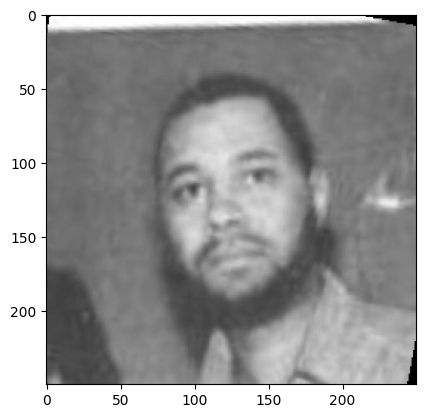

In [16]:
dataset = LFWDataset(transform=transform)

first = dataset[2]
ft, lb = first
print(ft.shape)
print(ft[0])
plt.imshow(ft[0],'gray')
plt.show()

In [17]:
# data split
# train 7666 test 9584 val 1917
dataset_size = dataset.n_samples
train_size = int(0.4 * dataset_size)
test_val_size = dataset_size - train_size
train_dataset, test_val_dataset = torch.utils.data.random_split(dataset, [train_size, test_val_size])
print(len(train_dataset),len(test_val_dataset))

test_size = int(test_val_size * 5.0 / 6.0)
val_size = test_val_size - test_size
test_dataset, val_dataset = torch.utils.data.random_split(test_val_dataset, [test_size, val_size])
print(len(val_dataset), len(test_dataset))

7666 11501
1917 9584


In [18]:
# construct dataloader
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True
)

In [19]:
s = next(iter(train_loader))

In [20]:
a,b = s
print(a.shape)
print(sum(b),len(b))

torch.Size([64, 3, 250, 250])
tensor(40) 64


In [69]:
# import torch.nn as nn
# from torchvision.models import resnet50
# import torch

# # Load pre-trained ResNet50 model
# model = resnet50(pretrained=True)

# # Ensure model is on the appropriate device
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# model = model.to(device)

# # Modify the classifier layer
# model.fc = nn.Linear(model.fc.in_features, 2)  # Binary classification (male/female)
# model.fc = model.fc.to(device)  # Make sure the new layer is also moved to GPU

# # Define loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# def train(model, loader, criterion, optimizer, epochs=5, device=device):
#     model.train()  # Ensure model is in training mode
#     for epoch in range(epochs):
#         for images, labels in loader:
#             images, labels = images.to(device), labels.to(device)  # Move data and labels to GPU
#             outputs = model(images)  # Forward pass
#             loss = criterion(outputs, labels)  # Compute loss

#             optimizer.zero_grad()  # Clear old gradients
#             loss.backward()  # Backpropagate to compute new gradients
#             optimizer.step()  # Update model parameters

#             print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

# # Assuming 'train_loader' is defined and properly batched
# train(model, train_loader, criterion, optimizer, device=device)


Using cache found in C:\Users\liuwe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-30 Python-3.8.19 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3080 Ti Laptop GPU, 16384MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


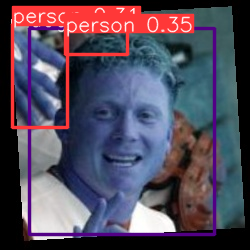

image 1/1: 250x250 2 persons, 1 dog
Speed: 2.0ms pre-process, 4.0ms inference, 48.0ms NMS per image at shape (1, 3, 640, 640)


tensor([ 65.32601,  14.24050, 127.36510,  54.99635,   0.34646,   0.00000], device='cuda:0')

In [40]:
import torch
from PIL import Image
from IPython.display import display
import cv2

# Load Pre-trained YOLOv5s
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# Load images
img = cv2.imread('lfw_funneled\Aaron_Guiel\Aaron_Guiel_0001.jpg')

results = model(img)
results.show()
results.print() 

results.pred[0][0]

In [66]:
def get_name(results, name):
    results.names[0] = name
    
    # Extract the prediction result with highest confidence score
    results.pred[0]= results.pred[0][0].unsqueeze(0)
    
    return results

Using cache found in C:\Users\liuwe/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-30 Python-3.8.19 torch-2.3.0 CUDA:0 (NVIDIA GeForce RTX 3080 Ti Laptop GPU, 16384MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


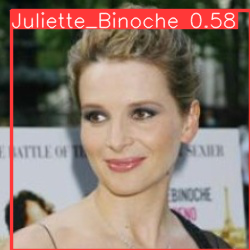

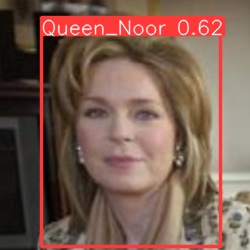

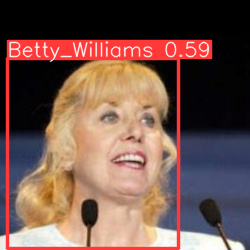

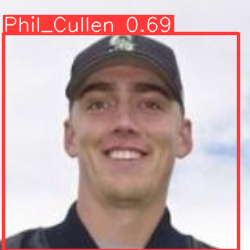

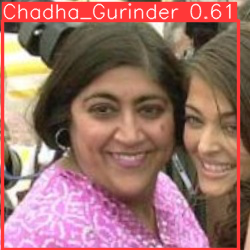

In [67]:
import os
import random
from PIL import Image
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
model.eval()

dataset_path = 'lfw_funneled'

folder_names = os.listdir(dataset_path)

sampled_folders = random.sample(folder_names, 5)

for folder_name in sampled_folders:
    folder_path = os.path.join(dataset_path, folder_name)
    image_files = os.listdir(folder_path)
    
    # Random select a picture
    image_path = os.path.join(folder_path, random.choice(image_files))
    
    # Read picture and do predictions
    img = Image.open(image_path)
    results = model(img)
    results =get_name(results,folder_name)
    
    results.show()